In [9]:
# Auto-Reload for Fast Iteration
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from pathlib import Path
import sys

project_root = Path("/Users/liuq13/vae-fmri-tms")               
sys.path.append(str(project_root))

In [11]:
# Import from config.py (which is in the root folder)
from utils.config import *

# Import custom functions from your utils package
from utils.models import VAE, CVAE

from utils.train_utils import (
    train_vae,
    loss_function,
    get_latent_mu,
    get_latent_mu_cvae,
    compute_condition_distances,
    compute_per_session_dist_to_null
)

from utils.data_utils import (
    load_all_fc_data,
    preprocess_for_torch
)

from utils.utils_plotting import (
    plot_vae_losses,
    plot_latent_embedding_by_condition_and_subject,
    plot_subject_distance_comparison
)


In [12]:
data_dir     = project_root / "data"
sub_cond_path     = data_dir / "subject_info.xlsx"
base_nifti_folder = data_dir / "data_FC"
condition_map = {'N': 0, 'S': 1, 'C': 2}

In [13]:
# Load and preprocess
use_roi = 0
all_corr_data, all_tms_type, all_subject_id, all_stimloc, all_session = load_all_fc_data(sub_cond_path, 
                                                               base_nifti_folder, 
                                                               mat_filename='conn_matrix_w_sphere.mat',
                                                               key_name='correlation_matrix',row_idx=use_roi)
# One-hot encode subject ID as condition
subject_arr = np.array(all_subject_id).reshape(-1, 1)
subject_encoder = OneHotEncoder(sparse_output=False, drop=None)
subject_ohe = subject_encoder.fit_transform(subject_arr)  # shape: [n_samples, n_subjects]

# Convert to torch tensors
X_tensor = preprocess_for_torch(all_corr_data)  
subject_cond_tensor = torch.tensor(subject_ohe, dtype=torch.float32)
dataset = TensorDataset(X_tensor, subject_cond_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

[WARN] File not found: /Users/liuq13/vae-fmri-tms/data/data_FC/NODEAP_30/S3D2/conn_matrix_w_sphere.mat
[WARN] File not found: /Users/liuq13/vae-fmri-tms/data/data_FC/NODEAP_44/S1D1/conn_matrix_w_sphere.mat
[WARN] File not found: /Users/liuq13/vae-fmri-tms/data/data_FC/NODEAP_83/S3D1/conn_matrix_w_sphere.mat
[WARN] File not found: /Users/liuq13/vae-fmri-tms/data/data_FC/NODEAP_87/D0/conn_matrix_w_sphere.mat
[WARN] File not found: /Users/liuq13/vae-fmri-tms/data/data_FC/NODEAP_88/D0/conn_matrix_w_sphere.mat
Columns with NaN: 14 / 116
Tensor shape after preprocessing: torch.Size([331, 102])


In [14]:
X_tensor.shape

torch.Size([331, 102])

In [15]:
subject_cond_tensor.shape

torch.Size([331, 48])


=== latent_dim = 2 ===

===== Epoch 1 =====


Epoch 1/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1096.19it/s]


Epoch 1, Loss: 103.0968, Recon: 103.0304, KL: 0.0664

===== Epoch 2 =====


Epoch 2/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 973.79it/s]


Epoch 2, Loss: 102.8356, Recon: 102.7541, KL: 0.0816

===== Epoch 3 =====


Epoch 3/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 887.24it/s]


Epoch 3, Loss: 102.5791, Recon: 102.4625, KL: 0.1166

===== Epoch 4 =====


Epoch 4/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 906.25it/s]


Epoch 4, Loss: 102.3235, Recon: 102.1435, KL: 0.1800

===== Epoch 5 =====


Epoch 5/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 910.58it/s]


Epoch 5, Loss: 101.7161, Recon: 101.4131, KL: 0.3030

===== Epoch 6 =====


Epoch 6/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1019.75it/s]


Epoch 6, Loss: 101.0951, Recon: 100.5743, KL: 0.5208

===== Epoch 7 =====


Epoch 7/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 823.73it/s]


Epoch 7, Loss: 99.9625, Recon: 99.0007, KL: 0.9618

===== Epoch 8 =====


Epoch 8/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1011.94it/s]


Epoch 8, Loss: 97.8626, Recon: 96.1609, KL: 1.7016

===== Epoch 9 =====


Epoch 9/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1135.07it/s]


Epoch 9, Loss: 95.0039, Recon: 92.1098, KL: 2.8941

===== Epoch 10 =====


Epoch 10/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1148.70it/s]


Epoch 10, Loss: 91.7526, Recon: 87.2612, KL: 4.4914

===== Epoch 11 =====


Epoch 11/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1060.34it/s]


Epoch 11, Loss: 87.8976, Recon: 81.6928, KL: 6.2049

===== Epoch 12 =====


Epoch 12/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1037.42it/s]


Epoch 12, Loss: 84.5014, Recon: 77.1270, KL: 7.3743

===== Epoch 13 =====


Epoch 13/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 943.31it/s]


Epoch 13, Loss: 81.0932, Recon: 73.4532, KL: 7.6399

===== Epoch 14 =====


Epoch 14/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 738.65it/s]


Epoch 14, Loss: 78.4413, Recon: 70.8355, KL: 7.6058

===== Epoch 15 =====


Epoch 15/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1063.81it/s]


Epoch 15, Loss: 76.6220, Recon: 68.6911, KL: 7.9309

===== Epoch 16 =====


Epoch 16/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 881.75it/s]


Epoch 16, Loss: 74.2777, Recon: 66.0441, KL: 8.2336

===== Epoch 17 =====


Epoch 17/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1063.39it/s]


Epoch 17, Loss: 72.5660, Recon: 64.4565, KL: 8.1095

===== Epoch 18 =====


Epoch 18/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1000.64it/s]


Epoch 18, Loss: 71.1861, Recon: 63.3175, KL: 7.8686

===== Epoch 19 =====


Epoch 19/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 988.69it/s]


Epoch 19, Loss: 69.8834, Recon: 62.0675, KL: 7.8159

===== Epoch 20 =====


Epoch 20/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1210.13it/s]


Epoch 20, Loss: 69.1183, Recon: 61.3204, KL: 7.7979

===== Epoch 21 =====


Epoch 21/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1110.43it/s]


Epoch 21, Loss: 67.9281, Recon: 60.3146, KL: 7.6135

===== Epoch 22 =====


Epoch 22/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1142.86it/s]


Epoch 22, Loss: 67.2895, Recon: 60.0817, KL: 7.2078

===== Epoch 23 =====


Epoch 23/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1128.44it/s]


Epoch 23, Loss: 66.4308, Recon: 59.5551, KL: 6.8757

===== Epoch 24 =====


Epoch 24/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1083.65it/s]


Epoch 24, Loss: 66.0745, Recon: 59.3255, KL: 6.7490

===== Epoch 25 =====


Epoch 25/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1093.22it/s]


Epoch 25, Loss: 65.3020, Recon: 58.7233, KL: 6.5788

===== Epoch 26 =====


Epoch 26/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1169.07it/s]


Epoch 26, Loss: 65.2078, Recon: 58.9766, KL: 6.2312

===== Epoch 27 =====


Epoch 27/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1168.83it/s]


Epoch 27, Loss: 64.6190, Recon: 58.4095, KL: 6.2095

===== Epoch 28 =====


Epoch 28/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 568.54it/s]


Epoch 28, Loss: 64.3186, Recon: 58.2285, KL: 6.0901

===== Epoch 29 =====


Epoch 29/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 958.62it/s]


Epoch 29, Loss: 63.8745, Recon: 58.0422, KL: 5.8323

===== Epoch 30 =====


Epoch 30/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 795.05it/s]


Epoch 30, Loss: 63.8108, Recon: 58.0587, KL: 5.7521

===== Epoch 31 =====


Epoch 31/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 890.46it/s]


Epoch 31, Loss: 63.5218, Recon: 57.8339, KL: 5.6880

===== Epoch 32 =====


Epoch 32/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1069.18it/s]


Epoch 32, Loss: 63.3949, Recon: 57.8733, KL: 5.5217

===== Epoch 33 =====


Epoch 33/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 740.40it/s]


Epoch 33, Loss: 63.1854, Recon: 57.6628, KL: 5.5226

===== Epoch 34 =====


Epoch 34/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1137.56it/s]


Epoch 34, Loss: 63.0863, Recon: 57.6769, KL: 5.4093

===== Epoch 35 =====


Epoch 35/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 877.12it/s]


Epoch 35, Loss: 62.7357, Recon: 57.4566, KL: 5.2791

===== Epoch 36 =====


Epoch 36/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 942.60it/s]


Epoch 36, Loss: 62.4490, Recon: 57.2296, KL: 5.2194

===== Epoch 37 =====


Epoch 37/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1030.43it/s]


Epoch 37, Loss: 62.2470, Recon: 57.0372, KL: 5.2098

===== Epoch 38 =====


Epoch 38/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1085.33it/s]


Epoch 38, Loss: 61.9703, Recon: 56.8448, KL: 5.1255

===== Epoch 39 =====


Epoch 39/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 973.96it/s]


Epoch 39, Loss: 61.9540, Recon: 56.8647, KL: 5.0894

===== Epoch 40 =====


Epoch 40/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 955.78it/s]


Epoch 40, Loss: 62.0043, Recon: 56.9503, KL: 5.0540

===== Epoch 41 =====


Epoch 41/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1037.63it/s]


Epoch 41, Loss: 61.6637, Recon: 56.6822, KL: 4.9815

===== Epoch 42 =====


Epoch 42/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 872.95it/s]


Epoch 42, Loss: 61.4824, Recon: 56.5482, KL: 4.9342

===== Epoch 43 =====


Epoch 43/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 779.43it/s]


Epoch 43, Loss: 61.3569, Recon: 56.3918, KL: 4.9652

===== Epoch 44 =====


Epoch 44/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 942.44it/s]


Epoch 44, Loss: 60.9622, Recon: 56.1073, KL: 4.8549

===== Epoch 45 =====


Epoch 45/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 944.37it/s]


Epoch 45, Loss: 60.8484, Recon: 56.1512, KL: 4.6972

===== Epoch 46 =====


Epoch 46/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 951.23it/s]


Epoch 46, Loss: 60.8343, Recon: 56.0780, KL: 4.7563

===== Epoch 47 =====


Epoch 47/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 970.37it/s]


Epoch 47, Loss: 60.6517, Recon: 55.8801, KL: 4.7717

===== Epoch 48 =====


Epoch 48/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 759.78it/s]


Epoch 48, Loss: 60.5520, Recon: 55.8068, KL: 4.7452

===== Epoch 49 =====


Epoch 49/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 972.13it/s]


Epoch 49, Loss: 60.4177, Recon: 55.7220, KL: 4.6957

===== Epoch 50 =====


Epoch 50/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 905.72it/s]


Epoch 50, Loss: 60.3370, Recon: 55.7041, KL: 4.6329

===== Epoch 51 =====


Epoch 51/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 929.42it/s]


Epoch 51, Loss: 59.9360, Recon: 55.2811, KL: 4.6549

===== Epoch 52 =====


Epoch 52/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 995.20it/s]


Epoch 52, Loss: 59.9535, Recon: 55.3645, KL: 4.5890

===== Epoch 53 =====


Epoch 53/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 937.92it/s]


Epoch 53, Loss: 59.6734, Recon: 55.0663, KL: 4.6071

===== Epoch 54 =====


Epoch 54/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 894.79it/s]


Epoch 54, Loss: 59.6094, Recon: 54.9793, KL: 4.6301

===== Epoch 55 =====


Epoch 55/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 956.69it/s]


Epoch 55, Loss: 59.4724, Recon: 54.9464, KL: 4.5260

===== Epoch 56 =====


Epoch 56/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 919.57it/s]


Epoch 56, Loss: 59.2324, Recon: 54.7571, KL: 4.4753

===== Epoch 57 =====


Epoch 57/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 924.30it/s]


Epoch 57, Loss: 59.0345, Recon: 54.5269, KL: 4.5076

===== Epoch 58 =====


Epoch 58/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 957.52it/s]


Epoch 58, Loss: 58.8598, Recon: 54.4519, KL: 4.4078

===== Epoch 59 =====


Epoch 59/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 917.88it/s]


Epoch 59, Loss: 58.7691, Recon: 54.4500, KL: 4.3191

===== Epoch 60 =====


Epoch 60/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 944.95it/s]


Epoch 60, Loss: 58.6304, Recon: 54.2857, KL: 4.3447

===== Epoch 61 =====


Epoch 61/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 835.67it/s]


Epoch 61, Loss: 58.4596, Recon: 54.1175, KL: 4.3420

===== Epoch 62 =====


Epoch 62/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 921.59it/s]


Epoch 62, Loss: 58.3523, Recon: 54.0061, KL: 4.3462

===== Epoch 63 =====


Epoch 63/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 960.11it/s]


Epoch 63, Loss: 58.1055, Recon: 53.7983, KL: 4.3073

===== Epoch 64 =====


Epoch 64/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 932.69it/s]


Epoch 64, Loss: 57.9801, Recon: 53.7110, KL: 4.2692

===== Epoch 65 =====


Epoch 65/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 846.62it/s]


Epoch 65, Loss: 57.8513, Recon: 53.5611, KL: 4.2902

===== Epoch 66 =====


Epoch 66/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 921.75it/s]


Epoch 66, Loss: 57.6515, Recon: 53.3442, KL: 4.3073

===== Epoch 67 =====


Epoch 67/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 917.59it/s]


Epoch 67, Loss: 57.2871, Recon: 53.0129, KL: 4.2742

===== Epoch 68 =====


Epoch 68/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 882.47it/s]


Epoch 68, Loss: 57.3134, Recon: 53.0911, KL: 4.2222

===== Epoch 69 =====


Epoch 69/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 973.88it/s]


Epoch 69, Loss: 57.0573, Recon: 52.7495, KL: 4.3078

===== Epoch 70 =====


Epoch 70/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 908.34it/s]


Epoch 70, Loss: 56.8797, Recon: 52.6445, KL: 4.2352

===== Epoch 71 =====


Epoch 71/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 926.88it/s]


Epoch 71, Loss: 56.7119, Recon: 52.5518, KL: 4.1601

===== Epoch 72 =====


Epoch 72/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1001.18it/s]


Epoch 72, Loss: 56.5556, Recon: 52.4011, KL: 4.1545

===== Epoch 73 =====


Epoch 73/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1023.07it/s]


Epoch 73, Loss: 56.3607, Recon: 52.1747, KL: 4.1860

===== Epoch 74 =====


Epoch 74/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 787.11it/s]


Epoch 74, Loss: 56.2712, Recon: 52.0641, KL: 4.2071

===== Epoch 75 =====


Epoch 75/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 951.38it/s]


Epoch 75, Loss: 55.9858, Recon: 51.8464, KL: 4.1394

===== Epoch 76 =====


Epoch 76/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 983.53it/s]


Epoch 76, Loss: 55.8638, Recon: 51.7902, KL: 4.0737

===== Epoch 77 =====


Epoch 77/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 861.19it/s]


Epoch 77, Loss: 55.7255, Recon: 51.5986, KL: 4.1269

===== Epoch 78 =====


Epoch 78/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 926.79it/s]


Epoch 78, Loss: 55.5441, Recon: 51.4030, KL: 4.1411

===== Epoch 79 =====


Epoch 79/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 940.47it/s]


Epoch 79, Loss: 55.2586, Recon: 51.1346, KL: 4.1239

===== Epoch 80 =====


Epoch 80/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 817.95it/s]


Epoch 80, Loss: 55.0803, Recon: 50.9891, KL: 4.0911

===== Epoch 81 =====


Epoch 81/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 940.01it/s]


Epoch 81, Loss: 54.8017, Recon: 50.7150, KL: 4.0867

===== Epoch 82 =====


Epoch 82/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 968.89it/s]


Epoch 82, Loss: 54.7783, Recon: 50.6848, KL: 4.0934

===== Epoch 83 =====


Epoch 83/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 955.11it/s]


Epoch 83, Loss: 54.4243, Recon: 50.2860, KL: 4.1383

===== Epoch 84 =====


Epoch 84/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 924.06it/s]


Epoch 84, Loss: 54.1204, Recon: 50.0667, KL: 4.0537

===== Epoch 85 =====


Epoch 85/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 960.53it/s]


Epoch 85, Loss: 54.0552, Recon: 50.0463, KL: 4.0089

===== Epoch 86 =====


Epoch 86/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 943.25it/s]


Epoch 86, Loss: 53.9752, Recon: 49.9836, KL: 3.9916

===== Epoch 87 =====


Epoch 87/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 887.80it/s]


Epoch 87, Loss: 53.6785, Recon: 49.6750, KL: 4.0035

===== Epoch 88 =====


Epoch 88/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 958.08it/s]


Epoch 88, Loss: 53.5575, Recon: 49.5526, KL: 4.0049

===== Epoch 89 =====


Epoch 89/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1024.77it/s]


Epoch 89, Loss: 53.3990, Recon: 49.4193, KL: 3.9797

===== Epoch 90 =====


Epoch 90/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1049.91it/s]


Epoch 90, Loss: 53.3325, Recon: 49.3475, KL: 3.9850

===== Epoch 91 =====


Epoch 91/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1041.97it/s]


Epoch 91, Loss: 53.0367, Recon: 48.9630, KL: 4.0737

===== Epoch 92 =====


Epoch 92/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 955.52it/s]


Epoch 92, Loss: 52.8848, Recon: 48.8501, KL: 4.0347

===== Epoch 93 =====


Epoch 93/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1011.03it/s]


Epoch 93, Loss: 52.5660, Recon: 48.5720, KL: 3.9939

===== Epoch 94 =====


Epoch 94/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1083.54it/s]


Epoch 94, Loss: 52.2463, Recon: 48.2196, KL: 4.0267

===== Epoch 95 =====


Epoch 95/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1071.79it/s]


Epoch 95, Loss: 52.3055, Recon: 48.3266, KL: 3.9789

===== Epoch 96 =====


Epoch 96/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1135.41it/s]


Epoch 96, Loss: 51.9440, Recon: 47.9612, KL: 3.9828

===== Epoch 97 =====


Epoch 97/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 929.12it/s]


Epoch 97, Loss: 51.7208, Recon: 47.6986, KL: 4.0222

===== Epoch 98 =====


Epoch 98/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1034.61it/s]


Epoch 98, Loss: 51.6465, Recon: 47.6954, KL: 3.9511

===== Epoch 99 =====


Epoch 99/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1156.70it/s]


Epoch 99, Loss: 51.2843, Recon: 47.3352, KL: 3.9491

===== Epoch 100 =====


Epoch 100/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 850.02it/s]


Epoch 100, Loss: 51.1657, Recon: 47.2608, KL: 3.9049

===== Epoch 101 =====


Epoch 101/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1092.34it/s]


Epoch 101, Loss: 51.1142, Recon: 47.1857, KL: 3.9286

===== Epoch 102 =====


Epoch 102/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1117.07it/s]


Epoch 102, Loss: 51.1132, Recon: 47.1480, KL: 3.9651

===== Epoch 103 =====


Epoch 103/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.67it/s]


Epoch 103, Loss: 50.6501, Recon: 46.6924, KL: 3.9578

===== Epoch 104 =====


Epoch 104/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.52it/s]


Epoch 104, Loss: 50.5030, Recon: 46.5610, KL: 3.9420

===== Epoch 105 =====


Epoch 105/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1193.29it/s]


Epoch 105, Loss: 50.1843, Recon: 46.2400, KL: 3.9442

===== Epoch 106 =====


Epoch 106/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1183.83it/s]


Epoch 106, Loss: 50.0935, Recon: 46.1525, KL: 3.9410

===== Epoch 107 =====


Epoch 107/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1039.97it/s]


Epoch 107, Loss: 49.9231, Recon: 46.0467, KL: 3.8764

===== Epoch 108 =====


Epoch 108/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1141.08it/s]


Epoch 108, Loss: 49.5344, Recon: 45.6441, KL: 3.8903

===== Epoch 109 =====


Epoch 109/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1124.86it/s]


Epoch 109, Loss: 49.4859, Recon: 45.6167, KL: 3.8692

===== Epoch 110 =====


Epoch 110/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1080.45it/s]


Epoch 110, Loss: 49.4351, Recon: 45.6056, KL: 3.8295

===== Epoch 111 =====


Epoch 111/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.33it/s]


Epoch 111, Loss: 49.1886, Recon: 45.3576, KL: 3.8310

===== Epoch 112 =====


Epoch 112/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.27it/s]


Epoch 112, Loss: 48.9883, Recon: 45.1522, KL: 3.8361

===== Epoch 113 =====


Epoch 113/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1194.62it/s]


Epoch 113, Loss: 48.9205, Recon: 45.1052, KL: 3.8154

===== Epoch 114 =====


Epoch 114/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1096.19it/s]


Epoch 114, Loss: 48.7352, Recon: 44.8711, KL: 3.8641

===== Epoch 115 =====


Epoch 115/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1181.13it/s]


Epoch 115, Loss: 48.4961, Recon: 44.6477, KL: 3.8484

===== Epoch 116 =====


Epoch 116/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1204.03it/s]


Epoch 116, Loss: 48.2973, Recon: 44.4910, KL: 3.8063

===== Epoch 117 =====


Epoch 117/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1168.95it/s]


Epoch 117, Loss: 48.3402, Recon: 44.4824, KL: 3.8578

===== Epoch 118 =====


Epoch 118/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.00it/s]


Epoch 118, Loss: 48.0674, Recon: 44.1123, KL: 3.9551

===== Epoch 119 =====


Epoch 119/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1146.55it/s]


Epoch 119, Loss: 47.8954, Recon: 44.0824, KL: 3.8130

===== Epoch 120 =====


Epoch 120/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1118.45it/s]


Epoch 120, Loss: 47.7968, Recon: 43.9657, KL: 3.8311

===== Epoch 121 =====


Epoch 121/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.35it/s]


Epoch 121, Loss: 47.6084, Recon: 43.7043, KL: 3.9041

===== Epoch 122 =====


Epoch 122/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1200.59it/s]


Epoch 122, Loss: 47.4301, Recon: 43.5603, KL: 3.8698

===== Epoch 123 =====


Epoch 123/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 889.82it/s]


Epoch 123, Loss: 47.1882, Recon: 43.2971, KL: 3.8912

===== Epoch 124 =====


Epoch 124/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.76it/s]


Epoch 124, Loss: 46.9847, Recon: 43.1448, KL: 3.8398

===== Epoch 125 =====


Epoch 125/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1034.63it/s]


Epoch 125, Loss: 46.9333, Recon: 43.1425, KL: 3.7908

===== Epoch 126 =====


Epoch 126/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1132.48it/s]


Epoch 126, Loss: 46.9878, Recon: 43.2028, KL: 3.7851

===== Epoch 127 =====


Epoch 127/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1035.89it/s]


Epoch 127, Loss: 46.7137, Recon: 42.8592, KL: 3.8545

===== Epoch 128 =====


Epoch 128/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1103.08it/s]


Epoch 128, Loss: 46.4679, Recon: 42.6201, KL: 3.8479

===== Epoch 129 =====


Epoch 129/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1127.64it/s]


Epoch 129, Loss: 46.4280, Recon: 42.6331, KL: 3.7949

===== Epoch 130 =====


Epoch 130/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1196.17it/s]


Epoch 130, Loss: 46.2531, Recon: 42.4065, KL: 3.8466

===== Epoch 131 =====


Epoch 131/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1114.97it/s]


Epoch 131, Loss: 46.0331, Recon: 42.1777, KL: 3.8555

===== Epoch 132 =====


Epoch 132/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1190.06it/s]


Epoch 132, Loss: 45.8592, Recon: 42.0448, KL: 3.8144

===== Epoch 133 =====


Epoch 133/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.02it/s]


Epoch 133, Loss: 45.9327, Recon: 42.1512, KL: 3.7815

===== Epoch 134 =====


Epoch 134/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1125.36it/s]


Epoch 134, Loss: 45.9498, Recon: 42.1041, KL: 3.8457

===== Epoch 135 =====


Epoch 135/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1084.05it/s]


Epoch 135, Loss: 45.6371, Recon: 41.7626, KL: 3.8745

===== Epoch 136 =====


Epoch 136/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1228.10it/s]


Epoch 136, Loss: 45.3874, Recon: 41.5732, KL: 3.8142

===== Epoch 137 =====


Epoch 137/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1140.35it/s]


Epoch 137, Loss: 45.2078, Recon: 41.3963, KL: 3.8115

===== Epoch 138 =====


Epoch 138/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1188.04it/s]


Epoch 138, Loss: 45.1191, Recon: 41.3038, KL: 3.8153

===== Epoch 139 =====


Epoch 139/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1096.68it/s]


Epoch 139, Loss: 45.1197, Recon: 41.2987, KL: 3.8210

===== Epoch 140 =====


Epoch 140/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1224.09it/s]


Epoch 140, Loss: 45.0717, Recon: 41.2234, KL: 3.8483

===== Epoch 141 =====


Epoch 141/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1038.43it/s]


Epoch 141, Loss: 44.8933, Recon: 41.0729, KL: 3.8205

===== Epoch 142 =====


Epoch 142/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1168.60it/s]


Epoch 142, Loss: 44.7481, Recon: 40.9419, KL: 3.8062

===== Epoch 143 =====


Epoch 143/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.26it/s]


Epoch 143, Loss: 44.5403, Recon: 40.6965, KL: 3.8438

===== Epoch 144 =====


Epoch 144/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1064.45it/s]


Epoch 144, Loss: 44.4783, Recon: 40.6205, KL: 3.8578

===== Epoch 145 =====


Epoch 145/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.18it/s]


Epoch 145, Loss: 44.4914, Recon: 40.6737, KL: 3.8176

===== Epoch 146 =====


Epoch 146/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 574.40it/s]


Epoch 146, Loss: 44.3131, Recon: 40.4512, KL: 3.8619

===== Epoch 147 =====


Epoch 147/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1051.92it/s]


Epoch 147, Loss: 44.1221, Recon: 40.2575, KL: 3.8646

===== Epoch 148 =====


Epoch 148/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1084.39it/s]


Epoch 148, Loss: 43.9470, Recon: 40.1226, KL: 3.8244

===== Epoch 149 =====


Epoch 149/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1093.43it/s]


Epoch 149, Loss: 43.7844, Recon: 39.9947, KL: 3.7898

===== Epoch 150 =====


Epoch 150/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 903.79it/s]


Epoch 150, Loss: 43.8132, Recon: 40.0134, KL: 3.7998

===== Epoch 151 =====


Epoch 151/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1068.39it/s]


Epoch 151, Loss: 43.6702, Recon: 39.8638, KL: 3.8064

===== Epoch 152 =====


Epoch 152/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1060.95it/s]


Epoch 152, Loss: 43.5504, Recon: 39.7222, KL: 3.8282

===== Epoch 153 =====


Epoch 153/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 934.09it/s]


Epoch 153, Loss: 43.4967, Recon: 39.6617, KL: 3.8350

===== Epoch 154 =====


Epoch 154/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1033.33it/s]


Epoch 154, Loss: 43.5715, Recon: 39.7456, KL: 3.8259

===== Epoch 155 =====


Epoch 155/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.92it/s]


Epoch 155, Loss: 43.2714, Recon: 39.4317, KL: 3.8397

===== Epoch 156 =====


Epoch 156/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1146.78it/s]


Epoch 156, Loss: 43.2230, Recon: 39.3356, KL: 3.8874

===== Epoch 157 =====


Epoch 157/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1097.02it/s]


Epoch 157, Loss: 43.1425, Recon: 39.2904, KL: 3.8521

===== Epoch 158 =====


Epoch 158/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1173.59it/s]


Epoch 158, Loss: 42.8658, Recon: 39.0116, KL: 3.8542

===== Epoch 159 =====


Epoch 159/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.27it/s]


Epoch 159, Loss: 42.8380, Recon: 38.9840, KL: 3.8540

===== Epoch 160 =====


Epoch 160/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1033.45it/s]


Epoch 160, Loss: 42.7408, Recon: 38.9190, KL: 3.8219

===== Epoch 161 =====


Epoch 161/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1106.20it/s]


Epoch 161, Loss: 42.6611, Recon: 38.8412, KL: 3.8198

===== Epoch 162 =====


Epoch 162/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 543.05it/s]


Epoch 162, Loss: 42.3999, Recon: 38.5640, KL: 3.8359

===== Epoch 163 =====


Epoch 163/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.87it/s]


Epoch 163, Loss: 42.4489, Recon: 38.6140, KL: 3.8349

===== Epoch 164 =====


Epoch 164/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1102.87it/s]


Epoch 164, Loss: 42.2503, Recon: 38.4320, KL: 3.8184

===== Epoch 165 =====


Epoch 165/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.28it/s]


Epoch 165, Loss: 42.3724, Recon: 38.5606, KL: 3.8118

===== Epoch 166 =====


Epoch 166/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1129.16it/s]


Epoch 166, Loss: 42.2347, Recon: 38.3834, KL: 3.8513

===== Epoch 167 =====


Epoch 167/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1015.32it/s]


Epoch 167, Loss: 42.0795, Recon: 38.2184, KL: 3.8611

===== Epoch 168 =====


Epoch 168/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1066.64it/s]


Epoch 168, Loss: 41.9432, Recon: 38.1463, KL: 3.7970

===== Epoch 169 =====


Epoch 169/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.84it/s]


Epoch 169, Loss: 41.8470, Recon: 37.9998, KL: 3.8473

===== Epoch 170 =====


Epoch 170/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1045.11it/s]


Epoch 170, Loss: 41.7798, Recon: 37.9180, KL: 3.8618

===== Epoch 171 =====


Epoch 171/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.76it/s]


Epoch 171, Loss: 41.7380, Recon: 37.9215, KL: 3.8165

===== Epoch 172 =====


Epoch 172/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.32it/s]


Epoch 172, Loss: 41.6043, Recon: 37.7712, KL: 3.8331

===== Epoch 173 =====


Epoch 173/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1241.95it/s]


Epoch 173, Loss: 41.5544, Recon: 37.7437, KL: 3.8107

===== Epoch 174 =====


Epoch 174/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1040.37it/s]


Epoch 174, Loss: 41.6387, Recon: 37.8243, KL: 3.8144

===== Epoch 175 =====


Epoch 175/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 975.52it/s]


Epoch 175, Loss: 41.3300, Recon: 37.4843, KL: 3.8457

===== Epoch 176 =====


Epoch 176/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 973.01it/s]


Epoch 176, Loss: 41.2864, Recon: 37.4721, KL: 3.8143

===== Epoch 177 =====


Epoch 177/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1061.68it/s]


Epoch 177, Loss: 41.1513, Recon: 37.3162, KL: 3.8351

===== Epoch 178 =====


Epoch 178/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1110.11it/s]


Epoch 178, Loss: 41.1676, Recon: 37.3283, KL: 3.8394

===== Epoch 179 =====


Epoch 179/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.75it/s]


Epoch 179, Loss: 41.0230, Recon: 37.2176, KL: 3.8054

===== Epoch 180 =====


Epoch 180/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1037.82it/s]


Epoch 180, Loss: 40.8615, Recon: 37.0406, KL: 3.8208

===== Epoch 181 =====


Epoch 181/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1029.64it/s]


Epoch 181, Loss: 41.0840, Recon: 37.2574, KL: 3.8266

===== Epoch 182 =====


Epoch 182/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.32it/s]


Epoch 182, Loss: 40.7681, Recon: 36.9200, KL: 3.8482

===== Epoch 183 =====


Epoch 183/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1089.22it/s]


Epoch 183, Loss: 40.8253, Recon: 36.9978, KL: 3.8276

===== Epoch 184 =====


Epoch 184/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1063.76it/s]


Epoch 184, Loss: 40.6289, Recon: 36.8381, KL: 3.7908

===== Epoch 185 =====


Epoch 185/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1132.15it/s]


Epoch 185, Loss: 40.5852, Recon: 36.7922, KL: 3.7931

===== Epoch 186 =====


Epoch 186/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1031.97it/s]


Epoch 186, Loss: 40.4455, Recon: 36.6099, KL: 3.8356

===== Epoch 187 =====


Epoch 187/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1050.92it/s]


Epoch 187, Loss: 40.3970, Recon: 36.5860, KL: 3.8110

===== Epoch 188 =====


Epoch 188/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1039.79it/s]


Epoch 188, Loss: 40.3676, Recon: 36.5598, KL: 3.8077

===== Epoch 189 =====


Epoch 189/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1081.84it/s]


Epoch 189, Loss: 40.2735, Recon: 36.4785, KL: 3.7950

===== Epoch 190 =====


Epoch 190/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.32it/s]


Epoch 190, Loss: 40.2291, Recon: 36.4393, KL: 3.7899

===== Epoch 191 =====


Epoch 191/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.51it/s]


Epoch 191, Loss: 40.1836, Recon: 36.3811, KL: 3.8026

===== Epoch 192 =====


Epoch 192/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1099.77it/s]


Epoch 192, Loss: 39.9900, Recon: 36.1676, KL: 3.8225

===== Epoch 193 =====


Epoch 193/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1090.41it/s]


Epoch 193, Loss: 39.9304, Recon: 36.1501, KL: 3.7803

===== Epoch 194 =====


Epoch 194/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1184.83it/s]


Epoch 194, Loss: 40.0478, Recon: 36.2780, KL: 3.7697

===== Epoch 195 =====


Epoch 195/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1088.99it/s]


Epoch 195, Loss: 39.8895, Recon: 36.0631, KL: 3.8264

===== Epoch 196 =====


Epoch 196/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1053.63it/s]


Epoch 196, Loss: 39.7868, Recon: 35.9837, KL: 3.8031

===== Epoch 197 =====


Epoch 197/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1080.42it/s]


Epoch 197, Loss: 39.7444, Recon: 35.9349, KL: 3.8095

===== Epoch 198 =====


Epoch 198/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 977.18it/s]


Epoch 198, Loss: 39.6639, Recon: 35.8528, KL: 3.8111

===== Epoch 199 =====


Epoch 199/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 952.64it/s]


Epoch 199, Loss: 39.5423, Recon: 35.7318, KL: 3.8105

===== Epoch 200 =====


Epoch 200/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 900.17it/s]


Epoch 200, Loss: 39.4847, Recon: 35.6865, KL: 3.7982

===== Epoch 201 =====


Epoch 201/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1143.57it/s]


Epoch 201, Loss: 39.6293, Recon: 35.8124, KL: 3.8169

===== Epoch 202 =====


Epoch 202/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1109.98it/s]


Epoch 202, Loss: 39.4307, Recon: 35.6089, KL: 3.8218

===== Epoch 203 =====


Epoch 203/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1093.33it/s]


Epoch 203, Loss: 39.3289, Recon: 35.4993, KL: 3.8296

===== Epoch 204 =====


Epoch 204/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1065.70it/s]


Epoch 204, Loss: 39.2032, Recon: 35.4044, KL: 3.7989

===== Epoch 205 =====


Epoch 205/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 585.26it/s]


Epoch 205, Loss: 39.2282, Recon: 35.4432, KL: 3.7850

===== Epoch 206 =====


Epoch 206/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 708.85it/s]


Epoch 206, Loss: 39.2174, Recon: 35.3572, KL: 3.8602

===== Epoch 207 =====


Epoch 207/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1108.99it/s]


Epoch 207, Loss: 39.0334, Recon: 35.2338, KL: 3.7996

===== Epoch 208 =====


Epoch 208/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 961.19it/s]


Epoch 208, Loss: 38.8288, Recon: 35.0329, KL: 3.7958

===== Epoch 209 =====


Epoch 209/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 700.28it/s]


Epoch 209, Loss: 38.9906, Recon: 35.2157, KL: 3.7749

===== Epoch 210 =====


Epoch 210/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1054.45it/s]


Epoch 210, Loss: 38.9198, Recon: 35.1601, KL: 3.7597

===== Epoch 211 =====


Epoch 211/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1040.18it/s]


Epoch 211, Loss: 38.8753, Recon: 35.1050, KL: 3.7703

===== Epoch 212 =====


Epoch 212/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1093.77it/s]


Epoch 212, Loss: 38.7657, Recon: 34.9922, KL: 3.7735

===== Epoch 213 =====


Epoch 213/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 392.02it/s]


Epoch 213, Loss: 38.7257, Recon: 34.9434, KL: 3.7823

===== Epoch 214 =====


Epoch 214/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 675.51it/s]


Epoch 214, Loss: 38.6720, Recon: 34.8800, KL: 3.7920

===== Epoch 215 =====


Epoch 215/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1115.61it/s]


Epoch 215, Loss: 38.4997, Recon: 34.7457, KL: 3.7539

===== Epoch 216 =====


Epoch 216/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.86it/s]


Epoch 216, Loss: 38.5767, Recon: 34.8149, KL: 3.7618

===== Epoch 217 =====


Epoch 217/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 363.09it/s]


Epoch 217, Loss: 38.5094, Recon: 34.7242, KL: 3.7852

===== Epoch 218 =====


Epoch 218/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 446.86it/s]


Epoch 218, Loss: 38.5105, Recon: 34.7492, KL: 3.7613

===== Epoch 219 =====


Epoch 219/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 192.63it/s]


Epoch 219, Loss: 38.4268, Recon: 34.6139, KL: 3.8129

===== Epoch 220 =====


Epoch 220/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 470.93it/s]


Epoch 220, Loss: 38.3295, Recon: 34.5321, KL: 3.7974

===== Epoch 221 =====


Epoch 221/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 803.46it/s]


Epoch 221, Loss: 38.3299, Recon: 34.5369, KL: 3.7930

===== Epoch 222 =====


Epoch 222/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 760.08it/s]


Epoch 222, Loss: 38.3495, Recon: 34.5368, KL: 3.8127

===== Epoch 223 =====


Epoch 223/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 855.58it/s]


Epoch 223, Loss: 38.2838, Recon: 34.4913, KL: 3.7925

===== Epoch 224 =====


Epoch 224/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 861.32it/s]


Epoch 224, Loss: 38.0883, Recon: 34.2543, KL: 3.8340

===== Epoch 225 =====


Epoch 225/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1029.09it/s]


Epoch 225, Loss: 38.1386, Recon: 34.3159, KL: 3.8227

===== Epoch 226 =====


Epoch 226/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1048.62it/s]


Epoch 226, Loss: 38.1556, Recon: 34.3173, KL: 3.8384

===== Epoch 227 =====


Epoch 227/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1042.65it/s]


Epoch 227, Loss: 37.9789, Recon: 34.1282, KL: 3.8506

===== Epoch 228 =====


Epoch 228/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 927.50it/s]


Epoch 228, Loss: 37.8265, Recon: 34.0331, KL: 3.7934

===== Epoch 229 =====


Epoch 229/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1037.35it/s]


Epoch 229, Loss: 37.9811, Recon: 34.1693, KL: 3.8118

===== Epoch 230 =====


Epoch 230/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1017.20it/s]


Epoch 230, Loss: 37.8069, Recon: 33.9625, KL: 3.8444

===== Epoch 231 =====


Epoch 231/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1020.04it/s]


Epoch 231, Loss: 37.8223, Recon: 33.9966, KL: 3.8257

===== Epoch 232 =====


Epoch 232/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 546.39it/s]


Epoch 232, Loss: 37.7219, Recon: 33.8871, KL: 3.8348

===== Epoch 233 =====


Epoch 233/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 730.84it/s]


Epoch 233, Loss: 37.6634, Recon: 33.8663, KL: 3.7971

===== Epoch 234 =====


Epoch 234/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1007.59it/s]


Epoch 234, Loss: 37.6560, Recon: 33.8692, KL: 3.7869

===== Epoch 235 =====


Epoch 235/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 926.55it/s]


Epoch 235, Loss: 37.6215, Recon: 33.8167, KL: 3.8048

===== Epoch 236 =====


Epoch 236/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 957.68it/s]


Epoch 236, Loss: 37.5159, Recon: 33.7067, KL: 3.8092

===== Epoch 237 =====


Epoch 237/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1012.52it/s]


Epoch 237, Loss: 37.4562, Recon: 33.6540, KL: 3.8023

===== Epoch 238 =====


Epoch 238/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1024.11it/s]


Epoch 238, Loss: 37.4235, Recon: 33.6332, KL: 3.7904

===== Epoch 239 =====


Epoch 239/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 968.74it/s]


Epoch 239, Loss: 37.4296, Recon: 33.6207, KL: 3.8088

===== Epoch 240 =====


Epoch 240/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1102.76it/s]


Epoch 240, Loss: 37.4203, Recon: 33.6210, KL: 3.7993

===== Epoch 241 =====


Epoch 241/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1102.87it/s]


Epoch 241, Loss: 37.3278, Recon: 33.5043, KL: 3.8234

===== Epoch 242 =====


Epoch 242/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 889.15it/s]


Epoch 242, Loss: 37.3813, Recon: 33.5997, KL: 3.7816

===== Epoch 243 =====


Epoch 243/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1088.35it/s]


Epoch 243, Loss: 37.2509, Recon: 33.4269, KL: 3.8240

===== Epoch 244 =====


Epoch 244/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1071.09it/s]


Epoch 244, Loss: 37.1541, Recon: 33.3614, KL: 3.7927

===== Epoch 245 =====


Epoch 245/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 989.39it/s]


Epoch 245, Loss: 37.1080, Recon: 33.2930, KL: 3.8150

===== Epoch 246 =====


Epoch 246/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1089.97it/s]


Epoch 246, Loss: 37.1392, Recon: 33.2919, KL: 3.8474

===== Epoch 247 =====


Epoch 247/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1028.59it/s]


Epoch 247, Loss: 36.9333, Recon: 33.1085, KL: 3.8248

===== Epoch 248 =====


Epoch 248/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1135.44it/s]


Epoch 248, Loss: 37.0374, Recon: 33.2326, KL: 3.8049

===== Epoch 249 =====


Epoch 249/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 722.26it/s]


Epoch 249, Loss: 36.9159, Recon: 33.0976, KL: 3.8183

===== Epoch 250 =====


Epoch 250/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1024.57it/s]


Epoch 250, Loss: 36.9357, Recon: 33.1287, KL: 3.8069

===== Epoch 251 =====


Epoch 251/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 928.65it/s]


Epoch 251, Loss: 36.7626, Recon: 32.9646, KL: 3.7980

===== Epoch 252 =====


Epoch 252/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1097.57it/s]


Epoch 252, Loss: 36.7268, Recon: 32.9473, KL: 3.7795

===== Epoch 253 =====


Epoch 253/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1048.53it/s]


Epoch 253, Loss: 36.9056, Recon: 33.1285, KL: 3.7771

===== Epoch 254 =====


Epoch 254/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 952.98it/s]


Epoch 254, Loss: 36.7408, Recon: 32.8997, KL: 3.8411

===== Epoch 255 =====


Epoch 255/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1018.80it/s]


Epoch 255, Loss: 36.6606, Recon: 32.8690, KL: 3.7916

===== Epoch 256 =====


Epoch 256/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 221.34it/s]


Epoch 256, Loss: 36.6353, Recon: 32.8267, KL: 3.8086

===== Epoch 257 =====


Epoch 257/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 581.73it/s]


Epoch 257, Loss: 36.6914, Recon: 32.8646, KL: 3.8268

===== Epoch 258 =====


Epoch 258/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1052.43it/s]


Epoch 258, Loss: 36.6889, Recon: 32.8880, KL: 3.8009

===== Epoch 259 =====


Epoch 259/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1059.73it/s]


Epoch 259, Loss: 36.5199, Recon: 32.6703, KL: 3.8496

===== Epoch 260 =====


Epoch 260/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 970.27it/s]


Epoch 260, Loss: 36.3727, Recon: 32.5672, KL: 3.8055

===== Epoch 261 =====


Epoch 261/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 918.36it/s]


Epoch 261, Loss: 36.5691, Recon: 32.7947, KL: 3.7745

===== Epoch 262 =====


Epoch 262/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 989.50it/s]


Epoch 262, Loss: 36.2952, Recon: 32.4686, KL: 3.8266

===== Epoch 263 =====


Epoch 263/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1040.51it/s]


Epoch 263, Loss: 36.4197, Recon: 32.6144, KL: 3.8053

===== Epoch 264 =====


Epoch 264/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 879.71it/s]


Epoch 264, Loss: 36.4345, Recon: 32.6204, KL: 3.8140

===== Epoch 265 =====


Epoch 265/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1014.10it/s]


Epoch 265, Loss: 36.4034, Recon: 32.5653, KL: 3.8381

===== Epoch 266 =====


Epoch 266/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 940.91it/s]


Epoch 266, Loss: 36.3586, Recon: 32.5156, KL: 3.8429

===== Epoch 267 =====


Epoch 267/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 981.54it/s]


Epoch 267, Loss: 36.2291, Recon: 32.3951, KL: 3.8340

===== Epoch 268 =====


Epoch 268/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 904.23it/s]


Epoch 268, Loss: 36.1041, Recon: 32.2489, KL: 3.8552

===== Epoch 269 =====


Epoch 269/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 930.70it/s]


Epoch 269, Loss: 36.1655, Recon: 32.3651, KL: 3.8004

===== Epoch 270 =====


Epoch 270/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1025.07it/s]


Epoch 270, Loss: 36.1044, Recon: 32.2940, KL: 3.8104

===== Epoch 271 =====


Epoch 271/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1058.92it/s]


Epoch 271, Loss: 36.1209, Recon: 32.3537, KL: 3.7672

===== Epoch 272 =====


Epoch 272/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1019.75it/s]


Epoch 272, Loss: 35.9841, Recon: 32.1416, KL: 3.8425

===== Epoch 273 =====


Epoch 273/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1040.70it/s]


Epoch 273, Loss: 36.0022, Recon: 32.2037, KL: 3.7986

===== Epoch 274 =====


Epoch 274/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1100.68it/s]


Epoch 274, Loss: 35.8335, Recon: 32.0634, KL: 3.7702

===== Epoch 275 =====


Epoch 275/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 940.81it/s]


Epoch 275, Loss: 35.8740, Recon: 32.0917, KL: 3.7823

===== Epoch 276 =====


Epoch 276/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 994.68it/s]


Epoch 276, Loss: 35.9140, Recon: 32.1088, KL: 3.8052

===== Epoch 277 =====


Epoch 277/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 343.12it/s]


Epoch 277, Loss: 35.8900, Recon: 32.0629, KL: 3.8271

===== Epoch 278 =====


Epoch 278/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 988.40it/s]


Epoch 278, Loss: 35.8156, Recon: 32.0247, KL: 3.7909

===== Epoch 279 =====


Epoch 279/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1074.76it/s]


Epoch 279, Loss: 35.8670, Recon: 32.0666, KL: 3.8003

===== Epoch 280 =====


Epoch 280/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 963.99it/s]


Epoch 280, Loss: 35.6809, Recon: 31.8575, KL: 3.8234

===== Epoch 281 =====


Epoch 281/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1027.01it/s]


Epoch 281, Loss: 35.7077, Recon: 31.9121, KL: 3.7956

===== Epoch 282 =====


Epoch 282/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1044.11it/s]


Epoch 282, Loss: 35.7074, Recon: 31.9130, KL: 3.7944

===== Epoch 283 =====


Epoch 283/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 909.93it/s]


Epoch 283, Loss: 35.4636, Recon: 31.6747, KL: 3.7889

===== Epoch 284 =====


Epoch 284/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 865.41it/s]


Epoch 284, Loss: 35.7352, Recon: 31.9613, KL: 3.7739

===== Epoch 285 =====


Epoch 285/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 990.20it/s]


Epoch 285, Loss: 35.5996, Recon: 31.8012, KL: 3.7984

===== Epoch 286 =====


Epoch 286/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 903.34it/s]


Epoch 286, Loss: 35.5344, Recon: 31.7283, KL: 3.8061

===== Epoch 287 =====


Epoch 287/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1061.04it/s]


Epoch 287, Loss: 35.4929, Recon: 31.7076, KL: 3.7853

===== Epoch 288 =====


Epoch 288/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 394.01it/s]


Epoch 288, Loss: 35.4119, Recon: 31.6463, KL: 3.7657

===== Epoch 289 =====


Epoch 289/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 906.32it/s]


Epoch 289, Loss: 35.3635, Recon: 31.5702, KL: 3.7933

===== Epoch 290 =====


Epoch 290/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1033.94it/s]


Epoch 290, Loss: 35.3676, Recon: 31.5866, KL: 3.7810

===== Epoch 291 =====


Epoch 291/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1237.39it/s]


Epoch 291, Loss: 35.4510, Recon: 31.6918, KL: 3.7592

===== Epoch 292 =====


Epoch 292/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1018.21it/s]


Epoch 292, Loss: 35.3705, Recon: 31.5424, KL: 3.8281

===== Epoch 293 =====


Epoch 293/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.52it/s]


Epoch 293, Loss: 35.4047, Recon: 31.6137, KL: 3.7909

===== Epoch 294 =====


Epoch 294/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1071.72it/s]


Epoch 294, Loss: 35.3233, Recon: 31.4935, KL: 3.8298

===== Epoch 295 =====


Epoch 295/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1049.82it/s]


Epoch 295, Loss: 35.2186, Recon: 31.3448, KL: 3.8738

===== Epoch 296 =====


Epoch 296/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 738.54it/s]


Epoch 296, Loss: 35.1472, Recon: 31.3210, KL: 3.8262

===== Epoch 297 =====


Epoch 297/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.87it/s]


Epoch 297, Loss: 35.1042, Recon: 31.3050, KL: 3.7992

===== Epoch 298 =====


Epoch 298/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1158.04it/s]


Epoch 298, Loss: 35.1368, Recon: 31.3195, KL: 3.8173

===== Epoch 299 =====


Epoch 299/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1090.28it/s]


Epoch 299, Loss: 35.1468, Recon: 31.3095, KL: 3.8374

===== Epoch 300 =====


Epoch 300/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1105.11it/s]


Epoch 300, Loss: 35.1001, Recon: 31.2804, KL: 3.8197

===== Epoch 301 =====


Epoch 301/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1087.68it/s]


Epoch 301, Loss: 35.0888, Recon: 31.3227, KL: 3.7662

===== Epoch 302 =====


Epoch 302/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1052.59it/s]


Epoch 302, Loss: 34.9604, Recon: 31.1482, KL: 3.8122

===== Epoch 303 =====


Epoch 303/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.58it/s]


Epoch 303, Loss: 34.9949, Recon: 31.1653, KL: 3.8297

===== Epoch 304 =====


Epoch 304/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1094.62it/s]


Epoch 304, Loss: 34.9131, Recon: 31.1120, KL: 3.8011

===== Epoch 305 =====


Epoch 305/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.52it/s]


Epoch 305, Loss: 34.8044, Recon: 31.0004, KL: 3.8040

===== Epoch 306 =====


Epoch 306/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1129.93it/s]


Epoch 306, Loss: 34.8521, Recon: 31.0184, KL: 3.8336

===== Epoch 307 =====


Epoch 307/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.52it/s]


Epoch 307, Loss: 34.8626, Recon: 31.0349, KL: 3.8276

===== Epoch 308 =====


Epoch 308/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 915.35it/s]


Epoch 308, Loss: 34.7833, Recon: 30.9827, KL: 3.8006

===== Epoch 309 =====


Epoch 309/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1081.74it/s]


Epoch 309, Loss: 34.7214, Recon: 30.9265, KL: 3.7949

===== Epoch 310 =====


Epoch 310/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 951.13it/s]


Epoch 310, Loss: 34.9158, Recon: 31.1147, KL: 3.8011

===== Epoch 311 =====


Epoch 311/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.35it/s]


Epoch 311, Loss: 34.7217, Recon: 30.8873, KL: 3.8345

===== Epoch 312 =====


Epoch 312/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1138.60it/s]


Epoch 312, Loss: 34.6424, Recon: 30.8466, KL: 3.7958

===== Epoch 313 =====


Epoch 313/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.57it/s]


Epoch 313, Loss: 34.6539, Recon: 30.8482, KL: 3.8056

===== Epoch 314 =====


Epoch 314/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1097.05it/s]


Epoch 314, Loss: 34.6732, Recon: 30.8562, KL: 3.8171

===== Epoch 315 =====


Epoch 315/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.67it/s]


Epoch 315, Loss: 34.6293, Recon: 30.8105, KL: 3.8188

===== Epoch 316 =====


Epoch 316/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1252.54it/s]


Epoch 316, Loss: 34.6211, Recon: 30.8143, KL: 3.8068

===== Epoch 317 =====


Epoch 317/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1111.58it/s]


Epoch 317, Loss: 34.5165, Recon: 30.6897, KL: 3.8268

===== Epoch 318 =====


Epoch 318/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.95it/s]


Epoch 318, Loss: 34.5446, Recon: 30.7125, KL: 3.8321

===== Epoch 319 =====


Epoch 319/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1146.41it/s]


Epoch 319, Loss: 34.4661, Recon: 30.6574, KL: 3.8087

===== Epoch 320 =====


Epoch 320/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.60it/s]


Epoch 320, Loss: 34.4810, Recon: 30.6512, KL: 3.8299

===== Epoch 321 =====


Epoch 321/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.70it/s]


Epoch 321, Loss: 34.5318, Recon: 30.6868, KL: 3.8450

===== Epoch 322 =====


Epoch 322/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1104.61it/s]


Epoch 322, Loss: 34.3407, Recon: 30.5533, KL: 3.7874

===== Epoch 323 =====


Epoch 323/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1151.45it/s]


Epoch 323, Loss: 34.3709, Recon: 30.5664, KL: 3.8045

===== Epoch 324 =====


Epoch 324/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1015.03it/s]


Epoch 324, Loss: 34.3306, Recon: 30.5130, KL: 3.8177

===== Epoch 325 =====


Epoch 325/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1054.95it/s]


Epoch 325, Loss: 34.3616, Recon: 30.5689, KL: 3.7926

===== Epoch 326 =====


Epoch 326/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1162.65it/s]


Epoch 326, Loss: 34.3210, Recon: 30.5086, KL: 3.8123

===== Epoch 327 =====


Epoch 327/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1214.14it/s]


Epoch 327, Loss: 34.3179, Recon: 30.4932, KL: 3.8247

===== Epoch 328 =====


Epoch 328/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1073.29it/s]


Epoch 328, Loss: 34.2527, Recon: 30.4558, KL: 3.7968

===== Epoch 329 =====


Epoch 329/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1075.66it/s]


Epoch 329, Loss: 34.2314, Recon: 30.4080, KL: 3.8235

===== Epoch 330 =====


Epoch 330/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1192.67it/s]


Epoch 330, Loss: 34.1903, Recon: 30.3881, KL: 3.8022

===== Epoch 331 =====


Epoch 331/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1107.42it/s]


Epoch 331, Loss: 34.3092, Recon: 30.4941, KL: 3.8151

===== Epoch 332 =====


Epoch 332/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1074.39it/s]


Epoch 332, Loss: 33.9962, Recon: 30.1407, KL: 3.8555

===== Epoch 333 =====


Epoch 333/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1188.28it/s]


Epoch 333, Loss: 34.1186, Recon: 30.2962, KL: 3.8224

===== Epoch 334 =====


Epoch 334/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1050.22it/s]


Epoch 334, Loss: 33.9005, Recon: 30.0966, KL: 3.8039

===== Epoch 335 =====


Epoch 335/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1137.68it/s]


Epoch 335, Loss: 33.9840, Recon: 30.2542, KL: 3.7298

===== Epoch 336 =====


Epoch 336/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1006.95it/s]


Epoch 336, Loss: 33.9750, Recon: 30.2218, KL: 3.7531

===== Epoch 337 =====


Epoch 337/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1180.53it/s]


Epoch 337, Loss: 34.1807, Recon: 30.3580, KL: 3.8226

===== Epoch 338 =====


Epoch 338/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1112.33it/s]


Epoch 338, Loss: 33.9262, Recon: 30.1072, KL: 3.8190

===== Epoch 339 =====


Epoch 339/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1166.12it/s]


Epoch 339, Loss: 33.8567, Recon: 30.0692, KL: 3.7875

===== Epoch 340 =====


Epoch 340/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1118.32it/s]


Epoch 340, Loss: 33.8495, Recon: 30.0678, KL: 3.7818

===== Epoch 341 =====


Epoch 341/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1137.42it/s]


Epoch 341, Loss: 33.8078, Recon: 30.0001, KL: 3.8077

===== Epoch 342 =====


Epoch 342/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1090.18it/s]


Epoch 342, Loss: 33.8817, Recon: 30.1092, KL: 3.7724

===== Epoch 343 =====


Epoch 343/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1140.04it/s]


Epoch 343, Loss: 33.7238, Recon: 29.9329, KL: 3.7909

===== Epoch 344 =====


Epoch 344/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1151.45it/s]


Epoch 344, Loss: 33.7915, Recon: 30.0102, KL: 3.7813

===== Epoch 345 =====


Epoch 345/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1079.61it/s]


Epoch 345, Loss: 33.7423, Recon: 29.9777, KL: 3.7646

===== Epoch 346 =====


Epoch 346/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1073.91it/s]


Epoch 346, Loss: 33.8111, Recon: 30.0033, KL: 3.8078

===== Epoch 347 =====


Epoch 347/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1140.71it/s]


Epoch 347, Loss: 33.7398, Recon: 29.9071, KL: 3.8326

===== Epoch 348 =====


Epoch 348/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.46it/s]


Epoch 348, Loss: 33.7278, Recon: 29.9195, KL: 3.8082

===== Epoch 349 =====


Epoch 349/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1109.98it/s]


Epoch 349, Loss: 33.6746, Recon: 29.8408, KL: 3.8338

===== Epoch 350 =====


Epoch 350/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1162.56it/s]


Epoch 350, Loss: 33.6498, Recon: 29.8311, KL: 3.8187

===== Epoch 351 =====


Epoch 351/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1071.91it/s]


Epoch 351, Loss: 33.5933, Recon: 29.7590, KL: 3.8343

===== Epoch 352 =====


Epoch 352/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1057.90it/s]


Epoch 352, Loss: 33.5953, Recon: 29.8333, KL: 3.7620

===== Epoch 353 =====


Epoch 353/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 995.39it/s]


Epoch 353, Loss: 33.6538, Recon: 29.8442, KL: 3.8096

===== Epoch 354 =====


Epoch 354/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 397.72it/s]


Epoch 354, Loss: 33.7030, Recon: 29.8475, KL: 3.8555

===== Epoch 355 =====


Epoch 355/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 890.17it/s]


Epoch 355, Loss: 33.6168, Recon: 29.7505, KL: 3.8663

===== Epoch 356 =====


Epoch 356/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1077.40it/s]


Epoch 356, Loss: 33.5309, Recon: 29.6649, KL: 3.8660

===== Epoch 357 =====


Epoch 357/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1135.66it/s]


Epoch 357, Loss: 33.3847, Recon: 29.5399, KL: 3.8448

===== Epoch 358 =====


Epoch 358/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1103.61it/s]


Epoch 358, Loss: 33.3190, Recon: 29.4578, KL: 3.8612

===== Epoch 359 =====


Epoch 359/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.21it/s]


Epoch 359, Loss: 33.5122, Recon: 29.6677, KL: 3.8445

===== Epoch 360 =====


Epoch 360/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.96it/s]


Epoch 360, Loss: 33.3965, Recon: 29.5816, KL: 3.8150

===== Epoch 361 =====


Epoch 361/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.06it/s]


Epoch 361, Loss: 33.2864, Recon: 29.4896, KL: 3.7968

===== Epoch 362 =====


Epoch 362/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.13it/s]


Epoch 362, Loss: 33.3164, Recon: 29.4976, KL: 3.8188

===== Epoch 363 =====


Epoch 363/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1193.57it/s]


Epoch 363, Loss: 33.3879, Recon: 29.5831, KL: 3.8048

===== Epoch 364 =====


Epoch 364/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1135.52it/s]


Epoch 364, Loss: 33.3275, Recon: 29.5162, KL: 3.8114

===== Epoch 365 =====


Epoch 365/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1094.96it/s]


Epoch 365, Loss: 33.3551, Recon: 29.5321, KL: 3.8230

===== Epoch 366 =====


Epoch 366/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1092.06it/s]


Epoch 366, Loss: 33.3602, Recon: 29.4830, KL: 3.8772

===== Epoch 367 =====


Epoch 367/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.47it/s]


Epoch 367, Loss: 33.2704, Recon: 29.3982, KL: 3.8723

===== Epoch 368 =====


Epoch 368/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1135.55it/s]


Epoch 368, Loss: 33.2723, Recon: 29.4054, KL: 3.8669

===== Epoch 369 =====


Epoch 369/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1128.69it/s]


Epoch 369, Loss: 33.1374, Recon: 29.2542, KL: 3.8832

===== Epoch 370 =====


Epoch 370/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1079.69it/s]


Epoch 370, Loss: 33.2189, Recon: 29.3827, KL: 3.8362

===== Epoch 371 =====


Epoch 371/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1117.02it/s]


Epoch 371, Loss: 33.2764, Recon: 29.4380, KL: 3.8384

===== Epoch 372 =====


Epoch 372/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1086.43it/s]


Epoch 372, Loss: 33.1501, Recon: 29.2915, KL: 3.8586

===== Epoch 373 =====


Epoch 373/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1112.76it/s]


Epoch 373, Loss: 33.1015, Recon: 29.2587, KL: 3.8429

===== Epoch 374 =====


Epoch 374/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1110.86it/s]


Epoch 374, Loss: 33.0404, Recon: 29.1488, KL: 3.8916

===== Epoch 375 =====


Epoch 375/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.42it/s]


Epoch 375, Loss: 33.0525, Recon: 29.2218, KL: 3.8307

===== Epoch 376 =====


Epoch 376/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1103.98it/s]


Epoch 376, Loss: 33.0361, Recon: 29.1711, KL: 3.8650

===== Epoch 377 =====


Epoch 377/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.42it/s]


Epoch 377, Loss: 32.9661, Recon: 29.0993, KL: 3.8668

===== Epoch 378 =====


Epoch 378/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1128.41it/s]


Epoch 378, Loss: 32.8878, Recon: 29.0596, KL: 3.8282

===== Epoch 379 =====


Epoch 379/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1210.26it/s]


Epoch 379, Loss: 33.0208, Recon: 29.2014, KL: 3.8194

===== Epoch 380 =====


Epoch 380/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1099.11it/s]


Epoch 380, Loss: 32.9826, Recon: 29.1302, KL: 3.8525

===== Epoch 381 =====


Epoch 381/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1089.10it/s]


Epoch 381, Loss: 32.9644, Recon: 29.1657, KL: 3.7987

===== Epoch 382 =====


Epoch 382/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.47it/s]


Epoch 382, Loss: 33.0090, Recon: 29.1616, KL: 3.8474

===== Epoch 383 =====


Epoch 383/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1053.44it/s]


Epoch 383, Loss: 32.8900, Recon: 28.9925, KL: 3.8975

===== Epoch 384 =====


Epoch 384/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1084.36it/s]


Epoch 384, Loss: 32.7903, Recon: 28.9403, KL: 3.8501

===== Epoch 385 =====


Epoch 385/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1059.31it/s]


Epoch 385, Loss: 32.8097, Recon: 28.9758, KL: 3.8339

===== Epoch 386 =====


Epoch 386/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1138.24it/s]


Epoch 386, Loss: 32.6511, Recon: 28.8329, KL: 3.8182

===== Epoch 387 =====


Epoch 387/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 712.29it/s]


Epoch 387, Loss: 32.8224, Recon: 29.0137, KL: 3.8087

===== Epoch 388 =====


Epoch 388/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1060.26it/s]


Epoch 388, Loss: 32.6757, Recon: 28.8305, KL: 3.8452

===== Epoch 389 =====


Epoch 389/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 973.96it/s]


Epoch 389, Loss: 32.7484, Recon: 28.9157, KL: 3.8327

===== Epoch 390 =====


Epoch 390/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 959.18it/s]


Epoch 390, Loss: 32.6790, Recon: 28.8571, KL: 3.8218

===== Epoch 391 =====


Epoch 391/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1051.13it/s]


Epoch 391, Loss: 32.6498, Recon: 28.8186, KL: 3.8313

===== Epoch 392 =====


Epoch 392/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1096.92it/s]


Epoch 392, Loss: 32.6529, Recon: 28.8092, KL: 3.8437

===== Epoch 393 =====


Epoch 393/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 872.39it/s]


Epoch 393, Loss: 32.4718, Recon: 28.6778, KL: 3.7940

===== Epoch 394 =====


Epoch 394/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1215.48it/s]


Epoch 394, Loss: 32.5697, Recon: 28.7711, KL: 3.7985

===== Epoch 395 =====


Epoch 395/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.50it/s]


Epoch 395, Loss: 32.6111, Recon: 28.8152, KL: 3.7959

===== Epoch 396 =====


Epoch 396/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1097.93it/s]


Epoch 396, Loss: 32.5978, Recon: 28.8155, KL: 3.7823

===== Epoch 397 =====


Epoch 397/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1156.41it/s]


Epoch 397, Loss: 32.6394, Recon: 28.8028, KL: 3.8366

===== Epoch 398 =====


Epoch 398/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1070.25it/s]


Epoch 398, Loss: 32.5753, Recon: 28.7205, KL: 3.8548

===== Epoch 399 =====


Epoch 399/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1158.88it/s]


Epoch 399, Loss: 32.4963, Recon: 28.6300, KL: 3.8663

===== Epoch 400 =====


Epoch 400/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.08it/s]


Epoch 400, Loss: 32.4955, Recon: 28.6581, KL: 3.8374

===== Epoch 401 =====


Epoch 401/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1092.55it/s]


Epoch 401, Loss: 32.4225, Recon: 28.5904, KL: 3.8321

===== Epoch 402 =====


Epoch 402/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1157.92it/s]


Epoch 402, Loss: 32.4624, Recon: 28.6020, KL: 3.8603

===== Epoch 403 =====


Epoch 403/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1049.01it/s]


Epoch 403, Loss: 32.4584, Recon: 28.6514, KL: 3.8071

===== Epoch 404 =====


Epoch 404/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1183.07it/s]


Epoch 404, Loss: 32.3967, Recon: 28.5847, KL: 3.8119

===== Epoch 405 =====


Epoch 405/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1086.84it/s]


Epoch 405, Loss: 32.4046, Recon: 28.5572, KL: 3.8473

===== Epoch 406 =====


Epoch 406/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.41it/s]


Epoch 406, Loss: 32.4741, Recon: 28.6268, KL: 3.8474

===== Epoch 407 =====


Epoch 407/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1141.34it/s]


Epoch 407, Loss: 32.3398, Recon: 28.4955, KL: 3.8443

===== Epoch 408 =====


Epoch 408/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1034.61it/s]


Epoch 408, Loss: 32.3514, Recon: 28.5269, KL: 3.8245

===== Epoch 409 =====


Epoch 409/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1140.12it/s]


Epoch 409, Loss: 32.3423, Recon: 28.4618, KL: 3.8805

===== Epoch 410 =====


Epoch 410/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1125.99it/s]


Epoch 410, Loss: 32.3265, Recon: 28.4669, KL: 3.8596

===== Epoch 411 =====


Epoch 411/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1244.60it/s]


Epoch 411, Loss: 32.2270, Recon: 28.3531, KL: 3.8738

===== Epoch 412 =====


Epoch 412/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1079.69it/s]


Epoch 412, Loss: 32.3021, Recon: 28.4165, KL: 3.8857

===== Epoch 413 =====


Epoch 413/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 361.16it/s]


Epoch 413, Loss: 32.2214, Recon: 28.3833, KL: 3.8381

===== Epoch 414 =====


Epoch 414/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 988.48it/s]


Epoch 414, Loss: 32.2581, Recon: 28.4131, KL: 3.8449

===== Epoch 415 =====


Epoch 415/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1097.67it/s]


Epoch 415, Loss: 32.1890, Recon: 28.3183, KL: 3.8707

===== Epoch 416 =====


Epoch 416/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1092.34it/s]


Epoch 416, Loss: 32.0853, Recon: 28.2519, KL: 3.8335

===== Epoch 417 =====


Epoch 417/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.59it/s]


Epoch 417, Loss: 32.2738, Recon: 28.4255, KL: 3.8483

===== Epoch 418 =====


Epoch 418/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.51it/s]


Epoch 418, Loss: 32.0989, Recon: 28.2133, KL: 3.8856

===== Epoch 419 =====


Epoch 419/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.27it/s]


Epoch 419, Loss: 32.0128, Recon: 28.1711, KL: 3.8417

===== Epoch 420 =====


Epoch 420/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1074.44it/s]


Epoch 420, Loss: 32.0766, Recon: 28.2215, KL: 3.8551

===== Epoch 421 =====


Epoch 421/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1115.18it/s]


Epoch 421, Loss: 31.9727, Recon: 28.1120, KL: 3.8606

===== Epoch 422 =====


Epoch 422/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1128.44it/s]


Epoch 422, Loss: 31.9434, Recon: 28.1446, KL: 3.7988

===== Epoch 423 =====


Epoch 423/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1098.80it/s]


Epoch 423, Loss: 32.1400, Recon: 28.3273, KL: 3.8126

===== Epoch 424 =====


Epoch 424/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1138.38it/s]


Epoch 424, Loss: 31.9551, Recon: 28.1096, KL: 3.8454

===== Epoch 425 =====


Epoch 425/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1150.01it/s]


Epoch 425, Loss: 31.9225, Recon: 28.1211, KL: 3.8014

===== Epoch 426 =====


Epoch 426/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1108.88it/s]


Epoch 426, Loss: 31.9364, Recon: 28.1484, KL: 3.7880

===== Epoch 427 =====


Epoch 427/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1140.86it/s]


Epoch 427, Loss: 31.8797, Recon: 28.0739, KL: 3.8058

===== Epoch 428 =====


Epoch 428/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1194.37it/s]


Epoch 428, Loss: 31.9496, Recon: 28.1250, KL: 3.8246

===== Epoch 429 =====


Epoch 429/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1074.84it/s]


Epoch 429, Loss: 31.9217, Recon: 28.0824, KL: 3.8393

===== Epoch 430 =====


Epoch 430/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1178.60it/s]


Epoch 430, Loss: 31.8591, Recon: 28.0165, KL: 3.8426

===== Epoch 431 =====


Epoch 431/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1036.93it/s]


Epoch 431, Loss: 31.8807, Recon: 28.0490, KL: 3.8317

===== Epoch 432 =====


Epoch 432/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1009.81it/s]


Epoch 432, Loss: 31.8911, Recon: 28.0493, KL: 3.8418

===== Epoch 433 =====


Epoch 433/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1125.66it/s]


Epoch 433, Loss: 31.9533, Recon: 28.0596, KL: 3.8937

===== Epoch 434 =====


Epoch 434/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1124.97it/s]


Epoch 434, Loss: 31.8261, Recon: 27.9409, KL: 3.8852

===== Epoch 435 =====


Epoch 435/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.59it/s]


Epoch 435, Loss: 31.7725, Recon: 27.8833, KL: 3.8892

===== Epoch 436 =====


Epoch 436/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1107.87it/s]


Epoch 436, Loss: 31.8732, Recon: 27.9805, KL: 3.8928

===== Epoch 437 =====


Epoch 437/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.35it/s]


Epoch 437, Loss: 31.6998, Recon: 27.8255, KL: 3.8742

===== Epoch 438 =====


Epoch 438/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1062.39it/s]


Epoch 438, Loss: 31.7738, Recon: 27.9079, KL: 3.8659

===== Epoch 439 =====


Epoch 439/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1194.25it/s]


Epoch 439, Loss: 31.9089, Recon: 28.0093, KL: 3.8996

===== Epoch 440 =====


Epoch 440/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1070.65it/s]


Epoch 440, Loss: 31.8195, Recon: 27.9011, KL: 3.9185

===== Epoch 441 =====


Epoch 441/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1066.59it/s]


Epoch 441, Loss: 31.5514, Recon: 27.6745, KL: 3.8769

===== Epoch 442 =====


Epoch 442/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1202.15it/s]


Epoch 442, Loss: 31.7502, Recon: 27.8230, KL: 3.9272

===== Epoch 443 =====


Epoch 443/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1103.95it/s]


Epoch 443, Loss: 31.6290, Recon: 27.7067, KL: 3.9223

===== Epoch 444 =====


Epoch 444/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1011.67it/s]


Epoch 444, Loss: 31.5961, Recon: 27.7381, KL: 3.8580

===== Epoch 445 =====


Epoch 445/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.72it/s]


Epoch 445, Loss: 31.6468, Recon: 27.7493, KL: 3.8975

===== Epoch 446 =====


Epoch 446/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.27it/s]


Epoch 446, Loss: 31.6143, Recon: 27.7091, KL: 3.9052

===== Epoch 447 =====


Epoch 447/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1127.36it/s]


Epoch 447, Loss: 31.5623, Recon: 27.6913, KL: 3.8710

===== Epoch 448 =====


Epoch 448/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1181.34it/s]


Epoch 448, Loss: 31.6100, Recon: 27.7282, KL: 3.8818

===== Epoch 449 =====


Epoch 449/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1075.46it/s]


Epoch 449, Loss: 31.5359, Recon: 27.6592, KL: 3.8767

===== Epoch 450 =====


Epoch 450/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.74it/s]


Epoch 450, Loss: 31.4269, Recon: 27.5497, KL: 3.8771

===== Epoch 451 =====


Epoch 451/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1121.53it/s]


Epoch 451, Loss: 31.4944, Recon: 27.6328, KL: 3.8616

===== Epoch 452 =====


Epoch 452/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1042.91it/s]


Epoch 452, Loss: 31.4336, Recon: 27.5879, KL: 3.8457

===== Epoch 453 =====


Epoch 453/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 975.17it/s]


Epoch 453, Loss: 31.4128, Recon: 27.5534, KL: 3.8594

===== Epoch 454 =====


Epoch 454/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1143.09it/s]


Epoch 454, Loss: 31.3634, Recon: 27.5110, KL: 3.8524

===== Epoch 455 =====


Epoch 455/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 990.18it/s]


Epoch 455, Loss: 31.5726, Recon: 27.7405, KL: 3.8322

===== Epoch 456 =====


Epoch 456/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1080.12it/s]


Epoch 456, Loss: 31.3941, Recon: 27.4886, KL: 3.9055

===== Epoch 457 =====


Epoch 457/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 491.36it/s]


Epoch 457, Loss: 31.2957, Recon: 27.4226, KL: 3.8730

===== Epoch 458 =====


Epoch 458/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1104.32it/s]


Epoch 458, Loss: 31.3710, Recon: 27.5269, KL: 3.8442

===== Epoch 459 =====


Epoch 459/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1111.69it/s]


Epoch 459, Loss: 31.2962, Recon: 27.4395, KL: 3.8567

===== Epoch 460 =====


Epoch 460/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1149.78it/s]


Epoch 460, Loss: 31.4392, Recon: 27.6042, KL: 3.8349

===== Epoch 461 =====


Epoch 461/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1073.79it/s]


Epoch 461, Loss: 31.4002, Recon: 27.5265, KL: 3.8737

===== Epoch 462 =====


Epoch 462/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.21it/s]


Epoch 462, Loss: 31.2536, Recon: 27.3589, KL: 3.8947

===== Epoch 463 =====


Epoch 463/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1151.73it/s]


Epoch 463, Loss: 31.3276, Recon: 27.4092, KL: 3.9184

===== Epoch 464 =====


Epoch 464/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1104.11it/s]


Epoch 464, Loss: 31.2335, Recon: 27.3496, KL: 3.8839

===== Epoch 465 =====


Epoch 465/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.58it/s]


Epoch 465, Loss: 31.0665, Recon: 27.2185, KL: 3.8480

===== Epoch 466 =====


Epoch 466/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1128.99it/s]


Epoch 466, Loss: 31.3535, Recon: 27.5033, KL: 3.8502

===== Epoch 467 =====


Epoch 467/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.95it/s]


Epoch 467, Loss: 31.2560, Recon: 27.3941, KL: 3.8619

===== Epoch 468 =====


Epoch 468/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1073.91it/s]


Epoch 468, Loss: 31.1086, Recon: 27.2204, KL: 3.8882

===== Epoch 469 =====


Epoch 469/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1135.77it/s]


Epoch 469, Loss: 31.1735, Recon: 27.2956, KL: 3.8779

===== Epoch 470 =====


Epoch 470/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1137.06it/s]


Epoch 470, Loss: 31.2007, Recon: 27.3432, KL: 3.8575

===== Epoch 471 =====


Epoch 471/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 994.04it/s]


Epoch 471, Loss: 31.0550, Recon: 27.1740, KL: 3.8810

===== Epoch 472 =====


Epoch 472/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1027.74it/s]


Epoch 472, Loss: 31.0994, Recon: 27.2113, KL: 3.8881

===== Epoch 473 =====


Epoch 473/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1064.86it/s]


Epoch 473, Loss: 31.1854, Recon: 27.3146, KL: 3.8707

===== Epoch 474 =====


Epoch 474/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1103.84it/s]


Epoch 474, Loss: 31.0043, Recon: 27.1247, KL: 3.8796

===== Epoch 475 =====


Epoch 475/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.04it/s]


Epoch 475, Loss: 30.9959, Recon: 27.1382, KL: 3.8576

===== Epoch 476 =====


Epoch 476/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1121.31it/s]


Epoch 476, Loss: 30.9593, Recon: 27.1234, KL: 3.8359

===== Epoch 477 =====


Epoch 477/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1150.53it/s]


Epoch 477, Loss: 30.9785, Recon: 27.1696, KL: 3.8090

===== Epoch 478 =====


Epoch 478/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.72it/s]


Epoch 478, Loss: 31.1238, Recon: 27.2719, KL: 3.8519

===== Epoch 479 =====


Epoch 479/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1115.72it/s]


Epoch 479, Loss: 30.9179, Recon: 27.0290, KL: 3.8889

===== Epoch 480 =====


Epoch 480/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1162.53it/s]


Epoch 480, Loss: 31.0977, Recon: 27.2208, KL: 3.8770

===== Epoch 481 =====


Epoch 481/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1055.65it/s]


Epoch 481, Loss: 30.8619, Recon: 26.9981, KL: 3.8638

===== Epoch 482 =====


Epoch 482/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 999.27it/s]


Epoch 482, Loss: 30.9383, Recon: 27.0435, KL: 3.8948

===== Epoch 483 =====


Epoch 483/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1196.97it/s]


Epoch 483, Loss: 31.0528, Recon: 27.1757, KL: 3.8771

===== Epoch 484 =====


Epoch 484/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.69it/s]


Epoch 484, Loss: 30.8709, Recon: 26.9563, KL: 3.9146

===== Epoch 485 =====


Epoch 485/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1057.49it/s]


Epoch 485, Loss: 30.9054, Recon: 27.0397, KL: 3.8657

===== Epoch 486 =====


Epoch 486/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1141.22it/s]


Epoch 486, Loss: 30.8819, Recon: 27.0192, KL: 3.8627

===== Epoch 487 =====


Epoch 487/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 377.05it/s]


Epoch 487, Loss: 30.8891, Recon: 27.0053, KL: 3.8838

===== Epoch 488 =====


Epoch 488/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 921.20it/s]


Epoch 488, Loss: 30.7799, Recon: 26.8648, KL: 3.9151

===== Epoch 489 =====


Epoch 489/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1003.95it/s]


Epoch 489, Loss: 30.8436, Recon: 26.9841, KL: 3.8595

===== Epoch 490 =====


Epoch 490/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 777.44it/s]


Epoch 490, Loss: 30.8586, Recon: 27.0051, KL: 3.8535

===== Epoch 491 =====


Epoch 491/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1130.65it/s]


Epoch 491, Loss: 30.7022, Recon: 26.8119, KL: 3.8903

===== Epoch 492 =====


Epoch 492/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1084.39it/s]


Epoch 492, Loss: 30.8333, Recon: 26.9646, KL: 3.8687

===== Epoch 493 =====


Epoch 493/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.72it/s]


Epoch 493, Loss: 30.7468, Recon: 26.8389, KL: 3.9079

===== Epoch 494 =====


Epoch 494/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 663.45it/s]


Epoch 494, Loss: 30.6990, Recon: 26.8173, KL: 3.8817

===== Epoch 495 =====


Epoch 495/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 689.90it/s]


Epoch 495, Loss: 30.8711, Recon: 26.9926, KL: 3.8785

===== Epoch 496 =====


Epoch 496/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1006.66it/s]


Epoch 496, Loss: 30.6797, Recon: 26.7319, KL: 3.9478

===== Epoch 497 =====


Epoch 497/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1079.36it/s]


Epoch 497, Loss: 30.7355, Recon: 26.8238, KL: 3.9116

===== Epoch 498 =====


Epoch 498/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1024.66it/s]


Epoch 498, Loss: 30.7190, Recon: 26.8026, KL: 3.9163

===== Epoch 499 =====


Epoch 499/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1192.55it/s]


Epoch 499, Loss: 30.7377, Recon: 26.8163, KL: 3.9214

===== Epoch 500 =====


Epoch 500/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1121.53it/s]


Epoch 500, Loss: 30.6572, Recon: 26.7353, KL: 3.9218


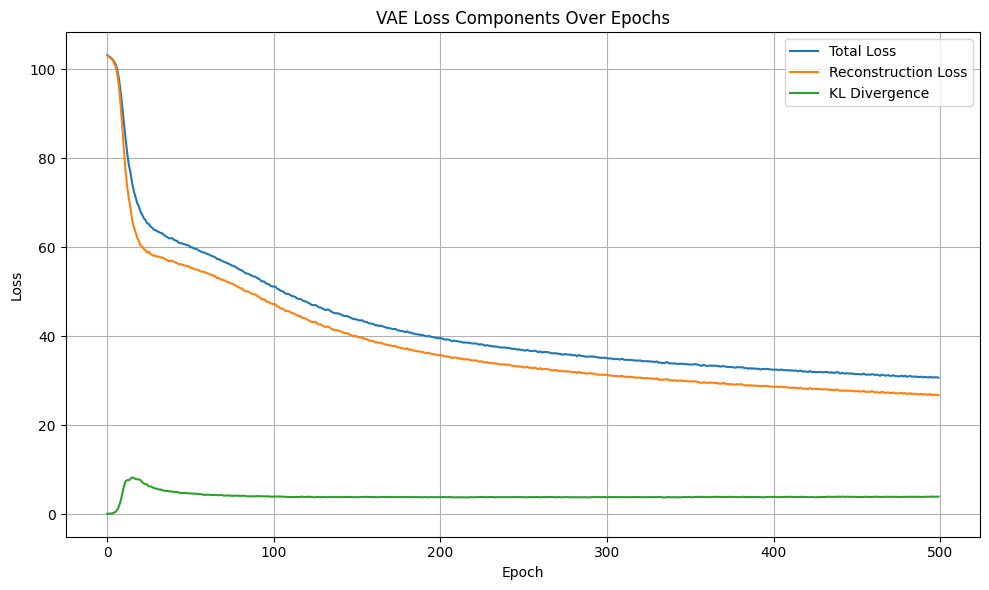

dim of latent mu: (331, 2)


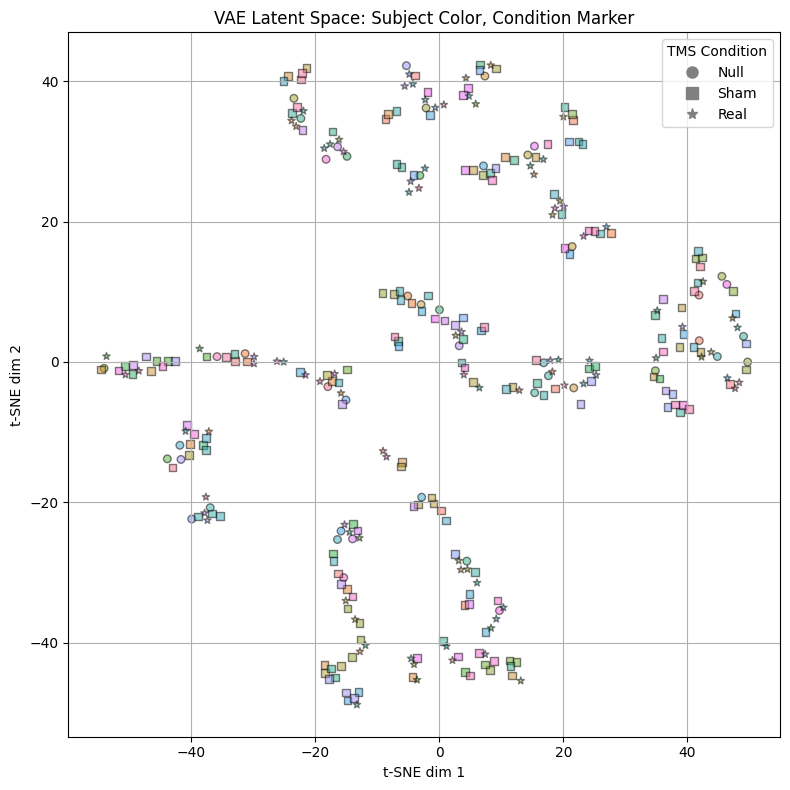

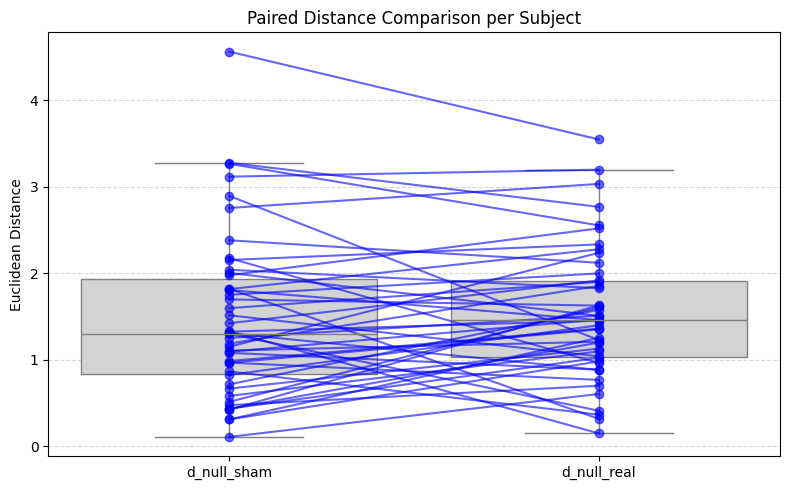

Paired t-test (ld=2): t = -0.530, p = 0.5986

=== latent_dim = 4 ===

===== Epoch 1 =====


Epoch 1/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1151.33it/s]


Epoch 1, Loss: 103.2612, Recon: 103.1484, KL: 0.1128

===== Epoch 2 =====


Epoch 2/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1189.60it/s]


Epoch 2, Loss: 102.8221, Recon: 102.7067, KL: 0.1154

===== Epoch 3 =====


Epoch 3/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1190.21it/s]


Epoch 3, Loss: 102.3495, Recon: 102.2018, KL: 0.1477

===== Epoch 4 =====


Epoch 4/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1100.21it/s]


Epoch 4, Loss: 102.0084, Recon: 101.7937, KL: 0.2147

===== Epoch 5 =====


Epoch 5/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1047.91it/s]


Epoch 5, Loss: 101.5549, Recon: 101.2032, KL: 0.3517

===== Epoch 6 =====


Epoch 6/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1211.88it/s]


Epoch 6, Loss: 100.9638, Recon: 100.3734, KL: 0.5905

===== Epoch 7 =====


Epoch 7/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 916.61it/s]


Epoch 7, Loss: 99.2924, Recon: 98.2937, KL: 0.9986

===== Epoch 8 =====


Epoch 8/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1005.65it/s]


Epoch 8, Loss: 97.5228, Recon: 95.8100, KL: 1.7128

===== Epoch 9 =====


Epoch 9/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 951.31it/s]


Epoch 9, Loss: 94.9741, Recon: 92.2218, KL: 2.7522

===== Epoch 10 =====


Epoch 10/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1171.95it/s]


Epoch 10, Loss: 91.6464, Recon: 87.3823, KL: 4.2641

===== Epoch 11 =====


Epoch 11/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1119.81it/s]


Epoch 11, Loss: 87.9849, Recon: 82.4414, KL: 5.5435

===== Epoch 12 =====


Epoch 12/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1108.09it/s]


Epoch 12, Loss: 85.4015, Recon: 79.1724, KL: 6.2291

===== Epoch 13 =====


Epoch 13/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1099.24it/s]


Epoch 13, Loss: 83.0305, Recon: 76.6679, KL: 6.3626

===== Epoch 14 =====


Epoch 14/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1055.46it/s]


Epoch 14, Loss: 80.8059, Recon: 74.1481, KL: 6.6578

===== Epoch 15 =====


Epoch 15/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1146.78it/s]


Epoch 15, Loss: 78.1821, Recon: 71.2063, KL: 6.9758

===== Epoch 16 =====


Epoch 16/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1243.76it/s]


Epoch 16, Loss: 75.8620, Recon: 68.5357, KL: 7.3264

===== Epoch 17 =====


Epoch 17/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1065.60it/s]


Epoch 17, Loss: 73.9138, Recon: 66.3148, KL: 7.5990

===== Epoch 18 =====


Epoch 18/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1062.58it/s]


Epoch 18, Loss: 72.2487, Recon: 64.3524, KL: 7.8963

===== Epoch 19 =====


Epoch 19/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1169.57it/s]


Epoch 19, Loss: 70.6748, Recon: 62.6214, KL: 8.0534

===== Epoch 20 =====


Epoch 20/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1121.66it/s]


Epoch 20, Loss: 69.5485, Recon: 61.7414, KL: 7.8071

===== Epoch 21 =====


Epoch 21/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1006.77it/s]


Epoch 21, Loss: 68.4396, Recon: 60.6863, KL: 7.7533

===== Epoch 22 =====


Epoch 22/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1178.36it/s]


Epoch 22, Loss: 67.5733, Recon: 60.0782, KL: 7.4951

===== Epoch 23 =====


Epoch 23/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1070.15it/s]


Epoch 23, Loss: 66.8396, Recon: 59.6800, KL: 7.1596

===== Epoch 24 =====


Epoch 24/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1111.10it/s]


Epoch 24, Loss: 66.0925, Recon: 59.1032, KL: 6.9893

===== Epoch 25 =====


Epoch 25/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1094.75it/s]


Epoch 25, Loss: 66.0610, Recon: 59.2220, KL: 6.8390

===== Epoch 26 =====


Epoch 26/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1012.78it/s]


Epoch 26, Loss: 64.8573, Recon: 57.9366, KL: 6.9207

===== Epoch 27 =====


Epoch 27/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1097.70it/s]


Epoch 27, Loss: 64.4847, Recon: 57.8137, KL: 6.6710

===== Epoch 28 =====


Epoch 28/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1128.99it/s]


Epoch 28, Loss: 64.1157, Recon: 57.5615, KL: 6.5542

===== Epoch 29 =====


Epoch 29/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1132.73it/s]


Epoch 29, Loss: 63.7840, Recon: 57.0384, KL: 6.7456

===== Epoch 30 =====


Epoch 30/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1109.34it/s]


Epoch 30, Loss: 62.8136, Recon: 56.1800, KL: 6.6336

===== Epoch 31 =====


Epoch 31/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1023.43it/s]


Epoch 31, Loss: 62.3938, Recon: 55.7605, KL: 6.6334

===== Epoch 32 =====


Epoch 32/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1160.19it/s]


Epoch 32, Loss: 61.6471, Recon: 54.8204, KL: 6.8267

===== Epoch 33 =====


Epoch 33/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1196.94it/s]


Epoch 33, Loss: 61.1440, Recon: 54.2070, KL: 6.9370

===== Epoch 34 =====


Epoch 34/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1226.73it/s]


Epoch 34, Loss: 60.3133, Recon: 53.2645, KL: 7.0489

===== Epoch 35 =====


Epoch 35/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1092.58it/s]


Epoch 35, Loss: 59.8300, Recon: 52.6280, KL: 7.2020

===== Epoch 36 =====


Epoch 36/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1061.70it/s]


Epoch 36, Loss: 59.0991, Recon: 51.7631, KL: 7.3359

===== Epoch 37 =====


Epoch 37/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1232.47it/s]


Epoch 37, Loss: 58.5697, Recon: 51.2025, KL: 7.3672

===== Epoch 38 =====


Epoch 38/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1151.50it/s]


Epoch 38, Loss: 57.5369, Recon: 49.9434, KL: 7.5935

===== Epoch 39 =====


Epoch 39/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1111.21it/s]


Epoch 39, Loss: 57.2250, Recon: 49.5346, KL: 7.6904

===== Epoch 40 =====


Epoch 40/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1166.97it/s]


Epoch 40, Loss: 56.4941, Recon: 48.8392, KL: 7.6549

===== Epoch 41 =====


Epoch 41/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1130.51it/s]


Epoch 41, Loss: 56.2027, Recon: 48.6177, KL: 7.5850

===== Epoch 42 =====


Epoch 42/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 933.77it/s]


Epoch 42, Loss: 55.6641, Recon: 48.0984, KL: 7.5657

===== Epoch 43 =====


Epoch 43/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1121.99it/s]


Epoch 43, Loss: 55.4772, Recon: 47.9158, KL: 7.5614

===== Epoch 44 =====


Epoch 44/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1062.61it/s]


Epoch 44, Loss: 55.4334, Recon: 47.9697, KL: 7.4637

===== Epoch 45 =====


Epoch 45/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1046.82it/s]


Epoch 45, Loss: 54.5943, Recon: 47.1933, KL: 7.4010

===== Epoch 46 =====


Epoch 46/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1100.11it/s]


Epoch 46, Loss: 54.1854, Recon: 46.9155, KL: 7.2700

===== Epoch 47 =====


Epoch 47/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 765.54it/s]


Epoch 47, Loss: 53.9450, Recon: 46.6877, KL: 7.2573

===== Epoch 48 =====


Epoch 48/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1072.89it/s]


Epoch 48, Loss: 53.5307, Recon: 46.3625, KL: 7.1682

===== Epoch 49 =====


Epoch 49/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 962.88it/s]


Epoch 49, Loss: 53.2343, Recon: 46.1787, KL: 7.0556

===== Epoch 50 =====


Epoch 50/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1172.70it/s]


Epoch 50, Loss: 52.9730, Recon: 45.9625, KL: 7.0105

===== Epoch 51 =====


Epoch 51/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1039.60it/s]


Epoch 51, Loss: 52.9195, Recon: 45.9206, KL: 6.9988

===== Epoch 52 =====


Epoch 52/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 288.46it/s]


Epoch 52, Loss: 52.7711, Recon: 45.7598, KL: 7.0113

===== Epoch 53 =====


Epoch 53/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1135.55it/s]


Epoch 53, Loss: 52.3864, Recon: 45.3957, KL: 6.9907

===== Epoch 54 =====


Epoch 54/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1137.68it/s]


Epoch 54, Loss: 52.2453, Recon: 45.2750, KL: 6.9703

===== Epoch 55 =====


Epoch 55/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1078.66it/s]


Epoch 55, Loss: 51.8608, Recon: 44.9349, KL: 6.9258

===== Epoch 56 =====


Epoch 56/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1097.15it/s]


Epoch 56, Loss: 51.5173, Recon: 44.5851, KL: 6.9322

===== Epoch 57 =====


Epoch 57/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1099.45it/s]


Epoch 57, Loss: 51.4818, Recon: 44.5247, KL: 6.9571

===== Epoch 58 =====


Epoch 58/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1129.49it/s]


Epoch 58, Loss: 51.2235, Recon: 44.2520, KL: 6.9715

===== Epoch 59 =====


Epoch 59/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1120.76it/s]


Epoch 59, Loss: 50.6124, Recon: 43.5598, KL: 7.0526

===== Epoch 60 =====


Epoch 60/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1028.89it/s]


Epoch 60, Loss: 50.4750, Recon: 43.4204, KL: 7.0546

===== Epoch 61 =====


Epoch 61/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 854.05it/s]


Epoch 61, Loss: 50.1508, Recon: 43.2006, KL: 6.9502

===== Epoch 62 =====


Epoch 62/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1003.09it/s]


Epoch 62, Loss: 49.9801, Recon: 43.0523, KL: 6.9278

===== Epoch 63 =====


Epoch 63/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1071.39it/s]


Epoch 63, Loss: 49.7298, Recon: 42.6915, KL: 7.0382

===== Epoch 64 =====


Epoch 64/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1227.51it/s]


Epoch 64, Loss: 49.4816, Recon: 42.2724, KL: 7.2093

===== Epoch 65 =====


Epoch 65/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1149.44it/s]


Epoch 65, Loss: 49.3598, Recon: 42.0651, KL: 7.2947

===== Epoch 66 =====


Epoch 66/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1110.08it/s]


Epoch 66, Loss: 48.9514, Recon: 41.6834, KL: 7.2680

===== Epoch 67 =====


Epoch 67/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1192.52it/s]


Epoch 67, Loss: 48.6054, Recon: 41.2924, KL: 7.3130

===== Epoch 68 =====


Epoch 68/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1133.21it/s]


Epoch 68, Loss: 48.2680, Recon: 41.0003, KL: 7.2677

===== Epoch 69 =====


Epoch 69/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1137.65it/s]


Epoch 69, Loss: 48.0709, Recon: 40.7705, KL: 7.3004

===== Epoch 70 =====


Epoch 70/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1131.46it/s]


Epoch 70, Loss: 47.8545, Recon: 40.5412, KL: 7.3133

===== Epoch 71 =====


Epoch 71/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1086.63it/s]


Epoch 71, Loss: 47.6231, Recon: 40.4004, KL: 7.2228

===== Epoch 72 =====


Epoch 72/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1194.62it/s]


Epoch 72, Loss: 47.5866, Recon: 40.2687, KL: 7.3179

===== Epoch 73 =====


Epoch 73/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1230.33it/s]


Epoch 73, Loss: 47.3076, Recon: 39.9875, KL: 7.3200

===== Epoch 74 =====


Epoch 74/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1076.74it/s]


Epoch 74, Loss: 47.1255, Recon: 39.8455, KL: 7.2800

===== Epoch 75 =====


Epoch 75/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1096.08it/s]


Epoch 75, Loss: 47.2143, Recon: 39.9486, KL: 7.2657

===== Epoch 76 =====


Epoch 76/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1114.16it/s]


Epoch 76, Loss: 46.6503, Recon: 39.3930, KL: 7.2573

===== Epoch 77 =====


Epoch 77/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1109.76it/s]


Epoch 77, Loss: 46.9096, Recon: 39.6727, KL: 7.2370

===== Epoch 78 =====


Epoch 78/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1263.31it/s]


Epoch 78, Loss: 46.4675, Recon: 39.1371, KL: 7.3304

===== Epoch 79 =====


Epoch 79/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1151.36it/s]


Epoch 79, Loss: 46.5008, Recon: 39.2239, KL: 7.2769

===== Epoch 80 =====


Epoch 80/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1114.91it/s]


Epoch 80, Loss: 46.1674, Recon: 39.0586, KL: 7.1088

===== Epoch 81 =====


Epoch 81/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1158.15it/s]


Epoch 81, Loss: 46.0521, Recon: 38.9590, KL: 7.0931

===== Epoch 82 =====


Epoch 82/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1041.78it/s]


Epoch 82, Loss: 46.1457, Recon: 39.0095, KL: 7.1363

===== Epoch 83 =====


Epoch 83/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1096.29it/s]


Epoch 83, Loss: 45.9840, Recon: 38.8253, KL: 7.1587

===== Epoch 84 =====


Epoch 84/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1121.55it/s]


Epoch 84, Loss: 45.8831, Recon: 38.7424, KL: 7.1406

===== Epoch 85 =====


Epoch 85/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 879.81it/s]


Epoch 85, Loss: 45.7102, Recon: 38.5580, KL: 7.1522

===== Epoch 86 =====


Epoch 86/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1024.39it/s]


Epoch 86, Loss: 45.6369, Recon: 38.4912, KL: 7.1457

===== Epoch 87 =====


Epoch 87/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1064.47it/s]


Epoch 87, Loss: 45.4573, Recon: 38.3438, KL: 7.1135

===== Epoch 88 =====


Epoch 88/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1147.98it/s]


Epoch 88, Loss: 45.5684, Recon: 38.4703, KL: 7.0982

===== Epoch 89 =====


Epoch 89/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1201.15it/s]


Epoch 89, Loss: 45.0456, Recon: 37.9161, KL: 7.1294

===== Epoch 90 =====


Epoch 90/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1058.58it/s]


Epoch 90, Loss: 45.2001, Recon: 38.1544, KL: 7.0457

===== Epoch 91 =====


Epoch 91/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 984.07it/s]


Epoch 91, Loss: 44.8852, Recon: 37.8838, KL: 7.0014

===== Epoch 92 =====


Epoch 92/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1023.36it/s]


Epoch 92, Loss: 44.7592, Recon: 37.8091, KL: 6.9501

===== Epoch 93 =====


Epoch 93/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1138.72it/s]


Epoch 93, Loss: 44.6728, Recon: 37.7708, KL: 6.9020

===== Epoch 94 =====


Epoch 94/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1247.70it/s]


Epoch 94, Loss: 44.8640, Recon: 37.9690, KL: 6.8950

===== Epoch 95 =====


Epoch 95/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 917.30it/s]


Epoch 95, Loss: 44.5504, Recon: 37.6368, KL: 6.9136

===== Epoch 96 =====


Epoch 96/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1055.17it/s]


Epoch 96, Loss: 44.6458, Recon: 37.7159, KL: 6.9299

===== Epoch 97 =====


Epoch 97/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1146.47it/s]


Epoch 97, Loss: 44.5025, Recon: 37.6174, KL: 6.8851

===== Epoch 98 =====


Epoch 98/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 903.34it/s]


Epoch 98, Loss: 44.1130, Recon: 37.2304, KL: 6.8826

===== Epoch 99 =====


Epoch 99/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1098.04it/s]


Epoch 99, Loss: 44.3239, Recon: 37.5120, KL: 6.8119

===== Epoch 100 =====


Epoch 100/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1160.86it/s]


Epoch 100, Loss: 44.2190, Recon: 37.3948, KL: 6.8242

===== Epoch 101 =====


Epoch 101/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1001.18it/s]


Epoch 101, Loss: 43.8614, Recon: 37.0141, KL: 6.8472

===== Epoch 102 =====


Epoch 102/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 949.02it/s]


Epoch 102, Loss: 44.0755, Recon: 37.2590, KL: 6.8165

===== Epoch 103 =====


Epoch 103/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1068.76it/s]


Epoch 103, Loss: 43.8543, Recon: 37.0307, KL: 6.8237

===== Epoch 104 =====


Epoch 104/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1166.62it/s]


Epoch 104, Loss: 43.7627, Recon: 36.9745, KL: 6.7883

===== Epoch 105 =====


Epoch 105/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1040.58it/s]


Epoch 105, Loss: 43.6377, Recon: 36.8351, KL: 6.8026

===== Epoch 106 =====


Epoch 106/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.09it/s]


Epoch 106, Loss: 43.7532, Recon: 36.9763, KL: 6.7769

===== Epoch 107 =====


Epoch 107/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1082.25it/s]


Epoch 107, Loss: 43.5593, Recon: 36.7893, KL: 6.7700

===== Epoch 108 =====


Epoch 108/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.10it/s]


Epoch 108, Loss: 43.3965, Recon: 36.6349, KL: 6.7616

===== Epoch 109 =====


Epoch 109/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1090.30it/s]


Epoch 109, Loss: 43.1817, Recon: 36.3733, KL: 6.8084

===== Epoch 110 =====


Epoch 110/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1035.31it/s]


Epoch 110, Loss: 43.5237, Recon: 36.7120, KL: 6.8117

===== Epoch 111 =====


Epoch 111/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1124.29it/s]


Epoch 111, Loss: 43.2622, Recon: 36.5063, KL: 6.7559

===== Epoch 112 =====


Epoch 112/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1016.62it/s]


Epoch 112, Loss: 43.1807, Recon: 36.4179, KL: 6.7628

===== Epoch 113 =====


Epoch 113/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1045.04it/s]


Epoch 113, Loss: 42.9151, Recon: 36.1287, KL: 6.7864

===== Epoch 114 =====


Epoch 114/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1081.92it/s]


Epoch 114, Loss: 43.0513, Recon: 36.2608, KL: 6.7905

===== Epoch 115 =====


Epoch 115/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1106.31it/s]


Epoch 115, Loss: 42.6629, Recon: 35.8881, KL: 6.7747

===== Epoch 116 =====


Epoch 116/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1034.31it/s]


Epoch 116, Loss: 42.7532, Recon: 36.0291, KL: 6.7241

===== Epoch 117 =====


Epoch 117/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1132.84it/s]


Epoch 117, Loss: 42.5745, Recon: 35.8864, KL: 6.6881

===== Epoch 118 =====


Epoch 118/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.57it/s]


Epoch 118, Loss: 42.9302, Recon: 36.1900, KL: 6.7402

===== Epoch 119 =====


Epoch 119/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.20it/s]


Epoch 119, Loss: 42.5777, Recon: 35.8056, KL: 6.7721

===== Epoch 120 =====


Epoch 120/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.24it/s]


Epoch 120, Loss: 42.2088, Recon: 35.4913, KL: 6.7175

===== Epoch 121 =====


Epoch 121/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 503.32it/s]


Epoch 121, Loss: 42.1947, Recon: 35.5200, KL: 6.6747

===== Epoch 122 =====


Epoch 122/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 647.02it/s]


Epoch 122, Loss: 42.4638, Recon: 35.7839, KL: 6.6799

===== Epoch 123 =====


Epoch 123/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1108.99it/s]


Epoch 123, Loss: 42.0661, Recon: 35.3757, KL: 6.6904

===== Epoch 124 =====


Epoch 124/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1160.08it/s]


Epoch 124, Loss: 42.1965, Recon: 35.5608, KL: 6.6357

===== Epoch 125 =====


Epoch 125/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1178.87it/s]


Epoch 125, Loss: 41.8566, Recon: 35.1183, KL: 6.7383

===== Epoch 126 =====


Epoch 126/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1165.11it/s]


Epoch 126, Loss: 41.8356, Recon: 35.1061, KL: 6.7295

===== Epoch 127 =====


Epoch 127/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.39it/s]


Epoch 127, Loss: 41.9959, Recon: 35.3509, KL: 6.6450

===== Epoch 128 =====


Epoch 128/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1072.14it/s]


Epoch 128, Loss: 42.0016, Recon: 35.3074, KL: 6.6942

===== Epoch 129 =====


Epoch 129/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 888.88it/s]


Epoch 129, Loss: 41.7403, Recon: 34.9557, KL: 6.7846

===== Epoch 130 =====


Epoch 130/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1103.39it/s]


Epoch 130, Loss: 41.6100, Recon: 34.9028, KL: 6.7073

===== Epoch 131 =====


Epoch 131/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1033.70it/s]


Epoch 131, Loss: 41.6160, Recon: 34.8704, KL: 6.7456

===== Epoch 132 =====


Epoch 132/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1129.57it/s]


Epoch 132, Loss: 41.2228, Recon: 34.4879, KL: 6.7350

===== Epoch 133 =====


Epoch 133/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1257.29it/s]


Epoch 133, Loss: 41.2470, Recon: 34.6310, KL: 6.6161

===== Epoch 134 =====


Epoch 134/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1235.93it/s]


Epoch 134, Loss: 41.3750, Recon: 34.7687, KL: 6.6063

===== Epoch 135 =====


Epoch 135/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1087.89it/s]


Epoch 135, Loss: 41.2048, Recon: 34.5310, KL: 6.6739

===== Epoch 136 =====


Epoch 136/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1210.10it/s]


Epoch 136, Loss: 41.0107, Recon: 34.3322, KL: 6.6785

===== Epoch 137 =====


Epoch 137/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 902.53it/s]


Epoch 137, Loss: 40.7801, Recon: 34.1495, KL: 6.6306

===== Epoch 138 =====


Epoch 138/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1099.01it/s]


Epoch 138, Loss: 40.8152, Recon: 34.2131, KL: 6.6021

===== Epoch 139 =====


Epoch 139/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1034.03it/s]


Epoch 139, Loss: 40.9454, Recon: 34.3353, KL: 6.6101

===== Epoch 140 =====


Epoch 140/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1032.57it/s]


Epoch 140, Loss: 40.7063, Recon: 34.0567, KL: 6.6496

===== Epoch 141 =====


Epoch 141/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1137.40it/s]


Epoch 141, Loss: 40.6453, Recon: 34.0661, KL: 6.5792

===== Epoch 142 =====


Epoch 142/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1086.84it/s]


Epoch 142, Loss: 40.5022, Recon: 33.9002, KL: 6.6019

===== Epoch 143 =====


Epoch 143/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 946.97it/s]


Epoch 143, Loss: 40.2728, Recon: 33.6793, KL: 6.5935

===== Epoch 144 =====


Epoch 144/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1023.84it/s]


Epoch 144, Loss: 40.6287, Recon: 34.0729, KL: 6.5558

===== Epoch 145 =====


Epoch 145/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 706.22it/s]


Epoch 145, Loss: 40.4449, Recon: 33.8100, KL: 6.6349

===== Epoch 146 =====


Epoch 146/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1009.17it/s]


Epoch 146, Loss: 40.0518, Recon: 33.4047, KL: 6.6471

===== Epoch 147 =====


Epoch 147/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1082.58it/s]


Epoch 147, Loss: 40.0699, Recon: 33.5126, KL: 6.5573

===== Epoch 148 =====


Epoch 148/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1008.64it/s]


Epoch 148, Loss: 40.1808, Recon: 33.5306, KL: 6.6502

===== Epoch 149 =====


Epoch 149/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.68it/s]


Epoch 149, Loss: 40.0877, Recon: 33.4585, KL: 6.6292

===== Epoch 150 =====


Epoch 150/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1091.47it/s]


Epoch 150, Loss: 39.8056, Recon: 33.2264, KL: 6.5792

===== Epoch 151 =====


Epoch 151/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 991.82it/s]


Epoch 151, Loss: 39.8225, Recon: 33.2285, KL: 6.5940

===== Epoch 152 =====


Epoch 152/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.15it/s]


Epoch 152, Loss: 39.6533, Recon: 33.0661, KL: 6.5871

===== Epoch 153 =====


Epoch 153/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1115.13it/s]


Epoch 153, Loss: 39.6969, Recon: 33.0976, KL: 6.5993

===== Epoch 154 =====


Epoch 154/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1062.17it/s]


Epoch 154, Loss: 39.4945, Recon: 32.9380, KL: 6.5566

===== Epoch 155 =====


Epoch 155/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1039.50it/s]


Epoch 155, Loss: 39.4961, Recon: 32.9690, KL: 6.5271

===== Epoch 156 =====


Epoch 156/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1231.15it/s]


Epoch 156, Loss: 39.4437, Recon: 32.8896, KL: 6.5542

===== Epoch 157 =====


Epoch 157/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1004.45it/s]


Epoch 157, Loss: 39.2501, Recon: 32.6680, KL: 6.5821

===== Epoch 158 =====


Epoch 158/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.99it/s]


Epoch 158, Loss: 39.1794, Recon: 32.6461, KL: 6.5333

===== Epoch 159 =====


Epoch 159/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1185.20it/s]


Epoch 159, Loss: 39.0147, Recon: 32.5288, KL: 6.4859

===== Epoch 160 =====


Epoch 160/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1050.70it/s]


Epoch 160, Loss: 39.1366, Recon: 32.6473, KL: 6.4893

===== Epoch 161 =====


Epoch 161/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1137.51it/s]


Epoch 161, Loss: 39.0972, Recon: 32.5660, KL: 6.5311

===== Epoch 162 =====


Epoch 162/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1087.07it/s]


Epoch 162, Loss: 39.0923, Recon: 32.5334, KL: 6.5588

===== Epoch 163 =====


Epoch 163/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 843.23it/s]


Epoch 163, Loss: 38.7504, Recon: 32.1560, KL: 6.5944

===== Epoch 164 =====


Epoch 164/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.07it/s]


Epoch 164, Loss: 38.8559, Recon: 32.2541, KL: 6.6018

===== Epoch 165 =====


Epoch 165/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1204.57it/s]


Epoch 165, Loss: 38.7614, Recon: 32.1574, KL: 6.6040

===== Epoch 166 =====


Epoch 166/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1025.73it/s]


Epoch 166, Loss: 38.7055, Recon: 32.0878, KL: 6.6178

===== Epoch 167 =====


Epoch 167/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.36it/s]


Epoch 167, Loss: 38.4651, Recon: 31.8467, KL: 6.6183

===== Epoch 168 =====


Epoch 168/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 962.22it/s]


Epoch 168, Loss: 38.7545, Recon: 32.1643, KL: 6.5902

===== Epoch 169 =====


Epoch 169/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 987.17it/s]


Epoch 169, Loss: 38.4058, Recon: 31.7621, KL: 6.6437

===== Epoch 170 =====


Epoch 170/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1078.86it/s]


Epoch 170, Loss: 38.0659, Recon: 31.4356, KL: 6.6303

===== Epoch 171 =====


Epoch 171/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 910.38it/s]


Epoch 171, Loss: 38.3153, Recon: 31.7491, KL: 6.5662

===== Epoch 172 =====


Epoch 172/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.92it/s]


Epoch 172, Loss: 38.1181, Recon: 31.5281, KL: 6.5899

===== Epoch 173 =====


Epoch 173/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1102.10it/s]


Epoch 173, Loss: 38.1274, Recon: 31.5766, KL: 6.5508

===== Epoch 174 =====


Epoch 174/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 998.56it/s]


Epoch 174, Loss: 38.1503, Recon: 31.5976, KL: 6.5527

===== Epoch 175 =====


Epoch 175/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 563.55it/s]


Epoch 175, Loss: 37.9893, Recon: 31.4160, KL: 6.5733

===== Epoch 176 =====


Epoch 176/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1098.27it/s]


Epoch 176, Loss: 37.8322, Recon: 31.2610, KL: 6.5712

===== Epoch 177 =====


Epoch 177/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1056.16it/s]


Epoch 177, Loss: 37.6250, Recon: 31.0258, KL: 6.5992

===== Epoch 178 =====


Epoch 178/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1022.41it/s]


Epoch 178, Loss: 37.8679, Recon: 31.2948, KL: 6.5731

===== Epoch 179 =====


Epoch 179/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.72it/s]


Epoch 179, Loss: 37.6443, Recon: 31.0668, KL: 6.5775

===== Epoch 180 =====


Epoch 180/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1128.08it/s]


Epoch 180, Loss: 37.5846, Recon: 31.0335, KL: 6.5512

===== Epoch 181 =====


Epoch 181/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.06it/s]


Epoch 181, Loss: 37.5321, Recon: 30.9793, KL: 6.5528

===== Epoch 182 =====


Epoch 182/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1163.56it/s]


Epoch 182, Loss: 37.3821, Recon: 30.8084, KL: 6.5737

===== Epoch 183 =====


Epoch 183/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1047.91it/s]


Epoch 183, Loss: 37.3546, Recon: 30.7837, KL: 6.5709

===== Epoch 184 =====


Epoch 184/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 805.79it/s]


Epoch 184, Loss: 37.2060, Recon: 30.7008, KL: 6.5052

===== Epoch 185 =====


Epoch 185/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 887.89it/s]


Epoch 185, Loss: 37.3267, Recon: 30.8117, KL: 6.5150

===== Epoch 186 =====


Epoch 186/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 841.23it/s]


Epoch 186, Loss: 37.2010, Recon: 30.6411, KL: 6.5599

===== Epoch 187 =====


Epoch 187/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1065.50it/s]


Epoch 187, Loss: 37.0558, Recon: 30.4972, KL: 6.5586

===== Epoch 188 =====


Epoch 188/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 969.25it/s]


Epoch 188, Loss: 37.1279, Recon: 30.5883, KL: 6.5396

===== Epoch 189 =====


Epoch 189/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1232.89it/s]


Epoch 189, Loss: 36.7039, Recon: 30.1586, KL: 6.5453

===== Epoch 190 =====


Epoch 190/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1052.31it/s]


Epoch 190, Loss: 36.7871, Recon: 30.2376, KL: 6.5495

===== Epoch 191 =====


Epoch 191/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1206.93it/s]


Epoch 191, Loss: 36.8024, Recon: 30.3341, KL: 6.4683

===== Epoch 192 =====


Epoch 192/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1133.21it/s]


Epoch 192, Loss: 36.7590, Recon: 30.2385, KL: 6.5205

===== Epoch 193 =====


Epoch 193/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1120.95it/s]


Epoch 193, Loss: 36.6884, Recon: 30.2070, KL: 6.4814

===== Epoch 194 =====


Epoch 194/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1054.93it/s]


Epoch 194, Loss: 36.5506, Recon: 30.0924, KL: 6.4582

===== Epoch 195 =====


Epoch 195/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1100.34it/s]


Epoch 195, Loss: 36.5402, Recon: 30.0458, KL: 6.4944

===== Epoch 196 =====


Epoch 196/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1120.41it/s]


Epoch 196, Loss: 36.3574, Recon: 29.8304, KL: 6.5270

===== Epoch 197 =====


Epoch 197/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1118.81it/s]


Epoch 197, Loss: 36.5814, Recon: 30.0653, KL: 6.5161

===== Epoch 198 =====


Epoch 198/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1230.82it/s]


Epoch 198, Loss: 36.3884, Recon: 29.8369, KL: 6.5515

===== Epoch 199 =====


Epoch 199/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1029.58it/s]


Epoch 199, Loss: 36.3734, Recon: 29.8485, KL: 6.5249

===== Epoch 200 =====


Epoch 200/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1060.56it/s]


Epoch 200, Loss: 36.2230, Recon: 29.6992, KL: 6.5238

===== Epoch 201 =====


Epoch 201/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1072.94it/s]


Epoch 201, Loss: 36.0720, Recon: 29.4934, KL: 6.5786

===== Epoch 202 =====


Epoch 202/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.64it/s]


Epoch 202, Loss: 36.0647, Recon: 29.5228, KL: 6.5419

===== Epoch 203 =====


Epoch 203/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1068.56it/s]


Epoch 203, Loss: 35.8947, Recon: 29.3729, KL: 6.5218

===== Epoch 204 =====


Epoch 204/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.78it/s]


Epoch 204, Loss: 35.8580, Recon: 29.3766, KL: 6.4814

===== Epoch 205 =====


Epoch 205/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 950.83it/s]


Epoch 205, Loss: 35.8516, Recon: 29.3797, KL: 6.4719

===== Epoch 206 =====


Epoch 206/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1034.52it/s]


Epoch 206, Loss: 35.8708, Recon: 29.3942, KL: 6.4766

===== Epoch 207 =====


Epoch 207/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1188.92it/s]


Epoch 207, Loss: 35.6992, Recon: 29.2039, KL: 6.4953

===== Epoch 208 =====


Epoch 208/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.25it/s]


Epoch 208, Loss: 35.4738, Recon: 28.9697, KL: 6.5041

===== Epoch 209 =====


Epoch 209/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 596.04it/s]


Epoch 209, Loss: 35.6815, Recon: 29.1956, KL: 6.4860

===== Epoch 210 =====


Epoch 210/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 915.97it/s]


Epoch 210, Loss: 35.7546, Recon: 29.3013, KL: 6.4533

===== Epoch 211 =====


Epoch 211/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 406.07it/s]


Epoch 211, Loss: 35.3970, Recon: 28.9641, KL: 6.4329

===== Epoch 212 =====


Epoch 212/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1000.29it/s]


Epoch 212, Loss: 35.4919, Recon: 28.9845, KL: 6.5074

===== Epoch 213 =====


Epoch 213/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 896.13it/s]


Epoch 213, Loss: 35.3718, Recon: 28.8804, KL: 6.4914

===== Epoch 214 =====


Epoch 214/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 616.63it/s]


Epoch 214, Loss: 35.4365, Recon: 28.9445, KL: 6.4919

===== Epoch 215 =====


Epoch 215/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 741.23it/s]


Epoch 215, Loss: 35.3168, Recon: 28.8133, KL: 6.5035

===== Epoch 216 =====


Epoch 216/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 874.97it/s]


Epoch 216, Loss: 35.2618, Recon: 28.7828, KL: 6.4791

===== Epoch 217 =====


Epoch 217/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 931.86it/s]


Epoch 217, Loss: 35.1489, Recon: 28.6668, KL: 6.4820

===== Epoch 218 =====


Epoch 218/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 839.26it/s]


Epoch 218, Loss: 35.1387, Recon: 28.6712, KL: 6.4675

===== Epoch 219 =====


Epoch 219/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 885.83it/s]


Epoch 219, Loss: 35.1163, Recon: 28.6002, KL: 6.5161

===== Epoch 220 =====


Epoch 220/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.18it/s]


Epoch 220, Loss: 34.9497, Recon: 28.4244, KL: 6.5253

===== Epoch 221 =====


Epoch 221/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1117.21it/s]


Epoch 221, Loss: 34.8314, Recon: 28.3516, KL: 6.4798

===== Epoch 222 =====


Epoch 222/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.43it/s]


Epoch 222, Loss: 34.8554, Recon: 28.4257, KL: 6.4297

===== Epoch 223 =====


Epoch 223/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1036.05it/s]


Epoch 223, Loss: 34.8215, Recon: 28.4153, KL: 6.4062

===== Epoch 224 =====


Epoch 224/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1049.12it/s]


Epoch 224, Loss: 34.6403, Recon: 28.2379, KL: 6.4024

===== Epoch 225 =====


Epoch 225/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1038.61it/s]


Epoch 225, Loss: 34.7625, Recon: 28.3278, KL: 6.4348

===== Epoch 226 =====


Epoch 226/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1059.92it/s]


Epoch 226, Loss: 34.7766, Recon: 28.2851, KL: 6.4915

===== Epoch 227 =====


Epoch 227/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1073.71it/s]


Epoch 227, Loss: 34.6426, Recon: 28.1524, KL: 6.4902

===== Epoch 228 =====


Epoch 228/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1183.95it/s]


Epoch 228, Loss: 34.6365, Recon: 28.1513, KL: 6.4852

===== Epoch 229 =====


Epoch 229/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 983.11it/s]


Epoch 229, Loss: 34.4657, Recon: 27.9439, KL: 6.5218

===== Epoch 230 =====


Epoch 230/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1005.70it/s]


Epoch 230, Loss: 34.4157, Recon: 27.9140, KL: 6.5016

===== Epoch 231 =====


Epoch 231/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1111.56it/s]


Epoch 231, Loss: 34.4957, Recon: 28.0582, KL: 6.4375

===== Epoch 232 =====


Epoch 232/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 966.69it/s]


Epoch 232, Loss: 34.2755, Recon: 27.8255, KL: 6.4500

===== Epoch 233 =====


Epoch 233/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1221.37it/s]


Epoch 233, Loss: 34.3983, Recon: 27.9134, KL: 6.4849

===== Epoch 234 =====


Epoch 234/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1120.52it/s]


Epoch 234, Loss: 34.2282, Recon: 27.7427, KL: 6.4855

===== Epoch 235 =====


Epoch 235/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.92it/s]


Epoch 235, Loss: 34.1206, Recon: 27.6969, KL: 6.4237

===== Epoch 236 =====


Epoch 236/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1092.01it/s]


Epoch 236, Loss: 34.1290, Recon: 27.6921, KL: 6.4368

===== Epoch 237 =====


Epoch 237/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1090.98it/s]


Epoch 237, Loss: 34.0808, Recon: 27.6509, KL: 6.4299

===== Epoch 238 =====


Epoch 238/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1133.12it/s]


Epoch 238, Loss: 34.2331, Recon: 27.8363, KL: 6.3968

===== Epoch 239 =====


Epoch 239/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.18it/s]


Epoch 239, Loss: 33.9272, Recon: 27.4895, KL: 6.4377

===== Epoch 240 =====


Epoch 240/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1186.63it/s]


Epoch 240, Loss: 34.0238, Recon: 27.6035, KL: 6.4203

===== Epoch 241 =====


Epoch 241/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1137.06it/s]


Epoch 241, Loss: 33.9910, Recon: 27.5671, KL: 6.4239

===== Epoch 242 =====


Epoch 242/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 948.61it/s]


Epoch 242, Loss: 33.7952, Recon: 27.3140, KL: 6.4812

===== Epoch 243 =====


Epoch 243/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 530.17it/s]


Epoch 243, Loss: 33.6129, Recon: 27.1546, KL: 6.4583

===== Epoch 244 =====


Epoch 244/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1207.47it/s]


Epoch 244, Loss: 33.8014, Recon: 27.4179, KL: 6.3835

===== Epoch 245 =====


Epoch 245/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.01it/s]


Epoch 245, Loss: 33.6559, Recon: 27.2137, KL: 6.4421

===== Epoch 246 =====


Epoch 246/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1023.64it/s]


Epoch 246, Loss: 33.7666, Recon: 27.3808, KL: 6.3858

===== Epoch 247 =====


Epoch 247/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1115.18it/s]


Epoch 247, Loss: 33.8524, Recon: 27.4370, KL: 6.4155

===== Epoch 248 =====


Epoch 248/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1141.42it/s]


Epoch 248, Loss: 33.6576, Recon: 27.2012, KL: 6.4564

===== Epoch 249 =====


Epoch 249/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1061.48it/s]


Epoch 249, Loss: 33.7039, Recon: 27.2227, KL: 6.4812

===== Epoch 250 =====


Epoch 250/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.09it/s]


Epoch 250, Loss: 33.6856, Recon: 27.1512, KL: 6.5344

===== Epoch 251 =====


Epoch 251/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 925.21it/s]


Epoch 251, Loss: 33.2892, Recon: 26.7780, KL: 6.5112

===== Epoch 252 =====


Epoch 252/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 917.04it/s]


Epoch 252, Loss: 33.3300, Recon: 26.9034, KL: 6.4266

===== Epoch 253 =====


Epoch 253/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1079.19it/s]


Epoch 253, Loss: 33.4009, Recon: 26.9599, KL: 6.4410

===== Epoch 254 =====


Epoch 254/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1096.39it/s]


Epoch 254, Loss: 33.4553, Recon: 26.9986, KL: 6.4567

===== Epoch 255 =====


Epoch 255/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1035.58it/s]


Epoch 255, Loss: 33.3406, Recon: 26.8812, KL: 6.4595

===== Epoch 256 =====


Epoch 256/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.82it/s]


Epoch 256, Loss: 33.5078, Recon: 27.0244, KL: 6.4834

===== Epoch 257 =====


Epoch 257/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1045.04it/s]


Epoch 257, Loss: 33.2874, Recon: 26.7994, KL: 6.4880

===== Epoch 258 =====


Epoch 258/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1105.77it/s]


Epoch 258, Loss: 33.3599, Recon: 26.8338, KL: 6.5261

===== Epoch 259 =====


Epoch 259/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1173.47it/s]


Epoch 259, Loss: 33.2541, Recon: 26.6908, KL: 6.5633

===== Epoch 260 =====


Epoch 260/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1055.87it/s]


Epoch 260, Loss: 33.1743, Recon: 26.6564, KL: 6.5179

===== Epoch 261 =====


Epoch 261/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1117.45it/s]


Epoch 261, Loss: 32.9585, Recon: 26.4418, KL: 6.5167

===== Epoch 262 =====


Epoch 262/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1125.55it/s]


Epoch 262, Loss: 33.1041, Recon: 26.6404, KL: 6.4637

===== Epoch 263 =====


Epoch 263/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1206.39it/s]


Epoch 263, Loss: 33.1847, Recon: 26.7515, KL: 6.4332

===== Epoch 264 =====


Epoch 264/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1091.05it/s]


Epoch 264, Loss: 32.9172, Recon: 26.4132, KL: 6.5040

===== Epoch 265 =====


Epoch 265/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1113.59it/s]


Epoch 265, Loss: 32.7988, Recon: 26.3340, KL: 6.4647

===== Epoch 266 =====


Epoch 266/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1109.87it/s]


Epoch 266, Loss: 32.8419, Recon: 26.4351, KL: 6.4067

===== Epoch 267 =====


Epoch 267/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1028.22it/s]


Epoch 267, Loss: 32.9414, Recon: 26.5130, KL: 6.4283

===== Epoch 268 =====


Epoch 268/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1134.13it/s]


Epoch 268, Loss: 32.9385, Recon: 26.4697, KL: 6.4688

===== Epoch 269 =====


Epoch 269/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 992.61it/s]


Epoch 269, Loss: 32.7229, Recon: 26.2321, KL: 6.4908

===== Epoch 270 =====


Epoch 270/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1170.11it/s]


Epoch 270, Loss: 32.7024, Recon: 26.2565, KL: 6.4458

===== Epoch 271 =====


Epoch 271/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1099.16it/s]


Epoch 271, Loss: 32.7305, Recon: 26.2647, KL: 6.4659

===== Epoch 272 =====


Epoch 272/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.95it/s]


Epoch 272, Loss: 32.5981, Recon: 26.1218, KL: 6.4763

===== Epoch 273 =====


Epoch 273/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1020.60it/s]

Epoch 273, Loss: 32.4673, Recon: 26.0193, KL: 6.4480

===== Epoch 274 =====



Epoch 274/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1233.45it/s]


Epoch 274, Loss: 32.5309, Recon: 26.1232, KL: 6.4077

===== Epoch 275 =====


Epoch 275/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.59it/s]


Epoch 275, Loss: 32.6161, Recon: 26.2156, KL: 6.4005

===== Epoch 276 =====


Epoch 276/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1170.97it/s]


Epoch 276, Loss: 32.3214, Recon: 25.9076, KL: 6.4139

===== Epoch 277 =====


Epoch 277/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1000.46it/s]


Epoch 277, Loss: 32.3477, Recon: 25.9556, KL: 6.3921

===== Epoch 278 =====


Epoch 278/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1172.58it/s]


Epoch 278, Loss: 32.3117, Recon: 25.9388, KL: 6.3730

===== Epoch 279 =====


Epoch 279/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1037.84it/s]


Epoch 279, Loss: 32.4137, Recon: 26.0942, KL: 6.3195

===== Epoch 280 =====


Epoch 280/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1150.04it/s]


Epoch 280, Loss: 32.2410, Recon: 25.8751, KL: 6.3658

===== Epoch 281 =====


Epoch 281/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1165.73it/s]


Epoch 281, Loss: 32.2056, Recon: 25.8071, KL: 6.3985

===== Epoch 282 =====


Epoch 282/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1190.09it/s]


Epoch 282, Loss: 32.2305, Recon: 25.8312, KL: 6.3993

===== Epoch 283 =====


Epoch 283/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1003.29it/s]


Epoch 283, Loss: 32.2057, Recon: 25.8247, KL: 6.3810

===== Epoch 284 =====


Epoch 284/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 997.26it/s]


Epoch 284, Loss: 32.3148, Recon: 25.9180, KL: 6.3968

===== Epoch 285 =====


Epoch 285/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1089.76it/s]


Epoch 285, Loss: 32.3374, Recon: 25.8837, KL: 6.4537

===== Epoch 286 =====


Epoch 286/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1224.52it/s]


Epoch 286, Loss: 31.9633, Recon: 25.5035, KL: 6.4598

===== Epoch 287 =====


Epoch 287/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1086.84it/s]


Epoch 287, Loss: 32.1074, Recon: 25.7104, KL: 6.3970

===== Epoch 288 =====


Epoch 288/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1061.24it/s]


Epoch 288, Loss: 31.9045, Recon: 25.4892, KL: 6.4152

===== Epoch 289 =====


Epoch 289/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.85it/s]


Epoch 289, Loss: 31.9035, Recon: 25.5170, KL: 6.3866

===== Epoch 290 =====


Epoch 290/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1068.51it/s]


Epoch 290, Loss: 31.9427, Recon: 25.6045, KL: 6.3382

===== Epoch 291 =====


Epoch 291/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 961.03it/s]


Epoch 291, Loss: 31.8450, Recon: 25.4945, KL: 6.3505

===== Epoch 292 =====


Epoch 292/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1055.07it/s]


Epoch 292, Loss: 32.0547, Recon: 25.6819, KL: 6.3728

===== Epoch 293 =====


Epoch 293/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1146.21it/s]


Epoch 293, Loss: 31.8464, Recon: 25.4507, KL: 6.3957

===== Epoch 294 =====


Epoch 294/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 903.50it/s]


Epoch 294, Loss: 32.1142, Recon: 25.6881, KL: 6.4262

===== Epoch 295 =====


Epoch 295/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.64it/s]


Epoch 295, Loss: 31.8643, Recon: 25.4707, KL: 6.3936

===== Epoch 296 =====


Epoch 296/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1121.09it/s]


Epoch 296, Loss: 31.6872, Recon: 25.2932, KL: 6.3940

===== Epoch 297 =====


Epoch 297/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1078.86it/s]


Epoch 297, Loss: 31.9463, Recon: 25.5180, KL: 6.4283

===== Epoch 298 =====


Epoch 298/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.51it/s]


Epoch 298, Loss: 31.5576, Recon: 25.1284, KL: 6.4292

===== Epoch 299 =====


Epoch 299/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1023.61it/s]


Epoch 299, Loss: 31.6375, Recon: 25.2263, KL: 6.4112

===== Epoch 300 =====


Epoch 300/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 994.32it/s]


Epoch 300, Loss: 31.8113, Recon: 25.4200, KL: 6.3914

===== Epoch 301 =====


Epoch 301/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1035.40it/s]


Epoch 301, Loss: 31.5159, Recon: 25.1066, KL: 6.4093

===== Epoch 302 =====


Epoch 302/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 886.68it/s]


Epoch 302, Loss: 31.6604, Recon: 25.2469, KL: 6.4134

===== Epoch 303 =====


Epoch 303/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1106.31it/s]


Epoch 303, Loss: 31.4794, Recon: 25.0837, KL: 6.3957

===== Epoch 304 =====


Epoch 304/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.11it/s]


Epoch 304, Loss: 31.6069, Recon: 25.2219, KL: 6.3851

===== Epoch 305 =====


Epoch 305/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1113.35it/s]


Epoch 305, Loss: 31.5769, Recon: 25.2064, KL: 6.3705

===== Epoch 306 =====


Epoch 306/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1204.19it/s]


Epoch 306, Loss: 31.4998, Recon: 25.1351, KL: 6.3646

===== Epoch 307 =====


Epoch 307/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1048.84it/s]


Epoch 307, Loss: 31.4759, Recon: 25.0754, KL: 6.4005

===== Epoch 308 =====


Epoch 308/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.50it/s]


Epoch 308, Loss: 31.6018, Recon: 25.1400, KL: 6.4619

===== Epoch 309 =====


Epoch 309/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1109.87it/s]


Epoch 309, Loss: 31.5508, Recon: 25.0275, KL: 6.5232

===== Epoch 310 =====


Epoch 310/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1072.09it/s]


Epoch 310, Loss: 31.4559, Recon: 24.9534, KL: 6.5025

===== Epoch 311 =====


Epoch 311/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 911.64it/s]


Epoch 311, Loss: 31.3444, Recon: 24.8767, KL: 6.4677

===== Epoch 312 =====


Epoch 312/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1097.78it/s]


Epoch 312, Loss: 31.3125, Recon: 24.8775, KL: 6.4350

===== Epoch 313 =====


Epoch 313/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1121.66it/s]


Epoch 313, Loss: 31.3456, Recon: 24.9623, KL: 6.3833

===== Epoch 314 =====


Epoch 314/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1022.80it/s]


Epoch 314, Loss: 31.3120, Recon: 24.9002, KL: 6.4118

===== Epoch 315 =====


Epoch 315/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 996.94it/s]


Epoch 315, Loss: 31.0007, Recon: 24.5500, KL: 6.4508

===== Epoch 316 =====


Epoch 316/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1133.40it/s]


Epoch 316, Loss: 31.3334, Recon: 24.9539, KL: 6.3795

===== Epoch 317 =====


Epoch 317/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1013.07it/s]


Epoch 317, Loss: 31.2881, Recon: 24.9109, KL: 6.3771

===== Epoch 318 =====


Epoch 318/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1170.73it/s]


Epoch 318, Loss: 31.2023, Recon: 24.7152, KL: 6.4871

===== Epoch 319 =====


Epoch 319/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1193.60it/s]


Epoch 319, Loss: 31.1380, Recon: 24.6267, KL: 6.5114

===== Epoch 320 =====


Epoch 320/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1107.29it/s]


Epoch 320, Loss: 31.1635, Recon: 24.7104, KL: 6.4531

===== Epoch 321 =====


Epoch 321/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.35it/s]


Epoch 321, Loss: 31.1295, Recon: 24.6869, KL: 6.4426

===== Epoch 322 =====


Epoch 322/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1106.54it/s]


Epoch 322, Loss: 31.0593, Recon: 24.5962, KL: 6.4630

===== Epoch 323 =====


Epoch 323/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1115.97it/s]


Epoch 323, Loss: 30.8756, Recon: 24.4517, KL: 6.4239

===== Epoch 324 =====


Epoch 324/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1062.41it/s]


Epoch 324, Loss: 31.0061, Recon: 24.5980, KL: 6.4081

===== Epoch 325 =====


Epoch 325/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 330.39it/s]


Epoch 325, Loss: 30.9950, Recon: 24.5941, KL: 6.4009

===== Epoch 326 =====


Epoch 326/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 910.31it/s]


Epoch 326, Loss: 30.9690, Recon: 24.5451, KL: 6.4239

===== Epoch 327 =====


Epoch 327/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 981.79it/s]


Epoch 327, Loss: 30.8263, Recon: 24.3963, KL: 6.4300

===== Epoch 328 =====


Epoch 328/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1017.70it/s]


Epoch 328, Loss: 30.7653, Recon: 24.3285, KL: 6.4368

===== Epoch 329 =====


Epoch 329/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 710.42it/s]


Epoch 329, Loss: 30.9046, Recon: 24.4769, KL: 6.4277

===== Epoch 330 =====


Epoch 330/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1238.02it/s]


Epoch 330, Loss: 30.9893, Recon: 24.5527, KL: 6.4367

===== Epoch 331 =====


Epoch 331/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1107.18it/s]


Epoch 331, Loss: 30.7860, Recon: 24.3899, KL: 6.3960

===== Epoch 332 =====


Epoch 332/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1056.57it/s]


Epoch 332, Loss: 30.7703, Recon: 24.3691, KL: 6.4013

===== Epoch 333 =====


Epoch 333/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.89it/s]


Epoch 333, Loss: 30.7196, Recon: 24.2666, KL: 6.4530

===== Epoch 334 =====


Epoch 334/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1099.14it/s]


Epoch 334, Loss: 30.6583, Recon: 24.2450, KL: 6.4133

===== Epoch 335 =====


Epoch 335/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1226.05it/s]


Epoch 335, Loss: 30.6756, Recon: 24.2892, KL: 6.3864

===== Epoch 336 =====


Epoch 336/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1160.31it/s]


Epoch 336, Loss: 30.6345, Recon: 24.2083, KL: 6.4262

===== Epoch 337 =====


Epoch 337/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1019.75it/s]


Epoch 337, Loss: 30.6505, Recon: 24.2923, KL: 6.3581

===== Epoch 338 =====


Epoch 338/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1204.44it/s]


Epoch 338, Loss: 30.6201, Recon: 24.1986, KL: 6.4216

===== Epoch 339 =====


Epoch 339/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 972.77it/s]


Epoch 339, Loss: 30.7997, Recon: 24.3236, KL: 6.4761

===== Epoch 340 =====


Epoch 340/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1191.50it/s]


Epoch 340, Loss: 30.5922, Recon: 24.1063, KL: 6.4859

===== Epoch 341 =====


Epoch 341/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1111.90it/s]


Epoch 341, Loss: 30.5580, Recon: 24.0978, KL: 6.4602

===== Epoch 342 =====


Epoch 342/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1221.57it/s]


Epoch 342, Loss: 30.4945, Recon: 24.0486, KL: 6.4459

===== Epoch 343 =====


Epoch 343/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1042.25it/s]


Epoch 343, Loss: 30.4043, Recon: 24.0122, KL: 6.3921

===== Epoch 344 =====


Epoch 344/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1061.24it/s]


Epoch 344, Loss: 30.4916, Recon: 24.1061, KL: 6.3855

===== Epoch 345 =====


Epoch 345/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1085.97it/s]


Epoch 345, Loss: 30.3707, Recon: 23.9427, KL: 6.4281

===== Epoch 346 =====


Epoch 346/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1129.93it/s]


Epoch 346, Loss: 30.4152, Recon: 23.9929, KL: 6.4223

===== Epoch 347 =====


Epoch 347/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1174.85it/s]


Epoch 347, Loss: 30.3215, Recon: 23.9189, KL: 6.4026

===== Epoch 348 =====


Epoch 348/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1115.16it/s]


Epoch 348, Loss: 30.4354, Recon: 24.0479, KL: 6.3875

===== Epoch 349 =====


Epoch 349/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.56it/s]


Epoch 349, Loss: 30.1947, Recon: 23.7959, KL: 6.3987

===== Epoch 350 =====


Epoch 350/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1034.42it/s]


Epoch 350, Loss: 30.3641, Recon: 23.9708, KL: 6.3933

===== Epoch 351 =====


Epoch 351/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1072.74it/s]


Epoch 351, Loss: 30.2973, Recon: 23.8860, KL: 6.4113

===== Epoch 352 =====


Epoch 352/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 842.92it/s]


Epoch 352, Loss: 30.3923, Recon: 23.9649, KL: 6.4274

===== Epoch 353 =====


Epoch 353/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1091.83it/s]


Epoch 353, Loss: 30.3725, Recon: 23.9290, KL: 6.4435

===== Epoch 354 =====


Epoch 354/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1049.60it/s]


Epoch 354, Loss: 30.1515, Recon: 23.6874, KL: 6.4641

===== Epoch 355 =====


Epoch 355/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.82it/s]


Epoch 355, Loss: 30.0855, Recon: 23.6223, KL: 6.4632

===== Epoch 356 =====


Epoch 356/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 874.76it/s]


Epoch 356, Loss: 30.3749, Recon: 23.9216, KL: 6.4533

===== Epoch 357 =====


Epoch 357/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1053.24it/s]


Epoch 357, Loss: 30.2253, Recon: 23.7816, KL: 6.4437

===== Epoch 358 =====


Epoch 358/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1081.18it/s]


Epoch 358, Loss: 30.1702, Recon: 23.7224, KL: 6.4478

===== Epoch 359 =====


Epoch 359/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1084.59it/s]


Epoch 359, Loss: 30.0459, Recon: 23.5781, KL: 6.4678

===== Epoch 360 =====


Epoch 360/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1052.43it/s]


Epoch 360, Loss: 30.1615, Recon: 23.7102, KL: 6.4513

===== Epoch 361 =====


Epoch 361/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1174.22it/s]


Epoch 361, Loss: 29.9320, Recon: 23.5015, KL: 6.4305

===== Epoch 362 =====


Epoch 362/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1096.03it/s]


Epoch 362, Loss: 30.2667, Recon: 23.8656, KL: 6.4011

===== Epoch 363 =====


Epoch 363/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1012.05it/s]


Epoch 363, Loss: 30.0838, Recon: 23.6252, KL: 6.4586

===== Epoch 364 =====


Epoch 364/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1145.96it/s]


Epoch 364, Loss: 29.9146, Recon: 23.4706, KL: 6.4440

===== Epoch 365 =====


Epoch 365/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 338.64it/s]


Epoch 365, Loss: 30.0088, Recon: 23.5906, KL: 6.4183

===== Epoch 366 =====


Epoch 366/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 663.96it/s]


Epoch 366, Loss: 29.8836, Recon: 23.4456, KL: 6.4381

===== Epoch 367 =====


Epoch 367/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 915.75it/s]


Epoch 367, Loss: 29.9932, Recon: 23.5684, KL: 6.4247

===== Epoch 368 =====


Epoch 368/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 744.10it/s]


Epoch 368, Loss: 30.0092, Recon: 23.5693, KL: 6.4398

===== Epoch 369 =====


Epoch 369/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 629.17it/s]


Epoch 369, Loss: 29.9161, Recon: 23.4693, KL: 6.4468

===== Epoch 370 =====


Epoch 370/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 736.72it/s]


Epoch 370, Loss: 29.9712, Recon: 23.5295, KL: 6.4417

===== Epoch 371 =====


Epoch 371/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 824.96it/s]


Epoch 371, Loss: 29.8025, Recon: 23.3339, KL: 6.4686

===== Epoch 372 =====


Epoch 372/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1026.32it/s]


Epoch 372, Loss: 29.7238, Recon: 23.2841, KL: 6.4397

===== Epoch 373 =====


Epoch 373/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1143.57it/s]


Epoch 373, Loss: 29.8784, Recon: 23.4750, KL: 6.4034

===== Epoch 374 =====


Epoch 374/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.98it/s]


Epoch 374, Loss: 29.6547, Recon: 23.2573, KL: 6.3973

===== Epoch 375 =====


Epoch 375/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1033.66it/s]


Epoch 375, Loss: 29.6585, Recon: 23.2808, KL: 6.3778

===== Epoch 376 =====


Epoch 376/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1106.20it/s]


Epoch 376, Loss: 29.5303, Recon: 23.1885, KL: 6.3418

===== Epoch 377 =====


Epoch 377/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1037.54it/s]


Epoch 377, Loss: 29.5992, Recon: 23.2852, KL: 6.3140

===== Epoch 378 =====


Epoch 378/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1127.75it/s]


Epoch 378, Loss: 29.4722, Recon: 23.1933, KL: 6.2788

===== Epoch 379 =====


Epoch 379/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1053.53it/s]


Epoch 379, Loss: 29.7389, Recon: 23.4449, KL: 6.2941

===== Epoch 380 =====


Epoch 380/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 903.04it/s]


Epoch 380, Loss: 29.5862, Recon: 23.2299, KL: 6.3563

===== Epoch 381 =====


Epoch 381/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 906.18it/s]


Epoch 381, Loss: 29.6098, Recon: 23.2129, KL: 6.3969

===== Epoch 382 =====


Epoch 382/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.65it/s]


Epoch 382, Loss: 29.7227, Recon: 23.3092, KL: 6.4134

===== Epoch 383 =====


Epoch 383/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.72it/s]


Epoch 383, Loss: 29.8192, Recon: 23.3312, KL: 6.4880

===== Epoch 384 =====


Epoch 384/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1070.97it/s]


Epoch 384, Loss: 29.6509, Recon: 23.1035, KL: 6.5474

===== Epoch 385 =====


Epoch 385/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1111.88it/s]


Epoch 385, Loss: 29.4511, Recon: 22.9230, KL: 6.5280

===== Epoch 386 =====


Epoch 386/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.57it/s]


Epoch 386, Loss: 29.5674, Recon: 23.1138, KL: 6.4536

===== Epoch 387 =====


Epoch 387/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1046.84it/s]


Epoch 387, Loss: 29.4430, Recon: 23.0281, KL: 6.4149

===== Epoch 388 =====


Epoch 388/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 746.73it/s]


Epoch 388, Loss: 29.4584, Recon: 23.0678, KL: 6.3906

===== Epoch 389 =====


Epoch 389/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1099.45it/s]


Epoch 389, Loss: 29.4218, Recon: 23.0384, KL: 6.3835

===== Epoch 390 =====


Epoch 390/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.74it/s]


Epoch 390, Loss: 29.4075, Recon: 22.9880, KL: 6.4195

===== Epoch 391 =====


Epoch 391/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1182.13it/s]


Epoch 391, Loss: 29.5067, Recon: 23.1029, KL: 6.4038

===== Epoch 392 =====


Epoch 392/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1099.79it/s]


Epoch 392, Loss: 29.4957, Recon: 23.0922, KL: 6.4035

===== Epoch 393 =====


Epoch 393/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1091.72it/s]


Epoch 393, Loss: 29.4073, Recon: 22.9751, KL: 6.4322

===== Epoch 394 =====


Epoch 394/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.50it/s]


Epoch 394, Loss: 29.3058, Recon: 22.8758, KL: 6.4300

===== Epoch 395 =====


Epoch 395/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1114.05it/s]


Epoch 395, Loss: 29.3856, Recon: 22.9682, KL: 6.4173

===== Epoch 396 =====


Epoch 396/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.09it/s]


Epoch 396, Loss: 29.4764, Recon: 23.0920, KL: 6.3844

===== Epoch 397 =====


Epoch 397/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1044.73it/s]


Epoch 397, Loss: 29.2301, Recon: 22.8141, KL: 6.4161

===== Epoch 398 =====


Epoch 398/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 807.09it/s]


Epoch 398, Loss: 29.1898, Recon: 22.7782, KL: 6.4116

===== Epoch 399 =====


Epoch 399/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 500.96it/s]


Epoch 399, Loss: 29.1717, Recon: 22.7951, KL: 6.3765

===== Epoch 400 =====


Epoch 400/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 812.99it/s]


Epoch 400, Loss: 29.3271, Recon: 22.9942, KL: 6.3329

===== Epoch 401 =====


Epoch 401/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1066.09it/s]


Epoch 401, Loss: 29.2386, Recon: 22.8770, KL: 6.3616

===== Epoch 402 =====


Epoch 402/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1133.07it/s]


Epoch 402, Loss: 29.2387, Recon: 22.8021, KL: 6.4365

===== Epoch 403 =====


Epoch 403/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1164.61it/s]


Epoch 403, Loss: 29.1142, Recon: 22.6902, KL: 6.4240

===== Epoch 404 =====


Epoch 404/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1052.84it/s]


Epoch 404, Loss: 29.1671, Recon: 22.7883, KL: 6.3788

===== Epoch 405 =====


Epoch 405/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.66it/s]


Epoch 405, Loss: 29.1276, Recon: 22.7490, KL: 6.3786

===== Epoch 406 =====


Epoch 406/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1077.07it/s]


Epoch 406, Loss: 29.1244, Recon: 22.7340, KL: 6.3904

===== Epoch 407 =====


Epoch 407/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1160.34it/s]


Epoch 407, Loss: 29.2545, Recon: 22.8527, KL: 6.4019

===== Epoch 408 =====


Epoch 408/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1145.13it/s]


Epoch 408, Loss: 29.0852, Recon: 22.6593, KL: 6.4259

===== Epoch 409 =====


Epoch 409/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1039.60it/s]


Epoch 409, Loss: 29.0361, Recon: 22.6277, KL: 6.4084

===== Epoch 410 =====


Epoch 410/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 909.92it/s]


Epoch 410, Loss: 29.0814, Recon: 22.6085, KL: 6.4729

===== Epoch 411 =====


Epoch 411/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1146.33it/s]


Epoch 411, Loss: 29.1440, Recon: 22.6830, KL: 6.4610

===== Epoch 412 =====


Epoch 412/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1220.73it/s]


Epoch 412, Loss: 29.1237, Recon: 22.7215, KL: 6.4022

===== Epoch 413 =====


Epoch 413/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1218.95it/s]


Epoch 413, Loss: 29.1480, Recon: 22.7166, KL: 6.4314

===== Epoch 414 =====


Epoch 414/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 837.20it/s]


Epoch 414, Loss: 29.0555, Recon: 22.5503, KL: 6.5052

===== Epoch 415 =====


Epoch 415/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1124.53it/s]


Epoch 415, Loss: 28.9453, Recon: 22.4500, KL: 6.4954

===== Epoch 416 =====


Epoch 416/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 948.63it/s]


Epoch 416, Loss: 28.8718, Recon: 22.4609, KL: 6.4109

===== Epoch 417 =====


Epoch 417/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1028.80it/s]


Epoch 417, Loss: 28.8368, Recon: 22.4623, KL: 6.3745

===== Epoch 418 =====


Epoch 418/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1084.39it/s]


Epoch 418, Loss: 28.9423, Recon: 22.5841, KL: 6.3583

===== Epoch 419 =====


Epoch 419/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1113.06it/s]


Epoch 419, Loss: 28.8441, Recon: 22.4738, KL: 6.3702

===== Epoch 420 =====


Epoch 420/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1036.86it/s]


Epoch 420, Loss: 28.9247, Recon: 22.5139, KL: 6.4108

===== Epoch 421 =====


Epoch 421/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.95it/s]


Epoch 421, Loss: 28.7796, Recon: 22.3293, KL: 6.4503

===== Epoch 422 =====


Epoch 422/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1143.46it/s]


Epoch 422, Loss: 28.8394, Recon: 22.4444, KL: 6.3950

===== Epoch 423 =====


Epoch 423/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1027.88it/s]


Epoch 423, Loss: 28.9764, Recon: 22.6018, KL: 6.3747

===== Epoch 424 =====


Epoch 424/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1081.59it/s]


Epoch 424, Loss: 28.7641, Recon: 22.3402, KL: 6.4239

===== Epoch 425 =====


Epoch 425/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1051.85it/s]


Epoch 425, Loss: 28.8046, Recon: 22.3506, KL: 6.4540

===== Epoch 426 =====


Epoch 426/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1015.77it/s]


Epoch 426, Loss: 28.7825, Recon: 22.3453, KL: 6.4371

===== Epoch 427 =====


Epoch 427/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1076.87it/s]


Epoch 427, Loss: 28.8719, Recon: 22.4103, KL: 6.4616

===== Epoch 428 =====


Epoch 428/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 627.64it/s]


Epoch 428, Loss: 28.7555, Recon: 22.2809, KL: 6.4746

===== Epoch 429 =====


Epoch 429/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 934.75it/s]


Epoch 429, Loss: 28.7801, Recon: 22.3327, KL: 6.4474

===== Epoch 430 =====


Epoch 430/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1052.81it/s]


Epoch 430, Loss: 28.7468, Recon: 22.2863, KL: 6.4605

===== Epoch 431 =====


Epoch 431/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.13it/s]


Epoch 431, Loss: 28.7466, Recon: 22.2836, KL: 6.4629

===== Epoch 432 =====


Epoch 432/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1087.71it/s]


Epoch 432, Loss: 28.6672, Recon: 22.2238, KL: 6.4434

===== Epoch 433 =====


Epoch 433/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1052.02it/s]


Epoch 433, Loss: 28.7611, Recon: 22.3278, KL: 6.4333

===== Epoch 434 =====


Epoch 434/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1081.54it/s]


Epoch 434, Loss: 28.6989, Recon: 22.2457, KL: 6.4533

===== Epoch 435 =====


Epoch 435/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1077.92it/s]


Epoch 435, Loss: 28.5509, Recon: 22.0979, KL: 6.4530

===== Epoch 436 =====


Epoch 436/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 762.66it/s]


Epoch 436, Loss: 28.6145, Recon: 22.2119, KL: 6.4026

===== Epoch 437 =====


Epoch 437/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.10it/s]


Epoch 437, Loss: 28.6408, Recon: 22.2217, KL: 6.4190

===== Epoch 438 =====


Epoch 438/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1058.51it/s]


Epoch 438, Loss: 28.6651, Recon: 22.2051, KL: 6.4600

===== Epoch 439 =====


Epoch 439/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 995.30it/s]


Epoch 439, Loss: 28.5991, Recon: 22.1343, KL: 6.4648

===== Epoch 440 =====


Epoch 440/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1061.26it/s]


Epoch 440, Loss: 28.6490, Recon: 22.1709, KL: 6.4782

===== Epoch 441 =====


Epoch 441/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1067.94it/s]


Epoch 441, Loss: 28.4784, Recon: 21.9944, KL: 6.4839

===== Epoch 442 =====


Epoch 442/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 970.97it/s]


Epoch 442, Loss: 28.4930, Recon: 22.0156, KL: 6.4774

===== Epoch 443 =====


Epoch 443/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1100.66it/s]


Epoch 443, Loss: 28.5307, Recon: 22.0661, KL: 6.4646

===== Epoch 444 =====


Epoch 444/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1094.57it/s]


Epoch 444, Loss: 28.4358, Recon: 22.0311, KL: 6.4047

===== Epoch 445 =====


Epoch 445/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1089.74it/s]


Epoch 445, Loss: 28.3861, Recon: 21.9911, KL: 6.3950

===== Epoch 446 =====


Epoch 446/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1105.77it/s]


Epoch 446, Loss: 28.4457, Recon: 22.0509, KL: 6.3949

===== Epoch 447 =====


Epoch 447/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1156.53it/s]


Epoch 447, Loss: 28.4072, Recon: 21.9925, KL: 6.4147

===== Epoch 448 =====


Epoch 448/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.57it/s]


Epoch 448, Loss: 28.4436, Recon: 22.0454, KL: 6.3982

===== Epoch 449 =====


Epoch 449/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.99it/s]


Epoch 449, Loss: 28.3454, Recon: 21.9182, KL: 6.4272

===== Epoch 450 =====


Epoch 450/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 945.01it/s]


Epoch 450, Loss: 28.3218, Recon: 21.8940, KL: 6.4277

===== Epoch 451 =====


Epoch 451/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.59it/s]


Epoch 451, Loss: 28.4185, Recon: 22.0036, KL: 6.4149

===== Epoch 452 =====


Epoch 452/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1146.16it/s]


Epoch 452, Loss: 28.4025, Recon: 21.9872, KL: 6.4154

===== Epoch 453 =====


Epoch 453/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.32it/s]


Epoch 453, Loss: 28.3773, Recon: 21.9222, KL: 6.4552

===== Epoch 454 =====


Epoch 454/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1055.46it/s]


Epoch 454, Loss: 28.2922, Recon: 21.8556, KL: 6.4366

===== Epoch 455 =====


Epoch 455/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1161.92it/s]


Epoch 455, Loss: 28.4557, Recon: 21.9844, KL: 6.4713

===== Epoch 456 =====


Epoch 456/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1046.03it/s]


Epoch 456, Loss: 28.2737, Recon: 21.7533, KL: 6.5204

===== Epoch 457 =====


Epoch 457/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1137.31it/s]


Epoch 457, Loss: 28.3873, Recon: 21.8848, KL: 6.5025

===== Epoch 458 =====


Epoch 458/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 992.67it/s]


Epoch 458, Loss: 28.2483, Recon: 21.8040, KL: 6.4443

===== Epoch 459 =====


Epoch 459/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1102.34it/s]


Epoch 459, Loss: 28.2286, Recon: 21.7598, KL: 6.4687

===== Epoch 460 =====


Epoch 460/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.83it/s]


Epoch 460, Loss: 28.1134, Recon: 21.6801, KL: 6.4333

===== Epoch 461 =====


Epoch 461/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1226.83it/s]


Epoch 461, Loss: 28.1372, Recon: 21.7704, KL: 6.3667

===== Epoch 462 =====


Epoch 462/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1132.29it/s]


Epoch 462, Loss: 28.1871, Recon: 21.7992, KL: 6.3880

===== Epoch 463 =====


Epoch 463/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1109.87it/s]


Epoch 463, Loss: 28.0772, Recon: 21.7071, KL: 6.3701

===== Epoch 464 =====


Epoch 464/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.61it/s]


Epoch 464, Loss: 28.1641, Recon: 21.8014, KL: 6.3627

===== Epoch 465 =====


Epoch 465/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1040.21it/s]


Epoch 465, Loss: 28.1691, Recon: 21.7865, KL: 6.3826

===== Epoch 466 =====


Epoch 466/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1083.85it/s]


Epoch 466, Loss: 28.0689, Recon: 21.6708, KL: 6.3981

===== Epoch 467 =====


Epoch 467/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1233.16it/s]


Epoch 467, Loss: 27.9861, Recon: 21.5797, KL: 6.4064

===== Epoch 468 =====


Epoch 468/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1092.24it/s]


Epoch 468, Loss: 28.0728, Recon: 21.6947, KL: 6.3781

===== Epoch 469 =====


Epoch 469/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1068.07it/s]


Epoch 469, Loss: 28.0709, Recon: 21.6715, KL: 6.3994

===== Epoch 470 =====


Epoch 470/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1130.10it/s]


Epoch 470, Loss: 28.1683, Recon: 21.7818, KL: 6.3866

===== Epoch 471 =====


Epoch 471/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1143.66it/s]


Epoch 471, Loss: 28.0444, Recon: 21.6088, KL: 6.4356

===== Epoch 472 =====


Epoch 472/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 968.32it/s]


Epoch 472, Loss: 28.0932, Recon: 21.6356, KL: 6.4577

===== Epoch 473 =====


Epoch 473/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1065.06it/s]


Epoch 473, Loss: 28.2307, Recon: 21.7801, KL: 6.4506

===== Epoch 474 =====


Epoch 474/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1067.33it/s]


Epoch 474, Loss: 28.0678, Recon: 21.5688, KL: 6.4990

===== Epoch 475 =====


Epoch 475/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1106.62it/s]


Epoch 475, Loss: 27.9606, Recon: 21.4454, KL: 6.5152

===== Epoch 476 =====


Epoch 476/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 970.78it/s]


Epoch 476, Loss: 27.9484, Recon: 21.4846, KL: 6.4638

===== Epoch 477 =====


Epoch 477/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1058.22it/s]


Epoch 477, Loss: 28.0370, Recon: 21.6006, KL: 6.4363

===== Epoch 478 =====


Epoch 478/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1145.59it/s]


Epoch 478, Loss: 27.9706, Recon: 21.5541, KL: 6.4165

===== Epoch 479 =====


Epoch 479/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1081.28it/s]


Epoch 479, Loss: 27.9370, Recon: 21.4818, KL: 6.4551

===== Epoch 480 =====


Epoch 480/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1105.22it/s]


Epoch 480, Loss: 27.8243, Recon: 21.4135, KL: 6.4107

===== Epoch 481 =====


Epoch 481/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 973.63it/s]


Epoch 481, Loss: 27.7767, Recon: 21.3750, KL: 6.4017

===== Epoch 482 =====


Epoch 482/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1110.99it/s]


Epoch 482, Loss: 27.7895, Recon: 21.4109, KL: 6.3785

===== Epoch 483 =====


Epoch 483/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1052.04it/s]


Epoch 483, Loss: 27.8395, Recon: 21.4618, KL: 6.3777

===== Epoch 484 =====


Epoch 484/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.70it/s]


Epoch 484, Loss: 27.9063, Recon: 21.5395, KL: 6.3668

===== Epoch 485 =====


Epoch 485/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1106.86it/s]


Epoch 485, Loss: 27.8622, Recon: 21.4908, KL: 6.3714

===== Epoch 486 =====


Epoch 486/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.00it/s]


Epoch 486, Loss: 27.9919, Recon: 21.5619, KL: 6.4300

===== Epoch 487 =====


Epoch 487/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 939.83it/s]


Epoch 487, Loss: 27.8803, Recon: 21.3680, KL: 6.5123

===== Epoch 488 =====


Epoch 488/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1014.77it/s]


Epoch 488, Loss: 27.9528, Recon: 21.4768, KL: 6.4761

===== Epoch 489 =====


Epoch 489/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1045.72it/s]


Epoch 489, Loss: 27.9693, Recon: 21.4660, KL: 6.5033

===== Epoch 490 =====


Epoch 490/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1048.50it/s]


Epoch 490, Loss: 27.7450, Recon: 21.1919, KL: 6.5530

===== Epoch 491 =====


Epoch 491/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1041.17it/s]


Epoch 491, Loss: 27.8440, Recon: 21.3053, KL: 6.5387

===== Epoch 492 =====


Epoch 492/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1068.69it/s]


Epoch 492, Loss: 27.7888, Recon: 21.2876, KL: 6.5011

===== Epoch 493 =====


Epoch 493/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1125.41it/s]


Epoch 493, Loss: 27.7352, Recon: 21.2153, KL: 6.5199

===== Epoch 494 =====


Epoch 494/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.18it/s]


Epoch 494, Loss: 27.6698, Recon: 21.1699, KL: 6.4999

===== Epoch 495 =====


Epoch 495/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.79it/s]


Epoch 495, Loss: 27.7501, Recon: 21.2952, KL: 6.4549

===== Epoch 496 =====


Epoch 496/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 973.20it/s]


Epoch 496, Loss: 27.6326, Recon: 21.2110, KL: 6.4216

===== Epoch 497 =====


Epoch 497/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1043.36it/s]


Epoch 497, Loss: 27.5741, Recon: 21.1751, KL: 6.3990

===== Epoch 498 =====


Epoch 498/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.36it/s]


Epoch 498, Loss: 27.5018, Recon: 21.1474, KL: 6.3544

===== Epoch 499 =====


Epoch 499/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1007.78it/s]


Epoch 499, Loss: 27.7765, Recon: 21.4381, KL: 6.3385

===== Epoch 500 =====


Epoch 500/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1151.13it/s]


Epoch 500, Loss: 27.4794, Recon: 21.1247, KL: 6.3547


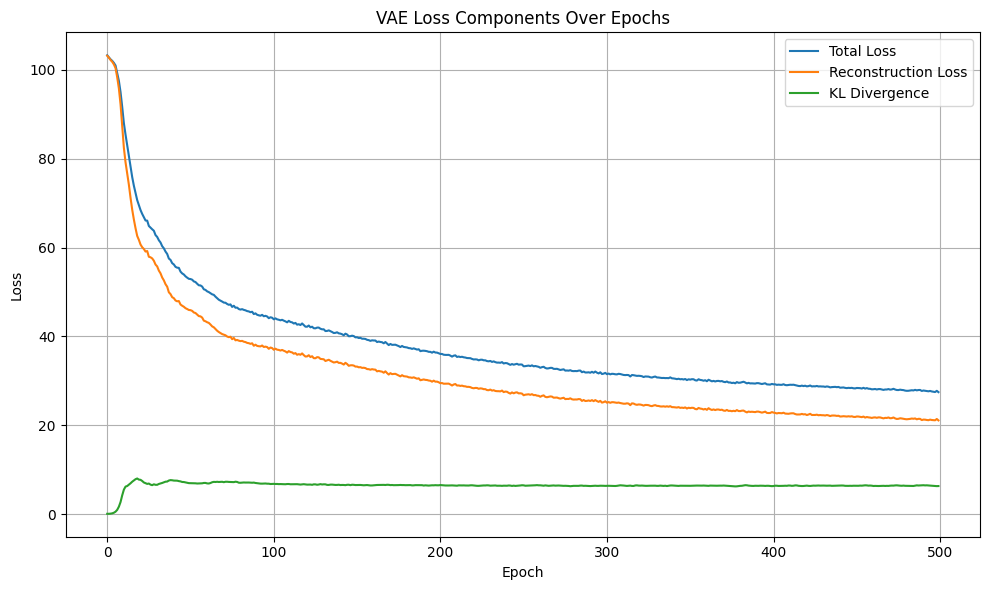

dim of latent mu: (331, 4)


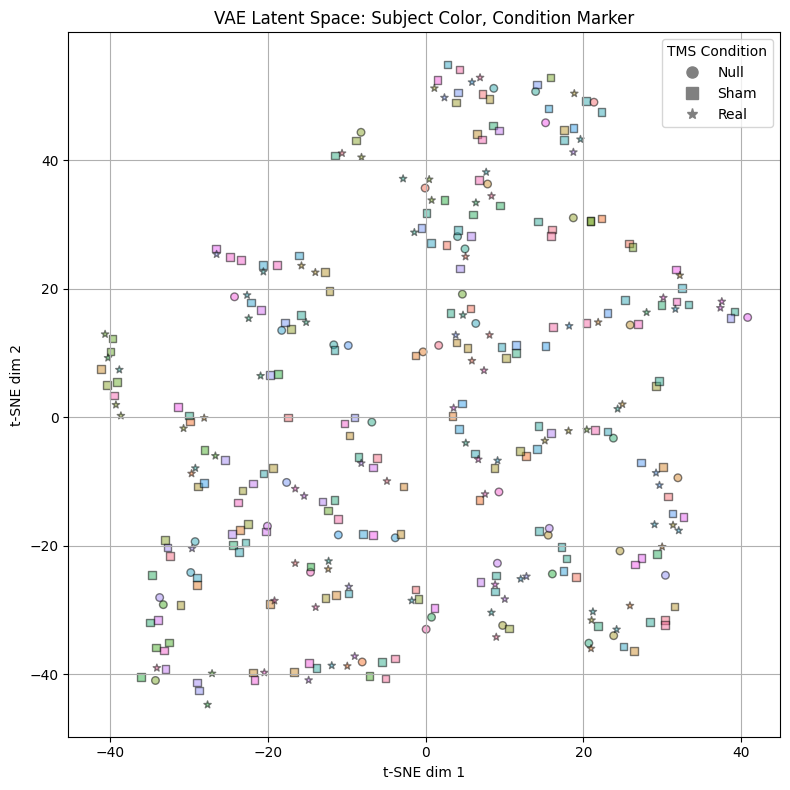

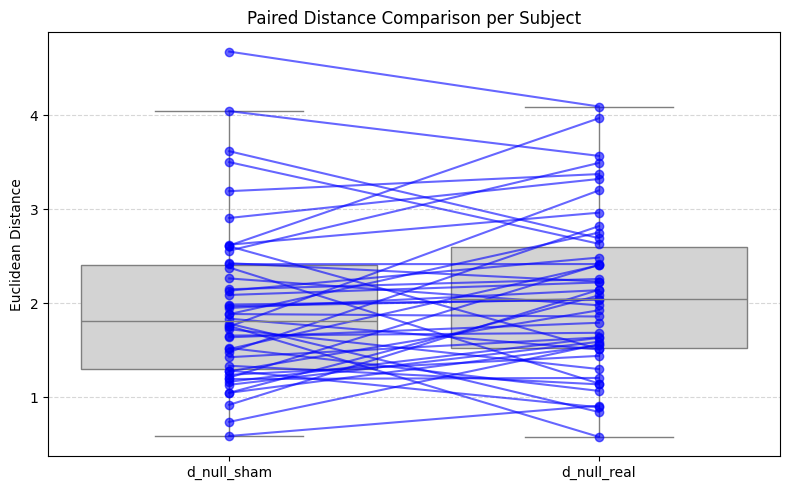

Paired t-test (ld=4): t = -1.350, p = 0.1837

=== latent_dim = 8 ===

===== Epoch 1 =====


Epoch 1/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 909.16it/s]


Epoch 1, Loss: 103.4501, Recon: 103.2316, KL: 0.2185

===== Epoch 2 =====


Epoch 2/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 998.56it/s]


Epoch 2, Loss: 103.0802, Recon: 102.8650, KL: 0.2152

===== Epoch 3 =====


Epoch 3/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1095.53it/s]


Epoch 3, Loss: 102.6349, Recon: 102.3811, KL: 0.2538

===== Epoch 4 =====


Epoch 4/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1107.21it/s]


Epoch 4, Loss: 102.2378, Recon: 101.9262, KL: 0.3116

===== Epoch 5 =====


Epoch 5/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1135.66it/s]


Epoch 5, Loss: 101.6362, Recon: 101.2085, KL: 0.4277

===== Epoch 6 =====


Epoch 6/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1132.76it/s]


Epoch 6, Loss: 101.0035, Recon: 100.3418, KL: 0.6617

===== Epoch 7 =====


Epoch 7/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1035.47it/s]


Epoch 7, Loss: 99.7618, Recon: 98.6813, KL: 1.0804

===== Epoch 8 =====


Epoch 8/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1167.97it/s]


Epoch 8, Loss: 98.6438, Recon: 96.9343, KL: 1.7095

===== Epoch 9 =====


Epoch 9/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1158.76it/s]


Epoch 9, Loss: 96.1155, Recon: 93.3300, KL: 2.7854

===== Epoch 10 =====


Epoch 10/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1058.32it/s]


Epoch 10, Loss: 93.2402, Recon: 89.1036, KL: 4.1366

===== Epoch 11 =====


Epoch 11/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1168.71it/s]


Epoch 11, Loss: 90.2340, Recon: 84.9301, KL: 5.3039

===== Epoch 12 =====


Epoch 12/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1071.29it/s]


Epoch 12, Loss: 87.2034, Recon: 81.2189, KL: 5.9845

===== Epoch 13 =====


Epoch 13/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1177.09it/s]


Epoch 13, Loss: 84.8993, Recon: 78.7251, KL: 6.1742

===== Epoch 14 =====


Epoch 14/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1160.95it/s]


Epoch 14, Loss: 82.9658, Recon: 76.9415, KL: 6.0243

===== Epoch 15 =====


Epoch 15/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1114.48it/s]


Epoch 15, Loss: 81.0338, Recon: 74.8285, KL: 6.2053

===== Epoch 16 =====


Epoch 16/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1094.96it/s]


Epoch 16, Loss: 78.9312, Recon: 72.5000, KL: 6.4312

===== Epoch 17 =====


Epoch 17/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 971.39it/s]


Epoch 17, Loss: 77.8837, Recon: 71.2691, KL: 6.6146

===== Epoch 18 =====


Epoch 18/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1036.47it/s]


Epoch 18, Loss: 75.1534, Recon: 68.0147, KL: 7.1387

===== Epoch 19 =====


Epoch 19/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 895.05it/s]


Epoch 19, Loss: 73.7893, Recon: 66.2063, KL: 7.5830

===== Epoch 20 =====


Epoch 20/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1058.92it/s]


Epoch 20, Loss: 71.8812, Recon: 63.8654, KL: 8.0158

===== Epoch 21 =====


Epoch 21/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 889.03it/s]


Epoch 21, Loss: 70.2324, Recon: 62.3678, KL: 7.8646

===== Epoch 22 =====


Epoch 22/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1045.23it/s]


Epoch 22, Loss: 68.6917, Recon: 60.9985, KL: 7.6932

===== Epoch 23 =====


Epoch 23/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1110.86it/s]


Epoch 23, Loss: 67.8539, Recon: 60.1225, KL: 7.7314

===== Epoch 24 =====


Epoch 24/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1070.45it/s]


Epoch 24, Loss: 66.8821, Recon: 59.1660, KL: 7.7161

===== Epoch 25 =====


Epoch 25/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1132.15it/s]


Epoch 25, Loss: 65.7089, Recon: 57.9505, KL: 7.7584

===== Epoch 26 =====


Epoch 26/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1124.04it/s]


Epoch 26, Loss: 65.1066, Recon: 57.3213, KL: 7.7853

===== Epoch 27 =====


Epoch 27/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1025.55it/s]


Epoch 27, Loss: 64.2111, Recon: 56.3135, KL: 7.8976

===== Epoch 28 =====


Epoch 28/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1132.98it/s]


Epoch 28, Loss: 63.4158, Recon: 55.3867, KL: 8.0291

===== Epoch 29 =====


Epoch 29/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1078.96it/s]


Epoch 29, Loss: 62.5102, Recon: 54.1146, KL: 8.3955

===== Epoch 30 =====


Epoch 30/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1157.54it/s]


Epoch 30, Loss: 61.4707, Recon: 53.2252, KL: 8.2455

===== Epoch 31 =====


Epoch 31/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 996.04it/s]


Epoch 31, Loss: 60.5826, Recon: 52.2963, KL: 8.2863

===== Epoch 32 =====


Epoch 32/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1135.07it/s]


Epoch 32, Loss: 60.0818, Recon: 51.4595, KL: 8.6223

===== Epoch 33 =====


Epoch 33/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1029.28it/s]


Epoch 33, Loss: 59.0254, Recon: 50.3314, KL: 8.6939

===== Epoch 34 =====


Epoch 34/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1134.24it/s]


Epoch 34, Loss: 58.3995, Recon: 49.7154, KL: 8.6841

===== Epoch 35 =====


Epoch 35/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1132.15it/s]


Epoch 35, Loss: 57.7590, Recon: 49.0778, KL: 8.6813

===== Epoch 36 =====


Epoch 36/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1090.54it/s]


Epoch 36, Loss: 56.9172, Recon: 48.2116, KL: 8.7056

===== Epoch 37 =====


Epoch 37/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1116.86it/s]


Epoch 37, Loss: 56.7615, Recon: 48.0836, KL: 8.6780

===== Epoch 38 =====


Epoch 38/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1132.04it/s]


Epoch 38, Loss: 56.0995, Recon: 47.3538, KL: 8.7457

===== Epoch 39 =====


Epoch 39/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1232.63it/s]


Epoch 39, Loss: 55.8726, Recon: 47.2044, KL: 8.6682

===== Epoch 40 =====


Epoch 40/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1187.27it/s]


Epoch 40, Loss: 55.2510, Recon: 46.6525, KL: 8.5984

===== Epoch 41 =====


Epoch 41/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1181.68it/s]


Epoch 41, Loss: 55.0219, Recon: 46.4713, KL: 8.5506

===== Epoch 42 =====


Epoch 42/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1160.95it/s]


Epoch 42, Loss: 54.4043, Recon: 45.8331, KL: 8.5712

===== Epoch 43 =====


Epoch 43/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1151.59it/s]


Epoch 43, Loss: 54.3382, Recon: 45.6278, KL: 8.7104

===== Epoch 44 =====


Epoch 44/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1169.84it/s]


Epoch 44, Loss: 53.6796, Recon: 44.8650, KL: 8.8146

===== Epoch 45 =====


Epoch 45/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1167.47it/s]


Epoch 45, Loss: 54.0180, Recon: 45.2315, KL: 8.7865

===== Epoch 46 =====


Epoch 46/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1105.51it/s]


Epoch 46, Loss: 53.0824, Recon: 44.2513, KL: 8.8311

===== Epoch 47 =====


Epoch 47/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1152.45it/s]


Epoch 47, Loss: 52.4459, Recon: 43.5479, KL: 8.8980

===== Epoch 48 =====


Epoch 48/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1111.13it/s]


Epoch 48, Loss: 52.2545, Recon: 43.3231, KL: 8.9314

===== Epoch 49 =====


Epoch 49/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1116.64it/s]


Epoch 49, Loss: 51.6897, Recon: 42.8741, KL: 8.8157

===== Epoch 50 =====


Epoch 50/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1097.59it/s]


Epoch 50, Loss: 51.4521, Recon: 42.7429, KL: 8.7093

===== Epoch 51 =====


Epoch 51/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1085.35it/s]


Epoch 51, Loss: 51.3118, Recon: 42.4843, KL: 8.8274

===== Epoch 52 =====


Epoch 52/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1129.60it/s]


Epoch 52, Loss: 50.9855, Recon: 42.0569, KL: 8.9285

===== Epoch 53 =====


Epoch 53/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1138.63it/s]


Epoch 53, Loss: 51.0730, Recon: 42.1509, KL: 8.9221

===== Epoch 54 =====


Epoch 54/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1026.03it/s]


Epoch 54, Loss: 50.1224, Recon: 41.2776, KL: 8.8448

===== Epoch 55 =====


Epoch 55/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1133.07it/s]


Epoch 55, Loss: 50.0490, Recon: 41.3840, KL: 8.6650

===== Epoch 56 =====


Epoch 56/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1125.44it/s]


Epoch 56, Loss: 49.7962, Recon: 41.0943, KL: 8.7019

===== Epoch 57 =====


Epoch 57/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1072.74it/s]


Epoch 57, Loss: 50.0977, Recon: 41.2543, KL: 8.8434

===== Epoch 58 =====


Epoch 58/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1128.08it/s]


Epoch 58, Loss: 49.9362, Recon: 41.1525, KL: 8.7837

===== Epoch 59 =====


Epoch 59/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1143.09it/s]


Epoch 59, Loss: 49.8198, Recon: 41.1476, KL: 8.6722

===== Epoch 60 =====


Epoch 60/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1156.90it/s]


Epoch 60, Loss: 49.2468, Recon: 40.5380, KL: 8.7089

===== Epoch 61 =====


Epoch 61/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1124.40it/s]


Epoch 61, Loss: 49.3951, Recon: 40.6110, KL: 8.7841

===== Epoch 62 =====


Epoch 62/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1152.80it/s]


Epoch 62, Loss: 49.1176, Recon: 40.2676, KL: 8.8499

===== Epoch 63 =====


Epoch 63/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1087.81it/s]


Epoch 63, Loss: 48.7853, Recon: 39.9585, KL: 8.8268

===== Epoch 64 =====


Epoch 64/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1156.44it/s]


Epoch 64, Loss: 48.8602, Recon: 40.1496, KL: 8.7106

===== Epoch 65 =====


Epoch 65/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1144.28it/s]


Epoch 65, Loss: 49.1337, Recon: 40.4425, KL: 8.6912

===== Epoch 66 =====


Epoch 66/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1107.71it/s]


Epoch 66, Loss: 48.3812, Recon: 39.5294, KL: 8.8518

===== Epoch 67 =====


Epoch 67/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1168.57it/s]


Epoch 67, Loss: 48.2920, Recon: 39.4592, KL: 8.8328

===== Epoch 68 =====


Epoch 68/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1154.73it/s]


Epoch 68, Loss: 47.9598, Recon: 39.1094, KL: 8.8504

===== Epoch 69 =====


Epoch 69/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1124.51it/s]


Epoch 69, Loss: 47.9832, Recon: 39.1993, KL: 8.7838

===== Epoch 70 =====


Epoch 70/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 985.04it/s]


Epoch 70, Loss: 47.7599, Recon: 38.9812, KL: 8.7787

===== Epoch 71 =====


Epoch 71/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1083.11it/s]


Epoch 71, Loss: 47.4917, Recon: 38.7167, KL: 8.7750

===== Epoch 72 =====


Epoch 72/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1153.55it/s]


Epoch 72, Loss: 47.6846, Recon: 39.0117, KL: 8.6730

===== Epoch 73 =====


Epoch 73/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 843.03it/s]


Epoch 73, Loss: 47.5587, Recon: 38.8402, KL: 8.7186

===== Epoch 74 =====


Epoch 74/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 915.61it/s]


Epoch 74, Loss: 47.2407, Recon: 38.4805, KL: 8.7601

===== Epoch 75 =====


Epoch 75/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1148.32it/s]


Epoch 75, Loss: 47.2625, Recon: 38.5918, KL: 8.6707

===== Epoch 76 =====


Epoch 76/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 837.38it/s]


Epoch 76, Loss: 46.9008, Recon: 38.1039, KL: 8.7969

===== Epoch 77 =====


Epoch 77/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1001.18it/s]


Epoch 77, Loss: 47.3037, Recon: 38.5138, KL: 8.7899

===== Epoch 78 =====


Epoch 78/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1131.70it/s]


Epoch 78, Loss: 46.4957, Recon: 37.5354, KL: 8.9602

===== Epoch 79 =====


Epoch 79/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1130.04it/s]


Epoch 79, Loss: 46.4880, Recon: 37.5623, KL: 8.9257

===== Epoch 80 =====


Epoch 80/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1106.20it/s]


Epoch 80, Loss: 46.1289, Recon: 37.2771, KL: 8.8518

===== Epoch 81 =====


Epoch 81/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1154.36it/s]


Epoch 81, Loss: 45.8889, Recon: 36.9855, KL: 8.9034

===== Epoch 82 =====


Epoch 82/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1208.92it/s]


Epoch 82, Loss: 45.6895, Recon: 36.8366, KL: 8.8529

===== Epoch 83 =====


Epoch 83/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 956.95it/s]


Epoch 83, Loss: 45.7855, Recon: 37.0617, KL: 8.7237

===== Epoch 84 =====


Epoch 84/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1080.85it/s]


Epoch 84, Loss: 46.0501, Recon: 37.2336, KL: 8.8165

===== Epoch 85 =====


Epoch 85/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1177.48it/s]


Epoch 85, Loss: 45.0031, Recon: 36.1002, KL: 8.9029

===== Epoch 86 =====


Epoch 86/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1149.55it/s]


Epoch 86, Loss: 45.3850, Recon: 36.7024, KL: 8.6826

===== Epoch 87 =====


Epoch 87/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1117.07it/s]


Epoch 87, Loss: 45.5640, Recon: 36.7839, KL: 8.7801

===== Epoch 88 =====


Epoch 88/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1122.56it/s]


Epoch 88, Loss: 44.8603, Recon: 35.9239, KL: 8.9364

===== Epoch 89 =====


Epoch 89/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1166.62it/s]


Epoch 89, Loss: 45.1108, Recon: 36.2447, KL: 8.8661

===== Epoch 90 =====


Epoch 90/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1115.05it/s]


Epoch 90, Loss: 45.0975, Recon: 36.2421, KL: 8.8554

===== Epoch 91 =====


Epoch 91/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1152.89it/s]


Epoch 91, Loss: 44.8503, Recon: 35.8957, KL: 8.9546

===== Epoch 92 =====


Epoch 92/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1028.70it/s]


Epoch 92, Loss: 44.8069, Recon: 35.7824, KL: 9.0245

===== Epoch 93 =====


Epoch 93/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1185.96it/s]


Epoch 93, Loss: 44.8407, Recon: 35.7720, KL: 9.0686

===== Epoch 94 =====


Epoch 94/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1178.24it/s]


Epoch 94, Loss: 44.5606, Recon: 35.4521, KL: 9.1085

===== Epoch 95 =====


Epoch 95/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1175.59it/s]


Epoch 95, Loss: 44.5804, Recon: 35.5553, KL: 9.0251

===== Epoch 96 =====


Epoch 96/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1014.01it/s]


Epoch 96, Loss: 44.5571, Recon: 35.5465, KL: 9.0105

===== Epoch 97 =====


Epoch 97/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1169.93it/s]


Epoch 97, Loss: 44.2145, Recon: 35.0832, KL: 9.1313

===== Epoch 98 =====


Epoch 98/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1160.57it/s]


Epoch 98, Loss: 44.2508, Recon: 35.1344, KL: 9.1164

===== Epoch 99 =====


Epoch 99/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1076.09it/s]


Epoch 99, Loss: 44.0983, Recon: 35.1221, KL: 8.9762

===== Epoch 100 =====


Epoch 100/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1134.79it/s]


Epoch 100, Loss: 43.8256, Recon: 34.8733, KL: 8.9523

===== Epoch 101 =====


Epoch 101/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1114.27it/s]


Epoch 101, Loss: 43.7213, Recon: 34.7302, KL: 8.9911

===== Epoch 102 =====


Epoch 102/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 963.06it/s]


Epoch 102, Loss: 43.4786, Recon: 34.5148, KL: 8.9638

===== Epoch 103 =====


Epoch 103/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.52it/s]


Epoch 103, Loss: 43.3764, Recon: 34.5326, KL: 8.8438

===== Epoch 104 =====


Epoch 104/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1203.37it/s]


Epoch 104, Loss: 43.1794, Recon: 34.3676, KL: 8.8118

===== Epoch 105 =====


Epoch 105/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1149.55it/s]


Epoch 105, Loss: 43.5305, Recon: 34.7122, KL: 8.8183

===== Epoch 106 =====


Epoch 106/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1079.69it/s]


Epoch 106, Loss: 43.2588, Recon: 34.4325, KL: 8.8262

===== Epoch 107 =====


Epoch 107/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1113.70it/s]


Epoch 107, Loss: 43.4061, Recon: 34.4616, KL: 8.9445

===== Epoch 108 =====


Epoch 108/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1105.96it/s]


Epoch 108, Loss: 42.7991, Recon: 33.8020, KL: 8.9972

===== Epoch 109 =====


Epoch 109/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1097.25it/s]


Epoch 109, Loss: 43.4948, Recon: 34.5435, KL: 8.9513

===== Epoch 110 =====


Epoch 110/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.36it/s]


Epoch 110, Loss: 43.0595, Recon: 34.1489, KL: 8.9107

===== Epoch 111 =====


Epoch 111/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.35it/s]


Epoch 111, Loss: 42.8546, Recon: 33.9043, KL: 8.9503

===== Epoch 112 =====


Epoch 112/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1038.12it/s]


Epoch 112, Loss: 42.9728, Recon: 34.0387, KL: 8.9341

===== Epoch 113 =====


Epoch 113/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1214.81it/s]


Epoch 113, Loss: 42.8125, Recon: 33.8373, KL: 8.9752

===== Epoch 114 =====


Epoch 114/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1099.27it/s]


Epoch 114, Loss: 42.7853, Recon: 33.8501, KL: 8.9352

===== Epoch 115 =====


Epoch 115/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1102.21it/s]


Epoch 115, Loss: 42.6773, Recon: 33.7139, KL: 8.9634

===== Epoch 116 =====


Epoch 116/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1163.53it/s]


Epoch 116, Loss: 42.4285, Recon: 33.5547, KL: 8.8738

===== Epoch 117 =====


Epoch 117/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1082.88it/s]


Epoch 117, Loss: 42.2984, Recon: 33.3976, KL: 8.9008

===== Epoch 118 =====


Epoch 118/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1204.03it/s]


Epoch 118, Loss: 42.2219, Recon: 33.2648, KL: 8.9571

===== Epoch 119 =====


Epoch 119/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.56it/s]


Epoch 119, Loss: 42.4160, Recon: 33.5539, KL: 8.8621

===== Epoch 120 =====


Epoch 120/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.14it/s]


Epoch 120, Loss: 42.2327, Recon: 33.2143, KL: 9.0184

===== Epoch 121 =====


Epoch 121/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1093.66it/s]


Epoch 121, Loss: 41.8804, Recon: 32.7847, KL: 9.0957

===== Epoch 122 =====


Epoch 122/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1137.42it/s]


Epoch 122, Loss: 42.0219, Recon: 33.1410, KL: 8.8810

===== Epoch 123 =====


Epoch 123/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.41it/s]


Epoch 123, Loss: 42.2772, Recon: 33.3785, KL: 8.8987

===== Epoch 124 =====


Epoch 124/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.35it/s]


Epoch 124, Loss: 41.5372, Recon: 32.5878, KL: 8.9494

===== Epoch 125 =====


Epoch 125/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1128.99it/s]


Epoch 125, Loss: 42.0507, Recon: 33.1242, KL: 8.9265

===== Epoch 126 =====


Epoch 126/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.07it/s]


Epoch 126, Loss: 41.5253, Recon: 32.5012, KL: 9.0241

===== Epoch 127 =====


Epoch 127/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.38it/s]


Epoch 127, Loss: 41.3366, Recon: 32.4138, KL: 8.9228

===== Epoch 128 =====


Epoch 128/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.61it/s]


Epoch 128, Loss: 41.4735, Recon: 32.6044, KL: 8.8691

===== Epoch 129 =====


Epoch 129/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1127.64it/s]


Epoch 129, Loss: 41.1687, Recon: 32.3682, KL: 8.8005

===== Epoch 130 =====


Epoch 130/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1117.42it/s]


Epoch 130, Loss: 41.2154, Recon: 32.4413, KL: 8.7741

===== Epoch 131 =====


Epoch 131/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1052.62it/s]


Epoch 131, Loss: 41.2298, Recon: 32.3964, KL: 8.8334

===== Epoch 132 =====


Epoch 132/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1079.49it/s]


Epoch 132, Loss: 41.1190, Recon: 32.2799, KL: 8.8391

===== Epoch 133 =====


Epoch 133/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1104.77it/s]


Epoch 133, Loss: 41.2422, Recon: 32.3227, KL: 8.9194

===== Epoch 134 =====


Epoch 134/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1114.59it/s]


Epoch 134, Loss: 40.8983, Recon: 31.9058, KL: 8.9925

===== Epoch 135 =====


Epoch 135/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1140.83it/s]


Epoch 135, Loss: 41.0752, Recon: 32.0193, KL: 9.0559

===== Epoch 136 =====


Epoch 136/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1112.92it/s]


Epoch 136, Loss: 40.7091, Recon: 31.7448, KL: 8.9643

===== Epoch 137 =====


Epoch 137/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.42it/s]


Epoch 137, Loss: 40.3307, Recon: 31.4374, KL: 8.8932

===== Epoch 138 =====


Epoch 138/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.02it/s]


Epoch 138, Loss: 40.5628, Recon: 31.6897, KL: 8.8731

===== Epoch 139 =====


Epoch 139/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.57it/s]


Epoch 139, Loss: 40.4658, Recon: 31.6269, KL: 8.8389

===== Epoch 140 =====


Epoch 140/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.03it/s]


Epoch 140, Loss: 40.5388, Recon: 31.6485, KL: 8.8903

===== Epoch 141 =====


Epoch 141/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1120.52it/s]


Epoch 141, Loss: 40.1692, Recon: 31.1748, KL: 8.9944

===== Epoch 142 =====


Epoch 142/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1084.26it/s]


Epoch 142, Loss: 40.4860, Recon: 31.4685, KL: 9.0175

===== Epoch 143 =====


Epoch 143/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1132.12it/s]


Epoch 143, Loss: 40.3329, Recon: 31.3574, KL: 8.9755

===== Epoch 144 =====


Epoch 144/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1108.96it/s]


Epoch 144, Loss: 40.3703, Recon: 31.3722, KL: 8.9981

===== Epoch 145 =====


Epoch 145/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1080.45it/s]


Epoch 145, Loss: 39.8321, Recon: 30.6809, KL: 9.1512

===== Epoch 146 =====


Epoch 146/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1178.24it/s]


Epoch 146, Loss: 39.8690, Recon: 30.7776, KL: 9.0914

===== Epoch 147 =====


Epoch 147/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1084.90it/s]


Epoch 147, Loss: 39.8846, Recon: 30.8870, KL: 8.9976

===== Epoch 148 =====


Epoch 148/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1111.66it/s]


Epoch 148, Loss: 39.6861, Recon: 30.6050, KL: 9.0811

===== Epoch 149 =====


Epoch 149/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 423.56it/s]


Epoch 149, Loss: 39.5555, Recon: 30.5421, KL: 9.0134

===== Epoch 150 =====


Epoch 150/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 879.38it/s]


Epoch 150, Loss: 39.5171, Recon: 30.5114, KL: 9.0056

===== Epoch 151 =====


Epoch 151/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1129.35it/s]


Epoch 151, Loss: 39.5874, Recon: 30.4986, KL: 9.0888

===== Epoch 152 =====


Epoch 152/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1111.66it/s]


Epoch 152, Loss: 39.3358, Recon: 30.2681, KL: 9.0677

===== Epoch 153 =====


Epoch 153/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1103.74it/s]


Epoch 153, Loss: 39.2793, Recon: 30.2293, KL: 9.0500

===== Epoch 154 =====


Epoch 154/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1071.29it/s]


Epoch 154, Loss: 39.0854, Recon: 30.0227, KL: 9.0627

===== Epoch 155 =====


Epoch 155/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1068.69it/s]


Epoch 155, Loss: 38.8792, Recon: 29.8614, KL: 9.0178

===== Epoch 156 =====


Epoch 156/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1109.34it/s]


Epoch 156, Loss: 38.5850, Recon: 29.6067, KL: 8.9783

===== Epoch 157 =====


Epoch 157/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.64it/s]


Epoch 157, Loss: 39.2271, Recon: 30.3415, KL: 8.8856

===== Epoch 158 =====


Epoch 158/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1111.64it/s]


Epoch 158, Loss: 39.0540, Recon: 30.0096, KL: 9.0444

===== Epoch 159 =====


Epoch 159/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.02it/s]


Epoch 159, Loss: 38.9738, Recon: 29.8013, KL: 9.1725

===== Epoch 160 =====


Epoch 160/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1162.18it/s]


Epoch 160, Loss: 39.0021, Recon: 29.8977, KL: 9.1043

===== Epoch 161 =====


Epoch 161/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1164.41it/s]


Epoch 161, Loss: 38.6350, Recon: 29.4773, KL: 9.1576

===== Epoch 162 =====


Epoch 162/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.35it/s]


Epoch 162, Loss: 38.2741, Recon: 28.9861, KL: 9.2880

===== Epoch 163 =====


Epoch 163/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1053.65it/s]


Epoch 163, Loss: 38.1906, Recon: 28.9826, KL: 9.2080

===== Epoch 164 =====


Epoch 164/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1132.04it/s]


Epoch 164, Loss: 38.5104, Recon: 29.3364, KL: 9.1740

===== Epoch 165 =====


Epoch 165/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.47it/s]


Epoch 165, Loss: 38.2651, Recon: 29.0635, KL: 9.2017

===== Epoch 166 =====


Epoch 166/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1064.74it/s]


Epoch 166, Loss: 38.0626, Recon: 28.9013, KL: 9.1613

===== Epoch 167 =====


Epoch 167/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1244.20it/s]


Epoch 167, Loss: 38.1629, Recon: 29.0321, KL: 9.1308

===== Epoch 168 =====


Epoch 168/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1149.04it/s]


Epoch 168, Loss: 37.7451, Recon: 28.5895, KL: 9.1556

===== Epoch 169 =====


Epoch 169/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1182.68it/s]


Epoch 169, Loss: 37.7954, Recon: 28.6592, KL: 9.1362

===== Epoch 170 =====


Epoch 170/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1109.31it/s]


Epoch 170, Loss: 38.0244, Recon: 28.9381, KL: 9.0863

===== Epoch 171 =====


Epoch 171/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1032.09it/s]


Epoch 171, Loss: 37.9956, Recon: 28.8440, KL: 9.1515

===== Epoch 172 =====


Epoch 172/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1146.55it/s]


Epoch 172, Loss: 37.7095, Recon: 28.4560, KL: 9.2535

===== Epoch 173 =====


Epoch 173/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1120.06it/s]


Epoch 173, Loss: 37.5751, Recon: 28.3638, KL: 9.2113

===== Epoch 174 =====


Epoch 174/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1085.23it/s]


Epoch 174, Loss: 37.5244, Recon: 28.3225, KL: 9.2019

===== Epoch 175 =====


Epoch 175/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1032.64it/s]


Epoch 175, Loss: 37.2478, Recon: 28.0458, KL: 9.2020

===== Epoch 176 =====


Epoch 176/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1027.83it/s]


Epoch 176, Loss: 37.7663, Recon: 28.5520, KL: 9.2143

===== Epoch 177 =====


Epoch 177/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 813.12it/s]


Epoch 177, Loss: 37.4233, Recon: 28.1388, KL: 9.2845

===== Epoch 178 =====


Epoch 178/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1014.79it/s]


Epoch 178, Loss: 37.1800, Recon: 27.8006, KL: 9.3794

===== Epoch 179 =====


Epoch 179/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.73it/s]


Epoch 179, Loss: 37.1824, Recon: 27.8595, KL: 9.3229

===== Epoch 180 =====


Epoch 180/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.49it/s]


Epoch 180, Loss: 37.3085, Recon: 28.0599, KL: 9.2486

===== Epoch 181 =====


Epoch 181/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1160.48it/s]


Epoch 181, Loss: 36.7704, Recon: 27.5325, KL: 9.2378

===== Epoch 182 =====


Epoch 182/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1100.87it/s]


Epoch 182, Loss: 37.0626, Recon: 27.8602, KL: 9.2024

===== Epoch 183 =====


Epoch 183/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1156.06it/s]


Epoch 183, Loss: 37.1300, Recon: 27.8785, KL: 9.2515

===== Epoch 184 =====


Epoch 184/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1084.82it/s]


Epoch 184, Loss: 36.5329, Recon: 27.2294, KL: 9.3036

===== Epoch 185 =====


Epoch 185/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1180.10it/s]


Epoch 185, Loss: 36.8567, Recon: 27.5416, KL: 9.3151

===== Epoch 186 =====


Epoch 186/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.43it/s]


Epoch 186, Loss: 36.9672, Recon: 27.7356, KL: 9.2316

===== Epoch 187 =====


Epoch 187/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1134.49it/s]


Epoch 187, Loss: 36.5560, Recon: 27.3647, KL: 9.1913

===== Epoch 188 =====


Epoch 188/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.05it/s]


Epoch 188, Loss: 36.5223, Recon: 27.3141, KL: 9.2081

===== Epoch 189 =====


Epoch 189/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1178.60it/s]


Epoch 189, Loss: 36.5983, Recon: 27.3933, KL: 9.2050

===== Epoch 190 =====


Epoch 190/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1208.64it/s]


Epoch 190, Loss: 36.2222, Recon: 26.9429, KL: 9.2792

===== Epoch 191 =====


Epoch 191/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1141.42it/s]


Epoch 191, Loss: 36.3249, Recon: 27.0440, KL: 9.2809

===== Epoch 192 =====


Epoch 192/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.99it/s]


Epoch 192, Loss: 36.5123, Recon: 27.2615, KL: 9.2508

===== Epoch 193 =====


Epoch 193/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 567.92it/s]


Epoch 193, Loss: 36.3411, Recon: 27.0201, KL: 9.3210

===== Epoch 194 =====


Epoch 194/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1202.34it/s]


Epoch 194, Loss: 36.4291, Recon: 27.1121, KL: 9.3169

===== Epoch 195 =====


Epoch 195/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.88it/s]


Epoch 195, Loss: 36.0462, Recon: 26.7132, KL: 9.3330

===== Epoch 196 =====


Epoch 196/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1163.00it/s]


Epoch 196, Loss: 36.1625, Recon: 26.8637, KL: 9.2988

===== Epoch 197 =====


Epoch 197/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.85it/s]


Epoch 197, Loss: 35.7458, Recon: 26.5419, KL: 9.2040

===== Epoch 198 =====


Epoch 198/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1111.80it/s]


Epoch 198, Loss: 36.0990, Recon: 26.9497, KL: 9.1492

===== Epoch 199 =====


Epoch 199/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.24it/s]


Epoch 199, Loss: 35.7820, Recon: 26.4835, KL: 9.2986

===== Epoch 200 =====


Epoch 200/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.25it/s]


Epoch 200, Loss: 36.0503, Recon: 26.7547, KL: 9.2956

===== Epoch 201 =====


Epoch 201/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.72it/s]


Epoch 201, Loss: 35.8656, Recon: 26.5791, KL: 9.2865

===== Epoch 202 =====


Epoch 202/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1102.87it/s]


Epoch 202, Loss: 35.7877, Recon: 26.5237, KL: 9.2640

===== Epoch 203 =====


Epoch 203/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1050.61it/s]


Epoch 203, Loss: 35.4781, Recon: 26.2443, KL: 9.2338

===== Epoch 204 =====


Epoch 204/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.40it/s]


Epoch 204, Loss: 35.6407, Recon: 26.4853, KL: 9.1553

===== Epoch 205 =====


Epoch 205/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1172.70it/s]


Epoch 205, Loss: 35.5814, Recon: 26.3926, KL: 9.1888

===== Epoch 206 =====


Epoch 206/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1146.41it/s]


Epoch 206, Loss: 35.4151, Recon: 26.2526, KL: 9.1624

===== Epoch 207 =====


Epoch 207/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.95it/s]


Epoch 207, Loss: 35.5270, Recon: 26.3555, KL: 9.1715

===== Epoch 208 =====


Epoch 208/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1100.66it/s]


Epoch 208, Loss: 35.3576, Recon: 26.1790, KL: 9.1787

===== Epoch 209 =====


Epoch 209/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1169.57it/s]


Epoch 209, Loss: 35.2666, Recon: 26.0837, KL: 9.1830

===== Epoch 210 =====


Epoch 210/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1128.08it/s]


Epoch 210, Loss: 35.3439, Recon: 26.1721, KL: 9.1718

===== Epoch 211 =====


Epoch 211/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.86it/s]


Epoch 211, Loss: 35.3405, Recon: 26.1321, KL: 9.2084

===== Epoch 212 =====


Epoch 212/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.24it/s]


Epoch 212, Loss: 35.8588, Recon: 26.5257, KL: 9.3331

===== Epoch 213 =====


Epoch 213/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1130.43it/s]


Epoch 213, Loss: 35.3945, Recon: 25.9030, KL: 9.4916

===== Epoch 214 =====


Epoch 214/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1083.21it/s]


Epoch 214, Loss: 35.2624, Recon: 25.8803, KL: 9.3820

===== Epoch 215 =====


Epoch 215/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1128.44it/s]


Epoch 215, Loss: 35.0784, Recon: 25.6876, KL: 9.3908

===== Epoch 216 =====


Epoch 216/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1094.11it/s]


Epoch 216, Loss: 34.9677, Recon: 25.5820, KL: 9.3857

===== Epoch 217 =====


Epoch 217/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.68it/s]


Epoch 217, Loss: 34.8558, Recon: 25.5767, KL: 9.2792

===== Epoch 218 =====


Epoch 218/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1064.74it/s]


Epoch 218, Loss: 34.8697, Recon: 25.6013, KL: 9.2684

===== Epoch 219 =====


Epoch 219/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1129.38it/s]


Epoch 219, Loss: 34.9426, Recon: 25.7045, KL: 9.2381

===== Epoch 220 =====


Epoch 220/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1169.87it/s]


Epoch 220, Loss: 34.8870, Recon: 25.6373, KL: 9.2497

===== Epoch 221 =====


Epoch 221/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1083.42it/s]


Epoch 221, Loss: 34.5501, Recon: 25.2681, KL: 9.2820

===== Epoch 222 =====


Epoch 222/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.35it/s]


Epoch 222, Loss: 34.7667, Recon: 25.5822, KL: 9.1845

===== Epoch 223 =====


Epoch 223/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1132.98it/s]


Epoch 223, Loss: 34.8587, Recon: 25.6501, KL: 9.2086

===== Epoch 224 =====


Epoch 224/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.81it/s]


Epoch 224, Loss: 34.7586, Recon: 25.4717, KL: 9.2869

===== Epoch 225 =====


Epoch 225/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.15it/s]


Epoch 225, Loss: 34.5451, Recon: 25.2694, KL: 9.2757

===== Epoch 226 =====


Epoch 226/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1177.33it/s]


Epoch 226, Loss: 34.4248, Recon: 25.1189, KL: 9.3059

===== Epoch 227 =====


Epoch 227/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1100.24it/s]


Epoch 227, Loss: 34.4348, Recon: 25.1921, KL: 9.2427

===== Epoch 228 =====


Epoch 228/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.85it/s]


Epoch 228, Loss: 34.7055, Recon: 25.4362, KL: 9.2693

===== Epoch 229 =====


Epoch 229/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1120.30it/s]


Epoch 229, Loss: 34.7250, Recon: 25.4718, KL: 9.2531

===== Epoch 230 =====


Epoch 230/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.53it/s]


Epoch 230, Loss: 34.6673, Recon: 25.4284, KL: 9.2389

===== Epoch 231 =====


Epoch 231/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1149.21it/s]


Epoch 231, Loss: 34.2645, Recon: 24.9780, KL: 9.2865

===== Epoch 232 =====


Epoch 232/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.90it/s]


Epoch 232, Loss: 34.4614, Recon: 25.1277, KL: 9.3336

===== Epoch 233 =====


Epoch 233/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1065.06it/s]


Epoch 233, Loss: 34.3343, Recon: 24.9786, KL: 9.3557

===== Epoch 234 =====


Epoch 234/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1097.83it/s]


Epoch 234, Loss: 34.3397, Recon: 24.9739, KL: 9.3657

===== Epoch 235 =====


Epoch 235/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1001.03it/s]


Epoch 235, Loss: 34.1874, Recon: 24.8951, KL: 9.2923

===== Epoch 236 =====


Epoch 236/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1170.97it/s]


Epoch 236, Loss: 33.9151, Recon: 24.6710, KL: 9.2440

===== Epoch 237 =====


Epoch 237/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.37it/s]


Epoch 237, Loss: 34.1281, Recon: 24.9405, KL: 9.1876

===== Epoch 238 =====


Epoch 238/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1193.60it/s]


Epoch 238, Loss: 34.3007, Recon: 25.0782, KL: 9.2226

===== Epoch 239 =====


Epoch 239/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.54it/s]


Epoch 239, Loss: 34.1706, Recon: 24.9019, KL: 9.2687

===== Epoch 240 =====


Epoch 240/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1176.85it/s]


Epoch 240, Loss: 34.0483, Recon: 24.7333, KL: 9.3150

===== Epoch 241 =====


Epoch 241/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1082.86it/s]


Epoch 241, Loss: 34.0998, Recon: 24.7551, KL: 9.3447

===== Epoch 242 =====


Epoch 242/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1109.55it/s]


Epoch 242, Loss: 34.1316, Recon: 24.7944, KL: 9.3372

===== Epoch 243 =====


Epoch 243/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.89it/s]


Epoch 243, Loss: 33.7883, Recon: 24.3834, KL: 9.4049

===== Epoch 244 =====


Epoch 244/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.35it/s]


Epoch 244, Loss: 33.8887, Recon: 24.5510, KL: 9.3377

===== Epoch 245 =====


Epoch 245/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.28it/s]


Epoch 245, Loss: 33.6683, Recon: 24.3636, KL: 9.3047

===== Epoch 246 =====


Epoch 246/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.19it/s]


Epoch 246, Loss: 33.4590, Recon: 24.2699, KL: 9.1892

===== Epoch 247 =====


Epoch 247/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1149.30it/s]


Epoch 247, Loss: 33.6415, Recon: 24.5279, KL: 9.1135

===== Epoch 248 =====


Epoch 248/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1115.51it/s]


Epoch 248, Loss: 33.5599, Recon: 24.4248, KL: 9.1351

===== Epoch 249 =====


Epoch 249/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1188.16it/s]


Epoch 249, Loss: 33.8076, Recon: 24.6232, KL: 9.1844

===== Epoch 250 =====


Epoch 250/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1105.43it/s]


Epoch 250, Loss: 33.3895, Recon: 24.1815, KL: 9.2079

===== Epoch 251 =====


Epoch 251/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 934.58it/s]


Epoch 251, Loss: 33.4890, Recon: 24.3930, KL: 9.0960

===== Epoch 252 =====


Epoch 252/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1061.48it/s]


Epoch 252, Loss: 33.9207, Recon: 24.7947, KL: 9.1259

===== Epoch 253 =====


Epoch 253/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1150.16it/s]


Epoch 253, Loss: 33.2941, Recon: 24.0026, KL: 9.2915

===== Epoch 254 =====


Epoch 254/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.71it/s]


Epoch 254, Loss: 33.4522, Recon: 24.1933, KL: 9.2590

===== Epoch 255 =====


Epoch 255/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 412.48it/s]


Epoch 255, Loss: 33.4585, Recon: 24.2913, KL: 9.1672

===== Epoch 256 =====


Epoch 256/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1080.68it/s]


Epoch 256, Loss: 33.3006, Recon: 24.0595, KL: 9.2411

===== Epoch 257 =====


Epoch 257/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1129.16it/s]


Epoch 257, Loss: 33.4012, Recon: 24.1422, KL: 9.2591

===== Epoch 258 =====


Epoch 258/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.08it/s]


Epoch 258, Loss: 33.2932, Recon: 24.0778, KL: 9.2154

===== Epoch 259 =====


Epoch 259/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1102.42it/s]


Epoch 259, Loss: 33.3475, Recon: 24.1271, KL: 9.2204

===== Epoch 260 =====


Epoch 260/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1161.33it/s]


Epoch 260, Loss: 33.1088, Recon: 23.8592, KL: 9.2496

===== Epoch 261 =====


Epoch 261/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1117.42it/s]


Epoch 261, Loss: 33.0759, Recon: 23.8463, KL: 9.2296

===== Epoch 262 =====


Epoch 262/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 994.85it/s]


Epoch 262, Loss: 33.0222, Recon: 23.8523, KL: 9.1699

===== Epoch 263 =====


Epoch 263/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.95it/s]


Epoch 263, Loss: 33.4350, Recon: 24.2578, KL: 9.1772

===== Epoch 264 =====


Epoch 264/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1202.81it/s]


Epoch 264, Loss: 33.1659, Recon: 23.8838, KL: 9.2821

===== Epoch 265 =====


Epoch 265/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1143.09it/s]


Epoch 265, Loss: 33.0677, Recon: 23.7420, KL: 9.3258

===== Epoch 266 =====


Epoch 266/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1173.59it/s]


Epoch 266, Loss: 33.1946, Recon: 23.9233, KL: 9.2714

===== Epoch 267 =====


Epoch 267/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1174.58it/s]


Epoch 267, Loss: 32.7999, Recon: 23.5864, KL: 9.2136

===== Epoch 268 =====


Epoch 268/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1162.91it/s]


Epoch 268, Loss: 33.1339, Recon: 23.8790, KL: 9.2549

===== Epoch 269 =====


Epoch 269/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.92it/s]


Epoch 269, Loss: 32.9906, Recon: 23.6510, KL: 9.3396

===== Epoch 270 =====


Epoch 270/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1143.09it/s]


Epoch 270, Loss: 32.6571, Recon: 23.3823, KL: 9.2748

===== Epoch 271 =====


Epoch 271/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1132.73it/s]


Epoch 271, Loss: 32.7449, Recon: 23.5900, KL: 9.1549

===== Epoch 272 =====


Epoch 272/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1181.28it/s]


Epoch 272, Loss: 32.7391, Recon: 23.5694, KL: 9.1697

===== Epoch 273 =====


Epoch 273/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1192.52it/s]


Epoch 273, Loss: 32.7794, Recon: 23.5551, KL: 9.2243

===== Epoch 274 =====


Epoch 274/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1106.09it/s]


Epoch 274, Loss: 32.8243, Recon: 23.6205, KL: 9.2038

===== Epoch 275 =====


Epoch 275/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1151.96it/s]


Epoch 275, Loss: 32.5768, Recon: 23.4440, KL: 9.1328

===== Epoch 276 =====


Epoch 276/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.01it/s]


Epoch 276, Loss: 32.6959, Recon: 23.4718, KL: 9.2241

===== Epoch 277 =====


Epoch 277/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.80it/s]


Epoch 277, Loss: 32.7800, Recon: 23.4944, KL: 9.2856

===== Epoch 278 =====


Epoch 278/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1132.12it/s]


Epoch 278, Loss: 32.6088, Recon: 23.3523, KL: 9.2566

===== Epoch 279 =====


Epoch 279/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.58it/s]


Epoch 279, Loss: 32.6837, Recon: 23.3806, KL: 9.3031

===== Epoch 280 =====


Epoch 280/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1112.12it/s]


Epoch 280, Loss: 32.2429, Recon: 22.9387, KL: 9.3042

===== Epoch 281 =====


Epoch 281/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1164.64it/s]


Epoch 281, Loss: 32.6538, Recon: 23.4570, KL: 9.1969

===== Epoch 282 =====


Epoch 282/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1172.49it/s]


Epoch 282, Loss: 32.3772, Recon: 23.2018, KL: 9.1754

===== Epoch 283 =====


Epoch 283/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1113.92it/s]


Epoch 283, Loss: 32.3287, Recon: 23.0978, KL: 9.2309

===== Epoch 284 =====


Epoch 284/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1132.54it/s]


Epoch 284, Loss: 32.2950, Recon: 23.1178, KL: 9.1772

===== Epoch 285 =====


Epoch 285/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.69it/s]


Epoch 285, Loss: 32.4219, Recon: 23.3177, KL: 9.1042

===== Epoch 286 =====


Epoch 286/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1103.76it/s]


Epoch 286, Loss: 32.4304, Recon: 23.2492, KL: 9.1813

===== Epoch 287 =====


Epoch 287/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1079.82it/s]


Epoch 287, Loss: 32.2205, Recon: 23.0025, KL: 9.2179

===== Epoch 288 =====


Epoch 288/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1064.57it/s]


Epoch 288, Loss: 32.1389, Recon: 22.9409, KL: 9.1980

===== Epoch 289 =====


Epoch 289/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.56it/s]


Epoch 289, Loss: 32.3736, Recon: 23.1969, KL: 9.1767

===== Epoch 290 =====


Epoch 290/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1118.02it/s]


Epoch 290, Loss: 32.0499, Recon: 22.8470, KL: 9.2029

===== Epoch 291 =====


Epoch 291/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 926.16it/s]


Epoch 291, Loss: 31.9844, Recon: 22.8085, KL: 9.1759

===== Epoch 292 =====


Epoch 292/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 969.76it/s]


Epoch 292, Loss: 31.9531, Recon: 22.8683, KL: 9.0849

===== Epoch 293 =====


Epoch 293/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 978.02it/s]


Epoch 293, Loss: 32.1016, Recon: 23.0436, KL: 9.0580

===== Epoch 294 =====


Epoch 294/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 921.75it/s]


Epoch 294, Loss: 32.0415, Recon: 22.9881, KL: 9.0533

===== Epoch 295 =====


Epoch 295/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 962.32it/s]


Epoch 295, Loss: 32.0659, Recon: 22.9733, KL: 9.0926

===== Epoch 296 =====


Epoch 296/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 933.39it/s]


Epoch 296, Loss: 31.9674, Recon: 22.7826, KL: 9.1848

===== Epoch 297 =====


Epoch 297/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 879.51it/s]


Epoch 297, Loss: 32.0705, Recon: 22.8540, KL: 9.2164

===== Epoch 298 =====


Epoch 298/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 942.02it/s]


Epoch 298, Loss: 31.8224, Recon: 22.6343, KL: 9.1881

===== Epoch 299 =====


Epoch 299/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 871.03it/s]


Epoch 299, Loss: 31.6766, Recon: 22.5749, KL: 9.1016

===== Epoch 300 =====


Epoch 300/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 904.37it/s]


Epoch 300, Loss: 31.8872, Recon: 22.8501, KL: 9.0371

===== Epoch 301 =====


Epoch 301/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 917.26it/s]


Epoch 301, Loss: 32.0111, Recon: 22.9036, KL: 9.1075

===== Epoch 302 =====


Epoch 302/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 979.17it/s]


Epoch 302, Loss: 31.6083, Recon: 22.4794, KL: 9.1289

===== Epoch 303 =====


Epoch 303/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 918.14it/s]


Epoch 303, Loss: 31.7937, Recon: 22.6848, KL: 9.1089

===== Epoch 304 =====


Epoch 304/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 957.27it/s]


Epoch 304, Loss: 31.6235, Recon: 22.5296, KL: 9.0940

===== Epoch 305 =====


Epoch 305/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 913.39it/s]


Epoch 305, Loss: 31.7643, Recon: 22.6824, KL: 9.0819

===== Epoch 306 =====


Epoch 306/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1008.60it/s]


Epoch 306, Loss: 31.5979, Recon: 22.4764, KL: 9.1215

===== Epoch 307 =====


Epoch 307/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 965.86it/s]


Epoch 307, Loss: 31.6149, Recon: 22.4685, KL: 9.1464

===== Epoch 308 =====


Epoch 308/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 881.90it/s]


Epoch 308, Loss: 31.6869, Recon: 22.5125, KL: 9.1744

===== Epoch 309 =====


Epoch 309/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 904.97it/s]


Epoch 309, Loss: 31.6493, Recon: 22.5899, KL: 9.0594

===== Epoch 310 =====


Epoch 310/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 902.97it/s]


Epoch 310, Loss: 31.5711, Recon: 22.4839, KL: 9.0872

===== Epoch 311 =====


Epoch 311/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 971.29it/s]


Epoch 311, Loss: 31.3798, Recon: 22.2715, KL: 9.1083

===== Epoch 312 =====


Epoch 312/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 498.12it/s]


Epoch 312, Loss: 31.6576, Recon: 22.5527, KL: 9.1050

===== Epoch 313 =====


Epoch 313/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 534.14it/s]


Epoch 313, Loss: 31.4007, Recon: 22.2830, KL: 9.1177

===== Epoch 314 =====


Epoch 314/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 869.20it/s]


Epoch 314, Loss: 31.4678, Recon: 22.3619, KL: 9.1059

===== Epoch 315 =====


Epoch 315/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 920.96it/s]


Epoch 315, Loss: 31.4523, Recon: 22.3075, KL: 9.1448

===== Epoch 316 =====


Epoch 316/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 916.59it/s]


Epoch 316, Loss: 31.3236, Recon: 22.1349, KL: 9.1887

===== Epoch 317 =====


Epoch 317/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 861.06it/s]


Epoch 317, Loss: 31.3767, Recon: 22.2365, KL: 9.1402

===== Epoch 318 =====


Epoch 318/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 925.00it/s]


Epoch 318, Loss: 31.5175, Recon: 22.3858, KL: 9.1317

===== Epoch 319 =====


Epoch 319/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 890.39it/s]


Epoch 319, Loss: 31.5471, Recon: 22.4165, KL: 9.1307

===== Epoch 320 =====


Epoch 320/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 875.94it/s]


Epoch 320, Loss: 31.1697, Recon: 22.0095, KL: 9.1602

===== Epoch 321 =====


Epoch 321/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 934.24it/s]


Epoch 321, Loss: 31.1294, Recon: 21.9875, KL: 9.1419

===== Epoch 322 =====


Epoch 322/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 957.50it/s]


Epoch 322, Loss: 31.1867, Recon: 22.1056, KL: 9.0811

===== Epoch 323 =====


Epoch 323/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1030.82it/s]


Epoch 323, Loss: 31.1289, Recon: 22.0145, KL: 9.1144

===== Epoch 324 =====


Epoch 324/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 904.30it/s]


Epoch 324, Loss: 31.2983, Recon: 22.2169, KL: 9.0814

===== Epoch 325 =====


Epoch 325/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 922.51it/s]


Epoch 325, Loss: 31.0855, Recon: 22.0180, KL: 9.0675

===== Epoch 326 =====


Epoch 326/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 947.22it/s]


Epoch 326, Loss: 31.2472, Recon: 22.1440, KL: 9.1032

===== Epoch 327 =====


Epoch 327/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 960.69it/s]


Epoch 327, Loss: 31.1084, Recon: 21.9521, KL: 9.1564

===== Epoch 328 =====


Epoch 328/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 941.14it/s]


Epoch 328, Loss: 31.1158, Recon: 21.9712, KL: 9.1446

===== Epoch 329 =====


Epoch 329/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 928.11it/s]


Epoch 329, Loss: 30.9735, Recon: 21.8663, KL: 9.1073

===== Epoch 330 =====


Epoch 330/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 920.57it/s]


Epoch 330, Loss: 30.9392, Recon: 21.8274, KL: 9.1118

===== Epoch 331 =====


Epoch 331/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 911.35it/s]


Epoch 331, Loss: 31.1161, Recon: 21.9761, KL: 9.1400

===== Epoch 332 =====


Epoch 332/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 909.07it/s]


Epoch 332, Loss: 31.1445, Recon: 21.9519, KL: 9.1926

===== Epoch 333 =====


Epoch 333/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 924.06it/s]


Epoch 333, Loss: 30.9225, Recon: 21.7885, KL: 9.1340

===== Epoch 334 =====


Epoch 334/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1003.18it/s]


Epoch 334, Loss: 30.7014, Recon: 21.6418, KL: 9.0596

===== Epoch 335 =====


Epoch 335/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 917.06it/s]


Epoch 335, Loss: 30.8116, Recon: 21.7769, KL: 9.0347

===== Epoch 336 =====


Epoch 336/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 945.83it/s]


Epoch 336, Loss: 30.7855, Recon: 21.7452, KL: 9.0404

===== Epoch 337 =====


Epoch 337/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 882.89it/s]


Epoch 337, Loss: 30.8303, Recon: 21.8593, KL: 8.9710

===== Epoch 338 =====


Epoch 338/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 887.51it/s]


Epoch 338, Loss: 30.7020, Recon: 21.6768, KL: 9.0252

===== Epoch 339 =====


Epoch 339/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 956.12it/s]


Epoch 339, Loss: 30.9602, Recon: 21.8641, KL: 9.0961

===== Epoch 340 =====


Epoch 340/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 977.44it/s]


Epoch 340, Loss: 30.6641, Recon: 21.5389, KL: 9.1252

===== Epoch 341 =====


Epoch 341/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 861.66it/s]


Epoch 341, Loss: 30.6489, Recon: 21.5436, KL: 9.1052

===== Epoch 342 =====


Epoch 342/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 927.40it/s]


Epoch 342, Loss: 30.7731, Recon: 21.7124, KL: 9.0607

===== Epoch 343 =====


Epoch 343/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 916.37it/s]


Epoch 343, Loss: 30.3686, Recon: 21.2806, KL: 9.0880

===== Epoch 344 =====


Epoch 344/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1113.35it/s]


Epoch 344, Loss: 30.6107, Recon: 21.5924, KL: 9.0183

===== Epoch 345 =====


Epoch 345/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.79it/s]


Epoch 345, Loss: 30.6412, Recon: 21.6460, KL: 8.9952

===== Epoch 346 =====


Epoch 346/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1074.54it/s]


Epoch 346, Loss: 30.7652, Recon: 21.7227, KL: 9.0425

===== Epoch 347 =====


Epoch 347/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1040.77it/s]


Epoch 347, Loss: 30.4974, Recon: 21.4366, KL: 9.0608

===== Epoch 348 =====


Epoch 348/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.29it/s]


Epoch 348, Loss: 30.6808, Recon: 21.6089, KL: 9.0719

===== Epoch 349 =====


Epoch 349/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 830.62it/s]


Epoch 349, Loss: 30.5763, Recon: 21.4807, KL: 9.0957

===== Epoch 350 =====


Epoch 350/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1036.17it/s]


Epoch 350, Loss: 30.7349, Recon: 21.6586, KL: 9.0764

===== Epoch 351 =====


Epoch 351/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 983.55it/s]


Epoch 351, Loss: 30.4164, Recon: 21.2655, KL: 9.1509

===== Epoch 352 =====


Epoch 352/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.62it/s]


Epoch 352, Loss: 30.3819, Recon: 21.2418, KL: 9.1402

===== Epoch 353 =====


Epoch 353/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1094.42it/s]


Epoch 353, Loss: 30.7008, Recon: 21.6046, KL: 9.0962

===== Epoch 354 =====


Epoch 354/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 998.73it/s]


Epoch 354, Loss: 30.2760, Recon: 21.1788, KL: 9.0972

===== Epoch 355 =====


Epoch 355/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.42it/s]


Epoch 355, Loss: 30.4775, Recon: 21.4112, KL: 9.0663

===== Epoch 356 =====


Epoch 356/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1073.51it/s]


Epoch 356, Loss: 30.3501, Recon: 21.2453, KL: 9.1048

===== Epoch 357 =====


Epoch 357/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1068.37it/s]


Epoch 357, Loss: 30.2619, Recon: 21.1613, KL: 9.1006

===== Epoch 358 =====


Epoch 358/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.83it/s]


Epoch 358, Loss: 30.2575, Recon: 21.1980, KL: 9.0595

===== Epoch 359 =====


Epoch 359/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1036.17it/s]


Epoch 359, Loss: 30.1794, Recon: 21.1873, KL: 8.9921

===== Epoch 360 =====


Epoch 360/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1024.98it/s]


Epoch 360, Loss: 30.3022, Recon: 21.3113, KL: 8.9910

===== Epoch 361 =====


Epoch 361/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1021.46it/s]


Epoch 361, Loss: 30.4220, Recon: 21.4289, KL: 8.9931

===== Epoch 362 =====


Epoch 362/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1041.19it/s]


Epoch 362, Loss: 30.2771, Recon: 21.2515, KL: 9.0257

===== Epoch 363 =====


Epoch 363/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1186.11it/s]


Epoch 363, Loss: 30.2426, Recon: 21.1853, KL: 9.0573

===== Epoch 364 =====


Epoch 364/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 977.86it/s]


Epoch 364, Loss: 30.0592, Recon: 20.9635, KL: 9.0957

===== Epoch 365 =====


Epoch 365/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1051.80it/s]


Epoch 365, Loss: 30.0344, Recon: 20.9807, KL: 9.0536

===== Epoch 366 =====


Epoch 366/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 962.98it/s]


Epoch 366, Loss: 30.1200, Recon: 21.0888, KL: 9.0312

===== Epoch 367 =====


Epoch 367/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1058.12it/s]


Epoch 367, Loss: 30.4430, Recon: 21.4635, KL: 8.9795

===== Epoch 368 =====


Epoch 368/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1064.45it/s]


Epoch 368, Loss: 29.9303, Recon: 20.9197, KL: 9.0105

===== Epoch 369 =====


Epoch 369/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.20it/s]


Epoch 369, Loss: 30.0127, Recon: 20.9258, KL: 9.0870

===== Epoch 370 =====


Epoch 370/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1056.26it/s]


Epoch 370, Loss: 30.0895, Recon: 21.0412, KL: 9.0483

===== Epoch 371 =====


Epoch 371/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1081.21it/s]


Epoch 371, Loss: 29.8809, Recon: 20.9064, KL: 8.9745

===== Epoch 372 =====


Epoch 372/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 376.02it/s]


Epoch 372, Loss: 30.0275, Recon: 21.0203, KL: 9.0072

===== Epoch 373 =====


Epoch 373/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 734.16it/s]


Epoch 373, Loss: 29.9134, Recon: 20.9445, KL: 8.9689

===== Epoch 374 =====


Epoch 374/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1028.43it/s]


Epoch 374, Loss: 29.9660, Recon: 21.0245, KL: 8.9415

===== Epoch 375 =====


Epoch 375/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1074.44it/s]


Epoch 375, Loss: 29.9194, Recon: 20.8920, KL: 9.0274

===== Epoch 376 =====


Epoch 376/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1054.45it/s]


Epoch 376, Loss: 29.9026, Recon: 20.8653, KL: 9.0373

===== Epoch 377 =====


Epoch 377/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1005.65it/s]


Epoch 377, Loss: 29.6428, Recon: 20.6719, KL: 8.9709

===== Epoch 378 =====


Epoch 378/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1029.64it/s]


Epoch 378, Loss: 29.8448, Recon: 20.9279, KL: 8.9169

===== Epoch 379 =====


Epoch 379/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1099.45it/s]


Epoch 379, Loss: 29.9760, Recon: 20.9709, KL: 9.0051

===== Epoch 380 =====


Epoch 380/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1019.27it/s]


Epoch 380, Loss: 29.9125, Recon: 20.9337, KL: 8.9788

===== Epoch 381 =====


Epoch 381/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1049.41it/s]


Epoch 381, Loss: 29.9995, Recon: 21.0045, KL: 8.9950

===== Epoch 382 =====


Epoch 382/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1074.11it/s]


Epoch 382, Loss: 30.0241, Recon: 20.9592, KL: 9.0649

===== Epoch 383 =====


Epoch 383/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 996.21it/s]


Epoch 383, Loss: 29.8491, Recon: 20.7684, KL: 9.0807

===== Epoch 384 =====


Epoch 384/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.28it/s]


Epoch 384, Loss: 29.6143, Recon: 20.5836, KL: 9.0308

===== Epoch 385 =====


Epoch 385/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1072.01it/s]


Epoch 385, Loss: 29.6205, Recon: 20.6462, KL: 8.9743

===== Epoch 386 =====


Epoch 386/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1132.18it/s]


Epoch 386, Loss: 29.7671, Recon: 20.8571, KL: 8.9101

===== Epoch 387 =====


Epoch 387/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.82it/s]


Epoch 387, Loss: 29.7469, Recon: 20.7831, KL: 8.9638

===== Epoch 388 =====


Epoch 388/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1181.80it/s]


Epoch 388, Loss: 29.7353, Recon: 20.7221, KL: 9.0132

===== Epoch 389 =====


Epoch 389/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.87it/s]


Epoch 389, Loss: 29.5721, Recon: 20.6025, KL: 8.9696

===== Epoch 390 =====


Epoch 390/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.89it/s]


Epoch 390, Loss: 29.4447, Recon: 20.5059, KL: 8.9388

===== Epoch 391 =====


Epoch 391/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1140.60it/s]


Epoch 391, Loss: 29.7118, Recon: 20.7709, KL: 8.9409

===== Epoch 392 =====


Epoch 392/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1097.05it/s]


Epoch 392, Loss: 29.6116, Recon: 20.6323, KL: 8.9793

===== Epoch 393 =====


Epoch 393/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.47it/s]


Epoch 393, Loss: 29.3247, Recon: 20.4259, KL: 8.8988

===== Epoch 394 =====


Epoch 394/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.78it/s]


Epoch 394, Loss: 29.7103, Recon: 20.8099, KL: 8.9004

===== Epoch 395 =====


Epoch 395/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1170.08it/s]


Epoch 395, Loss: 29.4049, Recon: 20.4477, KL: 8.9572

===== Epoch 396 =====


Epoch 396/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1114.94it/s]


Epoch 396, Loss: 29.5286, Recon: 20.6033, KL: 8.9253

===== Epoch 397 =====


Epoch 397/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1104.74it/s]


Epoch 397, Loss: 29.6033, Recon: 20.6392, KL: 8.9641

===== Epoch 398 =====


Epoch 398/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1161.45it/s]


Epoch 398, Loss: 29.3943, Recon: 20.3783, KL: 9.0160

===== Epoch 399 =====


Epoch 399/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1130.40it/s]


Epoch 399, Loss: 29.3503, Recon: 20.4367, KL: 8.9137

===== Epoch 400 =====


Epoch 400/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.13it/s]


Epoch 400, Loss: 29.3323, Recon: 20.4548, KL: 8.8775

===== Epoch 401 =====


Epoch 401/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1100.87it/s]


Epoch 401, Loss: 29.5927, Recon: 20.6258, KL: 8.9669

===== Epoch 402 =====


Epoch 402/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.34it/s]


Epoch 402, Loss: 29.4919, Recon: 20.5228, KL: 8.9690

===== Epoch 403 =====


Epoch 403/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1149.41it/s]


Epoch 403, Loss: 29.1393, Recon: 20.1773, KL: 8.9620

===== Epoch 404 =====


Epoch 404/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.39it/s]


Epoch 404, Loss: 29.2946, Recon: 20.3367, KL: 8.9579

===== Epoch 405 =====


Epoch 405/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1160.34it/s]


Epoch 405, Loss: 29.3144, Recon: 20.3661, KL: 8.9483

===== Epoch 406 =====


Epoch 406/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1235.57it/s]


Epoch 406, Loss: 29.3106, Recon: 20.4061, KL: 8.9045

===== Epoch 407 =====


Epoch 407/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1128.08it/s]


Epoch 407, Loss: 29.2428, Recon: 20.3541, KL: 8.8887

===== Epoch 408 =====


Epoch 408/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1105.88it/s]


Epoch 408, Loss: 29.3090, Recon: 20.3533, KL: 8.9558

===== Epoch 409 =====


Epoch 409/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1113.81it/s]


Epoch 409, Loss: 29.2322, Recon: 20.2661, KL: 8.9660

===== Epoch 410 =====


Epoch 410/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 877.45it/s]


Epoch 410, Loss: 29.4396, Recon: 20.5047, KL: 8.9349

===== Epoch 411 =====


Epoch 411/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1165.50it/s]


Epoch 411, Loss: 29.2044, Recon: 20.1967, KL: 9.0078

===== Epoch 412 =====


Epoch 412/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1027.47it/s]


Epoch 412, Loss: 29.3675, Recon: 20.3327, KL: 9.0347

===== Epoch 413 =====


Epoch 413/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1208.13it/s]


Epoch 413, Loss: 29.1625, Recon: 20.1922, KL: 8.9704

===== Epoch 414 =====


Epoch 414/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1137.99it/s]


Epoch 414, Loss: 28.9456, Recon: 20.0372, KL: 8.9083

===== Epoch 415 =====


Epoch 415/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1169.93it/s]


Epoch 415, Loss: 29.0514, Recon: 20.1125, KL: 8.9388

===== Epoch 416 =====


Epoch 416/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1065.60it/s]


Epoch 416, Loss: 29.0961, Recon: 20.1321, KL: 8.9640

===== Epoch 417 =====


Epoch 417/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1087.40it/s]


Epoch 417, Loss: 29.1040, Recon: 20.2170, KL: 8.8871

===== Epoch 418 =====


Epoch 418/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1112.92it/s]


Epoch 418, Loss: 29.1468, Recon: 20.2936, KL: 8.8532

===== Epoch 419 =====


Epoch 419/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.21it/s]


Epoch 419, Loss: 29.0826, Recon: 20.1752, KL: 8.9074

===== Epoch 420 =====


Epoch 420/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1108.88it/s]


Epoch 420, Loss: 28.9713, Recon: 20.0261, KL: 8.9451

===== Epoch 421 =====


Epoch 421/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1166.23it/s]


Epoch 421, Loss: 29.3191, Recon: 20.4213, KL: 8.8978

===== Epoch 422 =====


Epoch 422/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1166.00it/s]


Epoch 422, Loss: 29.0179, Recon: 20.0490, KL: 8.9689

===== Epoch 423 =====


Epoch 423/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1108.78it/s]


Epoch 423, Loss: 28.9721, Recon: 19.9872, KL: 8.9849

===== Epoch 424 =====


Epoch 424/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1187.52it/s]


Epoch 424, Loss: 29.0623, Recon: 20.1184, KL: 8.9438

===== Epoch 425 =====


Epoch 425/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1194.62it/s]


Epoch 425, Loss: 29.1279, Recon: 20.0927, KL: 9.0353

===== Epoch 426 =====


Epoch 426/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1257.25it/s]


Epoch 426, Loss: 28.8430, Recon: 19.7957, KL: 9.0474

===== Epoch 427 =====


Epoch 427/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1082.60it/s]


Epoch 427, Loss: 28.9969, Recon: 20.0133, KL: 8.9835

===== Epoch 428 =====


Epoch 428/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.50it/s]


Epoch 428, Loss: 29.1788, Recon: 20.2027, KL: 8.9762

===== Epoch 429 =====


Epoch 429/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1157.17it/s]


Epoch 429, Loss: 28.8320, Recon: 19.8120, KL: 9.0200

===== Epoch 430 =====


Epoch 430/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1093.48it/s]


Epoch 430, Loss: 28.8679, Recon: 19.9409, KL: 8.9270

===== Epoch 431 =====


Epoch 431/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1179.62it/s]


Epoch 431, Loss: 28.7281, Recon: 19.8252, KL: 8.9029

===== Epoch 432 =====


Epoch 432/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1129.96it/s]


Epoch 432, Loss: 29.1512, Recon: 20.2586, KL: 8.8926

===== Epoch 433 =====


Epoch 433/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1109.79it/s]


Epoch 433, Loss: 28.8667, Recon: 19.9064, KL: 8.9603

===== Epoch 434 =====


Epoch 434/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1130.40it/s]


Epoch 434, Loss: 28.6749, Recon: 19.6756, KL: 8.9993

===== Epoch 435 =====


Epoch 435/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1163.50it/s]


Epoch 435, Loss: 28.6231, Recon: 19.6316, KL: 8.9915

===== Epoch 436 =====


Epoch 436/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1120.30it/s]


Epoch 436, Loss: 28.8368, Recon: 19.9563, KL: 8.8805

===== Epoch 437 =====


Epoch 437/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.15it/s]


Epoch 437, Loss: 28.7826, Recon: 19.9262, KL: 8.8564

===== Epoch 438 =====


Epoch 438/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 370.92it/s]


Epoch 438, Loss: 28.5884, Recon: 19.6647, KL: 8.9237

===== Epoch 439 =====


Epoch 439/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 766.55it/s]


Epoch 439, Loss: 28.7957, Recon: 19.8673, KL: 8.9284

===== Epoch 440 =====


Epoch 440/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1091.70it/s]


Epoch 440, Loss: 29.0736, Recon: 20.1665, KL: 8.9070

===== Epoch 441 =====


Epoch 441/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1133.65it/s]


Epoch 441, Loss: 28.7734, Recon: 19.8064, KL: 8.9670

===== Epoch 442 =====


Epoch 442/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1165.73it/s]


Epoch 442, Loss: 28.8111, Recon: 19.8379, KL: 8.9733

===== Epoch 443 =====


Epoch 443/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.25it/s]


Epoch 443, Loss: 28.8350, Recon: 19.8461, KL: 8.9889

===== Epoch 444 =====


Epoch 444/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1082.58it/s]


Epoch 444, Loss: 28.7453, Recon: 19.7422, KL: 9.0031

===== Epoch 445 =====


Epoch 445/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.28it/s]


Epoch 445, Loss: 28.6185, Recon: 19.5748, KL: 9.0437

===== Epoch 446 =====


Epoch 446/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1108.09it/s]


Epoch 446, Loss: 28.6432, Recon: 19.6139, KL: 9.0294

===== Epoch 447 =====


Epoch 447/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1240.68it/s]


Epoch 447, Loss: 28.5606, Recon: 19.5973, KL: 8.9633

===== Epoch 448 =====


Epoch 448/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1115.18it/s]


Epoch 448, Loss: 29.0374, Recon: 20.0644, KL: 8.9729

===== Epoch 449 =====


Epoch 449/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1227.81it/s]


Epoch 449, Loss: 28.5784, Recon: 19.5536, KL: 9.0248

===== Epoch 450 =====


Epoch 450/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.67it/s]


Epoch 450, Loss: 28.5389, Recon: 19.5490, KL: 8.9900

===== Epoch 451 =====


Epoch 451/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1160.48it/s]


Epoch 451, Loss: 28.4123, Recon: 19.4825, KL: 8.9298

===== Epoch 452 =====


Epoch 452/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.52it/s]


Epoch 452, Loss: 28.7501, Recon: 19.8671, KL: 8.8830

===== Epoch 453 =====


Epoch 453/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1161.56it/s]


Epoch 453, Loss: 28.5155, Recon: 19.5775, KL: 8.9381

===== Epoch 454 =====


Epoch 454/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1140.26it/s]


Epoch 454, Loss: 28.4284, Recon: 19.4579, KL: 8.9704

===== Epoch 455 =====


Epoch 455/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1129.60it/s]


Epoch 455, Loss: 28.4599, Recon: 19.5685, KL: 8.8914

===== Epoch 456 =====


Epoch 456/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.49it/s]


Epoch 456, Loss: 28.6568, Recon: 19.7546, KL: 8.9022

===== Epoch 457 =====


Epoch 457/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.72it/s]


Epoch 457, Loss: 28.5581, Recon: 19.6494, KL: 8.9086

===== Epoch 458 =====


Epoch 458/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.47it/s]


Epoch 458, Loss: 28.2781, Recon: 19.3946, KL: 8.8835

===== Epoch 459 =====


Epoch 459/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1082.58it/s]


Epoch 459, Loss: 28.3793, Recon: 19.5164, KL: 8.8628

===== Epoch 460 =====


Epoch 460/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1141.34it/s]


Epoch 460, Loss: 28.2298, Recon: 19.3726, KL: 8.8572

===== Epoch 461 =====


Epoch 461/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1137.14it/s]


Epoch 461, Loss: 28.2735, Recon: 19.4550, KL: 8.8184

===== Epoch 462 =====


Epoch 462/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1117.24it/s]


Epoch 462, Loss: 28.1983, Recon: 19.3980, KL: 8.8003

===== Epoch 463 =====


Epoch 463/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.12it/s]


Epoch 463, Loss: 28.1883, Recon: 19.3653, KL: 8.8230

===== Epoch 464 =====


Epoch 464/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1135.44it/s]


Epoch 464, Loss: 28.3295, Recon: 19.5566, KL: 8.7728

===== Epoch 465 =====


Epoch 465/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1100.03it/s]


Epoch 465, Loss: 28.3600, Recon: 19.5888, KL: 8.7712

===== Epoch 466 =====


Epoch 466/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1121.44it/s]


Epoch 466, Loss: 28.5304, Recon: 19.6961, KL: 8.8343

===== Epoch 467 =====


Epoch 467/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1132.96it/s]


Epoch 467, Loss: 28.1451, Recon: 19.2303, KL: 8.9149

===== Epoch 468 =====


Epoch 468/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1176.85it/s]


Epoch 468, Loss: 28.3481, Recon: 19.4436, KL: 8.9045

===== Epoch 469 =====


Epoch 469/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 808.83it/s]


Epoch 469, Loss: 27.9953, Recon: 19.1217, KL: 8.8736

===== Epoch 470 =====


Epoch 470/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.15it/s]


Epoch 470, Loss: 28.4569, Recon: 19.5853, KL: 8.8717

===== Epoch 471 =====


Epoch 471/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1072.74it/s]


Epoch 471, Loss: 28.2928, Recon: 19.3895, KL: 8.9033

===== Epoch 472 =====


Epoch 472/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1179.14it/s]


Epoch 472, Loss: 28.3575, Recon: 19.4726, KL: 8.8850

===== Epoch 473 =====


Epoch 473/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1189.05it/s]


Epoch 473, Loss: 28.0556, Recon: 19.1459, KL: 8.9096

===== Epoch 474 =====


Epoch 474/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.84it/s]


Epoch 474, Loss: 28.0917, Recon: 19.2315, KL: 8.8602

===== Epoch 475 =====


Epoch 475/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1165.00it/s]


Epoch 475, Loss: 28.2357, Recon: 19.4507, KL: 8.7850

===== Epoch 476 =====


Epoch 476/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1186.90it/s]


Epoch 476, Loss: 28.0916, Recon: 19.2673, KL: 8.8244

===== Epoch 477 =====


Epoch 477/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1187.91it/s]


Epoch 477, Loss: 27.9267, Recon: 19.0711, KL: 8.8556

===== Epoch 478 =====


Epoch 478/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1160.43it/s]


Epoch 478, Loss: 28.0143, Recon: 19.1692, KL: 8.8452

===== Epoch 479 =====


Epoch 479/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1182.43it/s]


Epoch 479, Loss: 28.1422, Recon: 19.3299, KL: 8.8123

===== Epoch 480 =====


Epoch 480/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1128.11it/s]


Epoch 480, Loss: 27.9702, Recon: 19.1732, KL: 8.7970

===== Epoch 481 =====


Epoch 481/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1133.65it/s]


Epoch 481, Loss: 28.0982, Recon: 19.3420, KL: 8.7563

===== Epoch 482 =====


Epoch 482/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1081.41it/s]


Epoch 482, Loss: 28.1743, Recon: 19.4002, KL: 8.7741

===== Epoch 483 =====


Epoch 483/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.00it/s]


Epoch 483, Loss: 28.0292, Recon: 19.1916, KL: 8.8377

===== Epoch 484 =====


Epoch 484/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.75it/s]


Epoch 484, Loss: 27.9982, Recon: 19.1648, KL: 8.8334

===== Epoch 485 =====


Epoch 485/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1104.56it/s]


Epoch 485, Loss: 28.2479, Recon: 19.4233, KL: 8.8246

===== Epoch 486 =====


Epoch 486/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1112.82it/s]


Epoch 486, Loss: 28.0227, Recon: 19.1448, KL: 8.8779

===== Epoch 487 =====


Epoch 487/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1070.12it/s]


Epoch 487, Loss: 28.0680, Recon: 19.2262, KL: 8.8417

===== Epoch 488 =====


Epoch 488/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1173.20it/s]


Epoch 488, Loss: 27.8778, Recon: 19.0310, KL: 8.8469

===== Epoch 489 =====


Epoch 489/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.61it/s]


Epoch 489, Loss: 27.8757, Recon: 19.0582, KL: 8.8175

===== Epoch 490 =====


Epoch 490/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1121.85it/s]


Epoch 490, Loss: 27.6895, Recon: 18.9112, KL: 8.7783

===== Epoch 491 =====


Epoch 491/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.81it/s]


Epoch 491, Loss: 27.9023, Recon: 19.1419, KL: 8.7605

===== Epoch 492 =====


Epoch 492/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1157.43it/s]


Epoch 492, Loss: 27.8336, Recon: 19.0663, KL: 8.7673

===== Epoch 493 =====


Epoch 493/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1102.21it/s]


Epoch 493, Loss: 28.0243, Recon: 19.2691, KL: 8.7551

===== Epoch 494 =====


Epoch 494/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1191.59it/s]


Epoch 494, Loss: 27.9907, Recon: 19.1954, KL: 8.7953

===== Epoch 495 =====


Epoch 495/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1097.91it/s]


Epoch 495, Loss: 27.8265, Recon: 19.0022, KL: 8.8243

===== Epoch 496 =====


Epoch 496/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.83it/s]


Epoch 496, Loss: 27.9304, Recon: 19.0647, KL: 8.8657

===== Epoch 497 =====


Epoch 497/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.60it/s]


Epoch 497, Loss: 27.9274, Recon: 19.1002, KL: 8.8272

===== Epoch 498 =====


Epoch 498/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1106.65it/s]


Epoch 498, Loss: 27.7167, Recon: 18.9492, KL: 8.7676

===== Epoch 499 =====


Epoch 499/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1056.38it/s]


Epoch 499, Loss: 27.8646, Recon: 19.1196, KL: 8.7451

===== Epoch 500 =====


Epoch 500/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1008.05it/s]


Epoch 500, Loss: 27.7723, Recon: 18.9856, KL: 8.7867


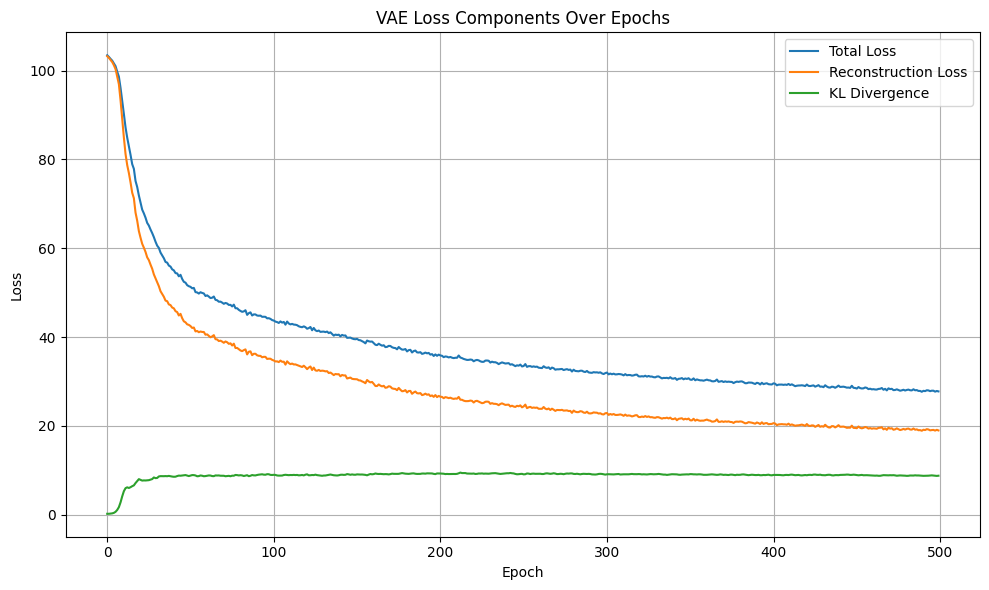

dim of latent mu: (331, 8)


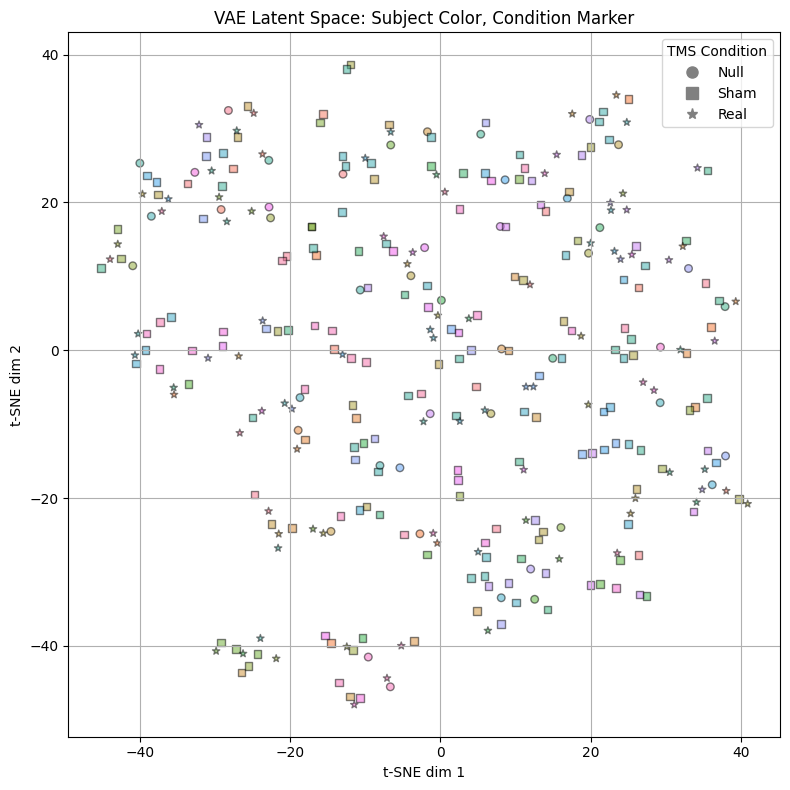

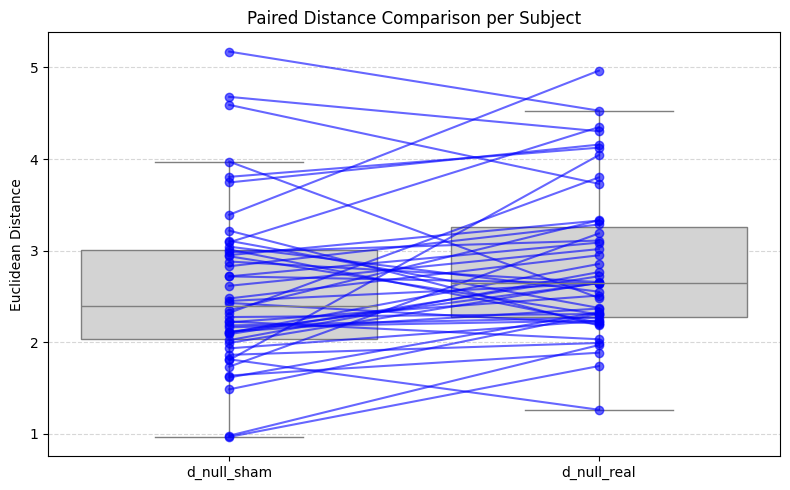

Paired t-test (ld=8): t = -2.349, p = 0.0233

=== latent_dim = 12 ===

===== Epoch 1 =====


Epoch 1/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 954.63it/s]


Epoch 1, Loss: 103.8656, Recon: 103.5517, KL: 0.3139

===== Epoch 2 =====


Epoch 2/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 816.21it/s]


Epoch 2, Loss: 103.2046, Recon: 102.9178, KL: 0.2868

===== Epoch 3 =====


Epoch 3/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1144.28it/s]


Epoch 3, Loss: 102.9807, Recon: 102.6633, KL: 0.3174

===== Epoch 4 =====


Epoch 4/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1111.98it/s]


Epoch 4, Loss: 102.6614, Recon: 102.2806, KL: 0.3808

===== Epoch 5 =====


Epoch 5/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1131.46it/s]


Epoch 5, Loss: 102.1765, Recon: 101.6781, KL: 0.4984

===== Epoch 6 =====


Epoch 6/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1111.34it/s]


Epoch 6, Loss: 101.5450, Recon: 100.8736, KL: 0.6714

===== Epoch 7 =====


Epoch 7/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1176.94it/s]


Epoch 7, Loss: 100.6573, Recon: 99.6894, KL: 0.9679

===== Epoch 8 =====


Epoch 8/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 999.81it/s]


Epoch 8, Loss: 99.6754, Recon: 98.2243, KL: 1.4511

===== Epoch 9 =====


Epoch 9/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1109.31it/s]


Epoch 9, Loss: 97.3238, Recon: 95.0164, KL: 2.3074

===== Epoch 10 =====


Epoch 10/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1168.48it/s]


Epoch 10, Loss: 95.3146, Recon: 91.7942, KL: 3.5204

===== Epoch 11 =====


Epoch 11/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1109.12it/s]


Epoch 11, Loss: 91.9587, Recon: 86.9970, KL: 4.9617

===== Epoch 12 =====


Epoch 12/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1159.14it/s]


Epoch 12, Loss: 88.2672, Recon: 81.9664, KL: 6.3008

===== Epoch 13 =====


Epoch 13/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1160.72it/s]


Epoch 13, Loss: 84.8400, Recon: 77.9514, KL: 6.8887

===== Epoch 14 =====


Epoch 14/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1116.86it/s]


Epoch 14, Loss: 81.7336, Recon: 74.6229, KL: 7.1107

===== Epoch 15 =====


Epoch 15/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1166.03it/s]


Epoch 15, Loss: 79.2713, Recon: 71.8725, KL: 7.3988

===== Epoch 16 =====


Epoch 16/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1147.50it/s]


Epoch 16, Loss: 76.5293, Recon: 68.4786, KL: 8.0507

===== Epoch 17 =====


Epoch 17/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1210.38it/s]


Epoch 17, Loss: 74.0816, Recon: 65.5859, KL: 8.4957

===== Epoch 18 =====


Epoch 18/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1071.59it/s]


Epoch 18, Loss: 72.2037, Recon: 63.5206, KL: 8.6831

===== Epoch 19 =====


Epoch 19/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 948.02it/s]


Epoch 19, Loss: 70.6625, Recon: 61.9151, KL: 8.7475

===== Epoch 20 =====


Epoch 20/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1155.22it/s]


Epoch 20, Loss: 68.7063, Recon: 59.9726, KL: 8.7337

===== Epoch 21 =====


Epoch 21/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1141.42it/s]


Epoch 21, Loss: 67.5261, Recon: 59.0516, KL: 8.4745

===== Epoch 22 =====


Epoch 22/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 268.48it/s]


Epoch 22, Loss: 66.6152, Recon: 57.7525, KL: 8.8627

===== Epoch 23 =====


Epoch 23/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1054.33it/s]


Epoch 23, Loss: 64.8754, Recon: 55.7703, KL: 9.1051

===== Epoch 24 =====


Epoch 24/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 979.44it/s]


Epoch 24, Loss: 63.8419, Recon: 54.8730, KL: 8.9689

===== Epoch 25 =====


Epoch 25/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1006.60it/s]


Epoch 25, Loss: 62.8625, Recon: 53.8121, KL: 9.0503

===== Epoch 26 =====


Epoch 26/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 941.54it/s]


Epoch 26, Loss: 61.5782, Recon: 52.5260, KL: 9.0522

===== Epoch 27 =====


Epoch 27/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 985.84it/s]


Epoch 27, Loss: 60.7296, Recon: 51.5567, KL: 9.1729

===== Epoch 28 =====


Epoch 28/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 926.94it/s]


Epoch 28, Loss: 59.9607, Recon: 50.9254, KL: 9.0353

===== Epoch 29 =====


Epoch 29/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 978.83it/s]


Epoch 29, Loss: 59.3733, Recon: 50.3427, KL: 9.0306

===== Epoch 30 =====


Epoch 30/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 962.30it/s]


Epoch 30, Loss: 58.8143, Recon: 49.7050, KL: 9.1094

===== Epoch 31 =====


Epoch 31/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 884.25it/s]


Epoch 31, Loss: 58.7825, Recon: 49.7530, KL: 9.0294

===== Epoch 32 =====


Epoch 32/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 856.49it/s]


Epoch 32, Loss: 58.3859, Recon: 49.4151, KL: 8.9707

===== Epoch 33 =====


Epoch 33/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 921.20it/s]


Epoch 33, Loss: 57.6982, Recon: 48.8240, KL: 8.8742

===== Epoch 34 =====


Epoch 34/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 923.99it/s]


Epoch 34, Loss: 56.8963, Recon: 48.2222, KL: 8.6741

===== Epoch 35 =====


Epoch 35/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 974.66it/s]


Epoch 35, Loss: 57.2474, Recon: 48.6081, KL: 8.6393

===== Epoch 36 =====


Epoch 36/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 889.96it/s]


Epoch 36, Loss: 56.2749, Recon: 47.6155, KL: 8.6594

===== Epoch 37 =====


Epoch 37/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 913.47it/s]


Epoch 37, Loss: 56.5744, Recon: 48.0371, KL: 8.5373

===== Epoch 38 =====


Epoch 38/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 926.79it/s]


Epoch 38, Loss: 55.2778, Recon: 46.6512, KL: 8.6266

===== Epoch 39 =====


Epoch 39/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 846.09it/s]


Epoch 39, Loss: 55.6862, Recon: 47.1467, KL: 8.5395

===== Epoch 40 =====


Epoch 40/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 878.81it/s]


Epoch 40, Loss: 55.3920, Recon: 46.8608, KL: 8.5313

===== Epoch 41 =====


Epoch 41/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 935.70it/s]


Epoch 41, Loss: 55.1907, Recon: 46.5571, KL: 8.6336

===== Epoch 42 =====


Epoch 42/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 949.89it/s]


Epoch 42, Loss: 55.2908, Recon: 46.6677, KL: 8.6231

===== Epoch 43 =====


Epoch 43/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 898.56it/s]


Epoch 43, Loss: 54.9527, Recon: 46.2460, KL: 8.7067

===== Epoch 44 =====


Epoch 44/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 927.09it/s]


Epoch 44, Loss: 54.4076, Recon: 45.4843, KL: 8.9234

===== Epoch 45 =====


Epoch 45/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1022.68it/s]


Epoch 45, Loss: 54.2573, Recon: 45.5024, KL: 8.7549

===== Epoch 46 =====


Epoch 46/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1050.73it/s]


Epoch 46, Loss: 53.7311, Recon: 45.0088, KL: 8.7223

===== Epoch 47 =====


Epoch 47/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 951.23it/s]


Epoch 47, Loss: 53.4715, Recon: 44.6337, KL: 8.8378

===== Epoch 48 =====


Epoch 48/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 964.79it/s]


Epoch 48, Loss: 52.9096, Recon: 43.9595, KL: 8.9501

===== Epoch 49 =====


Epoch 49/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1128.33it/s]


Epoch 49, Loss: 53.0070, Recon: 44.2403, KL: 8.7668

===== Epoch 50 =====


Epoch 50/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1002.18it/s]


Epoch 50, Loss: 52.9588, Recon: 44.1951, KL: 8.7637

===== Epoch 51 =====


Epoch 51/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1086.17it/s]


Epoch 51, Loss: 52.7845, Recon: 43.9882, KL: 8.7963

===== Epoch 52 =====


Epoch 52/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1005.13it/s]


Epoch 52, Loss: 52.6403, Recon: 43.7513, KL: 8.8890

===== Epoch 53 =====


Epoch 53/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1065.97it/s]


Epoch 53, Loss: 51.8906, Recon: 43.0445, KL: 8.8462

===== Epoch 54 =====


Epoch 54/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1099.97it/s]


Epoch 54, Loss: 52.1615, Recon: 43.2535, KL: 8.9081

===== Epoch 55 =====


Epoch 55/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1128.08it/s]


Epoch 55, Loss: 51.6895, Recon: 42.6575, KL: 9.0320

===== Epoch 56 =====


Epoch 56/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1069.90it/s]


Epoch 56, Loss: 51.3150, Recon: 42.2554, KL: 9.0596

===== Epoch 57 =====


Epoch 57/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1114.27it/s]


Epoch 57, Loss: 50.9131, Recon: 41.9528, KL: 8.9603

===== Epoch 58 =====


Epoch 58/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1075.06it/s]


Epoch 58, Loss: 51.2495, Recon: 42.3571, KL: 8.8924

===== Epoch 59 =====


Epoch 59/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1041.97it/s]


Epoch 59, Loss: 50.8093, Recon: 41.8846, KL: 8.9247

===== Epoch 60 =====


Epoch 60/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1113.46it/s]


Epoch 60, Loss: 50.8034, Recon: 41.9929, KL: 8.8105

===== Epoch 61 =====


Epoch 61/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1051.92it/s]


Epoch 61, Loss: 50.8060, Recon: 41.9909, KL: 8.8151

===== Epoch 62 =====


Epoch 62/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1048.91it/s]


Epoch 62, Loss: 50.6411, Recon: 41.6537, KL: 8.9874

===== Epoch 63 =====


Epoch 63/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1149.81it/s]


Epoch 63, Loss: 50.3732, Recon: 41.2976, KL: 9.0756

===== Epoch 64 =====


Epoch 64/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1143.09it/s]


Epoch 64, Loss: 49.9240, Recon: 40.8948, KL: 9.0292

===== Epoch 65 =====


Epoch 65/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1164.14it/s]


Epoch 65, Loss: 49.5930, Recon: 40.5837, KL: 9.0093

===== Epoch 66 =====


Epoch 66/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1097.15it/s]


Epoch 66, Loss: 49.5254, Recon: 40.5335, KL: 8.9918

===== Epoch 67 =====


Epoch 67/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1106.07it/s]


Epoch 67, Loss: 49.7452, Recon: 40.8075, KL: 8.9377

===== Epoch 68 =====


Epoch 68/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1117.88it/s]


Epoch 68, Loss: 49.3335, Recon: 40.2366, KL: 9.0969

===== Epoch 69 =====


Epoch 69/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1204.44it/s]


Epoch 69, Loss: 49.0105, Recon: 39.9672, KL: 9.0433

===== Epoch 70 =====


Epoch 70/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 926.86it/s]


Epoch 70, Loss: 49.0688, Recon: 40.1386, KL: 8.9302

===== Epoch 71 =====


Epoch 71/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 783.92it/s]


Epoch 71, Loss: 48.8506, Recon: 39.8699, KL: 8.9806

===== Epoch 72 =====


Epoch 72/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 372.02it/s]


Epoch 72, Loss: 48.8704, Recon: 39.7452, KL: 9.1251

===== Epoch 73 =====


Epoch 73/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1093.98it/s]


Epoch 73, Loss: 48.0170, Recon: 38.7755, KL: 9.2414

===== Epoch 74 =====


Epoch 74/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1087.81it/s]


Epoch 74, Loss: 48.6853, Recon: 39.4976, KL: 9.1877

===== Epoch 75 =====


Epoch 75/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1020.99it/s]


Epoch 75, Loss: 47.7507, Recon: 38.7011, KL: 9.0497

===== Epoch 76 =====


Epoch 76/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1144.17it/s]


Epoch 76, Loss: 47.5029, Recon: 38.4268, KL: 9.0761

===== Epoch 77 =====


Epoch 77/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1050.39it/s]


Epoch 77, Loss: 47.9957, Recon: 38.8476, KL: 9.1482

===== Epoch 78 =====


Epoch 78/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1042.65it/s]


Epoch 78, Loss: 47.8055, Recon: 38.5489, KL: 9.2567

===== Epoch 79 =====


Epoch 79/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1181.68it/s]


Epoch 79, Loss: 47.3220, Recon: 37.9928, KL: 9.3291

===== Epoch 80 =====


Epoch 80/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1122.59it/s]


Epoch 80, Loss: 47.5440, Recon: 38.1853, KL: 9.3586

===== Epoch 81 =====


Epoch 81/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1132.76it/s]


Epoch 81, Loss: 46.9371, Recon: 37.4375, KL: 9.4996

===== Epoch 82 =====


Epoch 82/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1104.19it/s]


Epoch 82, Loss: 46.8978, Recon: 37.4330, KL: 9.4648

===== Epoch 83 =====


Epoch 83/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1119.49it/s]


Epoch 83, Loss: 46.7818, Recon: 37.3488, KL: 9.4330

===== Epoch 84 =====


Epoch 84/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1105.19it/s]


Epoch 84, Loss: 46.6935, Recon: 37.1227, KL: 9.5707

===== Epoch 85 =====


Epoch 85/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1100.45it/s]


Epoch 85, Loss: 46.1788, Recon: 36.6037, KL: 9.5752

===== Epoch 86 =====


Epoch 86/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1105.88it/s]


Epoch 86, Loss: 46.3793, Recon: 36.8888, KL: 9.4904

===== Epoch 87 =====


Epoch 87/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1025.34it/s]


Epoch 87, Loss: 45.7190, Recon: 36.2342, KL: 9.4848

===== Epoch 88 =====


Epoch 88/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1161.07it/s]


Epoch 88, Loss: 45.8809, Recon: 36.3766, KL: 9.5042

===== Epoch 89 =====


Epoch 89/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1187.64it/s]


Epoch 89, Loss: 45.9389, Recon: 36.3696, KL: 9.5693

===== Epoch 90 =====


Epoch 90/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 916.82it/s]


Epoch 90, Loss: 45.5217, Recon: 35.9161, KL: 9.6056

===== Epoch 91 =====


Epoch 91/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1182.68it/s]


Epoch 91, Loss: 45.6924, Recon: 36.0669, KL: 9.6255

===== Epoch 92 =====


Epoch 92/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1143.94it/s]


Epoch 92, Loss: 45.0775, Recon: 35.4466, KL: 9.6309

===== Epoch 93 =====


Epoch 93/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1069.53it/s]


Epoch 93, Loss: 45.1374, Recon: 35.5652, KL: 9.5722

===== Epoch 94 =====


Epoch 94/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1227.81it/s]


Epoch 94, Loss: 45.0505, Recon: 35.4961, KL: 9.5544

===== Epoch 95 =====


Epoch 95/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1155.95it/s]


Epoch 95, Loss: 45.0603, Recon: 35.4366, KL: 9.6237

===== Epoch 96 =====


Epoch 96/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1164.76it/s]


Epoch 96, Loss: 44.5645, Recon: 35.0088, KL: 9.5557

===== Epoch 97 =====


Epoch 97/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1157.02it/s]


Epoch 97, Loss: 44.8163, Recon: 35.3376, KL: 9.4786

===== Epoch 98 =====


Epoch 98/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1057.81it/s]


Epoch 98, Loss: 44.4151, Recon: 34.7732, KL: 9.6419

===== Epoch 99 =====


Epoch 99/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1032.55it/s]


Epoch 99, Loss: 44.6017, Recon: 34.8087, KL: 9.7930

===== Epoch 100 =====


Epoch 100/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.71it/s]


Epoch 100, Loss: 44.4443, Recon: 34.7682, KL: 9.6761

===== Epoch 101 =====


Epoch 101/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1099.35it/s]


Epoch 101, Loss: 43.9714, Recon: 34.4176, KL: 9.5537

===== Epoch 102 =====


Epoch 102/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.34it/s]


Epoch 102, Loss: 44.1493, Recon: 34.5177, KL: 9.6315

===== Epoch 103 =====


Epoch 103/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1191.93it/s]


Epoch 103, Loss: 44.0219, Recon: 34.2185, KL: 9.8034

===== Epoch 104 =====


Epoch 104/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1149.67it/s]


Epoch 104, Loss: 44.0272, Recon: 34.0691, KL: 9.9581

===== Epoch 105 =====


Epoch 105/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1197.19it/s]


Epoch 105, Loss: 43.5743, Recon: 33.8422, KL: 9.7321

===== Epoch 106 =====


Epoch 106/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.11it/s]


Epoch 106, Loss: 43.4454, Recon: 33.7785, KL: 9.6669

===== Epoch 107 =====


Epoch 107/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1120.14it/s]


Epoch 107, Loss: 43.5897, Recon: 33.8892, KL: 9.7004

===== Epoch 108 =====


Epoch 108/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1094.52it/s]


Epoch 108, Loss: 43.6559, Recon: 33.9755, KL: 9.6805

===== Epoch 109 =====


Epoch 109/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1127.86it/s]


Epoch 109, Loss: 43.0364, Recon: 33.2693, KL: 9.7671

===== Epoch 110 =====


Epoch 110/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.72it/s]


Epoch 110, Loss: 43.2493, Recon: 33.4079, KL: 9.8413

===== Epoch 111 =====


Epoch 111/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1016.26it/s]


Epoch 111, Loss: 43.2725, Recon: 33.4167, KL: 9.8558

===== Epoch 112 =====


Epoch 112/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1070.37it/s]


Epoch 112, Loss: 42.7667, Recon: 32.9179, KL: 9.8488

===== Epoch 113 =====


Epoch 113/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1157.66it/s]


Epoch 113, Loss: 43.1671, Recon: 33.3917, KL: 9.7754

===== Epoch 114 =====


Epoch 114/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1000.46it/s]


Epoch 114, Loss: 42.3010, Recon: 32.4121, KL: 9.8889

===== Epoch 115 =====


Epoch 115/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1169.07it/s]


Epoch 115, Loss: 42.6950, Recon: 32.7853, KL: 9.9097

===== Epoch 116 =====


Epoch 116/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1107.53it/s]


Epoch 116, Loss: 42.2353, Recon: 32.3585, KL: 9.8767

===== Epoch 117 =====


Epoch 117/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1109.34it/s]


Epoch 117, Loss: 42.3411, Recon: 32.4903, KL: 9.8508

===== Epoch 118 =====


Epoch 118/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1071.09it/s]


Epoch 118, Loss: 42.1403, Recon: 32.3210, KL: 9.8192

===== Epoch 119 =====


Epoch 119/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1127.17it/s]


Epoch 119, Loss: 42.0603, Recon: 32.1507, KL: 9.9095

===== Epoch 120 =====


Epoch 120/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1170.70it/s]


Epoch 120, Loss: 42.0296, Recon: 32.1667, KL: 9.8629

===== Epoch 121 =====


Epoch 121/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.73it/s]


Epoch 121, Loss: 41.8962, Recon: 32.1446, KL: 9.7516

===== Epoch 122 =====


Epoch 122/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1141.42it/s]


Epoch 122, Loss: 42.1376, Recon: 32.4040, KL: 9.7336

===== Epoch 123 =====


Epoch 123/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1236.40it/s]


Epoch 123, Loss: 42.0077, Recon: 32.1568, KL: 9.8509

===== Epoch 124 =====


Epoch 124/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.19it/s]


Epoch 124, Loss: 41.7935, Recon: 31.9194, KL: 9.8741

===== Epoch 125 =====


Epoch 125/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1134.49it/s]


Epoch 125, Loss: 41.6600, Recon: 31.7079, KL: 9.9520

===== Epoch 126 =====


Epoch 126/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.43it/s]


Epoch 126, Loss: 41.5406, Recon: 31.5295, KL: 10.0111

===== Epoch 127 =====


Epoch 127/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.20it/s]


Epoch 127, Loss: 41.4561, Recon: 31.4734, KL: 9.9827

===== Epoch 128 =====


Epoch 128/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 909.76it/s]


Epoch 128, Loss: 41.1997, Recon: 31.3190, KL: 9.8807

===== Epoch 129 =====


Epoch 129/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 794.75it/s]


Epoch 129, Loss: 41.3551, Recon: 31.4223, KL: 9.9328

===== Epoch 130 =====


Epoch 130/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.14it/s]


Epoch 130, Loss: 40.8810, Recon: 30.8797, KL: 10.0013

===== Epoch 131 =====


Epoch 131/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1118.45it/s]


Epoch 131, Loss: 41.4068, Recon: 31.5185, KL: 9.8883

===== Epoch 132 =====


Epoch 132/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1163.38it/s]


Epoch 132, Loss: 41.2627, Recon: 31.3352, KL: 9.9275

===== Epoch 133 =====


Epoch 133/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1140.83it/s]


Epoch 133, Loss: 41.1130, Recon: 31.1091, KL: 10.0039

===== Epoch 134 =====


Epoch 134/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.52it/s]


Epoch 134, Loss: 40.7862, Recon: 30.8219, KL: 9.9643

===== Epoch 135 =====


Epoch 135/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1165.50it/s]


Epoch 135, Loss: 40.3509, Recon: 30.3524, KL: 9.9986

===== Epoch 136 =====


Epoch 136/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1127.61it/s]


Epoch 136, Loss: 41.2189, Recon: 31.1993, KL: 10.0195

===== Epoch 137 =====


Epoch 137/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1130.18it/s]


Epoch 137, Loss: 40.6526, Recon: 30.5527, KL: 10.0999

===== Epoch 138 =====


Epoch 138/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 564.97it/s]


Epoch 138, Loss: 40.7598, Recon: 30.7156, KL: 10.0442

===== Epoch 139 =====


Epoch 139/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1109.74it/s]


Epoch 139, Loss: 40.4426, Recon: 30.4522, KL: 9.9904

===== Epoch 140 =====


Epoch 140/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.95it/s]


Epoch 140, Loss: 40.0098, Recon: 29.9718, KL: 10.0380

===== Epoch 141 =====


Epoch 141/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1138.24it/s]


Epoch 141, Loss: 40.6096, Recon: 30.6234, KL: 9.9862

===== Epoch 142 =====


Epoch 142/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.11it/s]


Epoch 142, Loss: 40.6095, Recon: 30.6096, KL: 9.9999

===== Epoch 143 =====


Epoch 143/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1158.50it/s]


Epoch 143, Loss: 40.1588, Recon: 30.0806, KL: 10.0782

===== Epoch 144 =====


Epoch 144/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.42it/s]


Epoch 144, Loss: 40.0219, Recon: 29.9430, KL: 10.0789

===== Epoch 145 =====


Epoch 145/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1214.40it/s]


Epoch 145, Loss: 40.3911, Recon: 30.3630, KL: 10.0281

===== Epoch 146 =====


Epoch 146/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.39it/s]


Epoch 146, Loss: 40.4215, Recon: 30.3311, KL: 10.0904

===== Epoch 147 =====


Epoch 147/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 987.17it/s]


Epoch 147, Loss: 39.9943, Recon: 29.9310, KL: 10.0633

===== Epoch 148 =====


Epoch 148/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1104.29it/s]


Epoch 148, Loss: 39.9820, Recon: 29.8980, KL: 10.0840

===== Epoch 149 =====


Epoch 149/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1193.44it/s]


Epoch 149, Loss: 39.7602, Recon: 29.5787, KL: 10.1815

===== Epoch 150 =====


Epoch 150/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 938.32it/s]


Epoch 150, Loss: 39.7158, Recon: 29.4971, KL: 10.2187

===== Epoch 151 =====


Epoch 151/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 709.35it/s]


Epoch 151, Loss: 39.7304, Recon: 29.6144, KL: 10.1159

===== Epoch 152 =====


Epoch 152/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1156.67it/s]


Epoch 152, Loss: 39.7521, Recon: 29.7167, KL: 10.0353

===== Epoch 153 =====


Epoch 153/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1124.26it/s]


Epoch 153, Loss: 39.5964, Recon: 29.5362, KL: 10.0602

===== Epoch 154 =====


Epoch 154/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1133.07it/s]


Epoch 154, Loss: 39.1072, Recon: 29.1268, KL: 9.9804

===== Epoch 155 =====


Epoch 155/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1043.57it/s]


Epoch 155, Loss: 39.5782, Recon: 29.6012, KL: 9.9769

===== Epoch 156 =====


Epoch 156/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1129.90it/s]


Epoch 156, Loss: 39.1832, Recon: 29.1181, KL: 10.0650

===== Epoch 157 =====


Epoch 157/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1137.54it/s]


Epoch 157, Loss: 39.1979, Recon: 29.2162, KL: 9.9817

===== Epoch 158 =====


Epoch 158/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1133.09it/s]


Epoch 158, Loss: 39.1113, Recon: 29.2109, KL: 9.9004

===== Epoch 159 =====


Epoch 159/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.02it/s]


Epoch 159, Loss: 38.9835, Recon: 28.9836, KL: 9.9999

===== Epoch 160 =====


Epoch 160/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1124.29it/s]


Epoch 160, Loss: 39.0265, Recon: 29.0504, KL: 9.9761

===== Epoch 161 =====


Epoch 161/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1128.19it/s]


Epoch 161, Loss: 39.0289, Recon: 29.1634, KL: 9.8655

===== Epoch 162 =====


Epoch 162/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.24it/s]


Epoch 162, Loss: 39.0201, Recon: 29.0689, KL: 9.9512

===== Epoch 163 =====


Epoch 163/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 791.70it/s]


Epoch 163, Loss: 38.6060, Recon: 28.6330, KL: 9.9731

===== Epoch 164 =====


Epoch 164/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.68it/s]


Epoch 164, Loss: 39.0077, Recon: 29.0861, KL: 9.9215

===== Epoch 165 =====


Epoch 165/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1115.05it/s]


Epoch 165, Loss: 38.7407, Recon: 28.8259, KL: 9.9148

===== Epoch 166 =====


Epoch 166/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1127.75it/s]


Epoch 166, Loss: 38.3353, Recon: 28.4290, KL: 9.9063

===== Epoch 167 =====


Epoch 167/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1102.31it/s]


Epoch 167, Loss: 38.8442, Recon: 29.0268, KL: 9.8174

===== Epoch 168 =====


Epoch 168/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1117.67it/s]


Epoch 168, Loss: 38.4672, Recon: 28.6306, KL: 9.8365

===== Epoch 169 =====


Epoch 169/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1082.88it/s]


Epoch 169, Loss: 38.6935, Recon: 28.8342, KL: 9.8593

===== Epoch 170 =====


Epoch 170/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1140.97it/s]


Epoch 170, Loss: 38.3097, Recon: 28.4277, KL: 9.8820

===== Epoch 171 =====


Epoch 171/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1124.51it/s]


Epoch 171, Loss: 38.2366, Recon: 28.3106, KL: 9.9260

===== Epoch 172 =====


Epoch 172/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1216.80it/s]


Epoch 172, Loss: 38.0874, Recon: 28.1853, KL: 9.9020

===== Epoch 173 =====


Epoch 173/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 455.33it/s]


Epoch 173, Loss: 37.8658, Recon: 28.0808, KL: 9.7849

===== Epoch 174 =====


Epoch 174/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 987.63it/s]


Epoch 174, Loss: 38.3958, Recon: 28.6721, KL: 9.7236

===== Epoch 175 =====


Epoch 175/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 777.51it/s]


Epoch 175, Loss: 38.2250, Recon: 28.3623, KL: 9.8627

===== Epoch 176 =====


Epoch 176/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.61it/s]


Epoch 176, Loss: 38.0546, Recon: 28.1384, KL: 9.9163

===== Epoch 177 =====


Epoch 177/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 447.39it/s]


Epoch 177, Loss: 37.9534, Recon: 28.0031, KL: 9.9503

===== Epoch 178 =====


Epoch 178/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 782.81it/s]


Epoch 178, Loss: 38.0207, Recon: 28.0922, KL: 9.9284

===== Epoch 179 =====


Epoch 179/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 754.78it/s]


Epoch 179, Loss: 37.7058, Recon: 27.8069, KL: 9.8988

===== Epoch 180 =====


Epoch 180/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1047.22it/s]


Epoch 180, Loss: 37.7959, Recon: 27.9435, KL: 9.8524

===== Epoch 181 =====


Epoch 181/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.27it/s]


Epoch 181, Loss: 37.6740, Recon: 27.7814, KL: 9.8926

===== Epoch 182 =====


Epoch 182/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1138.60it/s]


Epoch 182, Loss: 37.8010, Recon: 27.8904, KL: 9.9105

===== Epoch 183 =====


Epoch 183/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1172.10it/s]


Epoch 183, Loss: 37.8058, Recon: 27.9188, KL: 9.8870

===== Epoch 184 =====


Epoch 184/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 943.47it/s]


Epoch 184, Loss: 37.7439, Recon: 27.8169, KL: 9.9270

===== Epoch 185 =====


Epoch 185/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1091.47it/s]


Epoch 185, Loss: 37.2452, Recon: 27.3383, KL: 9.9069

===== Epoch 186 =====


Epoch 186/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.78it/s]


Epoch 186, Loss: 37.4719, Recon: 27.6412, KL: 9.8306

===== Epoch 187 =====


Epoch 187/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.84it/s]


Epoch 187, Loss: 37.4527, Recon: 27.6786, KL: 9.7741

===== Epoch 188 =====


Epoch 188/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.38it/s]


Epoch 188, Loss: 37.2537, Recon: 27.3821, KL: 9.8716

===== Epoch 189 =====


Epoch 189/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1150.87it/s]


Epoch 189, Loss: 37.1230, Recon: 27.3011, KL: 9.8219

===== Epoch 190 =====


Epoch 190/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1137.06it/s]


Epoch 190, Loss: 37.0223, Recon: 27.2341, KL: 9.7883

===== Epoch 191 =====


Epoch 191/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1133.87it/s]


Epoch 191, Loss: 37.1400, Recon: 27.3820, KL: 9.7580

===== Epoch 192 =====


Epoch 192/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.80it/s]


Epoch 192, Loss: 37.0200, Recon: 27.2455, KL: 9.7745

===== Epoch 193 =====


Epoch 193/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.95it/s]


Epoch 193, Loss: 36.8474, Recon: 27.0221, KL: 9.8253

===== Epoch 194 =====


Epoch 194/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1118.89it/s]


Epoch 194, Loss: 37.1009, Recon: 27.2784, KL: 9.8226

===== Epoch 195 =====


Epoch 195/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.92it/s]


Epoch 195, Loss: 36.9913, Recon: 27.2323, KL: 9.7590

===== Epoch 196 =====


Epoch 196/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1143.57it/s]


Epoch 196, Loss: 36.5270, Recon: 26.7710, KL: 9.7560

===== Epoch 197 =====


Epoch 197/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.52it/s]


Epoch 197, Loss: 36.6315, Recon: 26.8323, KL: 9.7992

===== Epoch 198 =====


Epoch 198/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.59it/s]


Epoch 198, Loss: 36.7567, Recon: 27.0017, KL: 9.7550

===== Epoch 199 =====


Epoch 199/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.67it/s]


Epoch 199, Loss: 36.3807, Recon: 26.6879, KL: 9.6928

===== Epoch 200 =====


Epoch 200/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1130.18it/s]


Epoch 200, Loss: 36.4727, Recon: 26.8352, KL: 9.6375

===== Epoch 201 =====


Epoch 201/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1015.88it/s]


Epoch 201, Loss: 36.5144, Recon: 26.8304, KL: 9.6840

===== Epoch 202 =====


Epoch 202/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1078.33it/s]


Epoch 202, Loss: 36.3294, Recon: 26.5493, KL: 9.7801

===== Epoch 203 =====


Epoch 203/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 996.81it/s]


Epoch 203, Loss: 36.4958, Recon: 26.7720, KL: 9.7239

===== Epoch 204 =====


Epoch 204/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.00it/s]


Epoch 204, Loss: 36.4125, Recon: 26.6946, KL: 9.7180

===== Epoch 205 =====


Epoch 205/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1092.65it/s]


Epoch 205, Loss: 36.2512, Recon: 26.5048, KL: 9.7464

===== Epoch 206 =====


Epoch 206/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1135.05it/s]


Epoch 206, Loss: 35.9344, Recon: 26.2087, KL: 9.7257

===== Epoch 207 =====


Epoch 207/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.81it/s]


Epoch 207, Loss: 36.2490, Recon: 26.6147, KL: 9.6344

===== Epoch 208 =====


Epoch 208/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1164.03it/s]


Epoch 208, Loss: 36.3878, Recon: 26.7794, KL: 9.6084

===== Epoch 209 =====


Epoch 209/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1127.61it/s]


Epoch 209, Loss: 35.9798, Recon: 26.3049, KL: 9.6749

===== Epoch 210 =====


Epoch 210/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1170.26it/s]


Epoch 210, Loss: 35.8952, Recon: 26.1264, KL: 9.7688

===== Epoch 211 =====


Epoch 211/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1109.28it/s]


Epoch 211, Loss: 35.6821, Recon: 25.9954, KL: 9.6867

===== Epoch 212 =====


Epoch 212/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.24it/s]


Epoch 212, Loss: 36.0313, Recon: 26.4382, KL: 9.5931

===== Epoch 213 =====


Epoch 213/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1186.35it/s]


Epoch 213, Loss: 35.9427, Recon: 26.3156, KL: 9.6271

===== Epoch 214 =====


Epoch 214/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1112.25it/s]


Epoch 214, Loss: 35.8170, Recon: 26.1390, KL: 9.6779

===== Epoch 215 =====


Epoch 215/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.49it/s]


Epoch 215, Loss: 35.6441, Recon: 26.0085, KL: 9.6356

===== Epoch 216 =====


Epoch 216/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1093.85it/s]


Epoch 216, Loss: 36.0135, Recon: 26.3552, KL: 9.6583

===== Epoch 217 =====


Epoch 217/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1161.07it/s]


Epoch 217, Loss: 35.8383, Recon: 26.1099, KL: 9.7284

===== Epoch 218 =====


Epoch 218/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.59it/s]


Epoch 218, Loss: 35.7233, Recon: 25.9339, KL: 9.7894

===== Epoch 219 =====


Epoch 219/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.12it/s]


Epoch 219, Loss: 35.2600, Recon: 25.4786, KL: 9.7814

===== Epoch 220 =====


Epoch 220/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.95it/s]


Epoch 220, Loss: 35.3283, Recon: 25.6491, KL: 9.6791

===== Epoch 221 =====


Epoch 221/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1111.45it/s]


Epoch 221, Loss: 35.4097, Recon: 25.7692, KL: 9.6405

===== Epoch 222 =====


Epoch 222/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1090.61it/s]


Epoch 222, Loss: 35.3194, Recon: 25.6198, KL: 9.6996

===== Epoch 223 =====


Epoch 223/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1146.90it/s]


Epoch 223, Loss: 35.2840, Recon: 25.5655, KL: 9.7185

===== Epoch 224 =====


Epoch 224/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1165.14it/s]


Epoch 224, Loss: 35.0592, Recon: 25.3576, KL: 9.7016

===== Epoch 225 =====


Epoch 225/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1086.74it/s]


Epoch 225, Loss: 35.0638, Recon: 25.4235, KL: 9.6403

===== Epoch 226 =====


Epoch 226/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1137.90it/s]


Epoch 226, Loss: 34.6914, Recon: 25.1583, KL: 9.5330

===== Epoch 227 =====


Epoch 227/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 823.35it/s]


Epoch 227, Loss: 34.6948, Recon: 25.2275, KL: 9.4673

===== Epoch 228 =====


Epoch 228/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 861.25it/s]


Epoch 228, Loss: 34.9546, Recon: 25.4698, KL: 9.4848

===== Epoch 229 =====


Epoch 229/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 240.43it/s]


Epoch 229, Loss: 35.0140, Recon: 25.4965, KL: 9.5175

===== Epoch 230 =====


Epoch 230/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 878.02it/s]


Epoch 230, Loss: 34.8161, Recon: 25.3221, KL: 9.4940

===== Epoch 231 =====


Epoch 231/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 946.56it/s]


Epoch 231, Loss: 35.0144, Recon: 25.4841, KL: 9.5304

===== Epoch 232 =====


Epoch 232/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 930.79it/s]


Epoch 232, Loss: 34.7480, Recon: 25.0977, KL: 9.6503

===== Epoch 233 =====


Epoch 233/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 905.20it/s]


Epoch 233, Loss: 34.6864, Recon: 25.0433, KL: 9.6431

===== Epoch 234 =====


Epoch 234/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 919.66it/s]


Epoch 234, Loss: 34.5108, Recon: 24.9095, KL: 9.6013

===== Epoch 235 =====


Epoch 235/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 905.28it/s]


Epoch 235, Loss: 34.6670, Recon: 25.1721, KL: 9.4949

===== Epoch 236 =====


Epoch 236/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 927.40it/s]


Epoch 236, Loss: 34.1995, Recon: 24.6909, KL: 9.5086

===== Epoch 237 =====


Epoch 237/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 889.84it/s]


Epoch 237, Loss: 34.3969, Recon: 24.8950, KL: 9.5020

===== Epoch 238 =====


Epoch 238/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 823.35it/s]


Epoch 238, Loss: 34.8031, Recon: 25.2544, KL: 9.5487

===== Epoch 239 =====


Epoch 239/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 948.29it/s]


Epoch 239, Loss: 34.3974, Recon: 24.8672, KL: 9.5302

===== Epoch 240 =====


Epoch 240/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 923.52it/s]


Epoch 240, Loss: 34.5925, Recon: 25.0359, KL: 9.5566

===== Epoch 241 =====


Epoch 241/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 906.56it/s]


Epoch 241, Loss: 34.4029, Recon: 24.8039, KL: 9.5990

===== Epoch 242 =====


Epoch 242/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 937.39it/s]


Epoch 242, Loss: 34.4707, Recon: 24.8805, KL: 9.5902

===== Epoch 243 =====


Epoch 243/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 904.21it/s]


Epoch 243, Loss: 34.4203, Recon: 24.7986, KL: 9.6216

===== Epoch 244 =====


Epoch 244/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 639.13it/s]


Epoch 244, Loss: 34.2748, Recon: 24.6503, KL: 9.6245

===== Epoch 245 =====


Epoch 245/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 793.54it/s]


Epoch 245, Loss: 34.0247, Recon: 24.4241, KL: 9.6006

===== Epoch 246 =====


Epoch 246/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 759.71it/s]


Epoch 246, Loss: 33.6688, Recon: 24.1232, KL: 9.5456

===== Epoch 247 =====


Epoch 247/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1002.18it/s]


Epoch 247, Loss: 34.1793, Recon: 24.6770, KL: 9.5023

===== Epoch 248 =====


Epoch 248/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 909.63it/s]


Epoch 248, Loss: 33.8808, Recon: 24.3760, KL: 9.5048

===== Epoch 249 =====


Epoch 249/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 938.08it/s]


Epoch 249, Loss: 33.7091, Recon: 24.2396, KL: 9.4696

===== Epoch 250 =====


Epoch 250/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 898.05it/s]


Epoch 250, Loss: 33.8518, Recon: 24.4175, KL: 9.4343

===== Epoch 251 =====


Epoch 251/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 869.61it/s]


Epoch 251, Loss: 33.5913, Recon: 24.1640, KL: 9.4272

===== Epoch 252 =====


Epoch 252/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 958.52it/s]


Epoch 252, Loss: 33.6607, Recon: 24.2699, KL: 9.3908

===== Epoch 253 =====


Epoch 253/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 887.94it/s]


Epoch 253, Loss: 33.7623, Recon: 24.3344, KL: 9.4279

===== Epoch 254 =====


Epoch 254/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 889.53it/s]


Epoch 254, Loss: 33.7538, Recon: 24.2447, KL: 9.5091

===== Epoch 255 =====


Epoch 255/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 855.50it/s]


Epoch 255, Loss: 33.8001, Recon: 24.2822, KL: 9.5178

===== Epoch 256 =====


Epoch 256/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 974.31it/s]


Epoch 256, Loss: 33.8225, Recon: 24.3030, KL: 9.5196

===== Epoch 257 =====


Epoch 257/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 940.98it/s]


Epoch 257, Loss: 33.4853, Recon: 23.9021, KL: 9.5832

===== Epoch 258 =====


Epoch 258/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 917.66it/s]


Epoch 258, Loss: 33.5969, Recon: 24.0285, KL: 9.5683

===== Epoch 259 =====


Epoch 259/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 963.24it/s]


Epoch 259, Loss: 33.3314, Recon: 23.7694, KL: 9.5620

===== Epoch 260 =====


Epoch 260/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 924.43it/s]


Epoch 260, Loss: 33.6281, Recon: 24.0873, KL: 9.5408

===== Epoch 261 =====


Epoch 261/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 934.98it/s]


Epoch 261, Loss: 33.3173, Recon: 23.7838, KL: 9.5336

===== Epoch 262 =====


Epoch 262/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 975.36it/s]


Epoch 262, Loss: 33.5364, Recon: 23.9993, KL: 9.5371

===== Epoch 263 =====


Epoch 263/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 952.37it/s]


Epoch 263, Loss: 33.2867, Recon: 23.7092, KL: 9.5775

===== Epoch 264 =====


Epoch 264/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 927.33it/s]


Epoch 264, Loss: 33.2516, Recon: 23.6802, KL: 9.5713

===== Epoch 265 =====


Epoch 265/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 948.43it/s]


Epoch 265, Loss: 33.3236, Recon: 23.7903, KL: 9.5332

===== Epoch 266 =====


Epoch 266/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 939.55it/s]


Epoch 266, Loss: 33.3189, Recon: 23.8053, KL: 9.5136

===== Epoch 267 =====


Epoch 267/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 934.11it/s]


Epoch 267, Loss: 33.2470, Recon: 23.6989, KL: 9.5481

===== Epoch 268 =====


Epoch 268/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 837.19it/s]


Epoch 268, Loss: 33.0104, Recon: 23.4751, KL: 9.5353

===== Epoch 269 =====


Epoch 269/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 898.24it/s]


Epoch 269, Loss: 32.8563, Recon: 23.3720, KL: 9.4843

===== Epoch 270 =====


Epoch 270/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 958.94it/s]


Epoch 270, Loss: 32.7049, Recon: 23.2934, KL: 9.4115

===== Epoch 271 =====


Epoch 271/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 916.51it/s]


Epoch 271, Loss: 33.1133, Recon: 23.7477, KL: 9.3656

===== Epoch 272 =====


Epoch 272/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 964.75it/s]


Epoch 272, Loss: 32.9898, Recon: 23.5608, KL: 9.4290

===== Epoch 273 =====


Epoch 273/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 976.47it/s]


Epoch 273, Loss: 32.8966, Recon: 23.4310, KL: 9.4656

===== Epoch 274 =====


Epoch 274/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 927.66it/s]


Epoch 274, Loss: 32.9848, Recon: 23.5784, KL: 9.4064

===== Epoch 275 =====


Epoch 275/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 884.76it/s]


Epoch 275, Loss: 33.0262, Recon: 23.5714, KL: 9.4548

===== Epoch 276 =====


Epoch 276/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 888.03it/s]


Epoch 276, Loss: 32.7265, Recon: 23.2132, KL: 9.5134

===== Epoch 277 =====


Epoch 277/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 900.26it/s]


Epoch 277, Loss: 32.8426, Recon: 23.3880, KL: 9.4545

===== Epoch 278 =====


Epoch 278/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 881.27it/s]


Epoch 278, Loss: 32.7798, Recon: 23.3069, KL: 9.4729

===== Epoch 279 =====


Epoch 279/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 871.01it/s]


Epoch 279, Loss: 32.5692, Recon: 23.0912, KL: 9.4780

===== Epoch 280 =====


Epoch 280/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 947.28it/s]


Epoch 280, Loss: 32.4790, Recon: 23.0442, KL: 9.4348

===== Epoch 281 =====


Epoch 281/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 938.46it/s]


Epoch 281, Loss: 32.3009, Recon: 22.9126, KL: 9.3884

===== Epoch 282 =====


Epoch 282/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 897.74it/s]


Epoch 282, Loss: 32.6546, Recon: 23.3124, KL: 9.3422

===== Epoch 283 =====


Epoch 283/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1013.99it/s]


Epoch 283, Loss: 32.3137, Recon: 22.9898, KL: 9.3239

===== Epoch 284 =====


Epoch 284/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1011.67it/s]


Epoch 284, Loss: 32.2491, Recon: 22.9479, KL: 9.3012

===== Epoch 285 =====


Epoch 285/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 997.72it/s]


Epoch 285, Loss: 32.3497, Recon: 23.0908, KL: 9.2589

===== Epoch 286 =====


Epoch 286/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1084.28it/s]


Epoch 286, Loss: 31.9936, Recon: 22.7249, KL: 9.2687

===== Epoch 287 =====


Epoch 287/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1068.07it/s]


Epoch 287, Loss: 32.3870, Recon: 23.1095, KL: 9.2775

===== Epoch 288 =====


Epoch 288/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 978.75it/s]


Epoch 288, Loss: 32.0847, Recon: 22.8070, KL: 9.2777

===== Epoch 289 =====


Epoch 289/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 968.21it/s]


Epoch 289, Loss: 32.3248, Recon: 23.0307, KL: 9.2940

===== Epoch 290 =====


Epoch 290/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1115.29it/s]


Epoch 290, Loss: 31.9963, Recon: 22.6551, KL: 9.3412

===== Epoch 291 =====


Epoch 291/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 940.66it/s]


Epoch 291, Loss: 32.0252, Recon: 22.6959, KL: 9.3293

===== Epoch 292 =====


Epoch 292/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.27it/s]


Epoch 292, Loss: 32.0272, Recon: 22.7852, KL: 9.2420

===== Epoch 293 =====


Epoch 293/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.19it/s]


Epoch 293, Loss: 32.5812, Recon: 23.2909, KL: 9.2903

===== Epoch 294 =====


Epoch 294/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1040.39it/s]


Epoch 294, Loss: 31.9571, Recon: 22.5787, KL: 9.3785

===== Epoch 295 =====


Epoch 295/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 998.54it/s]


Epoch 295, Loss: 31.7198, Recon: 22.3615, KL: 9.3584

===== Epoch 296 =====


Epoch 296/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1007.87it/s]


Epoch 296, Loss: 32.0199, Recon: 22.7371, KL: 9.2828

===== Epoch 297 =====


Epoch 297/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 911.35it/s]


Epoch 297, Loss: 32.2135, Recon: 22.9644, KL: 9.2492

===== Epoch 298 =====


Epoch 298/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1082.88it/s]


Epoch 298, Loss: 32.0042, Recon: 22.6601, KL: 9.3441

===== Epoch 299 =====


Epoch 299/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 898.75it/s]


Epoch 299, Loss: 32.1050, Recon: 22.7391, KL: 9.3659

===== Epoch 300 =====


Epoch 300/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 984.07it/s]


Epoch 300, Loss: 31.8177, Recon: 22.4778, KL: 9.3400

===== Epoch 301 =====


Epoch 301/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1034.93it/s]


Epoch 301, Loss: 32.0004, Recon: 22.6199, KL: 9.3805

===== Epoch 302 =====


Epoch 302/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1056.79it/s]


Epoch 302, Loss: 31.9284, Recon: 22.5258, KL: 9.4026

===== Epoch 303 =====


Epoch 303/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1088.56it/s]


Epoch 303, Loss: 31.9320, Recon: 22.5945, KL: 9.3375

===== Epoch 304 =====


Epoch 304/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1017.00it/s]


Epoch 304, Loss: 31.6571, Recon: 22.2832, KL: 9.3739

===== Epoch 305 =====


Epoch 305/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1086.30it/s]


Epoch 305, Loss: 31.8205, Recon: 22.4463, KL: 9.3742

===== Epoch 306 =====


Epoch 306/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1137.09it/s]


Epoch 306, Loss: 31.8138, Recon: 22.4359, KL: 9.3779

===== Epoch 307 =====


Epoch 307/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1097.15it/s]


Epoch 307, Loss: 31.7492, Recon: 22.3272, KL: 9.4220

===== Epoch 308 =====


Epoch 308/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1036.54it/s]


Epoch 308, Loss: 31.5188, Recon: 22.0861, KL: 9.4327

===== Epoch 309 =====


Epoch 309/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1071.39it/s]


Epoch 309, Loss: 31.6896, Recon: 22.2854, KL: 9.4042

===== Epoch 310 =====


Epoch 310/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1056.14it/s]


Epoch 310, Loss: 31.4611, Recon: 22.0897, KL: 9.3715

===== Epoch 311 =====


Epoch 311/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1045.13it/s]


Epoch 311, Loss: 31.5464, Recon: 22.2133, KL: 9.3331

===== Epoch 312 =====


Epoch 312/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1037.73it/s]


Epoch 312, Loss: 31.2889, Recon: 21.9881, KL: 9.3009

===== Epoch 313 =====


Epoch 313/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 991.99it/s]


Epoch 313, Loss: 31.7355, Recon: 22.4762, KL: 9.2593

===== Epoch 314 =====


Epoch 314/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1063.42it/s]


Epoch 314, Loss: 31.6274, Recon: 22.2748, KL: 9.3526

===== Epoch 315 =====


Epoch 315/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1035.79it/s]


Epoch 315, Loss: 31.2739, Recon: 21.8772, KL: 9.3968

===== Epoch 316 =====


Epoch 316/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1023.52it/s]


Epoch 316, Loss: 31.2897, Recon: 21.9303, KL: 9.3594

===== Epoch 317 =====


Epoch 317/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 974.57it/s]


Epoch 317, Loss: 31.1526, Recon: 21.8378, KL: 9.3147

===== Epoch 318 =====


Epoch 318/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 915.53it/s]


Epoch 318, Loss: 31.3765, Recon: 22.0678, KL: 9.3087

===== Epoch 319 =====


Epoch 319/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1015.70it/s]


Epoch 319, Loss: 31.0794, Recon: 21.7594, KL: 9.3200

===== Epoch 320 =====


Epoch 320/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1063.71it/s]


Epoch 320, Loss: 31.4116, Recon: 22.2042, KL: 9.2074

===== Epoch 321 =====


Epoch 321/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 992.97it/s]


Epoch 321, Loss: 31.3268, Recon: 22.1000, KL: 9.2268

===== Epoch 322 =====


Epoch 322/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1105.54it/s]


Epoch 322, Loss: 30.9798, Recon: 21.7239, KL: 9.2559

===== Epoch 323 =====


Epoch 323/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 341.76it/s]


Epoch 323, Loss: 31.3551, Recon: 22.0611, KL: 9.2940

===== Epoch 324 =====


Epoch 324/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 767.14it/s]


Epoch 324, Loss: 31.1436, Recon: 21.8170, KL: 9.3265

===== Epoch 325 =====


Epoch 325/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1096.50it/s]


Epoch 325, Loss: 31.1114, Recon: 21.8270, KL: 9.2844

===== Epoch 326 =====


Epoch 326/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1094.21it/s]


Epoch 326, Loss: 30.9644, Recon: 21.6755, KL: 9.2889

===== Epoch 327 =====


Epoch 327/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1074.64it/s]


Epoch 327, Loss: 31.2789, Recon: 21.9657, KL: 9.3132

===== Epoch 328 =====


Epoch 328/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.76it/s]


Epoch 328, Loss: 31.0613, Recon: 21.7330, KL: 9.3283

===== Epoch 329 =====


Epoch 329/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1211.46it/s]


Epoch 329, Loss: 30.7855, Recon: 21.4653, KL: 9.3202

===== Epoch 330 =====


Epoch 330/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 897.53it/s]


Epoch 330, Loss: 30.8287, Recon: 21.5578, KL: 9.2709

===== Epoch 331 =====


Epoch 331/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1039.20it/s]


Epoch 331, Loss: 30.9811, Recon: 21.7663, KL: 9.2149

===== Epoch 332 =====


Epoch 332/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1058.39it/s]


Epoch 332, Loss: 30.7884, Recon: 21.5633, KL: 9.2251

===== Epoch 333 =====


Epoch 333/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1090.07it/s]


Epoch 333, Loss: 30.7800, Recon: 21.5215, KL: 9.2585

===== Epoch 334 =====


Epoch 334/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1165.61it/s]


Epoch 334, Loss: 30.5825, Recon: 21.3488, KL: 9.2337

===== Epoch 335 =====


Epoch 335/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1067.13it/s]


Epoch 335, Loss: 30.9160, Recon: 21.7148, KL: 9.2012

===== Epoch 336 =====


Epoch 336/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1077.17it/s]


Epoch 336, Loss: 30.9741, Recon: 21.7869, KL: 9.1872

===== Epoch 337 =====


Epoch 337/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.70it/s]


Epoch 337, Loss: 30.6344, Recon: 21.4198, KL: 9.2146

===== Epoch 338 =====


Epoch 338/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1090.38it/s]


Epoch 338, Loss: 30.7911, Recon: 21.5396, KL: 9.2515

===== Epoch 339 =====


Epoch 339/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1090.82it/s]


Epoch 339, Loss: 30.7742, Recon: 21.5014, KL: 9.2728

===== Epoch 340 =====


Epoch 340/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1174.22it/s]


Epoch 340, Loss: 30.6577, Recon: 21.4128, KL: 9.2449

===== Epoch 341 =====


Epoch 341/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 993.59it/s]


Epoch 341, Loss: 30.6442, Recon: 21.4671, KL: 9.1770

===== Epoch 342 =====


Epoch 342/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.32it/s]


Epoch 342, Loss: 30.3228, Recon: 21.1117, KL: 9.2111

===== Epoch 343 =====


Epoch 343/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1100.76it/s]


Epoch 343, Loss: 30.5340, Recon: 21.3438, KL: 9.1902

===== Epoch 344 =====


Epoch 344/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1078.20it/s]


Epoch 344, Loss: 30.3711, Recon: 21.2449, KL: 9.1263

===== Epoch 345 =====


Epoch 345/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1098.69it/s]


Epoch 345, Loss: 30.9297, Recon: 21.8182, KL: 9.1116

===== Epoch 346 =====


Epoch 346/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1092.68it/s]


Epoch 346, Loss: 30.4751, Recon: 21.2513, KL: 9.2238

===== Epoch 347 =====


Epoch 347/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 999.03it/s]


Epoch 347, Loss: 30.3065, Recon: 21.0531, KL: 9.2534

===== Epoch 348 =====


Epoch 348/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1128.08it/s]


Epoch 348, Loss: 30.7698, Recon: 21.6048, KL: 9.1650

===== Epoch 349 =====


Epoch 349/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 986.81it/s]


Epoch 349, Loss: 30.3853, Recon: 21.1663, KL: 9.2190

===== Epoch 350 =====


Epoch 350/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1108.99it/s]


Epoch 350, Loss: 30.2781, Recon: 21.0679, KL: 9.2102

===== Epoch 351 =====


Epoch 351/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1026.51it/s]


Epoch 351, Loss: 30.3631, Recon: 21.1634, KL: 9.1997

===== Epoch 352 =====


Epoch 352/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1047.81it/s]


Epoch 352, Loss: 30.2974, Recon: 21.1513, KL: 9.1461

===== Epoch 353 =====


Epoch 353/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1093.77it/s]


Epoch 353, Loss: 30.4636, Recon: 21.3100, KL: 9.1536

===== Epoch 354 =====


Epoch 354/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1146.67it/s]


Epoch 354, Loss: 30.4825, Recon: 21.3188, KL: 9.1637

===== Epoch 355 =====


Epoch 355/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1069.21it/s]


Epoch 355, Loss: 30.1603, Recon: 20.9746, KL: 9.1856

===== Epoch 356 =====


Epoch 356/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1092.65it/s]


Epoch 356, Loss: 30.0588, Recon: 20.8229, KL: 9.2360

===== Epoch 357 =====


Epoch 357/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1035.58it/s]


Epoch 357, Loss: 29.8753, Recon: 20.7167, KL: 9.1586

===== Epoch 358 =====


Epoch 358/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1044.85it/s]


Epoch 358, Loss: 29.9557, Recon: 20.8221, KL: 9.1336

===== Epoch 359 =====


Epoch 359/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1067.35it/s]


Epoch 359, Loss: 30.0021, Recon: 20.9247, KL: 9.0775

===== Epoch 360 =====


Epoch 360/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1068.39it/s]


Epoch 360, Loss: 30.1692, Recon: 21.1218, KL: 9.0474

===== Epoch 361 =====


Epoch 361/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.82it/s]


Epoch 361, Loss: 29.9428, Recon: 20.8637, KL: 9.0791

===== Epoch 362 =====


Epoch 362/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1015.97it/s]


Epoch 362, Loss: 30.1016, Recon: 21.0478, KL: 9.0538

===== Epoch 363 =====


Epoch 363/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1045.84it/s]


Epoch 363, Loss: 29.9428, Recon: 20.8570, KL: 9.0858

===== Epoch 364 =====


Epoch 364/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1073.39it/s]


Epoch 364, Loss: 30.0807, Recon: 21.0240, KL: 9.0567

===== Epoch 365 =====


Epoch 365/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1099.92it/s]


Epoch 365, Loss: 29.6792, Recon: 20.5602, KL: 9.1191

===== Epoch 366 =====


Epoch 366/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 997.26it/s]


Epoch 366, Loss: 30.0244, Recon: 20.9087, KL: 9.1157

===== Epoch 367 =====


Epoch 367/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1057.78it/s]


Epoch 367, Loss: 29.8945, Recon: 20.8077, KL: 9.0868

===== Epoch 368 =====


Epoch 368/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1083.54it/s]


Epoch 368, Loss: 30.1293, Recon: 21.0113, KL: 9.1180

===== Epoch 369 =====


Epoch 369/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1072.74it/s]


Epoch 369, Loss: 29.5959, Recon: 20.4710, KL: 9.1248

===== Epoch 370 =====


Epoch 370/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1098.93it/s]


Epoch 370, Loss: 29.7861, Recon: 20.6987, KL: 9.0873

===== Epoch 371 =====


Epoch 371/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1102.08it/s]


Epoch 371, Loss: 29.8559, Recon: 20.7076, KL: 9.1483

===== Epoch 372 =====


Epoch 372/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1044.82it/s]


Epoch 372, Loss: 29.6732, Recon: 20.5628, KL: 9.1104

===== Epoch 373 =====


Epoch 373/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1027.24it/s]


Epoch 373, Loss: 29.8162, Recon: 20.7227, KL: 9.0935

===== Epoch 374 =====


Epoch 374/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1067.45it/s]


Epoch 374, Loss: 29.4934, Recon: 20.4420, KL: 9.0514

===== Epoch 375 =====


Epoch 375/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1092.78it/s]


Epoch 375, Loss: 29.8039, Recon: 20.7751, KL: 9.0288

===== Epoch 376 =====


Epoch 376/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1089.33it/s]


Epoch 376, Loss: 29.5233, Recon: 20.4839, KL: 9.0394

===== Epoch 377 =====


Epoch 377/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.33it/s]


Epoch 377, Loss: 29.9051, Recon: 20.8597, KL: 9.0453

===== Epoch 378 =====


Epoch 378/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1110.43it/s]


Epoch 378, Loss: 29.6697, Recon: 20.5549, KL: 9.1148

===== Epoch 379 =====


Epoch 379/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1078.23it/s]


Epoch 379, Loss: 29.6772, Recon: 20.6038, KL: 9.0734

===== Epoch 380 =====


Epoch 380/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1061.97it/s]


Epoch 380, Loss: 29.4822, Recon: 20.4293, KL: 9.0528

===== Epoch 381 =====


Epoch 381/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1070.45it/s]


Epoch 381, Loss: 29.6239, Recon: 20.5068, KL: 9.1171

===== Epoch 382 =====


Epoch 382/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1031.42it/s]


Epoch 382, Loss: 29.2858, Recon: 20.1543, KL: 9.1316

===== Epoch 383 =====


Epoch 383/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1090.20it/s]


Epoch 383, Loss: 29.4639, Recon: 20.4147, KL: 9.0492

===== Epoch 384 =====


Epoch 384/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1076.32it/s]


Epoch 384, Loss: 29.2787, Recon: 20.2366, KL: 9.0421

===== Epoch 385 =====


Epoch 385/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1081.21it/s]


Epoch 385, Loss: 29.4371, Recon: 20.4700, KL: 8.9671

===== Epoch 386 =====


Epoch 386/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1177.48it/s]


Epoch 386, Loss: 29.4767, Recon: 20.5211, KL: 8.9556

===== Epoch 387 =====


Epoch 387/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.59it/s]


Epoch 387, Loss: 29.2409, Recon: 20.2512, KL: 8.9896

===== Epoch 388 =====


Epoch 388/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 986.73it/s]


Epoch 388, Loss: 29.4461, Recon: 20.4220, KL: 9.0241

===== Epoch 389 =====


Epoch 389/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1068.69it/s]


Epoch 389, Loss: 29.3810, Recon: 20.3524, KL: 9.0287

===== Epoch 390 =====


Epoch 390/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1038.05it/s]


Epoch 390, Loss: 29.3857, Recon: 20.3732, KL: 9.0125

===== Epoch 391 =====


Epoch 391/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1091.26it/s]


Epoch 391, Loss: 29.4635, Recon: 20.4157, KL: 9.0479

===== Epoch 392 =====


Epoch 392/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.98it/s]


Epoch 392, Loss: 29.3231, Recon: 20.1926, KL: 9.1305

===== Epoch 393 =====


Epoch 393/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1074.24it/s]


Epoch 393, Loss: 29.1277, Recon: 20.0380, KL: 9.0897

===== Epoch 394 =====


Epoch 394/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1068.69it/s]


Epoch 394, Loss: 29.3846, Recon: 20.3956, KL: 8.9890

===== Epoch 395 =====


Epoch 395/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1127.89it/s]


Epoch 395, Loss: 29.0906, Recon: 20.0372, KL: 9.0534

===== Epoch 396 =====


Epoch 396/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1039.81it/s]


Epoch 396, Loss: 29.2295, Recon: 20.2334, KL: 8.9961

===== Epoch 397 =====


Epoch 397/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1088.14it/s]


Epoch 397, Loss: 29.2250, Recon: 20.2585, KL: 8.9665

===== Epoch 398 =====


Epoch 398/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.58it/s]


Epoch 398, Loss: 29.3327, Recon: 20.3731, KL: 8.9596

===== Epoch 399 =====


Epoch 399/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1049.60it/s]


Epoch 399, Loss: 28.7145, Recon: 19.6749, KL: 9.0396

===== Epoch 400 =====


Epoch 400/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1108.19it/s]


Epoch 400, Loss: 29.3132, Recon: 20.3165, KL: 8.9967

===== Epoch 401 =====


Epoch 401/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1078.23it/s]


Epoch 401, Loss: 28.9251, Recon: 19.8925, KL: 9.0326

===== Epoch 402 =====


Epoch 402/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.86it/s]


Epoch 402, Loss: 29.3100, Recon: 20.3150, KL: 8.9950

===== Epoch 403 =====


Epoch 403/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1094.86it/s]


Epoch 403, Loss: 28.9566, Recon: 19.9450, KL: 9.0116

===== Epoch 404 =====


Epoch 404/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.47it/s]


Epoch 404, Loss: 28.9036, Recon: 19.8938, KL: 9.0097

===== Epoch 405 =====


Epoch 405/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1232.07it/s]


Epoch 405, Loss: 29.0592, Recon: 20.0649, KL: 8.9943

===== Epoch 406 =====


Epoch 406/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 960.37it/s]


Epoch 406, Loss: 28.9560, Recon: 19.9177, KL: 9.0383

===== Epoch 407 =====


Epoch 407/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1097.57it/s]


Epoch 407, Loss: 28.8864, Recon: 19.8460, KL: 9.0403

===== Epoch 408 =====


Epoch 408/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.13it/s]


Epoch 408, Loss: 28.9264, Recon: 19.9521, KL: 8.9742

===== Epoch 409 =====


Epoch 409/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 355.01it/s]


Epoch 409, Loss: 29.0389, Recon: 20.0800, KL: 8.9589

===== Epoch 410 =====


Epoch 410/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 735.89it/s]


Epoch 410, Loss: 28.8325, Recon: 19.8495, KL: 8.9830

===== Epoch 411 =====


Epoch 411/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1166.73it/s]


Epoch 411, Loss: 28.8203, Recon: 19.8005, KL: 9.0198

===== Epoch 412 =====


Epoch 412/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1080.65it/s]


Epoch 412, Loss: 28.9223, Recon: 19.9257, KL: 8.9966

===== Epoch 413 =====


Epoch 413/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1090.07it/s]


Epoch 413, Loss: 28.6904, Recon: 19.7172, KL: 8.9732

===== Epoch 414 =====


Epoch 414/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1102.87it/s]


Epoch 414, Loss: 28.7470, Recon: 19.8050, KL: 8.9419

===== Epoch 415 =====


Epoch 415/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1128.80it/s]


Epoch 415, Loss: 28.6995, Recon: 19.7430, KL: 8.9565

===== Epoch 416 =====


Epoch 416/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1050.51it/s]


Epoch 416, Loss: 28.8306, Recon: 19.8885, KL: 8.9422

===== Epoch 417 =====


Epoch 417/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1021.33it/s]


Epoch 417, Loss: 28.7575, Recon: 19.8344, KL: 8.9230

===== Epoch 418 =====


Epoch 418/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1109.28it/s]


Epoch 418, Loss: 28.8350, Recon: 19.8729, KL: 8.9620

===== Epoch 419 =====


Epoch 419/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1113.89it/s]


Epoch 419, Loss: 28.7711, Recon: 19.8089, KL: 8.9622

===== Epoch 420 =====


Epoch 420/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1080.53it/s]


Epoch 420, Loss: 28.7231, Recon: 19.7567, KL: 8.9663

===== Epoch 421 =====


Epoch 421/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1080.15it/s]


Epoch 421, Loss: 28.7605, Recon: 19.7996, KL: 8.9609

===== Epoch 422 =====


Epoch 422/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1046.51it/s]


Epoch 422, Loss: 28.6951, Recon: 19.6802, KL: 9.0150

===== Epoch 423 =====


Epoch 423/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1042.35it/s]


Epoch 423, Loss: 28.5664, Recon: 19.5110, KL: 9.0554

===== Epoch 424 =====


Epoch 424/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1066.73it/s]


Epoch 424, Loss: 28.3255, Recon: 19.3283, KL: 8.9972

===== Epoch 425 =====


Epoch 425/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1034.12it/s]


Epoch 425, Loss: 28.8622, Recon: 19.9468, KL: 8.9154

===== Epoch 426 =====


Epoch 426/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 993.23it/s]


Epoch 426, Loss: 28.6339, Recon: 19.7148, KL: 8.9192

===== Epoch 427 =====


Epoch 427/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1087.27it/s]


Epoch 427, Loss: 28.4940, Recon: 19.5744, KL: 8.9196

===== Epoch 428 =====


Epoch 428/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1098.22it/s]


Epoch 428, Loss: 28.4261, Recon: 19.4417, KL: 8.9844

===== Epoch 429 =====


Epoch 429/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1092.45it/s]


Epoch 429, Loss: 28.4742, Recon: 19.4981, KL: 8.9761

===== Epoch 430 =====


Epoch 430/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1073.69it/s]


Epoch 430, Loss: 28.4538, Recon: 19.5140, KL: 8.9398

===== Epoch 431 =====


Epoch 431/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1064.22it/s]


Epoch 431, Loss: 28.7235, Recon: 19.8156, KL: 8.9080

===== Epoch 432 =====


Epoch 432/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1072.89it/s]


Epoch 432, Loss: 28.5894, Recon: 19.6248, KL: 8.9646

===== Epoch 433 =====


Epoch 433/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.07it/s]


Epoch 433, Loss: 28.5571, Recon: 19.5654, KL: 8.9916

===== Epoch 434 =====


Epoch 434/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1046.03it/s]


Epoch 434, Loss: 28.4044, Recon: 19.3574, KL: 9.0470

===== Epoch 435 =====


Epoch 435/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1109.12it/s]


Epoch 435, Loss: 28.2415, Recon: 19.2349, KL: 9.0067

===== Epoch 436 =====


Epoch 436/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1090.20it/s]


Epoch 436, Loss: 28.4363, Recon: 19.4622, KL: 8.9741

===== Epoch 437 =====


Epoch 437/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 981.00it/s]


Epoch 437, Loss: 28.2789, Recon: 19.3063, KL: 8.9726

===== Epoch 438 =====


Epoch 438/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 915.15it/s]


Epoch 438, Loss: 28.2961, Recon: 19.4148, KL: 8.8813

===== Epoch 439 =====


Epoch 439/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1016.38it/s]


Epoch 439, Loss: 28.4039, Recon: 19.4902, KL: 8.9136

===== Epoch 440 =====


Epoch 440/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1096.50it/s]


Epoch 440, Loss: 28.3244, Recon: 19.3470, KL: 8.9774

===== Epoch 441 =====


Epoch 441/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 907.22it/s]


Epoch 441, Loss: 28.4416, Recon: 19.5147, KL: 8.9269

===== Epoch 442 =====


Epoch 442/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1188.04it/s]


Epoch 442, Loss: 28.3694, Recon: 19.4161, KL: 8.9532

===== Epoch 443 =====


Epoch 443/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1071.72it/s]


Epoch 443, Loss: 28.2576, Recon: 19.2911, KL: 8.9665

===== Epoch 444 =====


Epoch 444/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1060.34it/s]


Epoch 444, Loss: 28.4822, Recon: 19.5485, KL: 8.9337

===== Epoch 445 =====


Epoch 445/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.34it/s]


Epoch 445, Loss: 28.3885, Recon: 19.4057, KL: 8.9828

===== Epoch 446 =====


Epoch 446/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.13it/s]


Epoch 446, Loss: 28.2644, Recon: 19.3425, KL: 8.9219

===== Epoch 447 =====


Epoch 447/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1050.03it/s]


Epoch 447, Loss: 28.1000, Recon: 19.1985, KL: 8.9014

===== Epoch 448 =====


Epoch 448/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.68it/s]


Epoch 448, Loss: 28.1438, Recon: 19.1787, KL: 8.9652

===== Epoch 449 =====


Epoch 449/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1019.75it/s]


Epoch 449, Loss: 28.6689, Recon: 19.6986, KL: 8.9702

===== Epoch 450 =====


Epoch 450/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1149.78it/s]


Epoch 450, Loss: 28.1959, Recon: 19.2064, KL: 8.9895

===== Epoch 451 =====


Epoch 451/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.43it/s]


Epoch 451, Loss: 28.1124, Recon: 19.1180, KL: 8.9944

===== Epoch 452 =====


Epoch 452/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.89it/s]


Epoch 452, Loss: 28.1452, Recon: 19.1547, KL: 8.9904

===== Epoch 453 =====


Epoch 453/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1169.10it/s]


Epoch 453, Loss: 28.1384, Recon: 19.1458, KL: 8.9926

===== Epoch 454 =====


Epoch 454/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1092.14it/s]


Epoch 454, Loss: 27.9803, Recon: 18.9932, KL: 8.9871

===== Epoch 455 =====


Epoch 455/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 952.21it/s]


Epoch 455, Loss: 27.9392, Recon: 19.0148, KL: 8.9245

===== Epoch 456 =====


Epoch 456/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1040.79it/s]


Epoch 456, Loss: 27.9668, Recon: 19.0711, KL: 8.8956

===== Epoch 457 =====


Epoch 457/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1110.57it/s]


Epoch 457, Loss: 28.1941, Recon: 19.3292, KL: 8.8650

===== Epoch 458 =====


Epoch 458/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1112.44it/s]


Epoch 458, Loss: 28.1930, Recon: 19.3128, KL: 8.8802

===== Epoch 459 =====


Epoch 459/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1055.94it/s]


Epoch 459, Loss: 28.0555, Recon: 19.1142, KL: 8.9413

===== Epoch 460 =====


Epoch 460/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1169.84it/s]


Epoch 460, Loss: 27.8533, Recon: 18.9201, KL: 8.9333

===== Epoch 461 =====


Epoch 461/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1103.08it/s]


Epoch 461, Loss: 28.0659, Recon: 19.1560, KL: 8.9099

===== Epoch 462 =====


Epoch 462/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1097.25it/s]


Epoch 462, Loss: 27.9716, Recon: 19.0656, KL: 8.9060

===== Epoch 463 =====


Epoch 463/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1189.23it/s]


Epoch 463, Loss: 27.8489, Recon: 18.8780, KL: 8.9709

===== Epoch 464 =====


Epoch 464/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1232.60it/s]


Epoch 464, Loss: 27.9570, Recon: 19.0151, KL: 8.9419

===== Epoch 465 =====


Epoch 465/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1169.96it/s]


Epoch 465, Loss: 27.7005, Recon: 18.8116, KL: 8.8889

===== Epoch 466 =====


Epoch 466/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1094.86it/s]


Epoch 466, Loss: 27.7673, Recon: 18.9155, KL: 8.8518

===== Epoch 467 =====


Epoch 467/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 970.11it/s]


Epoch 467, Loss: 27.8325, Recon: 18.9794, KL: 8.8531

===== Epoch 468 =====


Epoch 468/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.42it/s]


Epoch 468, Loss: 27.5838, Recon: 18.7519, KL: 8.8319

===== Epoch 469 =====


Epoch 469/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1103.63it/s]


Epoch 469, Loss: 27.8639, Recon: 19.0411, KL: 8.8228

===== Epoch 470 =====


Epoch 470/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1165.64it/s]


Epoch 470, Loss: 27.7457, Recon: 18.9259, KL: 8.8198

===== Epoch 471 =====


Epoch 471/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1181.65it/s]


Epoch 471, Loss: 27.7687, Recon: 18.9562, KL: 8.8125

===== Epoch 472 =====


Epoch 472/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1112.47it/s]


Epoch 472, Loss: 27.6700, Recon: 18.8419, KL: 8.8281

===== Epoch 473 =====


Epoch 473/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1161.94it/s]


Epoch 473, Loss: 27.7843, Recon: 19.0060, KL: 8.7782

===== Epoch 474 =====


Epoch 474/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.43it/s]


Epoch 474, Loss: 27.7439, Recon: 18.9326, KL: 8.8113

===== Epoch 475 =====


Epoch 475/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1108.01it/s]


Epoch 475, Loss: 27.6182, Recon: 18.8128, KL: 8.8054

===== Epoch 476 =====


Epoch 476/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1163.06it/s]


Epoch 476, Loss: 27.4692, Recon: 18.6498, KL: 8.8194

===== Epoch 477 =====


Epoch 477/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1141.17it/s]


Epoch 477, Loss: 27.7684, Recon: 18.9851, KL: 8.7834

===== Epoch 478 =====


Epoch 478/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1016.62it/s]


Epoch 478, Loss: 27.6303, Recon: 18.8443, KL: 8.7860

===== Epoch 479 =====


Epoch 479/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1143.57it/s]


Epoch 479, Loss: 27.7953, Recon: 19.0024, KL: 8.7928

===== Epoch 480 =====


Epoch 480/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1087.61it/s]


Epoch 480, Loss: 27.7717, Recon: 18.9483, KL: 8.8234

===== Epoch 481 =====


Epoch 481/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1132.62it/s]


Epoch 481, Loss: 27.6159, Recon: 18.7295, KL: 8.8864

===== Epoch 482 =====


Epoch 482/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1146.30it/s]


Epoch 482, Loss: 27.7277, Recon: 18.8628, KL: 8.8650

===== Epoch 483 =====


Epoch 483/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.05it/s]


Epoch 483, Loss: 27.5943, Recon: 18.7439, KL: 8.8504

===== Epoch 484 =====


Epoch 484/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.73it/s]


Epoch 484, Loss: 27.9508, Recon: 19.1072, KL: 8.8437

===== Epoch 485 =====


Epoch 485/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1164.26it/s]


Epoch 485, Loss: 27.6499, Recon: 18.7427, KL: 8.9072

===== Epoch 486 =====


Epoch 486/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1045.65it/s]


Epoch 486, Loss: 27.8438, Recon: 18.8601, KL: 8.9837

===== Epoch 487 =====


Epoch 487/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1110.99it/s]


Epoch 487, Loss: 27.4161, Recon: 18.4546, KL: 8.9614

===== Epoch 488 =====


Epoch 488/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1111.80it/s]


Epoch 488, Loss: 27.6406, Recon: 18.7488, KL: 8.8917

===== Epoch 489 =====


Epoch 489/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1112.15it/s]


Epoch 489, Loss: 27.3994, Recon: 18.4961, KL: 8.9033

===== Epoch 490 =====


Epoch 490/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1174.46it/s]


Epoch 490, Loss: 27.5254, Recon: 18.6663, KL: 8.8591

===== Epoch 491 =====


Epoch 491/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1181.92it/s]


Epoch 491, Loss: 27.3652, Recon: 18.5364, KL: 8.8289

===== Epoch 492 =====


Epoch 492/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1015.97it/s]


Epoch 492, Loss: 27.4569, Recon: 18.6358, KL: 8.8211

===== Epoch 493 =====


Epoch 493/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1198.53it/s]


Epoch 493, Loss: 27.4796, Recon: 18.6072, KL: 8.8724

===== Epoch 494 =====


Epoch 494/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1086.35it/s]


Epoch 494, Loss: 27.4961, Recon: 18.6561, KL: 8.8400

===== Epoch 495 =====


Epoch 495/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1164.61it/s]


Epoch 495, Loss: 27.4531, Recon: 18.6582, KL: 8.7949

===== Epoch 496 =====


Epoch 496/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 350.94it/s]


Epoch 496, Loss: 27.3433, Recon: 18.5086, KL: 8.8347

===== Epoch 497 =====


Epoch 497/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 824.78it/s]


Epoch 497, Loss: 27.5935, Recon: 18.7325, KL: 8.8610

===== Epoch 498 =====


Epoch 498/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1017.29it/s]


Epoch 498, Loss: 27.3186, Recon: 18.4923, KL: 8.8263

===== Epoch 499 =====


Epoch 499/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.54it/s]


Epoch 499, Loss: 27.4552, Recon: 18.6526, KL: 8.8027

===== Epoch 500 =====


Epoch 500/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1124.42it/s]


Epoch 500, Loss: 27.6985, Recon: 18.8422, KL: 8.8564


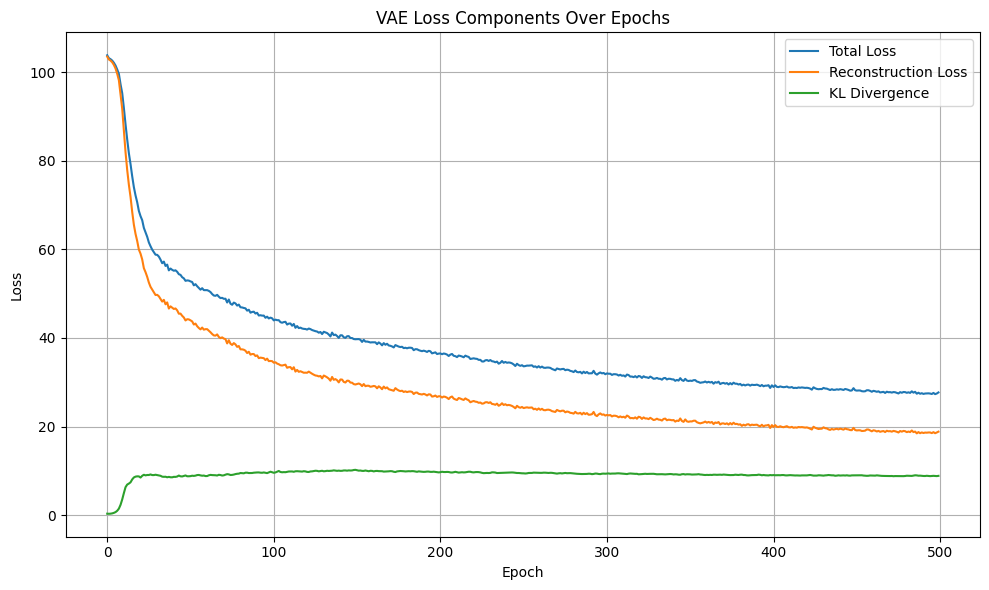

dim of latent mu: (331, 12)


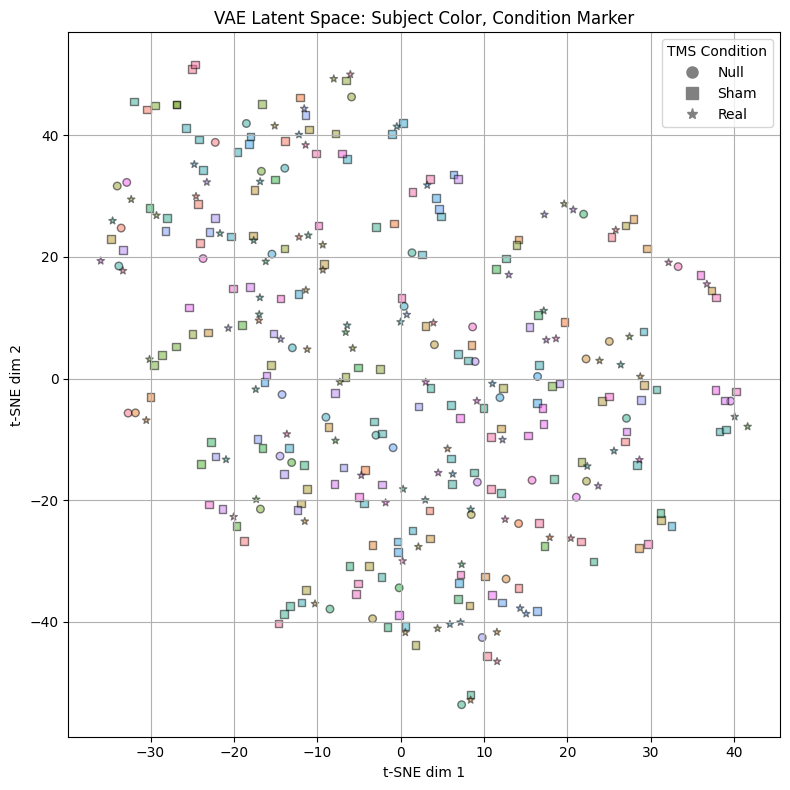

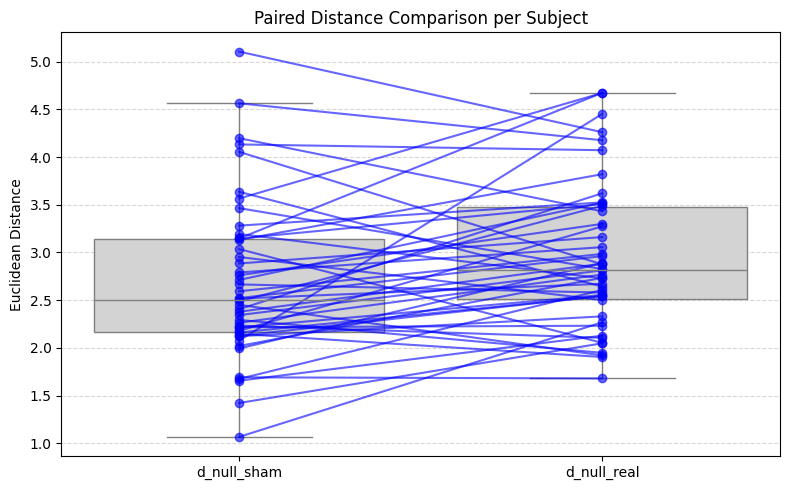

Paired t-test (ld=12): t = -2.466, p = 0.0175

=== latent_dim = 16 ===

===== Epoch 1 =====


Epoch 1/500: 100%|███████████████████████████████████████| 11/11 [00:00<00:00, 977.94it/s]


Epoch 1, Loss: 104.0512, Recon: 103.5645, KL: 0.4867

===== Epoch 2 =====


Epoch 2/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1150.84it/s]


Epoch 2, Loss: 103.6829, Recon: 103.2669, KL: 0.4160

===== Epoch 3 =====


Epoch 3/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1126.95it/s]


Epoch 3, Loss: 103.0626, Recon: 102.6424, KL: 0.4202

===== Epoch 4 =====


Epoch 4/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1167.00it/s]


Epoch 4, Loss: 102.2923, Recon: 101.8046, KL: 0.4877

===== Epoch 5 =====


Epoch 5/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1076.19it/s]


Epoch 5, Loss: 102.0163, Recon: 101.4035, KL: 0.6128

===== Epoch 6 =====


Epoch 6/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1026.78it/s]


Epoch 6, Loss: 101.0662, Recon: 100.2238, KL: 0.8424

===== Epoch 7 =====


Epoch 7/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1083.01it/s]


Epoch 7, Loss: 100.1505, Recon: 98.8921, KL: 1.2584

===== Epoch 8 =====


Epoch 8/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1219.92it/s]


Epoch 8, Loss: 98.0965, Recon: 96.1466, KL: 1.9500

===== Epoch 9 =====


Epoch 9/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1151.48it/s]


Epoch 9, Loss: 95.4819, Recon: 92.4978, KL: 2.9841

===== Epoch 10 =====


Epoch 10/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 958.26it/s]


Epoch 10, Loss: 92.6656, Recon: 88.3502, KL: 4.3153

===== Epoch 11 =====


Epoch 11/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1182.43it/s]


Epoch 11, Loss: 89.3864, Recon: 83.7803, KL: 5.6061

===== Epoch 12 =====


Epoch 12/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1250.00it/s]


Epoch 12, Loss: 86.6845, Recon: 80.4458, KL: 6.2387

===== Epoch 13 =====


Epoch 13/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1074.64it/s]


Epoch 13, Loss: 84.1570, Recon: 77.9507, KL: 6.2063

===== Epoch 14 =====


Epoch 14/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1168.86it/s]


Epoch 14, Loss: 82.0576, Recon: 76.2251, KL: 5.8325

===== Epoch 15 =====


Epoch 15/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1150.99it/s]


Epoch 15, Loss: 80.9031, Recon: 75.0664, KL: 5.8367

===== Epoch 16 =====


Epoch 16/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1096.37it/s]


Epoch 16, Loss: 78.8194, Recon: 72.5278, KL: 6.2915

===== Epoch 17 =====


Epoch 17/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1187.76it/s]


Epoch 17, Loss: 77.4116, Recon: 70.4980, KL: 6.9136

===== Epoch 18 =====


Epoch 18/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1139.56it/s]


Epoch 18, Loss: 75.4753, Recon: 67.9597, KL: 7.5155

===== Epoch 19 =====


Epoch 19/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1106.86it/s]


Epoch 19, Loss: 72.6428, Recon: 64.5275, KL: 8.1153

===== Epoch 20 =====


Epoch 20/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1152.19it/s]


Epoch 20, Loss: 70.3470, Recon: 61.7706, KL: 8.5765

===== Epoch 21 =====


Epoch 21/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 378.40it/s]


Epoch 21, Loss: 68.8476, Recon: 59.8911, KL: 8.9566

===== Epoch 22 =====


Epoch 22/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 799.01it/s]


Epoch 22, Loss: 67.1514, Recon: 57.7120, KL: 9.4395

===== Epoch 23 =====


Epoch 23/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1071.42it/s]


Epoch 23, Loss: 65.1918, Recon: 55.8063, KL: 9.3855

===== Epoch 24 =====


Epoch 24/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1172.58it/s]


Epoch 24, Loss: 64.2405, Recon: 55.1029, KL: 9.1376

===== Epoch 25 =====


Epoch 25/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1165.76it/s]


Epoch 25, Loss: 62.9396, Recon: 53.7524, KL: 9.1872

===== Epoch 26 =====


Epoch 26/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1136.47it/s]


Epoch 26, Loss: 61.6957, Recon: 52.4257, KL: 9.2700

===== Epoch 27 =====


Epoch 27/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1072.61it/s]


Epoch 27, Loss: 62.0872, Recon: 52.9477, KL: 9.1395

===== Epoch 28 =====


Epoch 28/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1148.01it/s]


Epoch 28, Loss: 60.5872, Recon: 51.4909, KL: 9.0963

===== Epoch 29 =====


Epoch 29/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 953.37it/s]


Epoch 29, Loss: 60.6259, Recon: 51.4749, KL: 9.1510

===== Epoch 30 =====


Epoch 30/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1138.01it/s]


Epoch 30, Loss: 59.5782, Recon: 50.3156, KL: 9.2626

===== Epoch 31 =====


Epoch 31/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1176.49it/s]


Epoch 31, Loss: 58.6194, Recon: 49.8301, KL: 8.7894

===== Epoch 32 =====


Epoch 32/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1072.44it/s]


Epoch 32, Loss: 58.7628, Recon: 49.9841, KL: 8.7787

===== Epoch 33 =====


Epoch 33/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1159.96it/s]


Epoch 33, Loss: 58.7353, Recon: 49.7811, KL: 8.9543

===== Epoch 34 =====


Epoch 34/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1193.85it/s]


Epoch 34, Loss: 58.5653, Recon: 49.8001, KL: 8.7652

===== Epoch 35 =====


Epoch 35/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1141.34it/s]


Epoch 35, Loss: 58.1024, Recon: 49.3389, KL: 8.7636

===== Epoch 36 =====


Epoch 36/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1245.78it/s]


Epoch 36, Loss: 57.7750, Recon: 49.0089, KL: 8.7661

===== Epoch 37 =====


Epoch 37/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1183.68it/s]


Epoch 37, Loss: 57.2141, Recon: 48.5338, KL: 8.6804

===== Epoch 38 =====


Epoch 38/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1238.29it/s]


Epoch 38, Loss: 56.6908, Recon: 48.1293, KL: 8.5615

===== Epoch 39 =====


Epoch 39/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1233.45it/s]


Epoch 39, Loss: 56.7325, Recon: 48.1185, KL: 8.6140

===== Epoch 40 =====


Epoch 40/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1140.71it/s]


Epoch 40, Loss: 56.7249, Recon: 48.1153, KL: 8.6096

===== Epoch 41 =====


Epoch 41/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1093.20it/s]


Epoch 41, Loss: 56.5577, Recon: 47.8344, KL: 8.7234

===== Epoch 42 =====


Epoch 42/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1142.13it/s]


Epoch 42, Loss: 56.0251, Recon: 47.2173, KL: 8.8077

===== Epoch 43 =====


Epoch 43/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1173.80it/s]


Epoch 43, Loss: 55.4900, Recon: 46.8197, KL: 8.6703

===== Epoch 44 =====


Epoch 44/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1133.21it/s]


Epoch 44, Loss: 56.1663, Recon: 47.5100, KL: 8.6563

===== Epoch 45 =====


Epoch 45/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1129.02it/s]


Epoch 45, Loss: 55.1972, Recon: 46.2665, KL: 8.9307

===== Epoch 46 =====


Epoch 46/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1146.30it/s]


Epoch 46, Loss: 54.7475, Recon: 45.8372, KL: 8.9104

===== Epoch 47 =====


Epoch 47/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1093.20it/s]


Epoch 47, Loss: 54.8433, Recon: 45.8604, KL: 8.9829

===== Epoch 48 =====


Epoch 48/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 822.31it/s]


Epoch 48, Loss: 53.9234, Recon: 44.9331, KL: 8.9903

===== Epoch 49 =====


Epoch 49/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 989.50it/s]


Epoch 49, Loss: 54.0310, Recon: 45.1313, KL: 8.8996

===== Epoch 50 =====


Epoch 50/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1131.48it/s]


Epoch 50, Loss: 53.5898, Recon: 44.5685, KL: 9.0214

===== Epoch 51 =====


Epoch 51/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1103.32it/s]


Epoch 51, Loss: 53.2151, Recon: 44.1275, KL: 9.0876

===== Epoch 52 =====


Epoch 52/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1141.56it/s]


Epoch 52, Loss: 53.0510, Recon: 43.8846, KL: 9.1663

===== Epoch 53 =====


Epoch 53/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1071.42it/s]


Epoch 53, Loss: 53.2198, Recon: 44.0650, KL: 9.1549

===== Epoch 54 =====


Epoch 54/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1154.73it/s]


Epoch 54, Loss: 52.7348, Recon: 43.3942, KL: 9.3406

===== Epoch 55 =====


Epoch 55/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1183.68it/s]


Epoch 55, Loss: 52.2643, Recon: 42.7966, KL: 9.4677

===== Epoch 56 =====


Epoch 56/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1252.44it/s]


Epoch 56, Loss: 52.2753, Recon: 42.8314, KL: 9.4440

===== Epoch 57 =====


Epoch 57/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1256.29it/s]


Epoch 57, Loss: 51.5386, Recon: 42.1141, KL: 9.4244

===== Epoch 58 =====


Epoch 58/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1189.08it/s]


Epoch 58, Loss: 51.7458, Recon: 42.1324, KL: 9.6134

===== Epoch 59 =====


Epoch 59/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1181.04it/s]


Epoch 59, Loss: 51.6991, Recon: 42.0142, KL: 9.6849

===== Epoch 60 =====


Epoch 60/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1007.23it/s]


Epoch 60, Loss: 50.6025, Recon: 40.8008, KL: 9.8017

===== Epoch 61 =====


Epoch 61/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1130.51it/s]


Epoch 61, Loss: 50.9697, Recon: 41.3687, KL: 9.6010

===== Epoch 62 =====


Epoch 62/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1173.20it/s]


Epoch 62, Loss: 50.6354, Recon: 41.0849, KL: 9.5505

===== Epoch 63 =====


Epoch 63/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1151.25it/s]


Epoch 63, Loss: 50.7868, Recon: 41.2031, KL: 9.5837

===== Epoch 64 =====


Epoch 64/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1212.80it/s]


Epoch 64, Loss: 50.0045, Recon: 40.2351, KL: 9.7694

===== Epoch 65 =====


Epoch 65/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1166.50it/s]


Epoch 65, Loss: 49.6722, Recon: 39.9775, KL: 9.6947

===== Epoch 66 =====


Epoch 66/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1141.90it/s]


Epoch 66, Loss: 50.0884, Recon: 40.3235, KL: 9.7649

===== Epoch 67 =====


Epoch 67/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1093.85it/s]


Epoch 67, Loss: 49.8964, Recon: 40.0193, KL: 9.8770

===== Epoch 68 =====


Epoch 68/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1136.00it/s]


Epoch 68, Loss: 49.7328, Recon: 39.7662, KL: 9.9667

===== Epoch 69 =====


Epoch 69/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1138.94it/s]


Epoch 69, Loss: 49.5089, Recon: 39.4386, KL: 10.0704

===== Epoch 70 =====


Epoch 70/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1146.44it/s]


Epoch 70, Loss: 49.0199, Recon: 39.0320, KL: 9.9879

===== Epoch 71 =====


Epoch 71/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1067.13it/s]


Epoch 71, Loss: 49.3188, Recon: 39.3877, KL: 9.9311

===== Epoch 72 =====


Epoch 72/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1169.34it/s]


Epoch 72, Loss: 48.4886, Recon: 38.4558, KL: 10.0328

===== Epoch 73 =====


Epoch 73/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1169.37it/s]


Epoch 73, Loss: 48.8833, Recon: 38.6753, KL: 10.2080

===== Epoch 74 =====


Epoch 74/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1164.03it/s]


Epoch 74, Loss: 48.6721, Recon: 38.5590, KL: 10.1131

===== Epoch 75 =====


Epoch 75/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1154.47it/s]


Epoch 75, Loss: 48.4197, Recon: 38.5137, KL: 9.9060

===== Epoch 76 =====


Epoch 76/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1157.28it/s]


Epoch 76, Loss: 48.5528, Recon: 38.6357, KL: 9.9171

===== Epoch 77 =====


Epoch 77/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1153.90it/s]


Epoch 77, Loss: 48.1130, Recon: 38.0961, KL: 10.0169

===== Epoch 78 =====


Epoch 78/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1143.68it/s]


Epoch 78, Loss: 48.4688, Recon: 38.2812, KL: 10.1877

===== Epoch 79 =====


Epoch 79/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1148.09it/s]


Epoch 79, Loss: 48.1434, Recon: 37.9259, KL: 10.2175

===== Epoch 80 =====


Epoch 80/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1167.74it/s]


Epoch 80, Loss: 47.6985, Recon: 37.7125, KL: 9.9860

===== Epoch 81 =====


Epoch 81/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1110.33it/s]


Epoch 81, Loss: 47.9385, Recon: 38.0015, KL: 9.9370

===== Epoch 82 =====


Epoch 82/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1107.21it/s]


Epoch 82, Loss: 47.9338, Recon: 37.8629, KL: 10.0710

===== Epoch 83 =====


Epoch 83/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1130.62it/s]


Epoch 83, Loss: 47.3441, Recon: 37.2622, KL: 10.0819

===== Epoch 84 =====


Epoch 84/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1173.86it/s]


Epoch 84, Loss: 46.9370, Recon: 36.9591, KL: 9.9779

===== Epoch 85 =====


Epoch 85/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1119.73it/s]


Epoch 85, Loss: 47.5754, Recon: 37.6600, KL: 9.9154

===== Epoch 86 =====


Epoch 86/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1067.23it/s]


Epoch 86, Loss: 47.0500, Recon: 37.0928, KL: 9.9572

===== Epoch 87 =====


Epoch 87/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1109.31it/s]


Epoch 87, Loss: 46.9299, Recon: 36.9825, KL: 9.9475

===== Epoch 88 =====


Epoch 88/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1161.45it/s]


Epoch 88, Loss: 47.7045, Recon: 37.8155, KL: 9.8890

===== Epoch 89 =====


Epoch 89/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1155.31it/s]


Epoch 89, Loss: 47.4493, Recon: 37.3118, KL: 10.1375

===== Epoch 90 =====


Epoch 90/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1170.58it/s]


Epoch 90, Loss: 47.0593, Recon: 37.0075, KL: 10.0518

===== Epoch 91 =====


Epoch 91/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1116.53it/s]


Epoch 91, Loss: 46.9592, Recon: 36.8976, KL: 10.0616

===== Epoch 92 =====


Epoch 92/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1049.72it/s]


Epoch 92, Loss: 46.3085, Recon: 36.2162, KL: 10.0923

===== Epoch 93 =====


Epoch 93/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1170.58it/s]


Epoch 93, Loss: 46.6410, Recon: 36.7725, KL: 9.8685

===== Epoch 94 =====


Epoch 94/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1139.90it/s]


Epoch 94, Loss: 46.6044, Recon: 36.7015, KL: 9.9028

===== Epoch 95 =====


Epoch 95/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1128.33it/s]


Epoch 95, Loss: 45.9720, Recon: 36.0237, KL: 9.9483

===== Epoch 96 =====


Epoch 96/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1082.88it/s]


Epoch 96, Loss: 46.3738, Recon: 36.4957, KL: 9.8782

===== Epoch 97 =====


Epoch 97/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1121.31it/s]


Epoch 97, Loss: 46.4160, Recon: 36.6276, KL: 9.7884

===== Epoch 98 =====


Epoch 98/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1136.47it/s]


Epoch 98, Loss: 46.5520, Recon: 36.7280, KL: 9.8240

===== Epoch 99 =====


Epoch 99/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1103.87it/s]


Epoch 99, Loss: 45.8512, Recon: 35.8987, KL: 9.9525

===== Epoch 100 =====


Epoch 100/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1112.47it/s]


Epoch 100, Loss: 46.9297, Recon: 36.8159, KL: 10.1138

===== Epoch 101 =====


Epoch 101/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1107.42it/s]


Epoch 101, Loss: 46.3926, Recon: 36.0823, KL: 10.3103

===== Epoch 102 =====


Epoch 102/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.81it/s]


Epoch 102, Loss: 45.9020, Recon: 35.7538, KL: 10.1481

===== Epoch 103 =====


Epoch 103/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1176.34it/s]


Epoch 103, Loss: 46.0975, Recon: 36.0759, KL: 10.0215

===== Epoch 104 =====


Epoch 104/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1143.54it/s]


Epoch 104, Loss: 45.6500, Recon: 35.4652, KL: 10.1848

===== Epoch 105 =====


Epoch 105/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.70it/s]


Epoch 105, Loss: 45.6811, Recon: 35.4222, KL: 10.2589

===== Epoch 106 =====


Epoch 106/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1143.91it/s]


Epoch 106, Loss: 45.5090, Recon: 35.3091, KL: 10.1999

===== Epoch 107 =====


Epoch 107/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1063.19it/s]


Epoch 107, Loss: 45.1966, Recon: 35.1870, KL: 10.0096

===== Epoch 108 =====


Epoch 108/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 648.17it/s]


Epoch 108, Loss: 44.9297, Recon: 35.0249, KL: 9.9048

===== Epoch 109 =====


Epoch 109/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1090.49it/s]


Epoch 109, Loss: 44.9608, Recon: 35.1301, KL: 9.8306

===== Epoch 110 =====


Epoch 110/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.42it/s]


Epoch 110, Loss: 45.0911, Recon: 35.1384, KL: 9.9527

===== Epoch 111 =====


Epoch 111/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1165.00it/s]


Epoch 111, Loss: 45.0267, Recon: 35.0076, KL: 10.0191

===== Epoch 112 =====


Epoch 112/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1130.40it/s]


Epoch 112, Loss: 44.7666, Recon: 34.7290, KL: 10.0377

===== Epoch 113 =====


Epoch 113/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1087.09it/s]


Epoch 113, Loss: 44.7503, Recon: 34.6940, KL: 10.0563

===== Epoch 114 =====


Epoch 114/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.52it/s]


Epoch 114, Loss: 44.7899, Recon: 34.7085, KL: 10.0814

===== Epoch 115 =====


Epoch 115/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 841.62it/s]


Epoch 115, Loss: 44.1275, Recon: 34.0681, KL: 10.0594

===== Epoch 116 =====


Epoch 116/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 468.34it/s]


Epoch 116, Loss: 44.4007, Recon: 34.4902, KL: 9.9105

===== Epoch 117 =====


Epoch 117/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 861.80it/s]


Epoch 117, Loss: 44.0900, Recon: 34.1218, KL: 9.9682

===== Epoch 118 =====


Epoch 118/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1110.33it/s]


Epoch 118, Loss: 43.7462, Recon: 33.8849, KL: 9.8613

===== Epoch 119 =====


Epoch 119/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1173.11it/s]


Epoch 119, Loss: 43.9397, Recon: 34.1184, KL: 9.8213

===== Epoch 120 =====


Epoch 120/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1083.42it/s]


Epoch 120, Loss: 44.4010, Recon: 34.5471, KL: 9.8539

===== Epoch 121 =====


Epoch 121/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1006.75it/s]


Epoch 121, Loss: 44.0626, Recon: 34.1153, KL: 9.9473

===== Epoch 122 =====


Epoch 122/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1128.80it/s]


Epoch 122, Loss: 43.8430, Recon: 33.8454, KL: 9.9976

===== Epoch 123 =====


Epoch 123/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1170.08it/s]


Epoch 123, Loss: 44.1297, Recon: 34.0713, KL: 10.0584

===== Epoch 124 =====


Epoch 124/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.11it/s]


Epoch 124, Loss: 44.1595, Recon: 34.0138, KL: 10.1457

===== Epoch 125 =====


Epoch 125/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1149.93it/s]


Epoch 125, Loss: 43.7849, Recon: 33.6219, KL: 10.1630

===== Epoch 126 =====


Epoch 126/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1164.41it/s]


Epoch 126, Loss: 43.7528, Recon: 33.6204, KL: 10.1324

===== Epoch 127 =====


Epoch 127/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1162.06it/s]


Epoch 127, Loss: 43.4920, Recon: 33.4402, KL: 10.0519

===== Epoch 128 =====


Epoch 128/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1103.74it/s]


Epoch 128, Loss: 42.7804, Recon: 32.6602, KL: 10.1202

===== Epoch 129 =====


Epoch 129/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.27it/s]


Epoch 129, Loss: 43.1089, Recon: 33.0076, KL: 10.1013

===== Epoch 130 =====


Epoch 130/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.21it/s]


Epoch 130, Loss: 42.8467, Recon: 32.8045, KL: 10.0422

===== Epoch 131 =====


Epoch 131/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1177.60it/s]


Epoch 131, Loss: 43.0326, Recon: 33.0543, KL: 9.9784

===== Epoch 132 =====


Epoch 132/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1105.19it/s]


Epoch 132, Loss: 42.6682, Recon: 32.6793, KL: 9.9889

===== Epoch 133 =====


Epoch 133/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1146.33it/s]


Epoch 133, Loss: 42.5925, Recon: 32.5393, KL: 10.0532

===== Epoch 134 =====


Epoch 134/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1125.80it/s]


Epoch 134, Loss: 42.4553, Recon: 32.4126, KL: 10.0427

===== Epoch 135 =====


Epoch 135/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1163.03it/s]


Epoch 135, Loss: 42.9335, Recon: 32.9453, KL: 9.9882

===== Epoch 136 =====


Epoch 136/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.54it/s]


Epoch 136, Loss: 42.6536, Recon: 32.5756, KL: 10.0780

===== Epoch 137 =====


Epoch 137/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1118.92it/s]


Epoch 137, Loss: 42.4822, Recon: 32.2174, KL: 10.2647

===== Epoch 138 =====


Epoch 138/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1180.29it/s]


Epoch 138, Loss: 42.6221, Recon: 32.3002, KL: 10.3219

===== Epoch 139 =====


Epoch 139/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1168.36it/s]


Epoch 139, Loss: 42.2965, Recon: 31.9738, KL: 10.3227

===== Epoch 140 =====


Epoch 140/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1165.26it/s]


Epoch 140, Loss: 42.3135, Recon: 32.0946, KL: 10.2189

===== Epoch 141 =====


Epoch 141/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1069.31it/s]


Epoch 141, Loss: 42.0892, Recon: 31.8797, KL: 10.2094

===== Epoch 142 =====


Epoch 142/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1157.17it/s]


Epoch 142, Loss: 42.0963, Recon: 31.7951, KL: 10.3012

===== Epoch 143 =====


Epoch 143/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.36it/s]


Epoch 143, Loss: 42.0682, Recon: 31.6692, KL: 10.3990

===== Epoch 144 =====


Epoch 144/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1138.13it/s]


Epoch 144, Loss: 41.5854, Recon: 31.2138, KL: 10.3716

===== Epoch 145 =====


Epoch 145/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1157.54it/s]


Epoch 145, Loss: 41.4697, Recon: 31.0942, KL: 10.3755

===== Epoch 146 =====


Epoch 146/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.34it/s]


Epoch 146, Loss: 41.4177, Recon: 31.2647, KL: 10.1529

===== Epoch 147 =====


Epoch 147/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1125.00it/s]


Epoch 147, Loss: 41.8098, Recon: 31.6410, KL: 10.1688

===== Epoch 148 =====


Epoch 148/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1197.22it/s]


Epoch 148, Loss: 41.2372, Recon: 30.9967, KL: 10.2405

===== Epoch 149 =====


Epoch 149/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1194.09it/s]


Epoch 149, Loss: 40.9641, Recon: 30.7221, KL: 10.2421

===== Epoch 150 =====


Epoch 150/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.04it/s]


Epoch 150, Loss: 41.2022, Recon: 31.0190, KL: 10.1832

===== Epoch 151 =====


Epoch 151/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.04it/s]


Epoch 151, Loss: 41.4808, Recon: 31.3449, KL: 10.1359

===== Epoch 152 =====


Epoch 152/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.79it/s]


Epoch 152, Loss: 41.2449, Recon: 30.9465, KL: 10.2985

===== Epoch 153 =====


Epoch 153/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.27it/s]


Epoch 153, Loss: 41.2957, Recon: 30.9913, KL: 10.3044

===== Epoch 154 =====


Epoch 154/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1133.32it/s]


Epoch 154, Loss: 41.3151, Recon: 30.9618, KL: 10.3533

===== Epoch 155 =====


Epoch 155/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1177.84it/s]


Epoch 155, Loss: 40.7221, Recon: 30.1842, KL: 10.5379

===== Epoch 156 =====


Epoch 156/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1157.28it/s]


Epoch 156, Loss: 41.0478, Recon: 30.5203, KL: 10.5275

===== Epoch 157 =====


Epoch 157/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1124.75it/s]


Epoch 157, Loss: 40.6238, Recon: 30.1230, KL: 10.5008

===== Epoch 158 =====


Epoch 158/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1166.47it/s]


Epoch 158, Loss: 40.6782, Recon: 30.1978, KL: 10.4805

===== Epoch 159 =====


Epoch 159/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1097.91it/s]


Epoch 159, Loss: 40.5953, Recon: 30.1870, KL: 10.4084

===== Epoch 160 =====


Epoch 160/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1170.58it/s]


Epoch 160, Loss: 40.2919, Recon: 29.8912, KL: 10.4007

===== Epoch 161 =====


Epoch 161/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1054.54it/s]


Epoch 161, Loss: 40.5019, Recon: 30.0854, KL: 10.4165

===== Epoch 162 =====


Epoch 162/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1125.80it/s]


Epoch 162, Loss: 40.8516, Recon: 30.4142, KL: 10.4373

===== Epoch 163 =====


Epoch 163/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 541.61it/s]


Epoch 163, Loss: 40.2874, Recon: 29.7197, KL: 10.5677

===== Epoch 164 =====


Epoch 164/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 322.29it/s]


Epoch 164, Loss: 39.6945, Recon: 29.2040, KL: 10.4905

===== Epoch 165 =====


Epoch 165/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 466.97it/s]


Epoch 165, Loss: 39.8394, Recon: 29.4241, KL: 10.4153

===== Epoch 166 =====


Epoch 166/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.73it/s]


Epoch 166, Loss: 39.9904, Recon: 29.5663, KL: 10.4241

===== Epoch 167 =====


Epoch 167/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1150.50it/s]


Epoch 167, Loss: 40.3687, Recon: 30.0382, KL: 10.3305

===== Epoch 168 =====


Epoch 168/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1163.03it/s]


Epoch 168, Loss: 40.0819, Recon: 29.5721, KL: 10.5098

===== Epoch 169 =====


Epoch 169/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1202.75it/s]


Epoch 169, Loss: 39.4496, Recon: 28.9113, KL: 10.5383

===== Epoch 170 =====


Epoch 170/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1074.76it/s]


Epoch 170, Loss: 39.5622, Recon: 29.2336, KL: 10.3286

===== Epoch 171 =====


Epoch 171/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1100.08it/s]


Epoch 171, Loss: 39.5412, Recon: 29.1727, KL: 10.3685

===== Epoch 172 =====


Epoch 172/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1105.77it/s]


Epoch 172, Loss: 39.6443, Recon: 29.3440, KL: 10.3003

===== Epoch 173 =====


Epoch 173/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1091.05it/s]


Epoch 173, Loss: 39.8268, Recon: 29.5296, KL: 10.2972

===== Epoch 174 =====


Epoch 174/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1084.69it/s]


Epoch 174, Loss: 39.6602, Recon: 29.2811, KL: 10.3791

===== Epoch 175 =====


Epoch 175/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.80it/s]


Epoch 175, Loss: 39.1227, Recon: 28.7182, KL: 10.4045

===== Epoch 176 =====


Epoch 176/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 776.57it/s]


Epoch 176, Loss: 39.1383, Recon: 28.7757, KL: 10.3626

===== Epoch 177 =====


Epoch 177/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.40it/s]


Epoch 177, Loss: 39.2576, Recon: 28.8776, KL: 10.3800

===== Epoch 178 =====


Epoch 178/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1125.19it/s]


Epoch 178, Loss: 39.1652, Recon: 28.7833, KL: 10.3819

===== Epoch 179 =====


Epoch 179/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1190.36it/s]


Epoch 179, Loss: 38.9589, Recon: 28.6129, KL: 10.3460

===== Epoch 180 =====


Epoch 180/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1105.43it/s]


Epoch 180, Loss: 38.9215, Recon: 28.5821, KL: 10.3394

===== Epoch 181 =====


Epoch 181/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1186.75it/s]


Epoch 181, Loss: 38.9678, Recon: 28.7114, KL: 10.2563

===== Epoch 182 =====


Epoch 182/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 572.09it/s]


Epoch 182, Loss: 38.6975, Recon: 28.4029, KL: 10.2946

===== Epoch 183 =====


Epoch 183/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1011.32it/s]


Epoch 183, Loss: 38.7557, Recon: 28.4218, KL: 10.3340

===== Epoch 184 =====


Epoch 184/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1077.37it/s]


Epoch 184, Loss: 38.6992, Recon: 28.3707, KL: 10.3285

===== Epoch 185 =====


Epoch 185/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.69it/s]


Epoch 185, Loss: 38.9495, Recon: 28.6054, KL: 10.3442

===== Epoch 186 =====


Epoch 186/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1003.64it/s]


Epoch 186, Loss: 38.7337, Recon: 28.3243, KL: 10.4095

===== Epoch 187 =====


Epoch 187/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1103.39it/s]


Epoch 187, Loss: 38.3588, Recon: 27.8892, KL: 10.4695

===== Epoch 188 =====


Epoch 188/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1009.17it/s]


Epoch 188, Loss: 38.6899, Recon: 28.2712, KL: 10.4187

===== Epoch 189 =====


Epoch 189/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1184.95it/s]


Epoch 189, Loss: 38.6374, Recon: 28.3101, KL: 10.3273

===== Epoch 190 =====


Epoch 190/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1134.38it/s]


Epoch 190, Loss: 38.2099, Recon: 27.8240, KL: 10.3858

===== Epoch 191 =====


Epoch 191/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.00it/s]


Epoch 191, Loss: 38.2449, Recon: 27.8400, KL: 10.4048

===== Epoch 192 =====


Epoch 192/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1007.06it/s]


Epoch 192, Loss: 38.0590, Recon: 27.6381, KL: 10.4209

===== Epoch 193 =====


Epoch 193/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1186.35it/s]


Epoch 193, Loss: 37.7533, Recon: 27.4663, KL: 10.2871

===== Epoch 194 =====


Epoch 194/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1181.40it/s]


Epoch 194, Loss: 38.2104, Recon: 27.9787, KL: 10.2317

===== Epoch 195 =====


Epoch 195/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1150.99it/s]


Epoch 195, Loss: 38.2062, Recon: 27.9248, KL: 10.2814

===== Epoch 196 =====


Epoch 196/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1186.84it/s]


Epoch 196, Loss: 37.8451, Recon: 27.5785, KL: 10.2666

===== Epoch 197 =====


Epoch 197/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1006.38it/s]


Epoch 197, Loss: 37.8781, Recon: 27.6681, KL: 10.2100

===== Epoch 198 =====


Epoch 198/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1100.66it/s]


Epoch 198, Loss: 37.8754, Recon: 27.6237, KL: 10.2517

===== Epoch 199 =====


Epoch 199/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1097.70it/s]


Epoch 199, Loss: 37.7705, Recon: 27.4725, KL: 10.2980

===== Epoch 200 =====


Epoch 200/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.55it/s]


Epoch 200, Loss: 37.7997, Recon: 27.5090, KL: 10.2907

===== Epoch 201 =====


Epoch 201/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.19it/s]


Epoch 201, Loss: 37.7564, Recon: 27.4015, KL: 10.3548

===== Epoch 202 =====


Epoch 202/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.23it/s]


Epoch 202, Loss: 37.3326, Recon: 27.0154, KL: 10.3172

===== Epoch 203 =====


Epoch 203/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.46it/s]


Epoch 203, Loss: 37.6880, Recon: 27.4294, KL: 10.2586

===== Epoch 204 =====


Epoch 204/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1186.60it/s]


Epoch 204, Loss: 37.6475, Recon: 27.4257, KL: 10.2219

===== Epoch 205 =====


Epoch 205/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.48it/s]


Epoch 205, Loss: 37.5068, Recon: 27.2761, KL: 10.2306

===== Epoch 206 =====


Epoch 206/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1094.39it/s]


Epoch 206, Loss: 37.3606, Recon: 27.0586, KL: 10.3020

===== Epoch 207 =====


Epoch 207/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 993.23it/s]


Epoch 207, Loss: 37.3329, Recon: 27.0411, KL: 10.2918

===== Epoch 208 =====


Epoch 208/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1099.90it/s]


Epoch 208, Loss: 37.2681, Recon: 27.0287, KL: 10.2394

===== Epoch 209 =====


Epoch 209/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 383.52it/s]


Epoch 209, Loss: 36.8565, Recon: 26.5970, KL: 10.2596

===== Epoch 210 =====


Epoch 210/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 765.75it/s]


Epoch 210, Loss: 37.2493, Recon: 26.9386, KL: 10.3107

===== Epoch 211 =====


Epoch 211/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1061.65it/s]


Epoch 211, Loss: 37.3271, Recon: 26.9757, KL: 10.3514

===== Epoch 212 =====


Epoch 212/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1135.19it/s]


Epoch 212, Loss: 37.0247, Recon: 26.6494, KL: 10.3754

===== Epoch 213 =====


Epoch 213/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1200.62it/s]


Epoch 213, Loss: 36.9855, Recon: 26.7457, KL: 10.2398

===== Epoch 214 =====


Epoch 214/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1176.19it/s]


Epoch 214, Loss: 37.0501, Recon: 26.8445, KL: 10.2056

===== Epoch 215 =====


Epoch 215/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.11it/s]


Epoch 215, Loss: 36.6833, Recon: 26.3783, KL: 10.3050

===== Epoch 216 =====


Epoch 216/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.59it/s]


Epoch 216, Loss: 36.8117, Recon: 26.5572, KL: 10.2545

===== Epoch 217 =====


Epoch 217/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1088.68it/s]


Epoch 217, Loss: 36.6072, Recon: 26.3583, KL: 10.2489

===== Epoch 218 =====


Epoch 218/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1164.56it/s]


Epoch 218, Loss: 36.3086, Recon: 26.0662, KL: 10.2425

===== Epoch 219 =====


Epoch 219/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1236.93it/s]


Epoch 219, Loss: 36.8805, Recon: 26.7379, KL: 10.1426

===== Epoch 220 =====


Epoch 220/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1174.34it/s]


Epoch 220, Loss: 36.6115, Recon: 26.4493, KL: 10.1622

===== Epoch 221 =====


Epoch 221/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1164.53it/s]


Epoch 221, Loss: 36.5222, Recon: 26.3397, KL: 10.1825

===== Epoch 222 =====


Epoch 222/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1264.94it/s]


Epoch 222, Loss: 36.8289, Recon: 26.6425, KL: 10.1864

===== Epoch 223 =====


Epoch 223/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1150.99it/s]


Epoch 223, Loss: 36.3301, Recon: 26.1029, KL: 10.2272

===== Epoch 224 =====


Epoch 224/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1145.61it/s]


Epoch 224, Loss: 36.5115, Recon: 26.2194, KL: 10.2921

===== Epoch 225 =====


Epoch 225/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.43it/s]


Epoch 225, Loss: 36.5025, Recon: 26.1263, KL: 10.3761

===== Epoch 226 =====


Epoch 226/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1108.32it/s]


Epoch 226, Loss: 36.0974, Recon: 25.8299, KL: 10.2675

===== Epoch 227 =====


Epoch 227/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1178.75it/s]


Epoch 227, Loss: 36.2884, Recon: 26.0997, KL: 10.1887

===== Epoch 228 =====


Epoch 228/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1030.36it/s]


Epoch 228, Loss: 36.1848, Recon: 26.0094, KL: 10.1754

===== Epoch 229 =====


Epoch 229/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1151.07it/s]


Epoch 229, Loss: 36.3167, Recon: 26.1727, KL: 10.1440

===== Epoch 230 =====


Epoch 230/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1072.96it/s]


Epoch 230, Loss: 35.9056, Recon: 25.7089, KL: 10.1967

===== Epoch 231 =====


Epoch 231/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1107.10it/s]


Epoch 231, Loss: 35.9143, Recon: 25.7766, KL: 10.1377

===== Epoch 232 =====


Epoch 232/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1188.92it/s]


Epoch 232, Loss: 36.1542, Recon: 25.9942, KL: 10.1600

===== Epoch 233 =====


Epoch 233/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1013.07it/s]


Epoch 233, Loss: 36.2386, Recon: 26.0513, KL: 10.1873

===== Epoch 234 =====


Epoch 234/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1066.51it/s]


Epoch 234, Loss: 35.6024, Recon: 25.4328, KL: 10.1696

===== Epoch 235 =====


Epoch 235/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1181.16it/s]


Epoch 235, Loss: 35.6899, Recon: 25.5463, KL: 10.1436

===== Epoch 236 =====


Epoch 236/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.75it/s]


Epoch 236, Loss: 35.6368, Recon: 25.5203, KL: 10.1165

===== Epoch 237 =====


Epoch 237/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 754.21it/s]


Epoch 237, Loss: 35.5807, Recon: 25.4616, KL: 10.1191

===== Epoch 238 =====


Epoch 238/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1182.43it/s]


Epoch 238, Loss: 35.4566, Recon: 25.3959, KL: 10.0606

===== Epoch 239 =====


Epoch 239/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1138.94it/s]


Epoch 239, Loss: 35.4588, Recon: 25.4841, KL: 9.9747

===== Epoch 240 =====


Epoch 240/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1179.62it/s]


Epoch 240, Loss: 35.7603, Recon: 25.8219, KL: 9.9383

===== Epoch 241 =====


Epoch 241/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1259.31it/s]


Epoch 241, Loss: 35.3909, Recon: 25.4295, KL: 9.9614

===== Epoch 242 =====


Epoch 242/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1185.08it/s]


Epoch 242, Loss: 35.4403, Recon: 25.4375, KL: 10.0029

===== Epoch 243 =====


Epoch 243/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1197.63it/s]


Epoch 243, Loss: 35.6565, Recon: 25.6025, KL: 10.0540

===== Epoch 244 =====


Epoch 244/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1134.49it/s]


Epoch 244, Loss: 35.7802, Recon: 25.6799, KL: 10.1003

===== Epoch 245 =====


Epoch 245/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1276.80it/s]


Epoch 245, Loss: 35.3933, Recon: 25.3137, KL: 10.0796

===== Epoch 246 =====


Epoch 246/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.80it/s]


Epoch 246, Loss: 35.9010, Recon: 25.8409, KL: 10.0600

===== Epoch 247 =====


Epoch 247/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.97it/s]


Epoch 247, Loss: 35.3639, Recon: 25.1448, KL: 10.2191

===== Epoch 248 =====


Epoch 248/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1041.36it/s]


Epoch 248, Loss: 35.1188, Recon: 24.8974, KL: 10.2214

===== Epoch 249 =====


Epoch 249/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 850.60it/s]


Epoch 249, Loss: 35.2175, Recon: 25.1141, KL: 10.1034

===== Epoch 250 =====


Epoch 250/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 874.69it/s]


Epoch 250, Loss: 35.2825, Recon: 25.2333, KL: 10.0492

===== Epoch 251 =====


Epoch 251/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1019.09it/s]


Epoch 251, Loss: 35.2095, Recon: 25.1192, KL: 10.0903

===== Epoch 252 =====


Epoch 252/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1006.22it/s]


Epoch 252, Loss: 34.7581, Recon: 24.6413, KL: 10.1168

===== Epoch 253 =====


Epoch 253/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 909.68it/s]


Epoch 253, Loss: 34.9702, Recon: 24.9666, KL: 10.0037

===== Epoch 254 =====


Epoch 254/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 885.54it/s]


Epoch 254, Loss: 35.2430, Recon: 25.2616, KL: 9.9814

===== Epoch 255 =====


Epoch 255/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1000.46it/s]


Epoch 255, Loss: 35.0475, Recon: 24.9916, KL: 10.0559

===== Epoch 256 =====


Epoch 256/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 935.92it/s]


Epoch 256, Loss: 35.1091, Recon: 25.0226, KL: 10.0865

===== Epoch 257 =====


Epoch 257/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 930.39it/s]


Epoch 257, Loss: 35.2405, Recon: 25.1723, KL: 10.0683

===== Epoch 258 =====


Epoch 258/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 930.32it/s]


Epoch 258, Loss: 34.5990, Recon: 24.4622, KL: 10.1368

===== Epoch 259 =====


Epoch 259/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 895.18it/s]


Epoch 259, Loss: 34.7905, Recon: 24.6500, KL: 10.1405

===== Epoch 260 =====


Epoch 260/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 837.66it/s]


Epoch 260, Loss: 34.7808, Recon: 24.7464, KL: 10.0344

===== Epoch 261 =====


Epoch 261/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 892.28it/s]


Epoch 261, Loss: 35.2598, Recon: 25.1857, KL: 10.0741

===== Epoch 262 =====


Epoch 262/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 884.94it/s]


Epoch 262, Loss: 34.6964, Recon: 24.5486, KL: 10.1478

===== Epoch 263 =====


Epoch 263/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 865.79it/s]


Epoch 263, Loss: 34.5811, Recon: 24.4611, KL: 10.1200

===== Epoch 264 =====


Epoch 264/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 980.29it/s]


Epoch 264, Loss: 34.5800, Recon: 24.5925, KL: 9.9875

===== Epoch 265 =====


Epoch 265/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 928.19it/s]


Epoch 265, Loss: 34.7730, Recon: 24.7046, KL: 10.0684

===== Epoch 266 =====


Epoch 266/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 930.71it/s]


Epoch 266, Loss: 34.1979, Recon: 24.1009, KL: 10.0970

===== Epoch 267 =====


Epoch 267/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 916.06it/s]


Epoch 267, Loss: 34.0903, Recon: 24.1304, KL: 9.9599

===== Epoch 268 =====


Epoch 268/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1094.75it/s]


Epoch 268, Loss: 34.2570, Recon: 24.4575, KL: 9.7995

===== Epoch 269 =====


Epoch 269/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 946.23it/s]


Epoch 269, Loss: 34.5734, Recon: 24.7146, KL: 9.8587

===== Epoch 270 =====


Epoch 270/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 912.02it/s]


Epoch 270, Loss: 34.3320, Recon: 24.4522, KL: 9.8797

===== Epoch 271 =====


Epoch 271/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 935.87it/s]


Epoch 271, Loss: 34.6775, Recon: 24.7675, KL: 9.9100

===== Epoch 272 =====


Epoch 272/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 948.76it/s]


Epoch 272, Loss: 34.1603, Recon: 24.2242, KL: 9.9361

===== Epoch 273 =====


Epoch 273/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 958.26it/s]


Epoch 273, Loss: 34.0113, Recon: 24.0695, KL: 9.9417

===== Epoch 274 =====


Epoch 274/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 915.06it/s]


Epoch 274, Loss: 34.2733, Recon: 24.3059, KL: 9.9674

===== Epoch 275 =====


Epoch 275/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 951.82it/s]


Epoch 275, Loss: 33.9030, Recon: 23.9128, KL: 9.9902

===== Epoch 276 =====


Epoch 276/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 792.22it/s]


Epoch 276, Loss: 34.0307, Recon: 24.0875, KL: 9.9433

===== Epoch 277 =====


Epoch 277/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 892.20it/s]


Epoch 277, Loss: 34.1197, Recon: 24.1476, KL: 9.9721

===== Epoch 278 =====


Epoch 278/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 905.20it/s]


Epoch 278, Loss: 34.0976, Recon: 24.1339, KL: 9.9637

===== Epoch 279 =====


Epoch 279/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 932.37it/s]


Epoch 279, Loss: 34.1047, Recon: 24.1419, KL: 9.9628

===== Epoch 280 =====


Epoch 280/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 830.12it/s]


Epoch 280, Loss: 33.8572, Recon: 23.8246, KL: 10.0326

===== Epoch 281 =====


Epoch 281/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 912.63it/s]


Epoch 281, Loss: 33.7472, Recon: 23.7115, KL: 10.0358

===== Epoch 282 =====


Epoch 282/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 974.57it/s]


Epoch 282, Loss: 33.8240, Recon: 23.8644, KL: 9.9596

===== Epoch 283 =====


Epoch 283/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 946.15it/s]


Epoch 283, Loss: 33.8666, Recon: 23.8931, KL: 9.9735

===== Epoch 284 =====


Epoch 284/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 930.45it/s]


Epoch 284, Loss: 34.0232, Recon: 24.1139, KL: 9.9093

===== Epoch 285 =====


Epoch 285/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 887.10it/s]


Epoch 285, Loss: 33.8830, Recon: 23.9746, KL: 9.9084

===== Epoch 286 =====


Epoch 286/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 894.45it/s]


Epoch 286, Loss: 33.4908, Recon: 23.5505, KL: 9.9403

===== Epoch 287 =====


Epoch 287/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 908.18it/s]


Epoch 287, Loss: 33.3939, Recon: 23.5337, KL: 9.8602

===== Epoch 288 =====


Epoch 288/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 880.37it/s]


Epoch 288, Loss: 33.8668, Recon: 23.9608, KL: 9.9060

===== Epoch 289 =====


Epoch 289/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 878.82it/s]


Epoch 289, Loss: 33.7550, Recon: 23.8576, KL: 9.8974

===== Epoch 290 =====


Epoch 290/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 885.76it/s]


Epoch 290, Loss: 33.5016, Recon: 23.6860, KL: 9.8156

===== Epoch 291 =====


Epoch 291/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 977.86it/s]


Epoch 291, Loss: 33.8721, Recon: 24.0156, KL: 9.8565

===== Epoch 292 =====


Epoch 292/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 925.28it/s]


Epoch 292, Loss: 33.5617, Recon: 23.6138, KL: 9.9479

===== Epoch 293 =====


Epoch 293/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 959.68it/s]


Epoch 293, Loss: 33.5384, Recon: 23.5189, KL: 10.0195

===== Epoch 294 =====


Epoch 294/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 941.14it/s]


Epoch 294, Loss: 33.5462, Recon: 23.5863, KL: 9.9600

===== Epoch 295 =====


Epoch 295/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 889.10it/s]


Epoch 295, Loss: 33.4659, Recon: 23.5663, KL: 9.8997

===== Epoch 296 =====


Epoch 296/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 883.96it/s]


Epoch 296, Loss: 33.1749, Recon: 23.2280, KL: 9.9469

===== Epoch 297 =====


Epoch 297/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 971.23it/s]


Epoch 297, Loss: 33.2821, Recon: 23.3271, KL: 9.9550

===== Epoch 298 =====


Epoch 298/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 912.71it/s]


Epoch 298, Loss: 33.4138, Recon: 23.5430, KL: 9.8708

===== Epoch 299 =====


Epoch 299/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 907.66it/s]


Epoch 299, Loss: 32.9737, Recon: 23.1758, KL: 9.7979

===== Epoch 300 =====


Epoch 300/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 978.81it/s]


Epoch 300, Loss: 33.4288, Recon: 23.6209, KL: 9.8078

===== Epoch 301 =====


Epoch 301/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 919.03it/s]


Epoch 301, Loss: 33.3514, Recon: 23.4665, KL: 9.8849

===== Epoch 302 =====


Epoch 302/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 913.48it/s]


Epoch 302, Loss: 33.3183, Recon: 23.3505, KL: 9.9679

===== Epoch 303 =====


Epoch 303/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 892.27it/s]


Epoch 303, Loss: 33.0604, Recon: 23.0625, KL: 9.9979

===== Epoch 304 =====


Epoch 304/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 939.76it/s]


Epoch 304, Loss: 33.0407, Recon: 23.1093, KL: 9.9314

===== Epoch 305 =====


Epoch 305/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 964.15it/s]


Epoch 305, Loss: 32.9938, Recon: 23.1443, KL: 9.8495

===== Epoch 306 =====


Epoch 306/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1044.82it/s]


Epoch 306, Loss: 32.7477, Recon: 22.9195, KL: 9.8281

===== Epoch 307 =====


Epoch 307/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1131.68it/s]


Epoch 307, Loss: 32.9694, Recon: 23.1941, KL: 9.7754

===== Epoch 308 =====


Epoch 308/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1111.69it/s]


Epoch 308, Loss: 32.7636, Recon: 22.9517, KL: 9.8119

===== Epoch 309 =====


Epoch 309/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 954.28it/s]


Epoch 309, Loss: 32.9520, Recon: 23.1091, KL: 9.8429

===== Epoch 310 =====


Epoch 310/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1061.36it/s]


Epoch 310, Loss: 32.6729, Recon: 22.8312, KL: 9.8418

===== Epoch 311 =====


Epoch 311/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1180.77it/s]

Epoch 311, Loss: 32.9160, Recon: 23.1249, KL: 9.7911

===== Epoch 312 =====



Epoch 312/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1093.66it/s]


Epoch 312, Loss: 32.8008, Recon: 23.0313, KL: 9.7695

===== Epoch 313 =====


Epoch 313/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 972.09it/s]


Epoch 313, Loss: 32.3069, Recon: 22.4817, KL: 9.8251

===== Epoch 314 =====


Epoch 314/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1124.29it/s]


Epoch 314, Loss: 32.5310, Recon: 22.7742, KL: 9.7568

===== Epoch 315 =====


Epoch 315/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.46it/s]


Epoch 315, Loss: 32.6904, Recon: 22.9793, KL: 9.7111

===== Epoch 316 =====


Epoch 316/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.63it/s]


Epoch 316, Loss: 32.3531, Recon: 22.6546, KL: 9.6985

===== Epoch 317 =====


Epoch 317/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1120.85it/s]


Epoch 317, Loss: 32.5141, Recon: 22.8057, KL: 9.7084

===== Epoch 318 =====


Epoch 318/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1183.83it/s]


Epoch 318, Loss: 32.4270, Recon: 22.6931, KL: 9.7339

===== Epoch 319 =====


Epoch 319/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 985.57it/s]


Epoch 319, Loss: 32.2898, Recon: 22.5371, KL: 9.7527

===== Epoch 320 =====


Epoch 320/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1170.23it/s]


Epoch 320, Loss: 32.8515, Recon: 23.1802, KL: 9.6713

===== Epoch 321 =====


Epoch 321/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1048.12it/s]


Epoch 321, Loss: 32.5039, Recon: 22.7274, KL: 9.7765

===== Epoch 322 =====


Epoch 322/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1093.87it/s]


Epoch 322, Loss: 32.3937, Recon: 22.5364, KL: 9.8573

===== Epoch 323 =====


Epoch 323/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1063.32it/s]


Epoch 323, Loss: 32.2094, Recon: 22.3338, KL: 9.8756

===== Epoch 324 =====


Epoch 324/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1060.63it/s]


Epoch 324, Loss: 32.1278, Recon: 22.3147, KL: 9.8131

===== Epoch 325 =====


Epoch 325/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1160.31it/s]


Epoch 325, Loss: 32.4562, Recon: 22.7499, KL: 9.7062

===== Epoch 326 =====


Epoch 326/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.78it/s]


Epoch 326, Loss: 32.2818, Recon: 22.6260, KL: 9.6559

===== Epoch 327 =====


Epoch 327/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1182.55it/s]


Epoch 327, Loss: 32.5988, Recon: 22.8918, KL: 9.7070

===== Epoch 328 =====


Epoch 328/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.94it/s]


Epoch 328, Loss: 32.2743, Recon: 22.4463, KL: 9.8280

===== Epoch 329 =====


Epoch 329/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 973.38it/s]


Epoch 329, Loss: 32.0925, Recon: 22.2459, KL: 9.8465

===== Epoch 330 =====


Epoch 330/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1152.91it/s]


Epoch 330, Loss: 32.0459, Recon: 22.2857, KL: 9.7603

===== Epoch 331 =====


Epoch 331/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1184.71it/s]


Epoch 331, Loss: 31.8195, Recon: 22.1943, KL: 9.6252

===== Epoch 332 =====


Epoch 332/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.87it/s]


Epoch 332, Loss: 31.7235, Recon: 22.0898, KL: 9.6337

===== Epoch 333 =====


Epoch 333/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1111.34it/s]


Epoch 333, Loss: 32.0715, Recon: 22.4380, KL: 9.6335

===== Epoch 334 =====


Epoch 334/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1066.19it/s]


Epoch 334, Loss: 31.9061, Recon: 22.2112, KL: 9.6949

===== Epoch 335 =====


Epoch 335/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 975.61it/s]


Epoch 335, Loss: 31.8975, Recon: 22.2478, KL: 9.6497

===== Epoch 336 =====


Epoch 336/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1252.17it/s]


Epoch 336, Loss: 31.8831, Recon: 22.2820, KL: 9.6011

===== Epoch 337 =====


Epoch 337/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1140.71it/s]


Epoch 337, Loss: 31.7420, Recon: 22.1181, KL: 9.6239

===== Epoch 338 =====


Epoch 338/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1181.25it/s]


Epoch 338, Loss: 32.0982, Recon: 22.4782, KL: 9.6199

===== Epoch 339 =====


Epoch 339/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1169.10it/s]


Epoch 339, Loss: 31.7343, Recon: 22.0821, KL: 9.6522

===== Epoch 340 =====


Epoch 340/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1158.73it/s]


Epoch 340, Loss: 31.6979, Recon: 22.0336, KL: 9.6643

===== Epoch 341 =====


Epoch 341/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.90it/s]


Epoch 341, Loss: 31.4463, Recon: 21.7963, KL: 9.6500

===== Epoch 342 =====


Epoch 342/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1104.53it/s]


Epoch 342, Loss: 31.6926, Recon: 22.0988, KL: 9.5938

===== Epoch 343 =====


Epoch 343/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 793.94it/s]


Epoch 343, Loss: 31.7093, Recon: 22.1393, KL: 9.5700

===== Epoch 344 =====


Epoch 344/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.95it/s]


Epoch 344, Loss: 31.6273, Recon: 21.9965, KL: 9.6308

===== Epoch 345 =====


Epoch 345/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1129.38it/s]


Epoch 345, Loss: 31.4161, Recon: 21.7571, KL: 9.6590

===== Epoch 346 =====


Epoch 346/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1033.36it/s]


Epoch 346, Loss: 31.4964, Recon: 21.8820, KL: 9.6144

===== Epoch 347 =====


Epoch 347/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1143.32it/s]


Epoch 347, Loss: 31.1007, Recon: 21.4353, KL: 9.6655

===== Epoch 348 =====


Epoch 348/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.83it/s]


Epoch 348, Loss: 31.2590, Recon: 21.6913, KL: 9.5677

===== Epoch 349 =====


Epoch 349/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 344.71it/s]


Epoch 349, Loss: 31.5443, Recon: 22.0713, KL: 9.4730

===== Epoch 350 =====


Epoch 350/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 832.79it/s]


Epoch 350, Loss: 31.4600, Recon: 21.9690, KL: 9.4910

===== Epoch 351 =====


Epoch 351/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1053.72it/s]


Epoch 351, Loss: 31.6823, Recon: 22.2081, KL: 9.4742

===== Epoch 352 =====


Epoch 352/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1168.95it/s]


Epoch 352, Loss: 31.2760, Recon: 21.7229, KL: 9.5530

===== Epoch 353 =====


Epoch 353/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1125.55it/s]


Epoch 353, Loss: 31.5112, Recon: 21.9393, KL: 9.5719

===== Epoch 354 =====


Epoch 354/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1033.94it/s]


Epoch 354, Loss: 31.1806, Recon: 21.5780, KL: 9.6026

===== Epoch 355 =====


Epoch 355/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.33it/s]


Epoch 355, Loss: 30.8887, Recon: 21.3057, KL: 9.5829

===== Epoch 356 =====


Epoch 356/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1211.59it/s]


Epoch 356, Loss: 31.2208, Recon: 21.6718, KL: 9.5490

===== Epoch 357 =====


Epoch 357/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.11it/s]


Epoch 357, Loss: 31.0907, Recon: 21.5766, KL: 9.5142

===== Epoch 358 =====


Epoch 358/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1110.57it/s]


Epoch 358, Loss: 31.4057, Recon: 21.9272, KL: 9.4785

===== Epoch 359 =====


Epoch 359/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.05it/s]


Epoch 359, Loss: 31.2838, Recon: 21.7225, KL: 9.5613

===== Epoch 360 =====


Epoch 360/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1156.32it/s]

Epoch 360, Loss: 31.2296, Recon: 21.5935, KL: 9.6361

===== Epoch 361 =====



Epoch 361/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.83it/s]


Epoch 361, Loss: 31.2272, Recon: 21.6588, KL: 9.5684

===== Epoch 362 =====


Epoch 362/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1121.88it/s]


Epoch 362, Loss: 30.8728, Recon: 21.3176, KL: 9.5552

===== Epoch 363 =====


Epoch 363/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 993.03it/s]


Epoch 363, Loss: 30.9937, Recon: 21.4438, KL: 9.5499

===== Epoch 364 =====


Epoch 364/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1136.14it/s]


Epoch 364, Loss: 30.8668, Recon: 21.3041, KL: 9.5627

===== Epoch 365 =====


Epoch 365/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1181.65it/s]


Epoch 365, Loss: 31.0245, Recon: 21.4440, KL: 9.5805

===== Epoch 366 =====


Epoch 366/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1181.77it/s]


Epoch 366, Loss: 31.0787, Recon: 21.5044, KL: 9.5743

===== Epoch 367 =====


Epoch 367/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.17it/s]


Epoch 367, Loss: 30.9582, Recon: 21.4473, KL: 9.5109

===== Epoch 368 =====


Epoch 368/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1145.70it/s]


Epoch 368, Loss: 30.9658, Recon: 21.3862, KL: 9.5796

===== Epoch 369 =====


Epoch 369/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1137.65it/s]


Epoch 369, Loss: 31.1772, Recon: 21.5657, KL: 9.6116

===== Epoch 370 =====


Epoch 370/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1135.10it/s]


Epoch 370, Loss: 30.6004, Recon: 20.9926, KL: 9.6078

===== Epoch 371 =====


Epoch 371/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1238.89it/s]


Epoch 371, Loss: 30.9345, Recon: 21.4067, KL: 9.5278

===== Epoch 372 =====


Epoch 372/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1120.06it/s]


Epoch 372, Loss: 30.6582, Recon: 21.1580, KL: 9.5002

===== Epoch 373 =====


Epoch 373/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1133.21it/s]


Epoch 373, Loss: 30.5899, Recon: 21.1248, KL: 9.4651

===== Epoch 374 =====


Epoch 374/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1169.87it/s]


Epoch 374, Loss: 30.6396, Recon: 21.1729, KL: 9.4667

===== Epoch 375 =====


Epoch 375/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1122.45it/s]


Epoch 375, Loss: 30.6221, Recon: 21.1823, KL: 9.4398

===== Epoch 376 =====


Epoch 376/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1143.46it/s]


Epoch 376, Loss: 30.7932, Recon: 21.3356, KL: 9.4576

===== Epoch 377 =====


Epoch 377/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.76it/s]


Epoch 377, Loss: 30.4725, Recon: 20.9742, KL: 9.4983

===== Epoch 378 =====


Epoch 378/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1164.76it/s]


Epoch 378, Loss: 30.8379, Recon: 21.3288, KL: 9.5091

===== Epoch 379 =====


Epoch 379/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1157.40it/s]


Epoch 379, Loss: 30.5249, Recon: 21.0232, KL: 9.5017

===== Epoch 380 =====


Epoch 380/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.09it/s]


Epoch 380, Loss: 30.5930, Recon: 21.1099, KL: 9.4832

===== Epoch 381 =====


Epoch 381/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1135.77it/s]


Epoch 381, Loss: 30.4962, Recon: 20.9642, KL: 9.5320

===== Epoch 382 =====


Epoch 382/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.95it/s]


Epoch 382, Loss: 30.7294, Recon: 21.2061, KL: 9.5232

===== Epoch 383 =====


Epoch 383/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1030.73it/s]


Epoch 383, Loss: 30.1602, Recon: 20.7226, KL: 9.4377

===== Epoch 384 =====


Epoch 384/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 882.25it/s]


Epoch 384, Loss: 30.5413, Recon: 21.1050, KL: 9.4363

===== Epoch 385 =====


Epoch 385/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 981.25it/s]


Epoch 385, Loss: 30.4799, Recon: 20.9832, KL: 9.4967

===== Epoch 386 =====


Epoch 386/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1135.88it/s]


Epoch 386, Loss: 30.2616, Recon: 20.7672, KL: 9.4944

===== Epoch 387 =====


Epoch 387/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1209.97it/s]


Epoch 387, Loss: 30.1541, Recon: 20.7090, KL: 9.4451

===== Epoch 388 =====


Epoch 388/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1140.94it/s]


Epoch 388, Loss: 30.4302, Recon: 21.0209, KL: 9.4093

===== Epoch 389 =====


Epoch 389/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1107.87it/s]


Epoch 389, Loss: 30.1417, Recon: 20.7000, KL: 9.4417

===== Epoch 390 =====


Epoch 390/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1085.23it/s]


Epoch 390, Loss: 30.1323, Recon: 20.7752, KL: 9.3572

===== Epoch 391 =====


Epoch 391/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1197.10it/s]


Epoch 391, Loss: 30.2679, Recon: 20.9505, KL: 9.3174

===== Epoch 392 =====


Epoch 392/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1200.90it/s]


Epoch 392, Loss: 30.1412, Recon: 20.7452, KL: 9.3960

===== Epoch 393 =====


Epoch 393/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.26it/s]


Epoch 393, Loss: 30.0976, Recon: 20.7007, KL: 9.3969

===== Epoch 394 =====


Epoch 394/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1102.97it/s]


Epoch 394, Loss: 30.0981, Recon: 20.7101, KL: 9.3880

===== Epoch 395 =====


Epoch 395/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1170.82it/s]


Epoch 395, Loss: 30.0472, Recon: 20.6437, KL: 9.4035

===== Epoch 396 =====


Epoch 396/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1095.30it/s]


Epoch 396, Loss: 30.0810, Recon: 20.6889, KL: 9.3921

===== Epoch 397 =====


Epoch 397/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1220.89it/s]


Epoch 397, Loss: 30.1706, Recon: 20.8159, KL: 9.3547

===== Epoch 398 =====


Epoch 398/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.68it/s]


Epoch 398, Loss: 30.1656, Recon: 20.7767, KL: 9.3889

===== Epoch 399 =====


Epoch 399/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1125.33it/s]


Epoch 399, Loss: 29.9701, Recon: 20.5205, KL: 9.4497

===== Epoch 400 =====


Epoch 400/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1269.64it/s]


Epoch 400, Loss: 29.8724, Recon: 20.4217, KL: 9.4507

===== Epoch 401 =====


Epoch 401/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1195.89it/s]


Epoch 401, Loss: 30.0693, Recon: 20.6602, KL: 9.4090

===== Epoch 402 =====


Epoch 402/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1065.38it/s]


Epoch 402, Loss: 30.0648, Recon: 20.6651, KL: 9.3997

===== Epoch 403 =====


Epoch 403/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1207.97it/s]


Epoch 403, Loss: 29.7377, Recon: 20.2641, KL: 9.4736

===== Epoch 404 =====


Epoch 404/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.11it/s]


Epoch 404, Loss: 29.6219, Recon: 20.2024, KL: 9.4194

===== Epoch 405 =====


Epoch 405/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1192.67it/s]


Epoch 405, Loss: 29.8455, Recon: 20.4839, KL: 9.3616

===== Epoch 406 =====


Epoch 406/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 961.11it/s]


Epoch 406, Loss: 29.9032, Recon: 20.5296, KL: 9.3736

===== Epoch 407 =====


Epoch 407/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1177.75it/s]


Epoch 407, Loss: 29.9641, Recon: 20.5622, KL: 9.4019

===== Epoch 408 =====


Epoch 408/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1132.59it/s]


Epoch 408, Loss: 30.0330, Recon: 20.6160, KL: 9.4170

===== Epoch 409 =====


Epoch 409/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.09it/s]


Epoch 409, Loss: 29.9039, Recon: 20.4387, KL: 9.4652

===== Epoch 410 =====


Epoch 410/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.90it/s]


Epoch 410, Loss: 29.6695, Recon: 20.2119, KL: 9.4576

===== Epoch 411 =====


Epoch 411/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1160.22it/s]


Epoch 411, Loss: 29.7692, Recon: 20.3658, KL: 9.4033

===== Epoch 412 =====


Epoch 412/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1090.30it/s]


Epoch 412, Loss: 29.6524, Recon: 20.2600, KL: 9.3924

===== Epoch 413 =====


Epoch 413/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1140.60it/s]


Epoch 413, Loss: 29.6612, Recon: 20.3269, KL: 9.3343

===== Epoch 414 =====


Epoch 414/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1134.49it/s]


Epoch 414, Loss: 29.6549, Recon: 20.2868, KL: 9.3681

===== Epoch 415 =====


Epoch 415/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.97it/s]


Epoch 415, Loss: 30.1121, Recon: 20.7079, KL: 9.4042

===== Epoch 416 =====


Epoch 416/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1168.83it/s]


Epoch 416, Loss: 29.6412, Recon: 20.2441, KL: 9.3971

===== Epoch 417 =====


Epoch 417/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1191.50it/s]


Epoch 417, Loss: 29.7262, Recon: 20.3737, KL: 9.3525

===== Epoch 418 =====


Epoch 418/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1066.83it/s]


Epoch 418, Loss: 29.8378, Recon: 20.4158, KL: 9.4219

===== Epoch 419 =====


Epoch 419/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.25it/s]


Epoch 419, Loss: 29.5850, Recon: 20.1130, KL: 9.4720

===== Epoch 420 =====


Epoch 420/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1086.97it/s]


Epoch 420, Loss: 29.5033, Recon: 20.0262, KL: 9.4771

===== Epoch 421 =====


Epoch 421/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1146.78it/s]


Epoch 421, Loss: 29.5222, Recon: 20.0674, KL: 9.4548

===== Epoch 422 =====


Epoch 422/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1006.42it/s]


Epoch 422, Loss: 29.4227, Recon: 20.0026, KL: 9.4202

===== Epoch 423 =====


Epoch 423/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.15it/s]


Epoch 423, Loss: 29.3136, Recon: 19.8953, KL: 9.4183

===== Epoch 424 =====


Epoch 424/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 400.44it/s]


Epoch 424, Loss: 29.3313, Recon: 19.9426, KL: 9.3887

===== Epoch 425 =====


Epoch 425/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 808.52it/s]


Epoch 425, Loss: 29.3579, Recon: 20.0097, KL: 9.3482

===== Epoch 426 =====


Epoch 426/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.42it/s]


Epoch 426, Loss: 29.3193, Recon: 20.0687, KL: 9.2506

===== Epoch 427 =====


Epoch 427/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1140.24it/s]


Epoch 427, Loss: 29.2078, Recon: 19.9325, KL: 9.2753

===== Epoch 428 =====


Epoch 428/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1149.18it/s]


Epoch 428, Loss: 29.2518, Recon: 19.9566, KL: 9.2952

===== Epoch 429 =====


Epoch 429/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1143.32it/s]


Epoch 429, Loss: 29.5229, Recon: 20.2400, KL: 9.2829

===== Epoch 430 =====


Epoch 430/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1038.12it/s]


Epoch 430, Loss: 29.5314, Recon: 20.2640, KL: 9.2673

===== Epoch 431 =====


Epoch 431/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.47it/s]


Epoch 431, Loss: 29.0503, Recon: 19.7291, KL: 9.3212

===== Epoch 432 =====


Epoch 432/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1105.01it/s]


Epoch 432, Loss: 29.0146, Recon: 19.7214, KL: 9.2933

===== Epoch 433 =====


Epoch 433/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.35it/s]


Epoch 433, Loss: 29.4297, Recon: 20.1713, KL: 9.2584

===== Epoch 434 =====


Epoch 434/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1213.47it/s]


Epoch 434, Loss: 29.3421, Recon: 20.0459, KL: 9.2962

===== Epoch 435 =====


Epoch 435/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1108.01it/s]


Epoch 435, Loss: 29.1539, Recon: 19.8671, KL: 9.2868

===== Epoch 436 =====


Epoch 436/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1098.01it/s]


Epoch 436, Loss: 29.6071, Recon: 20.3001, KL: 9.3070

===== Epoch 437 =====


Epoch 437/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1005.41it/s]


Epoch 437, Loss: 29.2357, Recon: 19.8293, KL: 9.4064

===== Epoch 438 =====


Epoch 438/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1165.14it/s]


Epoch 438, Loss: 29.3082, Recon: 19.8744, KL: 9.4338

===== Epoch 439 =====


Epoch 439/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1129.24it/s]


Epoch 439, Loss: 29.2149, Recon: 19.8850, KL: 9.3299

===== Epoch 440 =====


Epoch 440/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1149.78it/s]


Epoch 440, Loss: 28.9762, Recon: 19.6690, KL: 9.3072

===== Epoch 441 =====


Epoch 441/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.72it/s]


Epoch 441, Loss: 29.3753, Recon: 20.0707, KL: 9.3047

===== Epoch 442 =====


Epoch 442/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1183.56it/s]


Epoch 442, Loss: 29.1129, Recon: 19.8125, KL: 9.3003

===== Epoch 443 =====


Epoch 443/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1192.03it/s]


Epoch 443, Loss: 28.7597, Recon: 19.4535, KL: 9.3062

===== Epoch 444 =====


Epoch 444/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1101.52it/s]


Epoch 444, Loss: 29.0935, Recon: 19.7500, KL: 9.3435

===== Epoch 445 =====


Epoch 445/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1112.01it/s]


Epoch 445, Loss: 28.9305, Recon: 19.5845, KL: 9.3460

===== Epoch 446 =====


Epoch 446/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1145.84it/s]


Epoch 446, Loss: 28.9427, Recon: 19.7226, KL: 9.2201

===== Epoch 447 =====


Epoch 447/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1192.95it/s]


Epoch 447, Loss: 28.9191, Recon: 19.6730, KL: 9.2461

===== Epoch 448 =====


Epoch 448/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1121.64it/s]


Epoch 448, Loss: 29.0821, Recon: 19.7805, KL: 9.3016

===== Epoch 449 =====


Epoch 449/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1106.20it/s]


Epoch 449, Loss: 28.8733, Recon: 19.5893, KL: 9.2840

===== Epoch 450 =====


Epoch 450/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1051.44it/s]


Epoch 450, Loss: 28.7967, Recon: 19.5217, KL: 9.2750

===== Epoch 451 =====


Epoch 451/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.72it/s]


Epoch 451, Loss: 28.9355, Recon: 19.6537, KL: 9.2818

===== Epoch 452 =====


Epoch 452/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1163.03it/s]


Epoch 452, Loss: 28.8910, Recon: 19.6008, KL: 9.2903

===== Epoch 453 =====


Epoch 453/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1115.75it/s]


Epoch 453, Loss: 28.8646, Recon: 19.6087, KL: 9.2560

===== Epoch 454 =====


Epoch 454/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.11it/s]


Epoch 454, Loss: 29.2127, Recon: 19.9120, KL: 9.3007

===== Epoch 455 =====


Epoch 455/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1127.42it/s]


Epoch 455, Loss: 28.8743, Recon: 19.5194, KL: 9.3549

===== Epoch 456 =====


Epoch 456/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1096.73it/s]


Epoch 456, Loss: 28.8231, Recon: 19.4793, KL: 9.3439

===== Epoch 457 =====


Epoch 457/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1042.25it/s]


Epoch 457, Loss: 28.9337, Recon: 19.6059, KL: 9.3278

===== Epoch 458 =====


Epoch 458/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 827.32it/s]


Epoch 458, Loss: 28.9194, Recon: 19.5952, KL: 9.3242

===== Epoch 459 =====


Epoch 459/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1187.79it/s]


Epoch 459, Loss: 29.0231, Recon: 19.6387, KL: 9.3844

===== Epoch 460 =====


Epoch 460/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1150.87it/s]


Epoch 460, Loss: 28.7730, Recon: 19.3869, KL: 9.3861

===== Epoch 461 =====


Epoch 461/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1177.87it/s]


Epoch 461, Loss: 29.1102, Recon: 19.7577, KL: 9.3526

===== Epoch 462 =====


Epoch 462/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.71it/s]


Epoch 462, Loss: 28.5367, Recon: 19.1830, KL: 9.3537

===== Epoch 463 =====


Epoch 463/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1158.53it/s]


Epoch 463, Loss: 28.9415, Recon: 19.6202, KL: 9.3213

===== Epoch 464 =====


Epoch 464/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1145.59it/s]


Epoch 464, Loss: 29.0820, Recon: 19.7699, KL: 9.3121

===== Epoch 465 =====


Epoch 465/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.02it/s]


Epoch 465, Loss: 28.4361, Recon: 19.0926, KL: 9.3435

===== Epoch 466 =====


Epoch 466/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1070.99it/s]


Epoch 466, Loss: 28.8466, Recon: 19.5546, KL: 9.2920

===== Epoch 467 =====


Epoch 467/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.47it/s]


Epoch 467, Loss: 28.6191, Recon: 19.3473, KL: 9.2717

===== Epoch 468 =====


Epoch 468/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.86it/s]


Epoch 468, Loss: 28.6776, Recon: 19.3503, KL: 9.3272

===== Epoch 469 =====


Epoch 469/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1227.15it/s]


Epoch 469, Loss: 28.4095, Recon: 19.0579, KL: 9.3516

===== Epoch 470 =====


Epoch 470/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1141.65it/s]


Epoch 470, Loss: 28.6065, Recon: 19.3213, KL: 9.2852

===== Epoch 471 =====


Epoch 471/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1133.21it/s]


Epoch 471, Loss: 28.7491, Recon: 19.4476, KL: 9.3015

===== Epoch 472 =====


Epoch 472/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1162.68it/s]


Epoch 472, Loss: 28.8160, Recon: 19.5228, KL: 9.2932

===== Epoch 473 =====


Epoch 473/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.71it/s]


Epoch 473, Loss: 28.6215, Recon: 19.2760, KL: 9.3455

===== Epoch 474 =====


Epoch 474/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1205.89it/s]


Epoch 474, Loss: 28.4233, Recon: 19.0860, KL: 9.3373

===== Epoch 475 =====


Epoch 475/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1109.76it/s]


Epoch 475, Loss: 28.6538, Recon: 19.3151, KL: 9.3387

===== Epoch 476 =====


Epoch 476/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1099.79it/s]


Epoch 476, Loss: 28.5119, Recon: 19.1837, KL: 9.3283

===== Epoch 477 =====


Epoch 477/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1129.29it/s]


Epoch 477, Loss: 28.4847, Recon: 19.2337, KL: 9.2510

===== Epoch 478 =====


Epoch 478/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1123.11it/s]


Epoch 478, Loss: 28.3238, Recon: 19.0936, KL: 9.2303

===== Epoch 479 =====


Epoch 479/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1022.12it/s]


Epoch 479, Loss: 28.2061, Recon: 18.9679, KL: 9.2382

===== Epoch 480 =====


Epoch 480/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1145.59it/s]


Epoch 480, Loss: 28.1934, Recon: 19.0327, KL: 9.1606

===== Epoch 481 =====


Epoch 481/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1127.17it/s]


Epoch 481, Loss: 28.3598, Recon: 19.2040, KL: 9.1558

===== Epoch 482 =====


Epoch 482/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1164.35it/s]


Epoch 482, Loss: 28.5016, Recon: 19.2907, KL: 9.2109

===== Epoch 483 =====


Epoch 483/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1191.99it/s]


Epoch 483, Loss: 28.3777, Recon: 19.1927, KL: 9.1850

===== Epoch 484 =====


Epoch 484/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1132.04it/s]


Epoch 484, Loss: 28.4544, Recon: 19.2859, KL: 9.1686

===== Epoch 485 =====


Epoch 485/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1170.23it/s]


Epoch 485, Loss: 28.3866, Recon: 19.1900, KL: 9.1966

===== Epoch 486 =====


Epoch 486/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1177.21it/s]


Epoch 486, Loss: 28.3163, Recon: 19.1080, KL: 9.2083

===== Epoch 487 =====


Epoch 487/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1153.03it/s]


Epoch 487, Loss: 28.4249, Recon: 19.2338, KL: 9.1911

===== Epoch 488 =====


Epoch 488/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1121.28it/s]


Epoch 488, Loss: 28.2255, Recon: 18.9649, KL: 9.2606

===== Epoch 489 =====


Epoch 489/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1119.02it/s]


Epoch 489, Loss: 28.0884, Recon: 18.8633, KL: 9.2250

===== Epoch 490 =====


Epoch 490/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1166.50it/s]


Epoch 490, Loss: 28.2319, Recon: 19.0272, KL: 9.2047

===== Epoch 491 =====


Epoch 491/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1112.28it/s]


Epoch 491, Loss: 28.3037, Recon: 19.0230, KL: 9.2807

===== Epoch 492 =====


Epoch 492/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1141.67it/s]


Epoch 492, Loss: 28.1790, Recon: 18.8896, KL: 9.2894

===== Epoch 493 =====


Epoch 493/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1105.06it/s]


Epoch 493, Loss: 28.2902, Recon: 19.0562, KL: 9.2340

===== Epoch 494 =====


Epoch 494/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1139.05it/s]


Epoch 494, Loss: 28.1211, Recon: 18.8706, KL: 9.2505

===== Epoch 495 =====


Epoch 495/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1169.48it/s]


Epoch 495, Loss: 28.1034, Recon: 18.8913, KL: 9.2120

===== Epoch 496 =====


Epoch 496/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1150.50it/s]


Epoch 496, Loss: 28.0029, Recon: 18.8558, KL: 9.1471

===== Epoch 497 =====


Epoch 497/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 340.99it/s]


Epoch 497, Loss: 28.1923, Recon: 19.0669, KL: 9.1254

===== Epoch 498 =====


Epoch 498/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 799.83it/s]


Epoch 498, Loss: 28.0613, Recon: 18.8771, KL: 9.1842

===== Epoch 499 =====


Epoch 499/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1149.15it/s]


Epoch 499, Loss: 28.1718, Recon: 18.9787, KL: 9.1931

===== Epoch 500 =====


Epoch 500/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1089.87it/s]


Epoch 500, Loss: 27.9435, Recon: 18.7641, KL: 9.1794


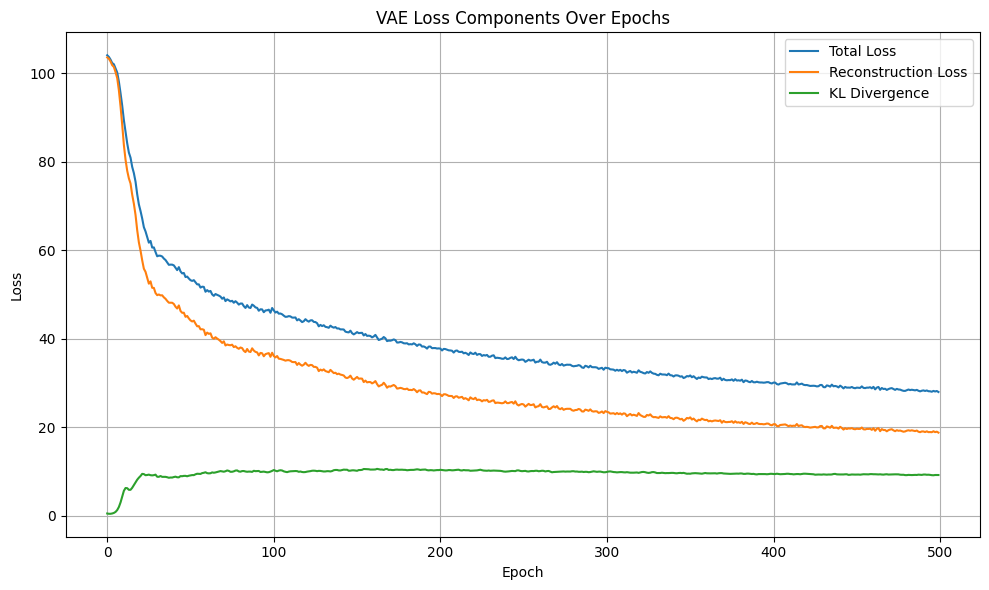

dim of latent mu: (331, 16)


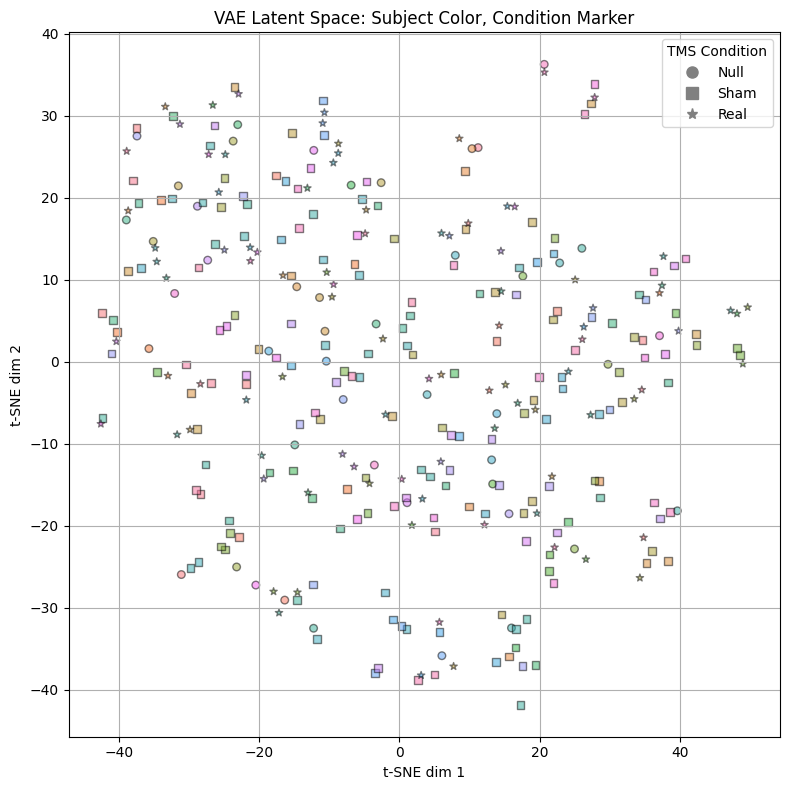

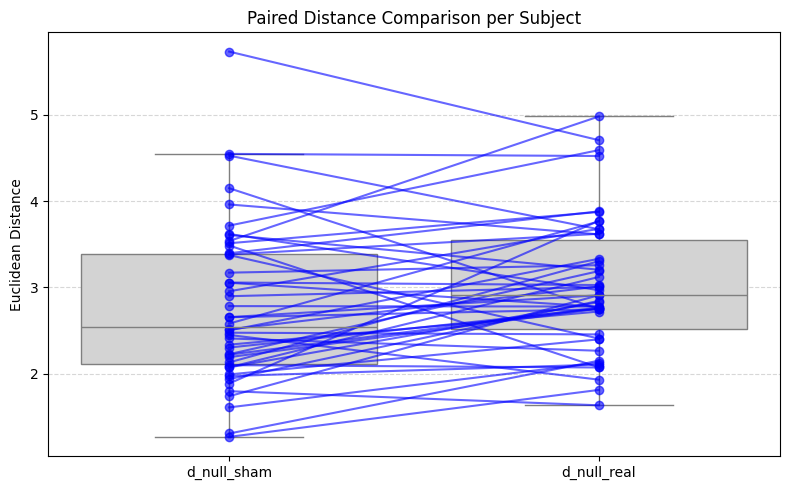

Paired t-test (ld=16): t = -2.289, p = 0.0268

=== latent_dim = 32 ===

===== Epoch 1 =====


Epoch 1/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1160.45it/s]


Epoch 1, Loss: 105.4139, Recon: 104.5298, KL: 0.8842

===== Epoch 2 =====


Epoch 2/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1192.83it/s]


Epoch 2, Loss: 104.7369, Recon: 104.0382, KL: 0.6986

===== Epoch 3 =====


Epoch 3/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1149.21it/s]


Epoch 3, Loss: 103.8370, Recon: 103.1907, KL: 0.6463

===== Epoch 4 =====


Epoch 4/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1162.03it/s]


Epoch 4, Loss: 103.5853, Recon: 102.8978, KL: 0.6875

===== Epoch 5 =====


Epoch 5/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1115.40it/s]


Epoch 5, Loss: 102.8941, Recon: 102.1186, KL: 0.7755

===== Epoch 6 =====


Epoch 6/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1123.57it/s]


Epoch 6, Loss: 102.4150, Recon: 101.5000, KL: 0.9150

===== Epoch 7 =====


Epoch 7/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1124.18it/s]


Epoch 7, Loss: 101.6151, Recon: 100.4919, KL: 1.1231

===== Epoch 8 =====


Epoch 8/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1144.99it/s]


Epoch 8, Loss: 100.6275, Recon: 99.1826, KL: 1.4449

===== Epoch 9 =====


Epoch 9/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 1118.94it/s]


Epoch 9, Loss: 99.6124, Recon: 97.6338, KL: 1.9786

===== Epoch 10 =====


Epoch 10/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1139.78it/s]


Epoch 10, Loss: 97.7010, Recon: 94.8752, KL: 2.8257

===== Epoch 11 =====


Epoch 11/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1087.27it/s]


Epoch 11, Loss: 94.9970, Recon: 90.8616, KL: 4.1354

===== Epoch 12 =====


Epoch 12/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1180.89it/s]


Epoch 12, Loss: 91.3143, Recon: 85.4479, KL: 5.8664

===== Epoch 13 =====


Epoch 13/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1223.74it/s]


Epoch 13, Loss: 86.8735, Recon: 78.9794, KL: 7.8941

===== Epoch 14 =====


Epoch 14/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1059.95it/s]


Epoch 14, Loss: 82.4077, Recon: 73.1081, KL: 9.2996

===== Epoch 15 =====


Epoch 15/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1115.86it/s]


Epoch 15, Loss: 78.8903, Recon: 69.2505, KL: 9.6399

===== Epoch 16 =====


Epoch 16/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1074.51it/s]


Epoch 16, Loss: 76.4365, Recon: 66.8984, KL: 9.5380

===== Epoch 17 =====


Epoch 17/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1190.98it/s]


Epoch 17, Loss: 73.3322, Recon: 64.0244, KL: 9.3078

===== Epoch 18 =====


Epoch 18/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1162.30it/s]


Epoch 18, Loss: 72.3156, Recon: 63.4653, KL: 8.8504

===== Epoch 19 =====


Epoch 19/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1108.75it/s]


Epoch 19, Loss: 70.2431, Recon: 61.6286, KL: 8.6145

===== Epoch 20 =====


Epoch 20/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1115.29it/s]


Epoch 20, Loss: 69.7269, Recon: 61.4601, KL: 8.2668

===== Epoch 21 =====


Epoch 21/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1137.54it/s]


Epoch 21, Loss: 69.0201, Recon: 60.8212, KL: 8.1989

===== Epoch 22 =====


Epoch 22/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1110.99it/s]


Epoch 22, Loss: 67.6775, Recon: 59.4431, KL: 8.2344

===== Epoch 23 =====


Epoch 23/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1152.19it/s]


Epoch 23, Loss: 67.5310, Recon: 59.1926, KL: 8.3384

===== Epoch 24 =====


Epoch 24/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1155.25it/s]


Epoch 24, Loss: 66.9092, Recon: 58.5335, KL: 8.3756

===== Epoch 25 =====


Epoch 25/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1096.50it/s]


Epoch 25, Loss: 65.8162, Recon: 57.1209, KL: 8.6953

===== Epoch 26 =====


Epoch 26/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1102.68it/s]


Epoch 26, Loss: 64.6990, Recon: 56.0447, KL: 8.6543

===== Epoch 27 =====


Epoch 27/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1129.60it/s]


Epoch 27, Loss: 64.5568, Recon: 55.9784, KL: 8.5784

===== Epoch 28 =====


Epoch 28/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1147.15it/s]


Epoch 28, Loss: 63.2203, Recon: 54.3721, KL: 8.8482

===== Epoch 29 =====


Epoch 29/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1150.04it/s]


Epoch 29, Loss: 62.9153, Recon: 53.8624, KL: 9.0529

===== Epoch 30 =====


Epoch 30/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1106.12it/s]


Epoch 30, Loss: 62.4770, Recon: 53.3709, KL: 9.1062

===== Epoch 31 =====


Epoch 31/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1158.76it/s]


Epoch 31, Loss: 61.6772, Recon: 52.7419, KL: 8.9353

===== Epoch 32 =====


Epoch 32/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 879.43it/s]


Epoch 32, Loss: 60.5868, Recon: 51.6321, KL: 8.9547

===== Epoch 33 =====


Epoch 33/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1051.35it/s]


Epoch 33, Loss: 60.8032, Recon: 51.9261, KL: 8.8770

===== Epoch 34 =====


Epoch 34/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1153.03it/s]


Epoch 34, Loss: 60.3651, Recon: 51.5312, KL: 8.8339

===== Epoch 35 =====


Epoch 35/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1185.71it/s]


Epoch 35, Loss: 59.9879, Recon: 51.1603, KL: 8.8276

===== Epoch 36 =====


Epoch 36/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1082.27it/s]


Epoch 36, Loss: 59.9438, Recon: 50.9788, KL: 8.9649

===== Epoch 37 =====


Epoch 37/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1211.30it/s]


Epoch 37, Loss: 59.2932, Recon: 50.4832, KL: 8.8100

===== Epoch 38 =====


Epoch 38/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1201.52it/s]


Epoch 38, Loss: 59.2509, Recon: 50.6250, KL: 8.6259

===== Epoch 39 =====


Epoch 39/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1066.51it/s]


Epoch 39, Loss: 58.5700, Recon: 49.8642, KL: 8.7059

===== Epoch 40 =====


Epoch 40/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1108.46it/s]


Epoch 40, Loss: 58.0645, Recon: 49.2857, KL: 8.7788

===== Epoch 41 =====


Epoch 41/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1144.28it/s]


Epoch 41, Loss: 57.9799, Recon: 49.2487, KL: 8.7312

===== Epoch 42 =====


Epoch 42/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1075.49it/s]


Epoch 42, Loss: 57.9296, Recon: 49.2550, KL: 8.6747

===== Epoch 43 =====


Epoch 43/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1091.83it/s]


Epoch 43, Loss: 57.5291, Recon: 48.6601, KL: 8.8690

===== Epoch 44 =====


Epoch 44/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1157.92it/s]


Epoch 44, Loss: 57.6788, Recon: 48.5884, KL: 9.0905

===== Epoch 45 =====


Epoch 45/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1214.81it/s]


Epoch 45, Loss: 57.3719, Recon: 48.2920, KL: 9.0799

===== Epoch 46 =====


Epoch 46/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1103.45it/s]


Epoch 46, Loss: 57.3439, Recon: 48.4578, KL: 8.8861

===== Epoch 47 =====


Epoch 47/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1156.82it/s]


Epoch 47, Loss: 56.6513, Recon: 47.6289, KL: 9.0224

===== Epoch 48 =====


Epoch 48/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1161.18it/s]


Epoch 48, Loss: 56.8098, Recon: 47.6954, KL: 9.1144

===== Epoch 49 =====


Epoch 49/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1148.84it/s]


Epoch 49, Loss: 55.8772, Recon: 46.7418, KL: 9.1354

===== Epoch 50 =====


Epoch 50/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1174.93it/s]


Epoch 50, Loss: 56.0017, Recon: 46.8154, KL: 9.1862

===== Epoch 51 =====


Epoch 51/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 965.60it/s]


Epoch 51, Loss: 55.8537, Recon: 46.4972, KL: 9.3564

===== Epoch 52 =====


Epoch 52/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1131.68it/s]


Epoch 52, Loss: 55.4139, Recon: 46.1460, KL: 9.2679

===== Epoch 53 =====


Epoch 53/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1155.11it/s]


Epoch 53, Loss: 55.3036, Recon: 45.9756, KL: 9.3279

===== Epoch 54 =====


Epoch 54/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1076.42it/s]


Epoch 54, Loss: 54.9627, Recon: 45.5706, KL: 9.3920

===== Epoch 55 =====


Epoch 55/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1117.99it/s]


Epoch 55, Loss: 54.9086, Recon: 45.4152, KL: 9.4934

===== Epoch 56 =====


Epoch 56/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 713.87it/s]


Epoch 56, Loss: 54.2410, Recon: 44.6748, KL: 9.5662

===== Epoch 57 =====


Epoch 57/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1066.19it/s]


Epoch 57, Loss: 54.0580, Recon: 44.4910, KL: 9.5670

===== Epoch 58 =====


Epoch 58/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1139.90it/s]


Epoch 58, Loss: 54.1748, Recon: 44.5424, KL: 9.6324

===== Epoch 59 =====


Epoch 59/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1080.58it/s]


Epoch 59, Loss: 53.8922, Recon: 44.2088, KL: 9.6834

===== Epoch 60 =====


Epoch 60/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1154.99it/s]


Epoch 60, Loss: 54.5143, Recon: 44.8648, KL: 9.6495

===== Epoch 61 =====


Epoch 61/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1110.43it/s]


Epoch 61, Loss: 53.1023, Recon: 43.2623, KL: 9.8399

===== Epoch 62 =====


Epoch 62/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 344.43it/s]


Epoch 62, Loss: 53.4269, Recon: 43.5663, KL: 9.8605

===== Epoch 63 =====


Epoch 63/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 807.33it/s]


Epoch 63, Loss: 53.0030, Recon: 43.0517, KL: 9.9513

===== Epoch 64 =====


Epoch 64/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1090.54it/s]


Epoch 64, Loss: 53.1020, Recon: 43.0358, KL: 10.0663

===== Epoch 65 =====


Epoch 65/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1241.52it/s]


Epoch 65, Loss: 52.4820, Recon: 42.6461, KL: 9.8359

===== Epoch 66 =====


Epoch 66/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1215.87it/s]


Epoch 66, Loss: 52.4131, Recon: 42.5859, KL: 9.8272

===== Epoch 67 =====


Epoch 67/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1241.39it/s]


Epoch 67, Loss: 52.8038, Recon: 42.9188, KL: 9.8850

===== Epoch 68 =====


Epoch 68/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1171.06it/s]


Epoch 68, Loss: 52.3664, Recon: 42.4789, KL: 9.8874

===== Epoch 69 =====


Epoch 69/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1208.92it/s]


Epoch 69, Loss: 51.2240, Recon: 41.2302, KL: 9.9938

===== Epoch 70 =====


Epoch 70/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1188.04it/s]


Epoch 70, Loss: 51.4741, Recon: 41.6975, KL: 9.7766

===== Epoch 71 =====


Epoch 71/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1204.03it/s]


Epoch 71, Loss: 51.6248, Recon: 41.8227, KL: 9.8021

===== Epoch 72 =====


Epoch 72/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1238.42it/s]


Epoch 72, Loss: 51.6381, Recon: 41.6216, KL: 10.0165

===== Epoch 73 =====


Epoch 73/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1208.13it/s]


Epoch 73, Loss: 50.8281, Recon: 40.6695, KL: 10.1586

===== Epoch 74 =====


Epoch 74/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1224.26it/s]


Epoch 74, Loss: 51.5730, Recon: 41.5948, KL: 9.9782

===== Epoch 75 =====


Epoch 75/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1240.82it/s]


Epoch 75, Loss: 51.0897, Recon: 41.1256, KL: 9.9641

===== Epoch 76 =====


Epoch 76/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1238.32it/s]


Epoch 76, Loss: 51.2061, Recon: 41.1068, KL: 10.0993

===== Epoch 77 =====


Epoch 77/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1150.87it/s]


Epoch 77, Loss: 50.6675, Recon: 40.5380, KL: 10.1295

===== Epoch 78 =====


Epoch 78/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1191.47it/s]


Epoch 78, Loss: 50.9473, Recon: 40.9912, KL: 9.9561

===== Epoch 79 =====


Epoch 79/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 862.40it/s]


Epoch 79, Loss: 50.6377, Recon: 40.6793, KL: 9.9583

===== Epoch 80 =====


Epoch 80/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1143.54it/s]


Epoch 80, Loss: 50.6936, Recon: 40.6299, KL: 10.0638

===== Epoch 81 =====


Epoch 81/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 998.92it/s]


Epoch 81, Loss: 50.4682, Recon: 40.1802, KL: 10.2880

===== Epoch 82 =====


Epoch 82/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1096.06it/s]


Epoch 82, Loss: 50.0434, Recon: 39.8012, KL: 10.2422

===== Epoch 83 =====


Epoch 83/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1077.80it/s]


Epoch 83, Loss: 49.9368, Recon: 39.8660, KL: 10.0708

===== Epoch 84 =====


Epoch 84/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1245.88it/s]


Epoch 84, Loss: 50.6437, Recon: 40.5389, KL: 10.1048

===== Epoch 85 =====


Epoch 85/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1228.49it/s]


Epoch 85, Loss: 49.5854, Recon: 39.4544, KL: 10.1309

===== Epoch 86 =====


Epoch 86/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 852.37it/s]


Epoch 86, Loss: 50.0552, Recon: 39.9324, KL: 10.1228

===== Epoch 87 =====


Epoch 87/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1079.49it/s]


Epoch 87, Loss: 49.6032, Recon: 39.3798, KL: 10.2234

===== Epoch 88 =====


Epoch 88/500: 100%|██████████████████████████████████████| 11/11 [00:00<00:00, 775.91it/s]


Epoch 88, Loss: 49.3412, Recon: 39.1231, KL: 10.2181

===== Epoch 89 =====


Epoch 89/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1080.78it/s]


Epoch 89, Loss: 49.8063, Recon: 39.6186, KL: 10.1876

===== Epoch 90 =====


Epoch 90/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1163.44it/s]


Epoch 90, Loss: 49.8145, Recon: 39.5033, KL: 10.3112

===== Epoch 91 =====


Epoch 91/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1165.88it/s]


Epoch 91, Loss: 49.4557, Recon: 39.1879, KL: 10.2678

===== Epoch 92 =====


Epoch 92/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1160.83it/s]


Epoch 92, Loss: 48.6994, Recon: 38.5713, KL: 10.1281

===== Epoch 93 =====


Epoch 93/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1222.89it/s]


Epoch 93, Loss: 48.7840, Recon: 38.7455, KL: 10.0384

===== Epoch 94 =====


Epoch 94/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1160.60it/s]


Epoch 94, Loss: 49.0482, Recon: 38.9972, KL: 10.0509

===== Epoch 95 =====


Epoch 95/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1172.72it/s]


Epoch 95, Loss: 49.0353, Recon: 38.8075, KL: 10.2278

===== Epoch 96 =====


Epoch 96/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1162.91it/s]


Epoch 96, Loss: 49.0156, Recon: 38.6171, KL: 10.3985

===== Epoch 97 =====


Epoch 97/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1225.92it/s]


Epoch 97, Loss: 48.7016, Recon: 38.3369, KL: 10.3648

===== Epoch 98 =====


Epoch 98/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1244.06it/s]


Epoch 98, Loss: 48.5455, Recon: 38.2110, KL: 10.3345

===== Epoch 99 =====


Epoch 99/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 1247.60it/s]


Epoch 99, Loss: 47.8370, Recon: 37.5767, KL: 10.2603

===== Epoch 100 =====


Epoch 100/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1017.07it/s]


Epoch 100, Loss: 48.3308, Recon: 38.2258, KL: 10.1050

===== Epoch 101 =====


Epoch 101/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1233.06it/s]


Epoch 101, Loss: 48.7236, Recon: 38.4775, KL: 10.2461

===== Epoch 102 =====


Epoch 102/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1237.92it/s]


Epoch 102, Loss: 48.3742, Recon: 37.9175, KL: 10.4567

===== Epoch 103 =====


Epoch 103/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.14it/s]


Epoch 103, Loss: 48.0335, Recon: 37.5633, KL: 10.4702

===== Epoch 104 =====


Epoch 104/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1206.27it/s]


Epoch 104, Loss: 48.3757, Recon: 37.9816, KL: 10.3942

===== Epoch 105 =====


Epoch 105/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1223.32it/s]


Epoch 105, Loss: 47.8578, Recon: 37.3548, KL: 10.5030

===== Epoch 106 =====


Epoch 106/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1188.31it/s]


Epoch 106, Loss: 48.1152, Recon: 37.6400, KL: 10.4751

===== Epoch 107 =====


Epoch 107/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1234.97it/s]


Epoch 107, Loss: 47.3000, Recon: 36.8849, KL: 10.4151

===== Epoch 108 =====


Epoch 108/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1169.57it/s]


Epoch 108, Loss: 47.6481, Recon: 37.4000, KL: 10.2482

===== Epoch 109 =====


Epoch 109/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1250.88it/s]


Epoch 109, Loss: 47.4484, Recon: 37.2419, KL: 10.2065

===== Epoch 110 =====


Epoch 110/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 837.89it/s]


Epoch 110, Loss: 48.1266, Recon: 37.7619, KL: 10.3647

===== Epoch 111 =====


Epoch 111/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1220.08it/s]


Epoch 111, Loss: 47.4130, Recon: 36.8839, KL: 10.5290

===== Epoch 112 =====


Epoch 112/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1264.97it/s]


Epoch 112, Loss: 47.1619, Recon: 36.5976, KL: 10.5644

===== Epoch 113 =====


Epoch 113/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1202.28it/s]


Epoch 113, Loss: 47.0493, Recon: 36.5909, KL: 10.4584

===== Epoch 114 =====


Epoch 114/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1190.58it/s]


Epoch 114, Loss: 47.8408, Recon: 37.4708, KL: 10.3701

===== Epoch 115 =====


Epoch 115/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1219.89it/s]


Epoch 115, Loss: 47.4209, Recon: 36.9378, KL: 10.4831

===== Epoch 116 =====


Epoch 116/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1248.88it/s]


Epoch 116, Loss: 47.5426, Recon: 36.9338, KL: 10.6088

===== Epoch 117 =====


Epoch 117/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1128.63it/s]


Epoch 117, Loss: 46.9558, Recon: 36.2708, KL: 10.6850

===== Epoch 118 =====


Epoch 118/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1205.89it/s]


Epoch 118, Loss: 47.4086, Recon: 36.7527, KL: 10.6559

===== Epoch 119 =====


Epoch 119/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 919.25it/s]


Epoch 119, Loss: 46.8488, Recon: 36.1441, KL: 10.7046

===== Epoch 120 =====


Epoch 120/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1177.87it/s]


Epoch 120, Loss: 46.3632, Recon: 35.6169, KL: 10.7463

===== Epoch 121 =====


Epoch 121/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 796.08it/s]


Epoch 121, Loss: 46.9984, Recon: 36.3518, KL: 10.6466

===== Epoch 122 =====


Epoch 122/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1233.75it/s]


Epoch 122, Loss: 45.6814, Recon: 34.9387, KL: 10.7426

===== Epoch 123 =====


Epoch 123/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1164.53it/s]


Epoch 123, Loss: 46.2456, Recon: 35.6446, KL: 10.6010

===== Epoch 124 =====


Epoch 124/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1166.00it/s]


Epoch 124, Loss: 46.2712, Recon: 35.7948, KL: 10.4764

===== Epoch 125 =====


Epoch 125/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1234.84it/s]


Epoch 125, Loss: 46.5469, Recon: 35.9876, KL: 10.5593

===== Epoch 126 =====


Epoch 126/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1212.10it/s]


Epoch 126, Loss: 45.9334, Recon: 35.2445, KL: 10.6889

===== Epoch 127 =====


Epoch 127/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1163.76it/s]


Epoch 127, Loss: 46.7486, Recon: 36.1380, KL: 10.6106

===== Epoch 128 =====


Epoch 128/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1192.03it/s]


Epoch 128, Loss: 46.0311, Recon: 35.3056, KL: 10.7254

===== Epoch 129 =====


Epoch 129/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1178.36it/s]


Epoch 129, Loss: 46.2547, Recon: 35.4317, KL: 10.8230

===== Epoch 130 =====


Epoch 130/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1188.56it/s]


Epoch 130, Loss: 46.0332, Recon: 35.2785, KL: 10.7547

===== Epoch 131 =====


Epoch 131/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1179.14it/s]


Epoch 131, Loss: 45.6291, Recon: 34.9191, KL: 10.7100

===== Epoch 132 =====


Epoch 132/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1190.73it/s]


Epoch 132, Loss: 45.8238, Recon: 35.0463, KL: 10.7775

===== Epoch 133 =====


Epoch 133/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1180.89it/s]


Epoch 133, Loss: 45.7699, Recon: 34.9583, KL: 10.8117

===== Epoch 134 =====


Epoch 134/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 377.74it/s]


Epoch 134, Loss: 45.8201, Recon: 35.0516, KL: 10.7685

===== Epoch 135 =====


Epoch 135/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 693.36it/s]


Epoch 135, Loss: 45.6996, Recon: 35.0054, KL: 10.6943

===== Epoch 136 =====


Epoch 136/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1149.53it/s]


Epoch 136, Loss: 45.2816, Recon: 34.6007, KL: 10.6810

===== Epoch 137 =====


Epoch 137/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1224.81it/s]


Epoch 137, Loss: 45.1133, Recon: 34.3566, KL: 10.7567

===== Epoch 138 =====


Epoch 138/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.12it/s]


Epoch 138, Loss: 44.7489, Recon: 34.0662, KL: 10.6826

===== Epoch 139 =====


Epoch 139/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1220.05it/s]


Epoch 139, Loss: 45.6391, Recon: 35.0587, KL: 10.5803

===== Epoch 140 =====


Epoch 140/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1206.43it/s]


Epoch 140, Loss: 45.5010, Recon: 34.7366, KL: 10.7644

===== Epoch 141 =====


Epoch 141/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1243.36it/s]


Epoch 141, Loss: 45.0725, Recon: 34.2482, KL: 10.8243

===== Epoch 142 =====


Epoch 142/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1177.21it/s]


Epoch 142, Loss: 45.2981, Recon: 34.5377, KL: 10.7604

===== Epoch 143 =====


Epoch 143/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1190.58it/s]


Epoch 143, Loss: 44.8374, Recon: 34.0071, KL: 10.8303

===== Epoch 144 =====


Epoch 144/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1183.68it/s]


Epoch 144, Loss: 45.3190, Recon: 34.4445, KL: 10.8745

===== Epoch 145 =====


Epoch 145/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1207.34it/s]


Epoch 145, Loss: 44.6955, Recon: 33.9022, KL: 10.7933

===== Epoch 146 =====


Epoch 146/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1250.84it/s]


Epoch 146, Loss: 44.5270, Recon: 33.7675, KL: 10.7595

===== Epoch 147 =====


Epoch 147/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1191.26it/s]


Epoch 147, Loss: 44.5842, Recon: 33.8158, KL: 10.7683

===== Epoch 148 =====


Epoch 148/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1212.90it/s]


Epoch 148, Loss: 44.8695, Recon: 34.1681, KL: 10.7014

===== Epoch 149 =====


Epoch 149/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1230.69it/s]


Epoch 149, Loss: 44.2070, Recon: 33.4677, KL: 10.7394

===== Epoch 150 =====


Epoch 150/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1182.92it/s]


Epoch 150, Loss: 44.2001, Recon: 33.4553, KL: 10.7448

===== Epoch 151 =====


Epoch 151/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1256.98it/s]


Epoch 151, Loss: 44.4584, Recon: 33.7454, KL: 10.7130

===== Epoch 152 =====


Epoch 152/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1234.15it/s]


Epoch 152, Loss: 45.1179, Recon: 34.2078, KL: 10.9101

===== Epoch 153 =====


Epoch 153/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1212.93it/s]


Epoch 153, Loss: 44.7029, Recon: 33.7315, KL: 10.9714

===== Epoch 154 =====


Epoch 154/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1196.29it/s]


Epoch 154, Loss: 44.4564, Recon: 33.3862, KL: 11.0702

===== Epoch 155 =====


Epoch 155/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1186.23it/s]


Epoch 155, Loss: 44.1638, Recon: 33.0526, KL: 11.1111

===== Epoch 156 =====


Epoch 156/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1229.87it/s]


Epoch 156, Loss: 43.7795, Recon: 32.7497, KL: 11.0297

===== Epoch 157 =====


Epoch 157/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1173.59it/s]


Epoch 157, Loss: 44.0974, Recon: 33.1774, KL: 10.9200

===== Epoch 158 =====


Epoch 158/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1219.76it/s]


Epoch 158, Loss: 43.6630, Recon: 32.7473, KL: 10.9157

===== Epoch 159 =====


Epoch 159/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1260.89it/s]


Epoch 159, Loss: 43.5800, Recon: 32.6264, KL: 10.9536

===== Epoch 160 =====


Epoch 160/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1185.23it/s]


Epoch 160, Loss: 44.0139, Recon: 33.1630, KL: 10.8509

===== Epoch 161 =====


Epoch 161/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 970.70it/s]


Epoch 161, Loss: 43.8244, Recon: 32.9946, KL: 10.8299

===== Epoch 162 =====


Epoch 162/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1186.90it/s]


Epoch 162, Loss: 44.2806, Recon: 33.4103, KL: 10.8703

===== Epoch 163 =====


Epoch 163/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1229.05it/s]


Epoch 163, Loss: 44.0998, Recon: 33.0807, KL: 11.0191

===== Epoch 164 =====


Epoch 164/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1257.56it/s]


Epoch 164, Loss: 43.6702, Recon: 32.7335, KL: 10.9367

===== Epoch 165 =====


Epoch 165/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1184.28it/s]


Epoch 165, Loss: 42.9772, Recon: 32.0833, KL: 10.8939

===== Epoch 166 =====


Epoch 166/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1231.15it/s]


Epoch 166, Loss: 43.4015, Recon: 32.4505, KL: 10.9510

===== Epoch 167 =====


Epoch 167/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1205.23it/s]


Epoch 167, Loss: 43.2857, Recon: 32.2370, KL: 11.0487

===== Epoch 168 =====


Epoch 168/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1230.95it/s]


Epoch 168, Loss: 42.8763, Recon: 31.9079, KL: 10.9684

===== Epoch 169 =====


Epoch 169/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1226.40it/s]


Epoch 169, Loss: 43.0866, Recon: 32.3194, KL: 10.7672

===== Epoch 170 =====


Epoch 170/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1135.52it/s]


Epoch 170, Loss: 42.4710, Recon: 31.8519, KL: 10.6190

===== Epoch 171 =====


Epoch 171/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.95it/s]


Epoch 171, Loss: 42.7518, Recon: 32.2169, KL: 10.5349

===== Epoch 172 =====


Epoch 172/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1160.10it/s]


Epoch 172, Loss: 43.2136, Recon: 32.6554, KL: 10.5582

===== Epoch 173 =====


Epoch 173/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1198.75it/s]


Epoch 173, Loss: 42.6665, Recon: 32.0870, KL: 10.5795

===== Epoch 174 =====


Epoch 174/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1250.13it/s]


Epoch 174, Loss: 43.5226, Recon: 32.8821, KL: 10.6404

===== Epoch 175 =====


Epoch 175/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1224.97it/s]


Epoch 175, Loss: 42.6652, Recon: 31.8423, KL: 10.8229

===== Epoch 176 =====


Epoch 176/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1215.87it/s]


Epoch 176, Loss: 42.8927, Recon: 31.9919, KL: 10.9008

===== Epoch 177 =====


Epoch 177/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1224.52it/s]


Epoch 177, Loss: 42.8494, Recon: 31.9581, KL: 10.8913

===== Epoch 178 =====


Epoch 178/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1236.96it/s]


Epoch 178, Loss: 42.0191, Recon: 31.0893, KL: 10.9299

===== Epoch 179 =====


Epoch 179/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1099.48it/s]


Epoch 179, Loss: 42.2680, Recon: 31.4087, KL: 10.8592

===== Epoch 180 =====


Epoch 180/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1213.47it/s]


Epoch 180, Loss: 42.0892, Recon: 31.3230, KL: 10.7663

===== Epoch 181 =====


Epoch 181/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1150.84it/s]


Epoch 181, Loss: 42.5652, Recon: 31.8434, KL: 10.7218

===== Epoch 182 =====


Epoch 182/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1234.71it/s]


Epoch 182, Loss: 41.8977, Recon: 31.1001, KL: 10.7976

===== Epoch 183 =====


Epoch 183/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1249.59it/s]


Epoch 183, Loss: 42.3519, Recon: 31.5066, KL: 10.8453

===== Epoch 184 =====


Epoch 184/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1211.02it/s]


Epoch 184, Loss: 42.4808, Recon: 31.6930, KL: 10.7878

===== Epoch 185 =====


Epoch 185/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1227.25it/s]


Epoch 185, Loss: 41.8997, Recon: 31.0209, KL: 10.8788

===== Epoch 186 =====


Epoch 186/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1211.72it/s]


Epoch 186, Loss: 41.7933, Recon: 30.8373, KL: 10.9561

===== Epoch 187 =====


Epoch 187/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1235.50it/s]


Epoch 187, Loss: 41.7607, Recon: 30.8125, KL: 10.9482

===== Epoch 188 =====


Epoch 188/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1223.19it/s]


Epoch 188, Loss: 42.1266, Recon: 31.2826, KL: 10.8440

===== Epoch 189 =====


Epoch 189/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1155.86it/s]


Epoch 189, Loss: 41.6923, Recon: 30.9262, KL: 10.7661

===== Epoch 190 =====


Epoch 190/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1212.93it/s]


Epoch 190, Loss: 41.9604, Recon: 31.1266, KL: 10.8337

===== Epoch 191 =====


Epoch 191/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1214.40it/s]


Epoch 191, Loss: 41.6289, Recon: 30.7246, KL: 10.9043

===== Epoch 192 =====


Epoch 192/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1169.46it/s]


Epoch 192, Loss: 41.5508, Recon: 30.6783, KL: 10.8725

===== Epoch 193 =====


Epoch 193/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1198.62it/s]


Epoch 193, Loss: 41.5941, Recon: 30.7611, KL: 10.8329

===== Epoch 194 =====


Epoch 194/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1151.10it/s]


Epoch 194, Loss: 41.6811, Recon: 30.8484, KL: 10.8327

===== Epoch 195 =====


Epoch 195/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1184.07it/s]


Epoch 195, Loss: 41.5700, Recon: 30.7491, KL: 10.8209

===== Epoch 196 =====


Epoch 196/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1190.21it/s]


Epoch 196, Loss: 41.2206, Recon: 30.3366, KL: 10.8840

===== Epoch 197 =====


Epoch 197/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1236.66it/s]


Epoch 197, Loss: 41.3601, Recon: 30.4218, KL: 10.9383

===== Epoch 198 =====


Epoch 198/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1164.61it/s]


Epoch 198, Loss: 41.3720, Recon: 30.4842, KL: 10.8877

===== Epoch 199 =====


Epoch 199/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1208.51it/s]


Epoch 199, Loss: 41.5099, Recon: 30.5559, KL: 10.9541

===== Epoch 200 =====


Epoch 200/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1225.10it/s]


Epoch 200, Loss: 41.1351, Recon: 30.0795, KL: 11.0556

===== Epoch 201 =====


Epoch 201/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1206.93it/s]


Epoch 201, Loss: 40.9853, Recon: 29.9804, KL: 11.0049

===== Epoch 202 =====


Epoch 202/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1245.04it/s]


Epoch 202, Loss: 41.0941, Recon: 30.2008, KL: 10.8933

===== Epoch 203 =====


Epoch 203/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1200.46it/s]


Epoch 203, Loss: 41.2322, Recon: 30.3249, KL: 10.9073

===== Epoch 204 =====


Epoch 204/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1230.99it/s]


Epoch 204, Loss: 40.9489, Recon: 29.9301, KL: 11.0189

===== Epoch 205 =====


Epoch 205/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1187.39it/s]


Epoch 205, Loss: 40.7975, Recon: 29.7905, KL: 11.0070

===== Epoch 206 =====


Epoch 206/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1251.15it/s]


Epoch 206, Loss: 40.6073, Recon: 29.6732, KL: 10.9341

===== Epoch 207 =====


Epoch 207/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1192.03it/s]


Epoch 207, Loss: 40.0375, Recon: 29.1403, KL: 10.8972

===== Epoch 208 =====


Epoch 208/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.62it/s]


Epoch 208, Loss: 40.3457, Recon: 29.4741, KL: 10.8716

===== Epoch 209 =====


Epoch 209/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 323.80it/s]


Epoch 209, Loss: 40.1121, Recon: 29.3480, KL: 10.7641

===== Epoch 210 =====


Epoch 210/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 721.06it/s]


Epoch 210, Loss: 40.1299, Recon: 29.4411, KL: 10.6887

===== Epoch 211 =====


Epoch 211/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 616.74it/s]


Epoch 211, Loss: 40.0800, Recon: 29.4151, KL: 10.6650

===== Epoch 212 =====


Epoch 212/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1205.64it/s]


Epoch 212, Loss: 40.2644, Recon: 29.6176, KL: 10.6468

===== Epoch 213 =====


Epoch 213/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.36it/s]


Epoch 213, Loss: 39.8645, Recon: 29.2128, KL: 10.6517

===== Epoch 214 =====


Epoch 214/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1154.15it/s]


Epoch 214, Loss: 39.8360, Recon: 29.2432, KL: 10.5929

===== Epoch 215 =====


Epoch 215/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1240.82it/s]


Epoch 215, Loss: 40.0179, Recon: 29.3757, KL: 10.6422

===== Epoch 216 =====


Epoch 216/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1208.51it/s]


Epoch 216, Loss: 39.6435, Recon: 29.0144, KL: 10.6291

===== Epoch 217 =====


Epoch 217/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1225.66it/s]


Epoch 217, Loss: 39.8189, Recon: 29.1614, KL: 10.6575

===== Epoch 218 =====


Epoch 218/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1183.80it/s]


Epoch 218, Loss: 39.5112, Recon: 28.8242, KL: 10.6870

===== Epoch 219 =====


Epoch 219/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1124.53it/s]


Epoch 219, Loss: 39.6839, Recon: 29.0621, KL: 10.6217

===== Epoch 220 =====


Epoch 220/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1230.00it/s]


Epoch 220, Loss: 39.9696, Recon: 29.2691, KL: 10.7006

===== Epoch 221 =====


Epoch 221/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.83it/s]


Epoch 221, Loss: 39.4614, Recon: 28.7334, KL: 10.7280

===== Epoch 222 =====


Epoch 222/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1193.85it/s]


Epoch 222, Loss: 39.5350, Recon: 28.9090, KL: 10.6261

===== Epoch 223 =====


Epoch 223/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1179.38it/s]


Epoch 223, Loss: 39.5528, Recon: 28.9683, KL: 10.5845

===== Epoch 224 =====


Epoch 224/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1193.32it/s]


Epoch 224, Loss: 39.0135, Recon: 28.2908, KL: 10.7227

===== Epoch 225 =====


Epoch 225/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.21it/s]


Epoch 225, Loss: 39.6760, Recon: 28.9614, KL: 10.7146

===== Epoch 226 =====


Epoch 226/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1234.71it/s]


Epoch 226, Loss: 39.1918, Recon: 28.3859, KL: 10.8059

===== Epoch 227 =====


Epoch 227/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1232.73it/s]


Epoch 227, Loss: 38.9470, Recon: 28.1689, KL: 10.7780

===== Epoch 228 =====


Epoch 228/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1245.91it/s]


Epoch 228, Loss: 39.6247, Recon: 28.9420, KL: 10.6827

===== Epoch 229 =====


Epoch 229/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1219.24it/s]


Epoch 229, Loss: 39.0439, Recon: 28.3425, KL: 10.7015

===== Epoch 230 =====


Epoch 230/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1259.45it/s]


Epoch 230, Loss: 39.3161, Recon: 28.5744, KL: 10.7417

===== Epoch 231 =====


Epoch 231/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1182.52it/s]


Epoch 231, Loss: 39.6754, Recon: 28.7963, KL: 10.8791

===== Epoch 232 =====


Epoch 232/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1192.15it/s]


Epoch 232, Loss: 38.8656, Recon: 27.9792, KL: 10.8864

===== Epoch 233 =====


Epoch 233/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1215.58it/s]


Epoch 233, Loss: 38.6937, Recon: 27.9172, KL: 10.7765

===== Epoch 234 =====


Epoch 234/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1222.12it/s]


Epoch 234, Loss: 38.7282, Recon: 28.0771, KL: 10.6511

===== Epoch 235 =====


Epoch 235/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1213.06it/s]


Epoch 235, Loss: 38.6923, Recon: 28.1080, KL: 10.5842

===== Epoch 236 =====


Epoch 236/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1190.06it/s]


Epoch 236, Loss: 38.3793, Recon: 27.8438, KL: 10.5355

===== Epoch 237 =====


Epoch 237/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1218.44it/s]


Epoch 237, Loss: 38.8120, Recon: 28.3249, KL: 10.4871

===== Epoch 238 =====


Epoch 238/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1184.35it/s]


Epoch 238, Loss: 38.3691, Recon: 27.9265, KL: 10.4427

===== Epoch 239 =====


Epoch 239/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 759.90it/s]


Epoch 239, Loss: 38.3984, Recon: 27.9380, KL: 10.4605

===== Epoch 240 =====


Epoch 240/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1207.06it/s]


Epoch 240, Loss: 38.5792, Recon: 28.0562, KL: 10.5230

===== Epoch 241 =====


Epoch 241/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 640.88it/s]


Epoch 241, Loss: 38.1639, Recon: 27.5733, KL: 10.5906

===== Epoch 242 =====


Epoch 242/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 476.34it/s]


Epoch 242, Loss: 38.7438, Recon: 28.1625, KL: 10.5813

===== Epoch 243 =====


Epoch 243/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1102.08it/s]


Epoch 243, Loss: 37.8699, Recon: 27.2292, KL: 10.6406

===== Epoch 244 =====


Epoch 244/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1226.96it/s]


Epoch 244, Loss: 37.7082, Recon: 27.0885, KL: 10.6196

===== Epoch 245 =====


Epoch 245/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1259.89it/s]


Epoch 245, Loss: 38.3366, Recon: 27.8585, KL: 10.4781

===== Epoch 246 =====


Epoch 246/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1211.46it/s]


Epoch 246, Loss: 38.0982, Recon: 27.6290, KL: 10.4692

===== Epoch 247 =====


Epoch 247/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1196.04it/s]


Epoch 247, Loss: 37.9894, Recon: 27.4927, KL: 10.4967

===== Epoch 248 =====


Epoch 248/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1266.54it/s]


Epoch 248, Loss: 38.0064, Recon: 27.4281, KL: 10.5783

===== Epoch 249 =====


Epoch 249/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1250.27it/s]


Epoch 249, Loss: 37.6082, Recon: 27.0355, KL: 10.5726

===== Epoch 250 =====


Epoch 250/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1188.71it/s]


Epoch 250, Loss: 37.7477, Recon: 27.2330, KL: 10.5147

===== Epoch 251 =====


Epoch 251/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1258.31it/s]


Epoch 251, Loss: 37.6657, Recon: 27.1148, KL: 10.5509

===== Epoch 252 =====


Epoch 252/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1192.03it/s]


Epoch 252, Loss: 37.3525, Recon: 26.7869, KL: 10.5657

===== Epoch 253 =====


Epoch 253/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1266.99it/s]


Epoch 253, Loss: 37.7500, Recon: 27.3059, KL: 10.4441

===== Epoch 254 =====


Epoch 254/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1187.03it/s]


Epoch 254, Loss: 37.6108, Recon: 27.1523, KL: 10.4586

===== Epoch 255 =====


Epoch 255/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1232.63it/s]


Epoch 255, Loss: 37.4828, Recon: 26.9619, KL: 10.5209

===== Epoch 256 =====


Epoch 256/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1087.48it/s]


Epoch 256, Loss: 37.7219, Recon: 27.1558, KL: 10.5661

===== Epoch 257 =====


Epoch 257/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1181.40it/s]


Epoch 257, Loss: 37.0940, Recon: 26.5590, KL: 10.5350

===== Epoch 258 =====


Epoch 258/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1215.07it/s]


Epoch 258, Loss: 37.4439, Recon: 26.9894, KL: 10.4545

===== Epoch 259 =====


Epoch 259/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1218.69it/s]


Epoch 259, Loss: 37.5786, Recon: 27.1760, KL: 10.4026

===== Epoch 260 =====


Epoch 260/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1196.85it/s]


Epoch 260, Loss: 37.5479, Recon: 27.0869, KL: 10.4610

===== Epoch 261 =====


Epoch 261/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1279.96it/s]


Epoch 261, Loss: 36.6962, Recon: 26.1563, KL: 10.5400

===== Epoch 262 =====


Epoch 262/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1229.90it/s]


Epoch 262, Loss: 37.1228, Recon: 26.6305, KL: 10.4924

===== Epoch 263 =====


Epoch 263/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1239.42it/s]


Epoch 263, Loss: 36.9358, Recon: 26.4476, KL: 10.4882

===== Epoch 264 =====


Epoch 264/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 502.88it/s]


Epoch 264, Loss: 36.7912, Recon: 26.3070, KL: 10.4842

===== Epoch 265 =====


Epoch 265/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1202.97it/s]


Epoch 265, Loss: 37.1021, Recon: 26.7233, KL: 10.3789

===== Epoch 266 =====


Epoch 266/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1167.74it/s]


Epoch 266, Loss: 36.6870, Recon: 26.2527, KL: 10.4343

===== Epoch 267 =====


Epoch 267/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1234.87it/s]


Epoch 267, Loss: 37.0680, Recon: 26.5881, KL: 10.4799

===== Epoch 268 =====


Epoch 268/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1212.42it/s]


Epoch 268, Loss: 36.6624, Recon: 26.2077, KL: 10.4547

===== Epoch 269 =====


Epoch 269/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1170.82it/s]


Epoch 269, Loss: 36.7633, Recon: 26.3317, KL: 10.4315

===== Epoch 270 =====


Epoch 270/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1228.49it/s]


Epoch 270, Loss: 36.4556, Recon: 26.0607, KL: 10.3949

===== Epoch 271 =====


Epoch 271/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1201.37it/s]


Epoch 271, Loss: 36.4707, Recon: 26.0846, KL: 10.3861

===== Epoch 272 =====


Epoch 272/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1157.89it/s]


Epoch 272, Loss: 36.2174, Recon: 25.8458, KL: 10.3716

===== Epoch 273 =====


Epoch 273/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1210.67it/s]


Epoch 273, Loss: 36.1810, Recon: 25.8227, KL: 10.3583

===== Epoch 274 =====


Epoch 274/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1191.26it/s]


Epoch 274, Loss: 36.4189, Recon: 26.1082, KL: 10.3107

===== Epoch 275 =====


Epoch 275/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1169.69it/s]


Epoch 275, Loss: 36.1350, Recon: 25.8357, KL: 10.2992

===== Epoch 276 =====


Epoch 276/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1182.13it/s]


Epoch 276, Loss: 36.3472, Recon: 25.9639, KL: 10.3833

===== Epoch 277 =====


Epoch 277/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1213.47it/s]


Epoch 277, Loss: 36.4208, Recon: 26.0146, KL: 10.4062

===== Epoch 278 =====


Epoch 278/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1236.23it/s]


Epoch 278, Loss: 36.6887, Recon: 26.3661, KL: 10.3225

===== Epoch 279 =====


Epoch 279/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1204.69it/s]


Epoch 279, Loss: 35.6794, Recon: 25.4071, KL: 10.2723

===== Epoch 280 =====


Epoch 280/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1229.74it/s]


Epoch 280, Loss: 36.1579, Recon: 25.8466, KL: 10.3112

===== Epoch 281 =====


Epoch 281/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 347.54it/s]


Epoch 281, Loss: 35.9914, Recon: 25.6206, KL: 10.3707

===== Epoch 282 =====


Epoch 282/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1031.21it/s]


Epoch 282, Loss: 35.9669, Recon: 25.6580, KL: 10.3089

===== Epoch 283 =====


Epoch 283/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1158.50it/s]


Epoch 283, Loss: 35.9048, Recon: 25.6238, KL: 10.2810

===== Epoch 284 =====


Epoch 284/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1183.95it/s]


Epoch 284, Loss: 35.9727, Recon: 25.6693, KL: 10.3034

===== Epoch 285 =====


Epoch 285/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1035.96it/s]


Epoch 285, Loss: 35.9648, Recon: 25.6164, KL: 10.3484

===== Epoch 286 =====


Epoch 286/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1203.88it/s]


Epoch 286, Loss: 36.1208, Recon: 25.7612, KL: 10.3596

===== Epoch 287 =====


Epoch 287/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1169.10it/s]


Epoch 287, Loss: 35.7726, Recon: 25.3342, KL: 10.4384

===== Epoch 288 =====


Epoch 288/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1252.00it/s]


Epoch 288, Loss: 35.7753, Recon: 25.3911, KL: 10.3842

===== Epoch 289 =====


Epoch 289/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1228.82it/s]


Epoch 289, Loss: 35.4813, Recon: 25.1958, KL: 10.2855

===== Epoch 290 =====


Epoch 290/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.59it/s]


Epoch 290, Loss: 35.3522, Recon: 25.0359, KL: 10.3163

===== Epoch 291 =====


Epoch 291/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1174.96it/s]


Epoch 291, Loss: 35.4236, Recon: 25.1705, KL: 10.2531

===== Epoch 292 =====


Epoch 292/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1253.73it/s]


Epoch 292, Loss: 35.4884, Recon: 25.2979, KL: 10.1905

===== Epoch 293 =====


Epoch 293/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1198.53it/s]


Epoch 293, Loss: 35.1196, Recon: 24.8520, KL: 10.2676

===== Epoch 294 =====


Epoch 294/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1238.42it/s]


Epoch 294, Loss: 35.6604, Recon: 25.3858, KL: 10.2747

===== Epoch 295 =====


Epoch 295/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1240.02it/s]


Epoch 295, Loss: 35.0607, Recon: 24.8160, KL: 10.2447

===== Epoch 296 =====


Epoch 296/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1209.18it/s]


Epoch 296, Loss: 35.1462, Recon: 24.9632, KL: 10.1830

===== Epoch 297 =====


Epoch 297/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1193.81it/s]


Epoch 297, Loss: 34.9496, Recon: 24.7377, KL: 10.2118

===== Epoch 298 =====


Epoch 298/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1241.12it/s]


Epoch 298, Loss: 35.3298, Recon: 25.0975, KL: 10.2323

===== Epoch 299 =====


Epoch 299/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1255.44it/s]


Epoch 299, Loss: 35.2464, Recon: 24.9854, KL: 10.2610

===== Epoch 300 =====


Epoch 300/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1197.63it/s]


Epoch 300, Loss: 35.0765, Recon: 24.8042, KL: 10.2723

===== Epoch 301 =====


Epoch 301/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1230.03it/s]


Epoch 301, Loss: 34.9360, Recon: 24.7187, KL: 10.2173

===== Epoch 302 =====


Epoch 302/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1241.12it/s]


Epoch 302, Loss: 34.4664, Recon: 24.2648, KL: 10.2017

===== Epoch 303 =====


Epoch 303/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1185.99it/s]


Epoch 303, Loss: 34.9040, Recon: 24.6856, KL: 10.2184

===== Epoch 304 =====


Epoch 304/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1259.72it/s]


Epoch 304, Loss: 34.9567, Recon: 24.7131, KL: 10.2436

===== Epoch 305 =====


Epoch 305/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1252.00it/s]


Epoch 305, Loss: 34.6794, Recon: 24.4290, KL: 10.2504

===== Epoch 306 =====


Epoch 306/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1224.26it/s]


Epoch 306, Loss: 34.9331, Recon: 24.7548, KL: 10.1784

===== Epoch 307 =====


Epoch 307/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1181.37it/s]


Epoch 307, Loss: 34.5520, Recon: 24.4042, KL: 10.1478

===== Epoch 308 =====


Epoch 308/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1116.40it/s]


Epoch 308, Loss: 34.4029, Recon: 24.2855, KL: 10.1175

===== Epoch 309 =====


Epoch 309/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1231.97it/s]


Epoch 309, Loss: 34.2324, Recon: 24.1435, KL: 10.0889

===== Epoch 310 =====


Epoch 310/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1245.17it/s]


Epoch 310, Loss: 34.3721, Recon: 24.3482, KL: 10.0240

===== Epoch 311 =====


Epoch 311/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1144.76it/s]


Epoch 311, Loss: 35.0396, Recon: 25.0740, KL: 9.9655

===== Epoch 312 =====


Epoch 312/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1268.76it/s]


Epoch 312, Loss: 34.5135, Recon: 24.3733, KL: 10.1402

===== Epoch 313 =====


Epoch 313/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1186.23it/s]


Epoch 313, Loss: 34.5647, Recon: 24.4199, KL: 10.1448

===== Epoch 314 =====


Epoch 314/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1221.79it/s]


Epoch 314, Loss: 34.3638, Recon: 24.1755, KL: 10.1883

===== Epoch 315 =====


Epoch 315/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1216.80it/s]


Epoch 315, Loss: 34.0999, Recon: 23.8713, KL: 10.2287

===== Epoch 316 =====


Epoch 316/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1182.28it/s]


Epoch 316, Loss: 34.2618, Recon: 24.1155, KL: 10.1463

===== Epoch 317 =====


Epoch 317/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1218.98it/s]


Epoch 317, Loss: 34.2579, Recon: 24.1300, KL: 10.1279

===== Epoch 318 =====


Epoch 318/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1223.83it/s]


Epoch 318, Loss: 34.4517, Recon: 24.2563, KL: 10.1954

===== Epoch 319 =====


Epoch 319/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1217.50it/s]


Epoch 319, Loss: 34.1204, Recon: 23.9293, KL: 10.1911

===== Epoch 320 =====


Epoch 320/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1228.92it/s]


Epoch 320, Loss: 34.0105, Recon: 23.9102, KL: 10.1002

===== Epoch 321 =====


Epoch 321/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1225.88it/s]


Epoch 321, Loss: 34.0745, Recon: 23.9946, KL: 10.0799

===== Epoch 322 =====


Epoch 322/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1221.40it/s]


Epoch 322, Loss: 33.8363, Recon: 23.8003, KL: 10.0359

===== Epoch 323 =====


Epoch 323/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1208.26it/s]


Epoch 323, Loss: 33.9366, Recon: 23.9299, KL: 10.0067

===== Epoch 324 =====


Epoch 324/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1148.84it/s]


Epoch 324, Loss: 33.8935, Recon: 23.9073, KL: 9.9862

===== Epoch 325 =====


Epoch 325/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1199.68it/s]


Epoch 325, Loss: 34.0083, Recon: 23.9792, KL: 10.0291

===== Epoch 326 =====


Epoch 326/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1225.75it/s]


Epoch 326, Loss: 33.9138, Recon: 23.8462, KL: 10.0676

===== Epoch 327 =====


Epoch 327/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1253.66it/s]


Epoch 327, Loss: 33.7601, Recon: 23.7590, KL: 10.0010

===== Epoch 328 =====


Epoch 328/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1169.99it/s]


Epoch 328, Loss: 33.9353, Recon: 23.8663, KL: 10.0689

===== Epoch 329 =====


Epoch 329/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1236.53it/s]


Epoch 329, Loss: 33.8092, Recon: 23.6736, KL: 10.1356

===== Epoch 330 =====


Epoch 330/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1197.87it/s]


Epoch 330, Loss: 33.4059, Recon: 23.3041, KL: 10.1018

===== Epoch 331 =====


Epoch 331/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1228.07it/s]


Epoch 331, Loss: 33.4836, Recon: 23.5304, KL: 9.9531

===== Epoch 332 =====


Epoch 332/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1140.49it/s]


Epoch 332, Loss: 33.5794, Recon: 23.5876, KL: 9.9918

===== Epoch 333 =====


Epoch 333/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1210.51it/s]


Epoch 333, Loss: 33.3513, Recon: 23.3400, KL: 10.0112

===== Epoch 334 =====


Epoch 334/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1187.76it/s]


Epoch 334, Loss: 33.2583, Recon: 23.2898, KL: 9.9685

===== Epoch 335 =====


Epoch 335/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1227.55it/s]


Epoch 335, Loss: 33.4163, Recon: 23.4903, KL: 9.9259

===== Epoch 336 =====


Epoch 336/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1208.64it/s]


Epoch 336, Loss: 33.4101, Recon: 23.4261, KL: 9.9841

===== Epoch 337 =====


Epoch 337/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1208.13it/s]


Epoch 337, Loss: 33.3800, Recon: 23.4032, KL: 9.9768

===== Epoch 338 =====


Epoch 338/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1214.94it/s]


Epoch 338, Loss: 33.3874, Recon: 23.4746, KL: 9.9128

===== Epoch 339 =====


Epoch 339/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1142.86it/s]


Epoch 339, Loss: 33.1379, Recon: 23.2212, KL: 9.9167

===== Epoch 340 =====


Epoch 340/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1206.65it/s]


Epoch 340, Loss: 33.3307, Recon: 23.3725, KL: 9.9582

===== Epoch 341 =====


Epoch 341/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1164.61it/s]


Epoch 341, Loss: 33.0344, Recon: 23.0811, KL: 9.9532

===== Epoch 342 =====


Epoch 342/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1236.79it/s]


Epoch 342, Loss: 33.0159, Recon: 23.1475, KL: 9.8684

===== Epoch 343 =====


Epoch 343/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1226.31it/s]


Epoch 343, Loss: 33.1237, Recon: 23.2335, KL: 9.8903

===== Epoch 344 =====


Epoch 344/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1207.44it/s]


Epoch 344, Loss: 32.8663, Recon: 23.0052, KL: 9.8612

===== Epoch 345 =====


Epoch 345/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.09it/s]


Epoch 345, Loss: 33.0445, Recon: 23.1764, KL: 9.8681

===== Epoch 346 =====


Epoch 346/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1177.75it/s]


Epoch 346, Loss: 33.0891, Recon: 23.2252, KL: 9.8639

===== Epoch 347 =====


Epoch 347/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1202.84it/s]


Epoch 347, Loss: 33.0018, Recon: 23.0830, KL: 9.9189

===== Epoch 348 =====


Epoch 348/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1166.50it/s]


Epoch 348, Loss: 32.8261, Recon: 22.8102, KL: 10.0159

===== Epoch 349 =====


Epoch 349/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1207.22it/s]


Epoch 349, Loss: 33.1505, Recon: 23.1696, KL: 9.9809

===== Epoch 350 =====


Epoch 350/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1126.70it/s]


Epoch 350, Loss: 32.8468, Recon: 22.8507, KL: 9.9961

===== Epoch 351 =====


Epoch 351/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1238.99it/s]


Epoch 351, Loss: 32.8649, Recon: 22.9091, KL: 9.9558

===== Epoch 352 =====


Epoch 352/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1252.10it/s]


Epoch 352, Loss: 32.4030, Recon: 22.4216, KL: 9.9814

===== Epoch 353 =====


Epoch 353/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1241.55it/s]


Epoch 353, Loss: 32.5093, Recon: 22.5502, KL: 9.9591

===== Epoch 354 =====


Epoch 354/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1250.67it/s]


Epoch 354, Loss: 32.5551, Recon: 22.7407, KL: 9.8144

===== Epoch 355 =====


Epoch 355/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1168.21it/s]


Epoch 355, Loss: 32.7582, Recon: 23.0075, KL: 9.7507

===== Epoch 356 =====


Epoch 356/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1175.95it/s]


Epoch 356, Loss: 32.5816, Recon: 22.7681, KL: 9.8135

===== Epoch 357 =====


Epoch 357/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1258.18it/s]


Epoch 357, Loss: 32.7122, Recon: 22.8891, KL: 9.8231

===== Epoch 358 =====


Epoch 358/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 343.90it/s]


Epoch 358, Loss: 32.4030, Recon: 22.5319, KL: 9.8712

===== Epoch 359 =====


Epoch 359/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1043.17it/s]


Epoch 359, Loss: 32.6933, Recon: 22.7316, KL: 9.9617

===== Epoch 360 =====


Epoch 360/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1089.97it/s]


Epoch 360, Loss: 32.4891, Recon: 22.4618, KL: 10.0272

===== Epoch 361 =====


Epoch 361/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1168.63it/s]


Epoch 361, Loss: 32.0125, Recon: 22.1074, KL: 9.9051

===== Epoch 362 =====


Epoch 362/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1219.63it/s]


Epoch 362, Loss: 32.2357, Recon: 22.4371, KL: 9.7986

===== Epoch 363 =====


Epoch 363/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1240.15it/s]


Epoch 363, Loss: 32.5218, Recon: 22.7449, KL: 9.7769

===== Epoch 364 =====


Epoch 364/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1227.12it/s]


Epoch 364, Loss: 32.3920, Recon: 22.5975, KL: 9.7944

===== Epoch 365 =====


Epoch 365/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1236.50it/s]


Epoch 365, Loss: 32.2428, Recon: 22.4408, KL: 9.8021

===== Epoch 366 =====


Epoch 366/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1227.68it/s]


Epoch 366, Loss: 32.0272, Recon: 22.2318, KL: 9.7954

===== Epoch 367 =====


Epoch 367/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1251.42it/s]


Epoch 367, Loss: 32.2988, Recon: 22.5119, KL: 9.7869

===== Epoch 368 =====


Epoch 368/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1223.74it/s]


Epoch 368, Loss: 32.4087, Recon: 22.5981, KL: 9.8106

===== Epoch 369 =====


Epoch 369/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1230.69it/s]


Epoch 369, Loss: 32.0199, Recon: 22.2139, KL: 9.8060

===== Epoch 370 =====


Epoch 370/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1181.37it/s]


Epoch 370, Loss: 32.0507, Recon: 22.2123, KL: 9.8383

===== Epoch 371 =====


Epoch 371/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1207.18it/s]


Epoch 371, Loss: 32.1941, Recon: 22.3628, KL: 9.8313

===== Epoch 372 =====


Epoch 372/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1209.21it/s]


Epoch 372, Loss: 32.3932, Recon: 22.5144, KL: 9.8788

===== Epoch 373 =====


Epoch 373/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1191.41it/s]


Epoch 373, Loss: 31.7249, Recon: 21.8195, KL: 9.9054

===== Epoch 374 =====


Epoch 374/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1222.47it/s]


Epoch 374, Loss: 31.8682, Recon: 22.0332, KL: 9.8350

===== Epoch 375 =====


Epoch 375/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1276.70it/s]


Epoch 375, Loss: 31.8730, Recon: 22.1001, KL: 9.7730

===== Epoch 376 =====


Epoch 376/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1230.17it/s]


Epoch 376, Loss: 31.8338, Recon: 22.0443, KL: 9.7895

===== Epoch 377 =====


Epoch 377/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1202.46it/s]


Epoch 377, Loss: 31.8158, Recon: 22.0236, KL: 9.7922

===== Epoch 378 =====


Epoch 378/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1188.95it/s]


Epoch 378, Loss: 31.8669, Recon: 22.1020, KL: 9.7649

===== Epoch 379 =====


Epoch 379/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1234.31it/s]


Epoch 379, Loss: 31.6450, Recon: 21.8603, KL: 9.7847

===== Epoch 380 =====


Epoch 380/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1254.99it/s]


Epoch 380, Loss: 31.5877, Recon: 21.7985, KL: 9.7891

===== Epoch 381 =====


Epoch 381/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1265.15it/s]


Epoch 381, Loss: 31.9613, Recon: 22.2332, KL: 9.7281

===== Epoch 382 =====


Epoch 382/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1251.28it/s]


Epoch 382, Loss: 31.4419, Recon: 21.7022, KL: 9.7397

===== Epoch 383 =====


Epoch 383/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1209.49it/s]


Epoch 383, Loss: 31.8561, Recon: 22.1857, KL: 9.6704

===== Epoch 384 =====


Epoch 384/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1171.71it/s]


Epoch 384, Loss: 31.4467, Recon: 21.7292, KL: 9.7175

===== Epoch 385 =====


Epoch 385/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1271.53it/s]


Epoch 385, Loss: 31.4333, Recon: 21.6598, KL: 9.7736

===== Epoch 386 =====


Epoch 386/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1217.89it/s]


Epoch 386, Loss: 31.4742, Recon: 21.7808, KL: 9.6934

===== Epoch 387 =====


Epoch 387/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1238.89it/s]


Epoch 387, Loss: 31.4677, Recon: 21.7974, KL: 9.6703

===== Epoch 388 =====


Epoch 388/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1249.89it/s]


Epoch 388, Loss: 31.5392, Recon: 21.9180, KL: 9.6212

===== Epoch 389 =====


Epoch 389/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1193.29it/s]


Epoch 389, Loss: 31.4356, Recon: 21.7895, KL: 9.6461

===== Epoch 390 =====


Epoch 390/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1267.89it/s]


Epoch 390, Loss: 31.4939, Recon: 21.7303, KL: 9.7636

===== Epoch 391 =====


Epoch 391/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1251.96it/s]


Epoch 391, Loss: 31.0981, Recon: 21.3488, KL: 9.7494

===== Epoch 392 =====


Epoch 392/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1235.67it/s]


Epoch 392, Loss: 31.2278, Recon: 21.6022, KL: 9.6257

===== Epoch 393 =====


Epoch 393/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1218.95it/s]


Epoch 393, Loss: 31.5008, Recon: 21.9173, KL: 9.5835

===== Epoch 394 =====


Epoch 394/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1202.84it/s]


Epoch 394, Loss: 31.1599, Recon: 21.5221, KL: 9.6378

===== Epoch 395 =====


Epoch 395/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1200.74it/s]


Epoch 395, Loss: 31.3417, Recon: 21.6534, KL: 9.6883

===== Epoch 396 =====


Epoch 396/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1199.68it/s]


Epoch 396, Loss: 31.3910, Recon: 21.7475, KL: 9.6435

===== Epoch 397 =====


Epoch 397/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1274.69it/s]


Epoch 397, Loss: 31.1838, Recon: 21.4774, KL: 9.7064

===== Epoch 398 =====


Epoch 398/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1231.94it/s]


Epoch 398, Loss: 31.1548, Recon: 21.3592, KL: 9.7956

===== Epoch 399 =====


Epoch 399/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1224.00it/s]


Epoch 399, Loss: 31.4205, Recon: 21.6771, KL: 9.7434

===== Epoch 400 =====


Epoch 400/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1163.67it/s]


Epoch 400, Loss: 31.0070, Recon: 21.3432, KL: 9.6638

===== Epoch 401 =====


Epoch 401/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1223.02it/s]


Epoch 401, Loss: 30.7781, Recon: 21.1413, KL: 9.6368

===== Epoch 402 =====


Epoch 402/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1255.13it/s]


Epoch 402, Loss: 31.0193, Recon: 21.3021, KL: 9.7172

===== Epoch 403 =====


Epoch 403/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1242.66it/s]


Epoch 403, Loss: 31.0288, Recon: 21.3745, KL: 9.6543

===== Epoch 404 =====


Epoch 404/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1283.52it/s]


Epoch 404, Loss: 31.1717, Recon: 21.5016, KL: 9.6702

===== Epoch 405 =====


Epoch 405/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1208.42it/s]


Epoch 405, Loss: 31.1184, Recon: 21.3775, KL: 9.7409

===== Epoch 406 =====


Epoch 406/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1221.57it/s]


Epoch 406, Loss: 30.9440, Recon: 21.2648, KL: 9.6793

===== Epoch 407 =====


Epoch 407/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1211.84it/s]


Epoch 407, Loss: 30.7199, Recon: 21.0836, KL: 9.6362

===== Epoch 408 =====


Epoch 408/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1221.53it/s]


Epoch 408, Loss: 31.0649, Recon: 21.4479, KL: 9.6171

===== Epoch 409 =====


Epoch 409/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1252.71it/s]


Epoch 409, Loss: 30.4508, Recon: 20.8356, KL: 9.6153

===== Epoch 410 =====


Epoch 410/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1232.89it/s]


Epoch 410, Loss: 30.6819, Recon: 21.0862, KL: 9.5957

===== Epoch 411 =====


Epoch 411/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1149.04it/s]


Epoch 411, Loss: 30.6213, Recon: 21.0678, KL: 9.5535

===== Epoch 412 =====


Epoch 412/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1222.25it/s]


Epoch 412, Loss: 30.8231, Recon: 21.2751, KL: 9.5480

===== Epoch 413 =====


Epoch 413/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1239.72it/s]


Epoch 413, Loss: 30.7339, Recon: 21.1803, KL: 9.5537

===== Epoch 414 =====


Epoch 414/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1248.74it/s]


Epoch 414, Loss: 30.7106, Recon: 21.1546, KL: 9.5561

===== Epoch 415 =====


Epoch 415/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1232.60it/s]


Epoch 415, Loss: 30.6462, Recon: 21.1117, KL: 9.5345

===== Epoch 416 =====


Epoch 416/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1184.47it/s]

Epoch 416, Loss: 30.5962, Recon: 21.1088, KL: 9.4873

===== Epoch 417 =====



Epoch 417/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1239.95it/s]


Epoch 417, Loss: 30.3509, Recon: 20.8054, KL: 9.5455

===== Epoch 418 =====


Epoch 418/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1252.71it/s]


Epoch 418, Loss: 30.5526, Recon: 21.0469, KL: 9.5056

===== Epoch 419 =====


Epoch 419/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1228.79it/s]


Epoch 419, Loss: 30.5206, Recon: 21.0428, KL: 9.4778

===== Epoch 420 =====


Epoch 420/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1185.87it/s]


Epoch 420, Loss: 30.4555, Recon: 20.9105, KL: 9.5450

===== Epoch 421 =====


Epoch 421/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 984.85it/s]


Epoch 421, Loss: 30.6728, Recon: 21.2117, KL: 9.4611

===== Epoch 422 =====


Epoch 422/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 870.47it/s]


Epoch 422, Loss: 30.1939, Recon: 20.6718, KL: 9.5221

===== Epoch 423 =====


Epoch 423/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1125.66it/s]


Epoch 423, Loss: 30.2909, Recon: 20.7465, KL: 9.5444

===== Epoch 424 =====


Epoch 424/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1219.53it/s]


Epoch 424, Loss: 30.2983, Recon: 20.8035, KL: 9.4948

===== Epoch 425 =====


Epoch 425/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1244.50it/s]


Epoch 425, Loss: 30.5382, Recon: 21.0588, KL: 9.4795

===== Epoch 426 =====


Epoch 426/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1194.49it/s]


Epoch 426, Loss: 30.2974, Recon: 20.7793, KL: 9.5181

===== Epoch 427 =====


Epoch 427/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1267.40it/s]


Epoch 427, Loss: 30.1587, Recon: 20.6901, KL: 9.4686

===== Epoch 428 =====


Epoch 428/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1125.58it/s]


Epoch 428, Loss: 30.3547, Recon: 20.9102, KL: 9.4446

===== Epoch 429 =====


Epoch 429/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1259.17it/s]


Epoch 429, Loss: 30.5874, Recon: 21.0892, KL: 9.4982

===== Epoch 430 =====


Epoch 430/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1263.79it/s]


Epoch 430, Loss: 29.8637, Recon: 20.3612, KL: 9.5025

===== Epoch 431 =====


Epoch 431/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1194.12it/s]


Epoch 431, Loss: 30.3412, Recon: 20.8630, KL: 9.4782

===== Epoch 432 =====


Epoch 432/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1179.86it/s]


Epoch 432, Loss: 30.3022, Recon: 20.8211, KL: 9.4811

===== Epoch 433 =====


Epoch 433/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1227.68it/s]


Epoch 433, Loss: 30.3274, Recon: 20.8075, KL: 9.5199

===== Epoch 434 =====


Epoch 434/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1206.93it/s]


Epoch 434, Loss: 30.2335, Recon: 20.7201, KL: 9.5134

===== Epoch 435 =====


Epoch 435/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1199.68it/s]


Epoch 435, Loss: 30.4646, Recon: 20.9576, KL: 9.5070

===== Epoch 436 =====


Epoch 436/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1197.47it/s]


Epoch 436, Loss: 30.0834, Recon: 20.5414, KL: 9.5420

===== Epoch 437 =====


Epoch 437/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 334.18it/s]


Epoch 437, Loss: 29.9977, Recon: 20.4500, KL: 9.5478

===== Epoch 438 =====


Epoch 438/500: 100%|█████████████████████████████████████| 11/11 [00:00<00:00, 776.93it/s]


Epoch 438, Loss: 29.9059, Recon: 20.4171, KL: 9.4888

===== Epoch 439 =====


Epoch 439/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1164.03it/s]


Epoch 439, Loss: 29.6517, Recon: 20.2248, KL: 9.4268

===== Epoch 440 =====


Epoch 440/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1244.63it/s]


Epoch 440, Loss: 30.0615, Recon: 20.6739, KL: 9.3876

===== Epoch 441 =====


Epoch 441/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1214.81it/s]


Epoch 441, Loss: 29.7753, Recon: 20.3487, KL: 9.4267

===== Epoch 442 =====


Epoch 442/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1242.79it/s]


Epoch 442, Loss: 30.0606, Recon: 20.6862, KL: 9.3745

===== Epoch 443 =====


Epoch 443/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1196.85it/s]


Epoch 443, Loss: 29.8891, Recon: 20.5662, KL: 9.3229

===== Epoch 444 =====


Epoch 444/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1179.86it/s]


Epoch 444, Loss: 29.5249, Recon: 20.2224, KL: 9.3025

===== Epoch 445 =====


Epoch 445/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1210.64it/s]


Epoch 445, Loss: 29.8043, Recon: 20.5052, KL: 9.2991

===== Epoch 446 =====


Epoch 446/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1231.22it/s]


Epoch 446, Loss: 29.7571, Recon: 20.4155, KL: 9.3416

===== Epoch 447 =====


Epoch 447/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1188.40it/s]


Epoch 447, Loss: 29.8621, Recon: 20.5146, KL: 9.3475

===== Epoch 448 =====


Epoch 448/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1216.64it/s]


Epoch 448, Loss: 29.9538, Recon: 20.5184, KL: 9.4354

===== Epoch 449 =====


Epoch 449/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1214.27it/s]


Epoch 449, Loss: 29.8410, Recon: 20.4337, KL: 9.4073

===== Epoch 450 =====


Epoch 450/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1212.42it/s]


Epoch 450, Loss: 29.8751, Recon: 20.5260, KL: 9.3491

===== Epoch 451 =====


Epoch 451/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1216.83it/s]


Epoch 451, Loss: 29.6581, Recon: 20.2562, KL: 9.4020

===== Epoch 452 =====


Epoch 452/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1179.26it/s]


Epoch 452, Loss: 29.9738, Recon: 20.5916, KL: 9.3822

===== Epoch 453 =====


Epoch 453/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1226.89it/s]


Epoch 453, Loss: 29.3939, Recon: 19.9615, KL: 9.4323

===== Epoch 454 =====


Epoch 454/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1240.99it/s]


Epoch 454, Loss: 29.8098, Recon: 20.3605, KL: 9.4493

===== Epoch 455 =====


Epoch 455/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1216.41it/s]


Epoch 455, Loss: 29.0775, Recon: 19.7473, KL: 9.3302

===== Epoch 456 =====


Epoch 456/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1227.38it/s]


Epoch 456, Loss: 29.6108, Recon: 20.4051, KL: 9.2057

===== Epoch 457 =====


Epoch 457/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1206.39it/s]


Epoch 457, Loss: 29.7194, Recon: 20.4509, KL: 9.2685

===== Epoch 458 =====


Epoch 458/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1224.94it/s]


Epoch 458, Loss: 29.2698, Recon: 19.8864, KL: 9.3835

===== Epoch 459 =====


Epoch 459/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1216.57it/s]


Epoch 459, Loss: 29.5975, Recon: 20.2347, KL: 9.3628

===== Epoch 460 =====


Epoch 460/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1242.62it/s]


Epoch 460, Loss: 29.3826, Recon: 20.0490, KL: 9.3336

===== Epoch 461 =====


Epoch 461/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1211.05it/s]


Epoch 461, Loss: 29.3068, Recon: 19.9673, KL: 9.3396

===== Epoch 462 =====


Epoch 462/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1133.35it/s]


Epoch 462, Loss: 29.5456, Recon: 20.2213, KL: 9.3243

===== Epoch 463 =====


Epoch 463/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1233.59it/s]


Epoch 463, Loss: 29.2435, Recon: 19.9656, KL: 9.2779

===== Epoch 464 =====


Epoch 464/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1213.60it/s]


Epoch 464, Loss: 29.5713, Recon: 20.2494, KL: 9.3219

===== Epoch 465 =====


Epoch 465/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1188.68it/s]


Epoch 465, Loss: 29.5322, Recon: 20.1545, KL: 9.3777

===== Epoch 466 =====


Epoch 466/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1226.73it/s]


Epoch 466, Loss: 29.5215, Recon: 20.1660, KL: 9.3555

===== Epoch 467 =====


Epoch 467/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1201.15it/s]


Epoch 467, Loss: 29.1100, Recon: 19.7599, KL: 9.3501

===== Epoch 468 =====


Epoch 468/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1195.36it/s]


Epoch 468, Loss: 29.0811, Recon: 19.7172, KL: 9.3639

===== Epoch 469 =====


Epoch 469/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1170.73it/s]


Epoch 469, Loss: 29.2622, Recon: 19.9672, KL: 9.2950

===== Epoch 470 =====


Epoch 470/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1236.10it/s]


Epoch 470, Loss: 29.4407, Recon: 20.1733, KL: 9.2674

===== Epoch 471 =====


Epoch 471/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1180.25it/s]


Epoch 471, Loss: 29.2837, Recon: 20.0234, KL: 9.2603

===== Epoch 472 =====


Epoch 472/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1196.04it/s]


Epoch 472, Loss: 29.2608, Recon: 19.9766, KL: 9.2843

===== Epoch 473 =====


Epoch 473/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1180.13it/s]


Epoch 473, Loss: 29.1689, Recon: 19.9089, KL: 9.2600

===== Epoch 474 =====


Epoch 474/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1194.06it/s]


Epoch 474, Loss: 29.2033, Recon: 19.9382, KL: 9.2651

===== Epoch 475 =====


Epoch 475/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1204.06it/s]


Epoch 475, Loss: 29.0345, Recon: 19.7589, KL: 9.2755

===== Epoch 476 =====


Epoch 476/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1184.22it/s]


Epoch 476, Loss: 29.2433, Recon: 19.9999, KL: 9.2434

===== Epoch 477 =====


Epoch 477/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1229.05it/s]


Epoch 477, Loss: 29.1210, Recon: 19.8495, KL: 9.2715

===== Epoch 478 =====


Epoch 478/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1210.54it/s]


Epoch 478, Loss: 28.9800, Recon: 19.7543, KL: 9.2257

===== Epoch 479 =====


Epoch 479/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1230.03it/s]


Epoch 479, Loss: 28.9421, Recon: 19.7212, KL: 9.2210

===== Epoch 480 =====


Epoch 480/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1280.42it/s]


Epoch 480, Loss: 29.0637, Recon: 19.8524, KL: 9.2113

===== Epoch 481 =====


Epoch 481/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1208.64it/s]


Epoch 481, Loss: 28.8499, Recon: 19.6763, KL: 9.1736

===== Epoch 482 =====


Epoch 482/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1223.58it/s]


Epoch 482, Loss: 28.9850, Recon: 19.8891, KL: 9.0959

===== Epoch 483 =====


Epoch 483/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1159.46it/s]


Epoch 483, Loss: 28.9354, Recon: 19.7853, KL: 9.1501

===== Epoch 484 =====


Epoch 484/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1264.11it/s]


Epoch 484, Loss: 29.0923, Recon: 19.8812, KL: 9.2111

===== Epoch 485 =====


Epoch 485/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1192.15it/s]


Epoch 485, Loss: 28.9808, Recon: 19.7763, KL: 9.2045

===== Epoch 486 =====


Epoch 486/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1214.94it/s]


Epoch 486, Loss: 28.8561, Recon: 19.6317, KL: 9.2244

===== Epoch 487 =====


Epoch 487/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1252.98it/s]


Epoch 487, Loss: 29.0623, Recon: 19.8218, KL: 9.2405

===== Epoch 488 =====


Epoch 488/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1214.24it/s]


Epoch 488, Loss: 28.9803, Recon: 19.7648, KL: 9.2156

===== Epoch 489 =====


Epoch 489/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1253.73it/s]


Epoch 489, Loss: 28.7037, Recon: 19.4732, KL: 9.2305

===== Epoch 490 =====


Epoch 490/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1200.74it/s]


Epoch 490, Loss: 28.9873, Recon: 19.7032, KL: 9.2841

===== Epoch 491 =====


Epoch 491/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1228.46it/s]


Epoch 491, Loss: 28.5047, Recon: 19.2298, KL: 9.2749

===== Epoch 492 =====


Epoch 492/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1184.19it/s]


Epoch 492, Loss: 28.5000, Recon: 19.3165, KL: 9.1835

===== Epoch 493 =====


Epoch 493/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1105.19it/s]


Epoch 493, Loss: 28.7162, Recon: 19.5488, KL: 9.1674

===== Epoch 494 =====


Epoch 494/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.38it/s]


Epoch 494, Loss: 28.7364, Recon: 19.5557, KL: 9.1807

===== Epoch 495 =====


Epoch 495/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1082.48it/s]


Epoch 495, Loss: 28.8076, Recon: 19.6476, KL: 9.1600

===== Epoch 496 =====


Epoch 496/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1147.98it/s]


Epoch 496, Loss: 28.8578, Recon: 19.6572, KL: 9.2006

===== Epoch 497 =====


Epoch 497/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1184.07it/s]


Epoch 497, Loss: 28.6779, Recon: 19.4633, KL: 9.2146

===== Epoch 498 =====


Epoch 498/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1228.63it/s]


Epoch 498, Loss: 28.7833, Recon: 19.6092, KL: 9.1741

===== Epoch 499 =====


Epoch 499/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1194.59it/s]


Epoch 499, Loss: 28.8071, Recon: 19.6095, KL: 9.1976

===== Epoch 500 =====


Epoch 500/500: 100%|████████████████████████████████████| 11/11 [00:00<00:00, 1025.07it/s]


Epoch 500, Loss: 28.6425, Recon: 19.4116, KL: 9.2309


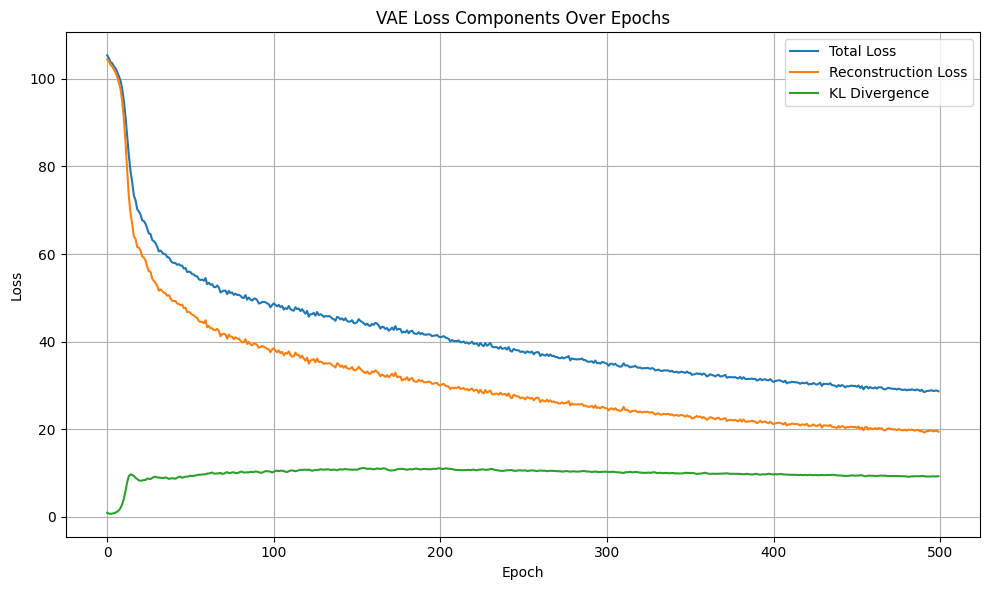

dim of latent mu: (331, 32)


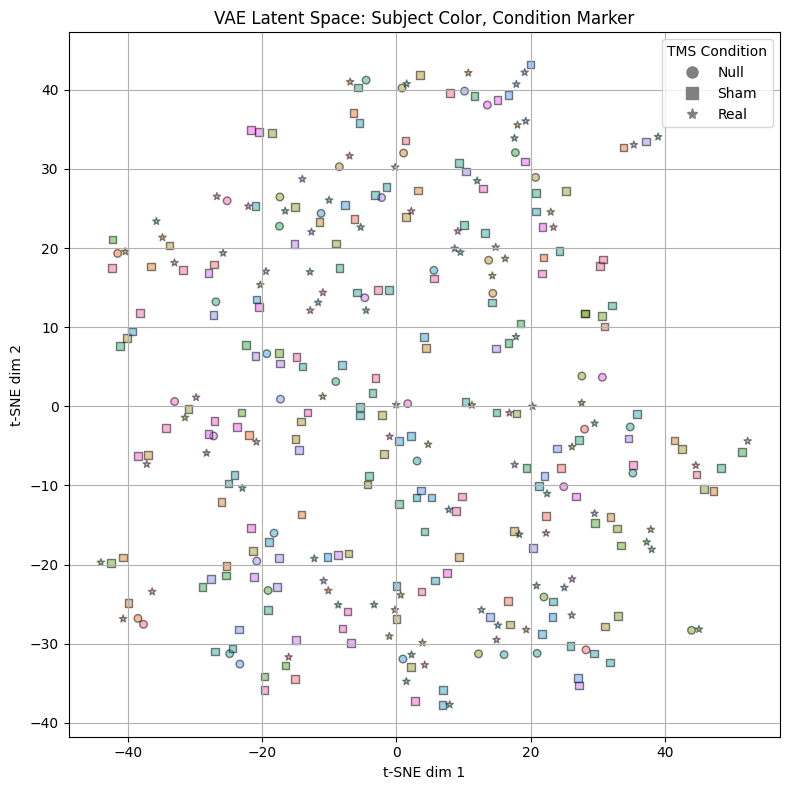

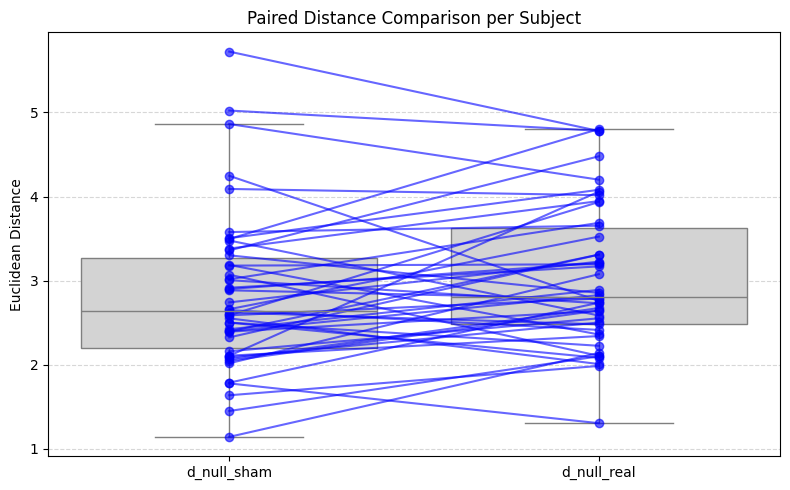

Paired t-test (ld=32): t = -2.078, p = 0.0434

=== Sensitivity analysis complete ===
Results folder: results/sensitivity_latentdim_20250814-111313
T-test summary:
 latent_dim    t_stat  p_value  n_subjects                       df_csv
          2 -0.530123 0.598633          46  condition_distances_ld2.csv
          4 -1.350268 0.183682          46  condition_distances_ld4.csv
          8 -2.348962 0.023277          46  condition_distances_ld8.csv
         12 -2.465839 0.017547          46 condition_distances_ld12.csv
         16 -2.289156 0.026815          46 condition_distances_ld16.csv
         32 -2.078448 0.043400          46 condition_distances_ld32.csv


In [17]:
# --- Sensitivity analysis over latent_dim ------------------------------------
# Requirements: sklearn, scipy, pandas, matplotlib available
# Assumes the following helpers exist and behave as in your snippet:
#   train_vae, plot_vae_losses, get_latent_mu_cvae,
#   plot_latent_embedding_by_condition_and_subject,
#   compute_condition_distances, plot_subject_distance_comparison

import os
import time
import json
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.stats import ttest_rel

# ---------------- user-configurable sweep ------------------------------------
latent_dim_grid = [2, 4, 8, 12, 16, 32]   # <- adjust as you like
NUM_EPOCH = 500
LR = 3e-4
hidden_dim = 64

# ---------------- output folder ---------------------------------------------
timestamp = time.strftime("%Y%m%d-%H%M%S")
out_dir = os.path.join("results", f"sensitivity_latentdim_{timestamp}")
os.makedirs(out_dir, exist_ok=True)

def _save_current_fig(path):
    """Save the *current* matplotlib figure and close it to free memory."""
    plt.tight_layout()
    plt.savefig(path, dpi=160, bbox_inches="tight")
    plt.close()

summary_rows = []
all_dfs = []  # to concatenate later (with latent_dim column)

for ld in latent_dim_grid:
    print(f"\n=== latent_dim = {ld} ===")

    # ----- (re)build model & optimizer for this setting
    input_dim = X_tensor.shape[1]
    cond_dim = subject_cond_tensor.shape[1]  # one-hot or embedding size you use
    model = CVAE(
        input_dim=input_dim,
        cond_dim=cond_dim,
        latent_dim=ld,
        hidden_dim=hidden_dim
    ).to(DEVICE)

    optimizer = torch.optim.Adam(model.parameters(), lr=LR)

    # ----- train
    total_loss_hist, recon_loss_hist, kld_loss_hist = train_vae(
        model, dataloader, optimizer, device=DEVICE, epochs=NUM_EPOCH
    )

    # loss plot
    plot_vae_losses(total_loss_hist, recon_loss_hist, kld_loss_hist)
    _save_current_fig(os.path.join(out_dir, f"losses_ld{ld}.png"))

    # ----- embed means (mu) and 2D t-SNE for visualization
    mu_all = get_latent_mu_cvae(model, X_tensor, subject_cond_tensor, device=DEVICE)

    z_2d = TSNE(n_components=2, perplexity=8).fit_transform(mu_all)
    plot_latent_embedding_by_condition_and_subject(
        z_2d, all_tms_type, all_subject_id
    )
    _save_current_fig(os.path.join(out_dir, f"tsne_ld{ld}.png"))

    # ----- compute condition distances and run paired t-test
    df = compute_condition_distances(
        mu_all, all_tms_type, all_subject_id, condition_map
    )
    # persist per-setting df
    df_path = os.path.join(out_dir, f"condition_distances_ld{ld}.csv")
    df.to_csv(df_path, index=False)

    # paired t-test (null_sham vs null_real)
    t_stat, p_val = ttest_rel(df["d_null_sham"], df["d_null_real"])

    # plot subject distance comparison
    plot_subject_distance_comparison(df)
    _save_current_fig(os.path.join(out_dir, f"subject_distance_comparison_ld{ld}.png"))

    # console summary
    print(f"Paired t-test (ld={ld}): t = {t_stat:.3f}, p = {p_val:.4f}")

    # record for combined summary
    summary_rows.append({
        "latent_dim": ld,
        "t_stat": float(t_stat),
        "p_value": float(p_val),
        "n_subjects": int(df["subject"].nunique()) if "subject" in df.columns else None,
        "df_csv": os.path.relpath(df_path, start=out_dir)
    })
    tmp = df.copy()
    tmp["latent_dim"] = ld
    all_dfs.append(tmp)

# ---------------- final aggregation & summary table --------------------------
summary_df = pd.DataFrame(summary_rows).sort_values("latent_dim")
summary_path = os.path.join(out_dir, "summary_ttests.csv")
summary_df.to_csv(summary_path, index=False)

if len(all_dfs) > 0:
    combined_df = pd.concat(all_dfs, axis=0, ignore_index=True)
    combined_path = os.path.join(out_dir, "all_condition_distances_combined.csv")
    combined_df.to_csv(combined_path, index=False)

# also save a small JSON manifest to remember settings
with open(os.path.join(out_dir, "manifest.json"), "w") as f:
    json.dump({
        "latent_dim_grid": latent_dim_grid,
        "num_epoch": NUM_EPOCH,
        "lr": LR,
        "hidden_dim": hidden_dim,
        "generated_at": timestamp
    }, f, indent=2)

print("\n=== Sensitivity analysis complete ===")
print(f"Results folder: {out_dir}")
print("T-test summary:")
print(summary_df.to_string(index=False))
